# 스프린트 AI3 초급 프로젝트
## 1팀(약탐정단) - 공지연

In [ ]:
# kaggle install
!pip install kaggle

In [ ]:
# 베이스라인 YOLOv8 설치
!pip install ultralytics

In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.3.1+cu121
Uninstalling torch-2.3.1+cu121:
  Successfully uninstalled torch-2.3.1+cu121
Found existing installation: torchvision 0.18.1+cu121
Uninstalling torchvision-0.18.1+cu121:
  Successfully uninstalled torchvision-0.18.1+cu121
Found existing installation: torchaudio 2.3.1+cu121
Uninstalling torchaudio-2.3.1+cu121:
  Successfully uninstalled torchaudio-2.3.1+cu121
Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.3.1%2Bcu121-cp311-cp311-linux_x86_64.whl (781.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.18.1%2Bcu121-cp311-cp311-linux_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp311-cp311-linux_x86_64.whl (3.4 MB)


In [ ]:
# @title 라이브러리 관리

# 데이터 관련
import os
import json
import random
import cv2
import yaml # YAML 파일 생성
import shutil
from itertools import combinations
import shutil

# 평가
import re

# YOLO
from ultralytics import YOLO


# 시각화 관련
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.patches as patches
import seaborn as sns
from PIL import Image

# 데이터 다루기
from sklearn.model_selection import train_test_split

# 기타 유틸리티
from tqdm import tqdm
from google.colab import drive

In [ ]:
# @title 폰트 설치 및 셋팅
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!ls -l /usr/share/fonts/truetype/nanum/

total 33300
-rw-r--r-- 1 root root 4415956 May 14  2020 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4186060 May 14  2020 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 May 14  2020 NanumGothicBold.ttf
-rw-r--r-- 1 root root 2246240 May 14  2020 NanumGothicCodingBold.ttf
-rw-r--r-- 1 root root 2315924 May 14  2020 NanumGothicCoding.ttf
-rw-r--r-- 1 root root 4691820 May 14  2020 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 May 14  2020 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 May 14  2020 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 May 14  2020 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 May 14  2020 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 May 14  2020 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 May 14  2020 NanumSquareR.ttf


In [ ]:
# 폰트 오류 해결의 최최최종본..🥹

# 1. 사용할 폰트 파일의 정확한 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 2. Matplotlib의 폰트 매니저에 해당 폰트 파일 경로를 직접 추가
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)

    # 3. 폰트 파일의 이름을 알아내어 전역 폰트로 설정
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
    plt.rc('axes', unicode_minus=False)
    print(f"✅ Matplotlib 폰트 매니저에 '{font_name}' 폰트를 직접 등록하고, 전역 기본값으로 설정하였습니다.")
else:
    print(f" 지정된 경로에 폰트 파일이 없습니다: {font_path}")

# 4. Ultralytics가 사용하는 기본 폰트 파일도 교체
ultralytics_font_path = '/root/.config/Ultralytics/Arial.ttf'
if os.path.exists(font_path):
    os.system(f"cp '{font_path}' '{ultralytics_font_path}'")
    print(f"✅ Ultralytics의 기본 폰트(Arial.ttf)를 '{font_name}'으로 교체했습니다.")

✅ Matplotlib 폰트 매니저에 'NanumGothic' 폰트를 직접 등록하고, 전역 기본값으로 설정하였습니다.
✅ Ultralytics의 기본 폰트(Arial.ttf)를 'NanumGothic'으로 교체했습니다.


In [ ]:
font_title = fm.FontProperties(fname=font_path, size=18)
font_label = fm.FontProperties(fname=font_path, size=12)
font_ticks = fm.FontProperties(fname=font_path, size=10)

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
# kaggle.json 위치 변경 및 실행
# json 파일(토큰)을 업로드하고 실행시켜야 함
# 캐글 -> Settings -> API 토큰 발급

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# @title 데이터 다운로드
# 실행 전 캐글 참가 규칙에 동의해야함. --> 안그러면 에러
!kaggle competitions download -c ai03-level1-project

100% 3.90G/3.91G [01:48<00:00, 40.1MB/s]
100% 3.91G/3.91G [01:48<00:00, 38.7MB/s]


In [ ]:
# 파일 압축해제
!unzip -q ai03-level1-project.zip -d ./data

# 데이터 다운로드 - 구글 드라이브 연동

In [ ]:
print("구글 드라이브를 연결합니다...")
drive.mount('/content/drive')

구글 드라이브를 연결합니다...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file_path = '/content/drive/MyDrive/스프린트프로젝트/data/pill_images_v3.zip'

In [ ]:
print(f"확인 대상 파일 경로: {zip_file_path}")

확인 대상 파일 경로: /content/drive/MyDrive/스프린트프로젝트/data/pill_images_v3.zip


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   53G   61G  47% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
/dev/sda1        74G   58G   17G  78% /opt/bin/.nvidia
tmpfs           6.4G  2.8M  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           113G   56G   58G  49% /content/drive


In [ ]:
print("\n파일을 Colab 로컬로 복사합니다. 잠시만 기다려주세요...")
!cp '/content/drive/MyDrive/스프린트프로젝트/data/pill_images_v3.zip' /content/pill_images_v3.zip
print("✅ 로컬 복사 완료.")


파일을 Colab 로컬로 복사합니다. 잠시만 기다려주세요...
✅ 로컬 복사 완료.


In [ ]:
# -o 옵션을 추가하여 묻지 않고 모든 파일을 덮어쓰도록 합니다.
!unzip -o /content/pill_images_v3.zip -d /content/pill_data_v3

In [ ]:
print("\n최종 폴더 구조를 확인합니다...")
!ls -R /content/pill_data_v3

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
K-003483-019861-025367-035206_0_2_0_2_75_000_200.json

/content/pill_data_v3/raw_data/train_annotations/K-003483-019861-025367-036637_json:
K-003483  K-019861  K-025367  K-036637

/content/pill_data_v3/raw_data/train_annotations/K-003483-019861-025367-036637_json/K-003483:
K-003483-019861-025367-036637_0_2_0_2_70_000_200.json
K-003483-019861-025367-036637_0_2_0_2_75_000_200.json
K-003483-019861-025367-036637_0_2_0_2_90_000_200.json

/content/pill_data_v3/raw_data/train_annotations/K-003483-019861-025367-036637_json/K-019861:
K-003483-019861-025367-036637_0_2_0_2_75_000_200.json
K-003483-019861-025367-036637_0_2_0_2_90_000_200.json

/content/pill_data_v3/raw_data/train_annotations/K-003483-019861-025367-036637_json/K-025367:
K-003483-019861-025367-036637_0_2_0_2_70_000_200.json
K-003483-019861-025367-036637_0_2_0_2_75_000_200.json
K-003483-019861-025367-036637_0_2_0_2_90_000_200.json

/content/pill_data_v3/raw_data/train_annotations/K-003483-019861-02

# 데이터 확인 및 탐색

In [ ]:
# 경로 지정
data_dir = './data'

In [ ]:
# 해당 경로와 그 하위 폴더 및 파일 목록 출력
# 너무 많은 출력을 방지하기 위해 일부만 확인함.
for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f'폴더 경로: {dirpath}')
    print(f'폴더 이름: {dirnames}')
    print(f'파일 : {filenames[:5]}')
    print("-" * 10)

폴더 경로: ./data
폴더 이름: ['train_annotations', 'train_images', 'test_images']
파일 : []
----------
폴더 경로: ./data/train_annotations
폴더 이름: ['K-003483-022347-027653-029667_json', 'K-002483-005886-019552-025438_json', 'K-002483-004378-012778-025438_json', 'K-003483-019861-029667-031885_json', 'K-003351-018357-022074_json', 'K-003351-031863-035206_json', 'K-003351-018147-029667_json', 'K-003483-027733-029667-031885_json', 'K-001900-010224-016551-031705_json', 'K-003483-027653-029667-030308_json', 'K-003483-020238-025367-027733_json', 'K-002483-005094-005886-006192_json', 'K-003544-010221-016551-029345_json', 'K-003483-016232-027777-034597_json', 'K-003483-016232-027733-030308_json', 'K-003544-004543-016551-029871_json', 'K-003351-016262-020014_json', 'K-003483-016232-025367-025469_json', 'K-001900-016548-029345-033208_json', 'K-003351-035206-041768_json', 'K-003483-020877-022347-036637_json', 'K-003483-016262-019861-030308_json', 'K-003351-033880-035206_json', 'K-002483-005094-012081-022627_json

각 이미지마다 별도의 JSON 파일이 존재하며, 매우 복잡한 폴더 구조 안에 흩어져 있음.

큰 json 파일 안에 데이터가 담겨있을 것이라 예상했는데.. 아주 복잡한 결과 (당황 ;_;)

### < 경로 예시 >
- 폴더 경로: ./data/train_annotations/K-003351-033880-038162_json/K-033880
- 파일: ['K-003351-033880-038162_0_2_0_2_70_000_200.json']


### EDA 계획

1. train_annotations 폴더와 그 모든 하위 폴더를 탐색
2. 발견된 모든 json 파일 탐색
3. 이미지는 PNG 형식, 주석은 COCO 포맷(JSON)형식인 것을 최대한 활용해서 데이터를 살펴보자


# EDA

In [ ]:
# train_annotations 폴더 경로
annotations_dir = './data/train_annotations/'

all_images = []
all_annotations = []
all_categories = []
category_ids = set() # 카테고리 중복 추가를 방지하기 위한 집합

print("모든 JSON 파일 통합 과정 진행 ~ ")

# annotations_dir와 그 모든 하위 폴더를 탐색
for dirpath, dirnames, filenames in tqdm(os.walk(annotations_dir)):
    for filename in filenames:
        if filename.endswith('.json'):
            json_path = os.path.join(dirpath, filename)

            with open(json_path, 'r') as f:
                data = json.load(f)

                # 각 파일의 image, annotation 정보 추가
                if 'images' in data:
                    all_images.extend(data['images'])
                if 'annotations' in data:
                    all_annotations.extend(data['annotations'])

                # 카테고리 정보는 중복 없이 추가
                if 'categories' in data:
                    for category in data['categories']:
                        if category['id'] not in category_ids:
                            all_categories.append(category)
                            category_ids.add(category['id'])

print("파일 통합 완료!")

# 하나로 합쳐진 COCO 데이터 생성
coco_data = {
    'images': all_images,
    'annotations': all_annotations,
    'categories': all_categories
}

모든 JSON 파일 통합 과정 진행 ~ 


2375it [00:01, 1864.87it/s]

파일 통합 완료!


In [ ]:
# 통합된 데이터의 전체 개수 확인

# 다루기 쉬운 coco를 이용해 coco 통합 데이터 생성
print(f"총 이미지 개수: {len(coco_data['images'])}")
print(f"총 어노테이션 개수: {len(coco_data['annotations'])}")
print(f"총 카테고리 개수: {len(coco_data['categories'])}")
print("-" * 20)

# Pandas DataFrame으로 변환하여 샘플 확인
images_df = pd.DataFrame(coco_data['images'])
annotations_df = pd.DataFrame(coco_data['annotations'])
categories_df = pd.DataFrame(coco_data['categories'])

print("--- 통합된 images_df 샘플 ---")
display(images_df.head())

print("\n--- 통합된 annotations_df 샘플 ---")
display(annotations_df.head())

print("\n--- 통합된 categories_df 샘플 ---")
display(categories_df.head())

총 이미지 개수: 4526
총 어노테이션 개수: 4526
총 카테고리 개수: 73
--------------------
--- 통합된 images_df 샘플 ---


,file_name,width,height,imgfile,drug_N,drug_S,back_color,drug_dir,light_color,camera_la,...,img_regist_ts,form_code_name,mark_code_front_anal,mark_code_back_anal,mark_code_front_img,mark_code_back_img,mark_code_front,mark_code_back,change_date,id
0,K-003483-022347-027653-029667_0_2_0_2_70_000_2...,976,1280,K-003483-022347-027653-029667_0_2_0_2_70_000_2...,K-003483,정상알약,연회색 배경,앞면,주백색,70,...,20041222,필름코팅정,,,,,,,20200723,1366
1,K-003483-022347-027653-029667_0_2_0_2_90_000_2...,976,1280,K-003483-022347-027653-029667_0_2_0_2_90_000_2...,K-003483,정상알약,연회색 배경,앞면,주백색,90,...,20041222,필름코팅정,,,,,,,20200723,1368
2,K-003483-022347-027653-029667_0_2_0_2_75_000_2...,976,1280,K-003483-022347-027653-029667_0_2_0_2_75_000_2...,K-003483,정상알약,연회색 배경,앞면,주백색,75,...,20041222,필름코팅정,,,,,,,20200723,1367
3,K-003483-022347-027653-029667_0_2_0_2_70_000_2...,976,1280,K-003483-022347-027653-029667_0_2_0_2_70_000_2...,K-027653,정상알약,연회색 배경,앞면,주백색,70,...,20100810,필름코팅정,,,,,,,20210331,1366
4,K-003483-022347-027653-029667_0_2_0_2_90_000_2...,976,1280,K-003483-022347-027653-029667_0_2_0_2_90_000_2...,K-027653,정상알약,연회색 배경,앞면,주백색,90,...,20100810,필름코팅정,,,,,,,20210331,1368



--- 통합된 annotations_df 샘플 ---


,area,iscrowd,bbox,category_id,ignore,segmentation,id,image_id
0,48198,0,"[132, 287, 277, 174]",3482,0,[],5205,1366
1,48140,0,"[583, 845, 290, 166]",3482,0,[],5206,1368
2,50112,0,"[558, 812, 288, 174]",3482,0,[],5207,1367
3,44600,0,"[670, 256, 223, 200]",27652,0,[],5200,1366
4,45732,0,"[94, 853, 222, 206]",27652,0,[],5199,1368



--- 통합된 categories_df 샘플 ---


,supercategory,id,name
0,pill,3482,기넥신에프정(은행엽엑스)(수출용)
1,pill,27652,세비카정 10/40mg
2,pill,22346,자누비아정 50mg
3,pill,29666,리바로정 4mg
4,pill,5885,타이레놀이알서방정(아세트아미노펜)(수출용)


In [ ]:
unique_image_count = images_df['file_name'].nunique()
print(f"총 이미지 개수: {unique_image_count}")

총 이미지 개수: 1489


## 1. 데이터 구조
- 총 이미지 개수: 4526
- 총 어노테이션 개수: 4526

--> 이미지의 개수와 어노테이션 개수가 정확히 일치하는 것을 보아, 하나의 Json 파일이 알약 하나에 대한 정보만 담고 있다는 것을 시사할 수 있을 것 같습니다.

## 2. 중복된 이미지 존재
- ***images_df*** 의 샘플(특히, 0번째행과 1번째행과 4번째행)을 살펴보면, 서로 다른행임에도 불구하고 파일 이름이 동일한 경우가 있는 것 같습니다. 즉, 행의 개수가 4526개지만, 실제 이미지 파일의 개수가 아니라 **전체 알약(어노테이션)의 개수**임을 파악할 수 있었습니다.

    ☑️ 한 이미지에 알약이 3개 있다면, 해당 이미지 정보가 3번 중복 기록된 것을 알 수 있습니다.

## 3. 데이터의 양과 특징
- images_df에는 이미지 파일 이름 외에도 drug_N(알약 코드), drug_S(알약 상태), light_color(조명 색) 등 무려 50개에 달하는 상세한 메타데이터가 포함된 것으로 보입니다. 데이터 증강을 도입했을 때의 특정 조건(예: 어두운 조명)에서 학습할 때 유용할 수 있을 것 같습니다.



In [ ]:
# 어노테이션에서 카테고리별 개수 세기
category_counts = annotations_df['category_id'].value_counts().reset_index()
category_counts.columns = ['id', 'count']

# 카테고리 이름 정보와 합쳐서 'category_df_counts' 생성
category_df_counts = pd.merge(categories_df, category_counts, on='id')
category_df_counts = category_df_counts.sort_values(by='count', ascending=False)

In [ ]:
# @title 1️⃣ 알약 클래스는 얼마나 균일하게 분포해 있는가?

plt.figure(figsize=(12, 10))
sns.barplot(x='count', y='name', data=category_df_counts.head(20))

# fontproperties' 인자를 통해 폰트 객체 직접 전달
plt.title('상위 20개 클래스 분포', fontproperties=font_title)
plt.xlabel('어노테이션 개수', fontproperties=font_label)
plt.ylabel('클래스 이름', fontproperties=font_label)

# get_xticklabels()는 숫자 눈금이라 괜찮을 수 있지만, 만일을 위해 함께 설정함
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)


plt.show()

## 🔎 클래스(알약) 분포 결과

### 1. 심각한 클래스 불균형
- *'가네신정(은행엽엑스)(수출용)'* 클래스가 500개가 넘는 압도적으로 많은 데이터를 갖고 있습니다.
- 20위인 *'카나브정 60mg'*은 100개에도 미치지 못하고 있습니다.
    - 위 그래프는 상위 20개의 분석 결과물이므로, 나머지 53개 클래스는 이보다 데이터가 훨씬 더 적을 것으로 예상합니다.

### 2. 롱테일 분포(Long-tail Distribution) 형태
- 데이터가 롱테일 분포 형태를 띄고있어 편향되거나, 낮은 일반화 성능이 나올 수 있습니다.



In [ ]:
# @title 2️⃣ 이미지 크기 분포
print("--- 이미지 크기 기술 통계 ---")
print(images_df[['width', 'height']].describe())

# 산점도로 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='width', y='height', data=images_df)

# 수정된 부분: fontproperties 직접 주입
plt.title('이미지 크기 분포', fontproperties=font_title)
plt.xlabel('너비 (width)', fontproperties=font_label)
plt.ylabel('높이 (height)', fontproperties=font_label)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)

plt.show()

## 🔎 이미지 크기 분포 분석 결과
| | width | height |
|:---|:---|:---|
| count | 4526.0 | 4526.0 |
| mean | 976.0 | 1280.0 |
| std | 0.0 | 0.0 |
| min | 976.0 | 1280.0 |
| 25% | 976.0 | 1280.0 |
| 50% | 976.0 | 1280.0 |
| 75% | 976.0 | 1280.0 |
| max | 976.0 | 1280.0 |

### 모든 이미지 크기가 동일합니다. 🥹🫶
- 모든 이미지가 가로 976 픽셀, 세로 1280픽셀로 완전히 동일합니다.
    - 근거 1. 시각화 한 산점도 그래프에 모든 데이터가 하나의 점으로 찍혀있다.
        - 모든 데이터의 (x,y)값이 같다는 의미로 해석할 수 있다.
    - 근거 2. 기술 통계표에 따르면, std값이 width와 height 모두 0.0이다.
        - std가 0인 것은 데이터에 어떠한 변동도 없이 모든 값이 평균값과 동일하다는 근거가 될 수 있다.

--> 이를 통해 모든 이미지의 리사이즈 및 패딩 과정을 생략할 수 있음을 알 수 있습니다. 또한, 안정적인 모델 학습을 기대해볼 수 있습니다.

In [ ]:
# @title 3️⃣ 이미지 당 객체(알약)수 분포
# 이미지당 어노테이션 개수 세기
annotations_per_image = annotations_df['image_id'].value_counts()

# 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(annotations_per_image, bins=30, kde=False)

# 수정된 부분: fontproperties 직접 주입
plt.title('이미지 당 객체(알약) 수 분포', fontproperties=font_title)
plt.xlabel('한 이미지 내의 알약 개수', fontproperties=font_label)
plt.ylabel('이미지 수', fontproperties=font_label)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)

plt.show()

## 🔎 이미지 당 객체 수 분포 결과

1. 한 이미지에 여러 알약이 포함되어있다.
    - 그래프를 통해 이미지 한 장에 알약이 3개 포함된 경우가 600장 이상입니다.
        - 4개, 2개인 경우도 다수 존재하며, 알약이 1개만 있는 이미지는 상대적으로 적습니다.

2. 이미지 정보 중복 -> 확정
    - **images_df**와 함께 이미지 정보 중복의 원인을 확정할 수 있습니다.
        -  알약 4개가 들어있는 이미지 한 장은 4개의 개별 JSON 파일로 나뉘어 있으며, 제가 데이터를 합치는 과정에서 images_df와 annotations_df에 각각 4개의 행이 생성된 것으로 보입니다.

--> 이미지 한 장을 불러올 때마다 해당 이미지에 속한 모든 어노테이션(바운딩 박스)들을 함께 그룹화해서 모델에 전달해주어야함.


In [ ]:
# @title 4️⃣ 바운딩 박스 크기 분포

# 바운딩 박스 면적 계산 (이전에 실행했다면 생략 가능)
if 'bbox_area' not in annotations_df.columns:
    annotations_df['bbox_area'] = annotations_df['bbox'].apply(lambda x: x[2] * x[3])

# 면적 분포 시각화 (너무 큰 값은 제외하고 확인)
plt.figure(figsize=(10, 6))
sns.histplot(annotations_df[annotations_df['bbox_area'] < 100000]['bbox_area'], bins=50)

# 수정된 부분: fontproperties 직접 주입
plt.title('바운딩 박스 크기(면적) 분포', fontproperties=font_title)
plt.xlabel('면적 (width * height)', fontproperties=font_label)
plt.ylabel('개수', fontproperties=font_label)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)

plt.show()

## 🔎 바운딩 박스 크기 분포 결과

- 다봉형 분포 형태
    - 면적이 30,000~ 60,000 사이에 큰 그룹이 형성되어 있고, 80,000 근처에도 또 다른 작은 그룹이 존재합니다.


- 다봉형 분포 형태 추측

    1.   실제 알약 크기의 차이 --> 실제로 알약의 크기는 매우 다양하다.(색깔, 크기 모두)
    2.   촬영 방향 및 형태의 차이 --> 같은 알약이라도 정면에서 찍었을 때와 측면에서 찍었을 때 등과 같은 상황에서 바운딩 박스의 면적이 달라질 수 있다.



In [ ]:
# @title 5️⃣ Visual Sanity Check
def visualize_sample(images_df, annotations_df, categories_df, num_samples=None, sample_files=None):
    """
    데이터셋에서 이미지를 시각화하는 함수.
    num_samples: 무작위로 보여줄 샘플 개수
    sample_files: 시각화할 특정 파일 이름의 리스트
    """
    # num_samples와 sample_files 중 하나만 사용하도록 처리
    if num_samples is not None:
        unique_image_files = images_df['file_name'].unique()
        files_to_show = random.sample(list(unique_image_files), num_samples)
    elif sample_files is not None:
        files_to_show = sample_files
    else:
        print("에러 - 파일 확인 요망")
        return

    # 선택된 파일들에 대해 시각화 진행
    for file_name in files_to_show:
        image_info_rows = images_df[images_df['file_name'] == file_name]
        if image_info_rows.empty:
            print(f"에러: {file_name}에 대한 이미지 정보를 찾을 수 없습니다.")
            continue

        image_id = image_info_rows.iloc[0]['id']
        img_path = os.path.join('./data/train_images', file_name)

        # 해당 이미지에 속한 모든 어노테이션 가져오기
        ann_infos = annotations_df[annotations_df['image_id'] == image_id]

        # 이미지 열기
        img = Image.open(img_path).convert('RGB')
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.imshow(img)
        ax.axis('off')

        # 바운딩 박스 및 라벨 그리기
        for _, ann in ann_infos.iterrows():
            bbox = ann['bbox']
            cat_id = ann['category_id']
            cat_name = categories_df[categories_df['id'] == cat_id]['name'].values[0]

            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                     linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

            ax.text(bbox[0], bbox[1] - 10, cat_name,
                    color='white', backgroundcolor='lime',
                    fontproperties=fm.FontProperties(fname=font_path, size=12))

        ax.set_title(f"Image: {file_name}", fontproperties=font_title)
        plt.show()

# 3개의 샘플 이미지 시각화
visualize_sample(images_df, annotations_df, categories_df, num_samples=3)

## 🔎 Visual Sanity Check 결과

1. 라벨링 품질: 매우 우수
2. 이미지가 균일한 조명 아래에서 촬영되었음을 알 수 있고, 알약의 형태와 문자가 선명하게 보입니다. 겹치는 알약이 없는 것 같습니다.
3. 각 알약은 색상(붉은색, 흰색, 녹색 등)과 표면에 새겨진 고유한 문자/기호('T' 로고, 'ATV', 'C77', 'G40')를 가지고 있습니다. 명확한 클래스 구분 특징이 존재합니다.
4. 일부 누락된 라벨링을 발견했습니다.

In [ ]:
# @title 6️⃣ 메타데이터 탐색
"""
1. drug_dir(알약 방향) --> 알약의 앞면과 뒷면 데이터가 균등하게 분포하는가?
2. light_color (조명 색)--> 특정 조명 환경에서 촬영된 이미지가 편중되어 있는가?
"""
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 알약 방향 분포
sns.countplot(x='drug_dir', data=images_df, ax=axes[0])
axes[0].set_title('알약 방향(drug_dir) 분포', fontproperties=font_title)
axes[0].set_xlabel('방향', fontproperties=font_label)
axes[0].set_ylabel('개수', fontproperties=font_label)

# 2. 조명 색 분포
sns.countplot(x='light_color', data=images_df, ax=axes[1])
axes[1].set_title('조명 색(light_color) 분포', fontproperties=font_title)
axes[1].set_xlabel('조명', fontproperties=font_label)
axes[1].set_ylabel('개수', fontproperties=font_label)

# 각 라벨에 폰트 적용
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_ticks)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_ticks)

plt.tight_layout()
plt.show()


## 🔎 메타데이터 분석 결과

1. 데이터의 압도적인 앞면 편향이 있습니다.
2. 조명 색 분포 그래프가 매우 극단적입니다. 모든 데이터가 주백색 이라는 단 하나의 조명 조건에서 촬영되었음을 알 수 있습니다.


### 메타데이터 시사점

1. 혹시나 만약에, 뒷면으로 촬영되거나 뒷면을 인식해야하는 일이 생긴다면 그런 능력을 가질 가능성은 사실상 0에 가까워 보입니다. 데이터셋의 한계라고 봅니다.
2. 모든 데이터가 주백색 조명에서 촬영되었기 때문에 학습이 쉬워질 수 있습니다.

    2-1. 하지만 모델이 주백색 조명에만 익숙해지기 때문에 실생활 데이터에 모델을 노출시킨다면 성능이 급격히 저하될 가능성이 매우 커 보입니다. 이는 앞으로 '데이트 증강' 적용이 꼭 필요하다는 증거가 될 것 같습니다.

In [ ]:
# @title 7️⃣ 바운딩 박스의 형태(가로세로 비율) 분석

# 가로세로 비율(aspect ratio) 계산
annotations_df['bbox_aspect_ratio'] = annotations_df['bbox'].apply(lambda x: x[2] / x[3])

# 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(annotations_df['bbox_aspect_ratio'], bins=50)

plt.title('바운딩 박스 가로/세로 비율 분포', fontproperties=font_title)
plt.xlabel('가로/세로 비율 (width / height)', fontproperties=font_label)
plt.ylabel('개수', fontproperties=font_label)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)
plt.show()

## 🔎 바운딩 박스 형태 분석 결과

1. 대부분의 알약이 정원형에 가까운 형태입니다. 가로세로 비율(aspect ratio) 그래프를 보면 1.0 주변에 매우 높고 뾰족한 봉우리가 있습니다. 이는 우리 데이터셋에 있는 대부분의 알약이 가로와 세로 길이가 거의 같은, 즉 정원형 또는 정사각형에 가까운 형태를 가지고 있음을 의미합니다.
2. 1.0을 중심으로 양옆으로도 데이터가 분포하고 있습니다. 이는 캡슐처럼 한쪽으로 길거나(비율 > 1.0), 세로로 길쭉한(비율 < 1.0) 형태의 알약도 일부 포함되어 있음을 보여줍니다. 하지만 그 수는 원형 알약에 비해 현저히 적은 것으로 보입니다.


### 시사점
우리가 학습할 모델은 가로세로 비율이 1.0에 가까운 앵커 박스들을 중심으로 설정할 때, 대부분의 알약을 훨씬 더 효율적이고 정확하게 찾아낼 가능성이 높다는 점을 시사할 수 있습니다.

--- 1️⃣ 가장 작은 바운딩 박스 샘플 ---


,area,iscrowd,bbox,category_id,ignore,segmentation,id,image_id,bbox_area,bbox_aspect_ratio
2268,18492,0,"[209, 314, 134, 138]",23202,0,[],700,184,18492,0.971014
3626,18626,0,"[215, 290, 134, 139]",23202,0,[],918,245,18626,0.964029
1965,18760,0,"[210, 314, 134, 140]",23202,0,[],612,160,18760,0.957143



--- 2️⃣ 가장 큰 바운딩 박스 샘플 ---


,area,iscrowd,bbox,category_id,ignore,segmentation,id,image_id,bbox_area,bbox_aspect_ratio
3693,272435,0,"[17, 651, 529, 515]",16687,0,[],207,57,272435,1.027184
4056,270384,0,"[19, 649, 516, 524]",16687,0,[],1425,381,270384,0.984733
3601,265500,0,"[33, 520, 450, 590]",16687,0,[],5520,1454,265500,0.762712



--- 3️⃣ 가장 길쭉한 바운딩 박스 샘플 ---


,area,iscrowd,bbox,category_id,ignore,segmentation,id,image_id,bbox_area,bbox_aspect_ratio
195,86884,0,"[502, 848, 428, 203]",35205,0,[],958,255,86884,2.108374
1093,53106,0,"[523, 889, 334, 159]",27992,0,[],3032,798,53106,2.100629
2007,53600,0,"[522, 888, 335, 160]",27992,0,[],4312,1133,53600,2.093750


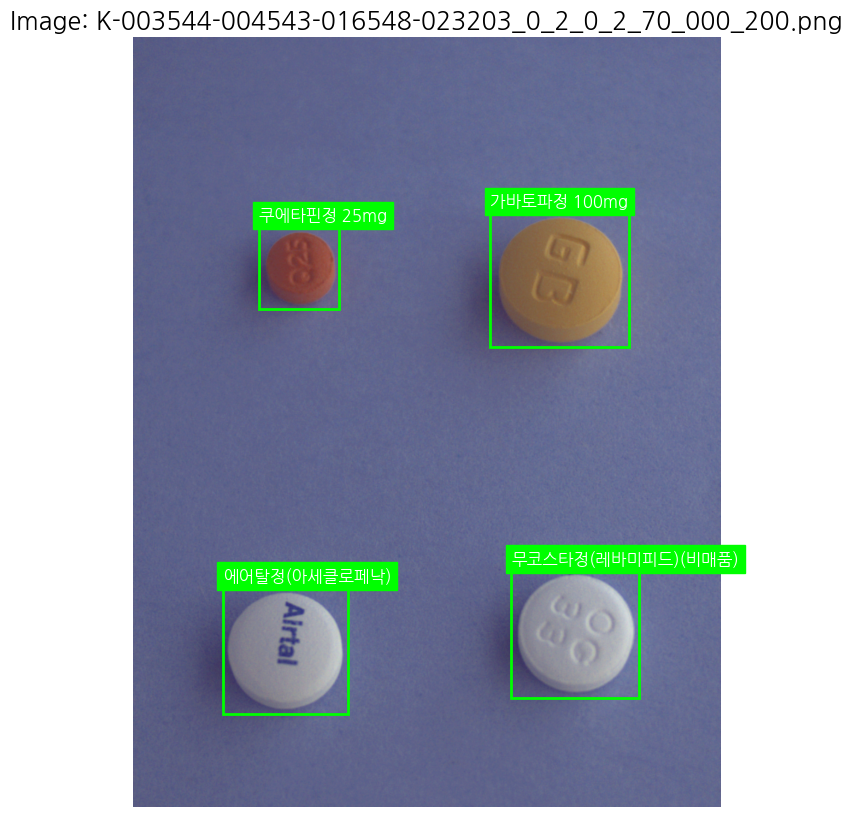

In [ ]:
# @title 8️⃣ 극단적인 데이터 확인하기
# 이름이나 모양이 비슷한 약들끼리 서로 라벨이 잘못 붙은 경우가 있을까?

# 1. 가장 면적이 '작은' 어노테이션 3개 정보 찾기
smallest_bbox_anns = annotations_df.sort_values(by='bbox_area').head(3)
print("--- 1️⃣ 가장 작은 바운딩 박스 샘플 ---")
display(smallest_bbox_anns)

# 2. 가장 면적이 '큰' 어노테이션 3개 정보 찾기
largest_bbox_anns = annotations_df.sort_values(by='bbox_area', ascending=False).head(3)
print("\n--- 2️⃣ 가장 큰 바운딩 박스 샘플 ---")
display(largest_bbox_anns)

# 3. 가장 '길쭉한' (비율이 큰) 어노테이션 3개 정보 찾기
aspect_ratio_anns = annotations_df.sort_values(by='bbox_aspect_ratio', ascending=False).head(3)
print("\n--- 3️⃣ 가장 길쭉한 바운딩 박스 샘플 ---")
display(aspect_ratio_anns)

# 위에서 찾은 샘플 중 하나를 직접 시각화 (예: 가장 작은 샘플 첫 번째)
sample_to_visualize = images_df[images_df['id'] == smallest_bbox_anns.iloc[0]['image_id']]
if not sample_to_visualize.empty:
    visualize_sample(images_df, annotations_df, categories_df,
                     sample_files=[sample_to_visualize.iloc[0]['file_name']])

In [ ]:
# @title 8️⃣-1 클래스 교차 확인

def visualize_by_category(category_name, num_samples=3):
    print(f"--- '{category_name}' 클래스 샘플 시각화 ---")
    try:
        # 카테고리 이름으로 ID 찾기
        cat_id = categories_df[categories_df['name'].str.contains(category_name)].iloc[0]['id']

        # 해당 카테고리 ID를 가진 어노테이션 찾기
        ann_ids = annotations_df[annotations_df['category_id'] == cat_id]['image_id']

        # 해당 이미지 ID를 가진 이미지 정보 찾기
        img_infos = images_df[images_df['id'].isin(ann_ids)]

        # 랜덤 샘플링
        sample_files = img_infos['file_name'].sample(num_samples)

        # 시각화 함수 호출
        visualize_sample(images_df, annotations_df, categories_df, sample_files=sample_files)

    except IndexError:
        print(f"'{category_name}'을 포함하는 클래스를 찾을 수 없습니다.")

# 이름이 비슷한 '리피토정' 샘플들 확인
visualize_by_category('리피토정', num_samples=2)

# 이름이 비슷한 '자누메트' 샘플들 확인
visualize_by_category('자누메트', num_samples=2)

In [ ]:
# @title 알약의 극단값만 모아보기
# 1. 가장 면적이 '작은' 어노테이션 3개 정보 찾기
smallest_bbox_anns = annotations_df.sort_values(by='bbox_area').head(3)
print("--- 가장 작은 바운딩 박스 샘플 ---")
display(smallest_bbox_anns)

# 2. 가장 면적이 '큰' 어노테이션 3개 정보 찾기
largest_bbox_anns = annotations_df.sort_values(by='bbox_area', ascending=False).head(3)
print("\n--- 가장 큰 바운딩 박스 샘플 ---")
display(largest_bbox_anns)

# 3. 가장 '길쭉한' (비율이 큰) 어노테이션 3개 정보 찾기
aspect_ratio_anns = annotations_df.sort_values(by='bbox_aspect_ratio', ascending=False).head(3)
print("\n--- 가장 길쭉한 바운딩 박스 샘플 ---")
display(aspect_ratio_anns)

# 위에서 찾은 샘플 중 하나를 직접 시각화 (예: 가장 작은 샘플 첫 번째)
sample_to_visualize = images_df[images_df['id'] == smallest_bbox_anns.iloc[0]['image_id']]
if not sample_to_visualize.empty:
    visualize_sample(images_df, annotations_df, categories_df,
                     sample_files=[sample_to_visualize.iloc[0]['file_name']])

## 🔎 극단적 데이터 확인 결과

- 샘플을 확인한 결과, '가바토파정 100mg'과 같은 라벨링 자체에는 큰 이상 없습니다. 라벨링 자체는 매우 우수합니다.
- 바운딩 박스도 정확합니다.
- 클래스도 교차된 부분 없는 것으로 확인됩니다.

### 📌 주목할 점

1. 결과 테이블을 보면, 가장 작은 바운딩 박스 3개는 모두 동일한 **category_id (23202)**를 가지고 있고, 가장 큰 박스 3개 역시 모두 동일한 **category_id (16687)**를 가집니다.
  - 이는 극단적인 크기의 바운딩 박스가 라벨링 실수가 아니라, **'원래 아주 작은 알약'**과 **'원래 아주 큰 알약'**이라는 해당 클래스들의 고유한 물리적 특징임을 시사합니다. '큐에타핀정 25mg'이 실제로 다른 약에 비해 작다는 것을 확인할 수 있습니다.

2. 캡슐 형태 알약이 여러개 존재하는 것이 증명되었습니다.
  - 가로/세로 비율이 2.0을 넘는 박스들은 너비가 높이의 2배 이상인, 옆으로 길쭉한 형태를 가집니다. 다양한 형태의 객체 모두 학습하는데 집중해야함을 알 수 있습니다.



In [ ]:
# 이전에 정의한 visualize_sample 함수를 여러 번 실행
print("\n --- 무작위 샘플 1 --- \n ")
visualize_sample(images_df, annotations_df, categories_df, num_samples=1)

print("--- 무작위 샘플 2 --- \n ")
visualize_sample(images_df, annotations_df, categories_df, num_samples=1)

print("--- 무작위 샘플 3 --- \n ")
visualize_sample(images_df, annotations_df, categories_df, num_samples=1)

# 데이터 전처리

## 베이스라인 모델 선정 : YOLO
- 본 프로젝트는 주어진 경구약제 이미지에서 약물의 종류와 위치를 탐지하는 모델을 개발하는 것을 목표로 합니다. 이미지는 PNG 형식, 주석은 **COCO 포맷(JSON)** 으로 제공되어있는 데이터의 특징을 고려하여 속도와 정확도의 균형이 뛰어난 YOLO 아키텍처를 베이스라인 모델로 선정했습니다.
- 이에 맞는 데이터 전처리 과정을 거쳐 3개의 ***YOLO 모델(v10n, v8n, v8s)*** 에 대한 베이스라인 성능 평가를 진행하겠습니다.

In [ ]:
# @title 필수 전처리 과정
# 전체 고유 이미지 파일 이름 목록을 가져옴.
unique_images = images_df['file_name'].unique()
print(f"전체 고유 이미지 수: {len(unique_images)}")

# 이미지 목록을 훈련용과 검증용으로 8:2 비율로 나눔
train_files, val_files = train_test_split(unique_images, test_size=0.2, random_state=42)

print(f"훈련용 이미지 수: {len(train_files)}")
print(f"검증용 이미지 수: {len(val_files)}")

# 결과 확인 (샘플 5개씩 출력)
print("\n--- 훈련용 이미지 샘플 --- \n")
print(train_files[:5])

print("\n--- 검증용 이미지 샘플 ---\n ")
print(val_files[:5])

전체 고유 이미지 수: 1489
훈련용 이미지 수: 1191
검증용 이미지 수: 298

--- 훈련용 이미지 샘플 --- 

['K-003544-004543-010221-016548_0_2_0_2_75_000_200.png' 'K-003483-027653-029667-034597_0_2_0_2_75_000_200.png' 'K-003483-016262-027733-034597_0_2_0_2_70_000_200.png' 'K-003351-020238-041768_0_2_0_2_70_000_200.png' 'K-003483-016262-027733-034597_0_2_0_2_75_000_200.png']

--- 검증용 이미지 샘플 ---
 
['K-003351-016262-018147_0_2_0_2_90_000_200.png' 'K-003483-020877-034597-036637_0_2_0_2_90_000_200.png' 'K-001900-016548-033009-033208_0_2_0_2_70_000_200.png' 'K-003544-010221-016548-033009_0_2_0_2_70_000_200.png' 'K-003483-025469-031885-035206_0_2_0_2_75_000_200.png']


In [ ]:
os.makedirs('./data/train/labels', exist_ok=True)
os.makedirs('./data/val/labels', exist_ok=True)

In [ ]:
# 클래스 ID 매핑 생성
# 카테고리 DataFrame을 id 기준으로 정렬합니다.
sorted_categories = categories_df.sort_values(by='id').reset_index(drop=True)

# 원본 category_id를 새로운 0-indexed ID로 매핑하는 딕셔너리 생성
category_id_map = {row['id']: index for index, row in sorted_categories.iterrows()}

print("✅ 클래스 ID 맵 생성 완료.")


✅ 클래스 ID 맵 생성 완료.


In [ ]:
def convert_to_yolo_format_final(file_list, source_image_df, source_ann_df, target_label_dir, id_map):

    for file_name in tqdm(file_list, desc=f"'{target_label_dir}' 생성 중"):
        image_info_rows = source_image_df[source_image_df['file_name'] == file_name]
        if image_info_rows.empty:
            continue

        image_info = image_info_rows.iloc[0]
        img_w, img_h, img_id = image_info['width'], image_info['height'], image_info['id']

        ann_infos = source_ann_df[source_ann_df['image_id'] == img_id]

        label_file_path = os.path.join(target_label_dir, file_name.replace('.png', '.txt'))
        with open(label_file_path, 'w') as f:
            for _, ann in ann_infos.iterrows():
                original_cat_id = ann['category_id']
                if original_cat_id in id_map:
                    yolo_class_id = id_map[original_cat_id]
                else:
                    continue

                x_min, y_min, w, h = ann['bbox']
                x_max = min(x_min + w, img_w)
                y_max = min(y_min + h, img_h)
                x_min = max(x_min, 0)
                y_min = max(y_min, 0)
                w_clipped = x_max - x_min
                h_clipped = y_max - y_min

                x_center = (x_min + w_clipped / 2) / img_w
                y_center = (y_min + h_clipped / 2) / img_h
                width_norm = w_clipped / img_w
                height_norm = h_clipped / img_h

                f.write(f"{yolo_class_id} {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}\n")

# --- 라벨 파일 재생성 실행 ---
train_labels_dir = './data/train/labels'
val_labels_dir = './data/val/labels'

os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

convert_to_yolo_format_final(train_files, images_df, annotations_df, train_labels_dir, category_id_map)
convert_to_yolo_format_final(val_files, images_df, annotations_df, val_labels_dir, category_id_map)

print("\n✅ 모든 라벨 파일 변환 및 저장이 완료되었습니다.")

'./data/val/labels' 생성 중: 100%|██████████| 298/298 [00:00<00:00, 677.05it/s]


✅ 모든 라벨 파일 변환 및 저장이 완료되었습니다.


In [ ]:
# 라벨 파일이 저장된 폴더 경로
train_labels_dir = './data/train/labels'
val_labels_dir = './data/val/labels'

# 각 폴더의 파일 개수 세기
num_train_labels = len(os.listdir(train_labels_dir))
num_val_labels = len(os.listdir(val_labels_dir))

print(f"훈련용 이미지 수: {len(train_files)}")
print(f"생성된 훈련용 라벨 파일 수: {num_train_labels}")
print("-" * 30)
print(f"검증용 이미지 수: {len(val_files)}")
print(f"생성된 검증용 라벨 파일 수: {num_val_labels}")
print("-" * 30)

# 두 숫자가 일치하는지 최종 확인
if len(train_files) == num_train_labels and len(val_files) == num_val_labels:
    print("✅ 이미지 수와 라벨 파일 수가 정확히 일치합니다.")
else:
    print("❗️이미지 수와 라벨 파일 수가 일치하지 않습니다.")

훈련용 이미지 수: 1191
생성된 훈련용 라벨 파일 수: 1191
------------------------------
검증용 이미지 수: 298
생성된 검증용 라벨 파일 수: 298
------------------------------
✅ 이미지 수와 라벨 파일 수가 정확히 일치합니다.


In [ ]:
#클래스 이름 목록을 생성. (id 순서대로 정렬)
# YOLO는 class_id를 0부터 순서대로 인식하므로, id를 기준으로 정렬하는 것이 중요함.
class_names = categories_df.sort_values(by='id')['name'].tolist()

# os.path.abspath()로 현재 경로를 기준으로 절대 경로 지정
train_img_path = os.path.abspath('./data/train/images')
val_img_path = os.path.abspath('./data/val/images')

# YAML 파일에 쓸 데이터 구성 (절대 경로 사용)
data_yaml = {
    'train': train_img_path, # 훈련 이미지 폴더 경로
    'val': val_img_path, # 검증 이미지 폴더 경로
    'nc': len(class_names), # 클래스 개수
    'names': class_names # 클래스 이름 목록
}

# YAML 파일로 저장
yaml_path = './data/dataset.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, allow_unicode=True, default_flow_style=False)

print(f"✅ 데이터셋 설정 파일이 '{yaml_path}'에 저장되었습니다.")
print("\n--- 생성된 파일 내용 ---")
with open(yaml_path, 'r') as f:
    print(f.read())

✅ 데이터셋 설정 파일이 './data/dataset.yaml'에 저장되었습니다.

--- 생성된 파일 내용 ---
names:
- 보령부스파정 5mg
- 뮤테란캡슐 100mg
- 일양하이트린정 2mg
- 기넥신에프정(은행엽엑스)(수출용)
- 무코스타정(레바미피드)(비매품)
- 알드린정
- 뉴로메드정(옥시라세탐)
- 타이레놀정500mg
- 에어탈정(아세클로페낙)
- 삼남건조수산화알루미늄겔정
- 타이레놀이알서방정(아세트아미노펜)(수출용)
- 삐콤씨에프정 618.6mg/병
- 조인스정 200mg
- 쎄로켈정 100mg
- 리렉스펜정 300mg/PTP
- 아빌리파이정 10mg
- 자이프렉사정 2.5mg
- 다보타민큐정 10mg/병
- 써스펜8시간이알서방정 650mg
- 에빅사정(메만틴염산염)(비매품)
- 리피토정 20mg
- 크레스토정 20mg
- 가바토파정 100mg
- 동아가바펜틴정 800mg
- 오마코연질캡슐(오메가-3-산에틸에스테르90)
- 란스톤엘에프디티정 30mg
- 리리카캡슐 150mg
- 종근당글리아티린연질캡슐(콜린알포세레이트) 
- 콜리네이트연질캡슐 400mg
- 트루비타정 60mg/병
- 스토가정 10mg
- 노바스크정 5mg
- 마도파정
- 플라빅스정 75mg
- 엑스포지정 5/160mg
- 펠루비정(펠루비프로펜)
- 아토르바정 10mg
- 라비에트정 20mg
- 리피로우정 20mg
- 자누비아정 50mg
- 맥시부펜이알정 300mg
- 메가파워정 90mg/병
- 쿠에타핀정 25mg
- 비타비백정 100mg/병
- 놀텍정 10mg
- 자누메트정 50/850mg
- 큐시드정 31.5mg/PTP
- 아모잘탄정 5/100mg
- 세비카정 10/40mg
- 트윈스타정 40/5mg
- 카나브정 60mg
- 울트라셋이알서방정
- 졸로푸트정 100mg
- 트라젠타정(리나글립틴)
- 비모보정 500/20mg
- 레일라정
- 리바로정 4mg
- 렉사프로정 15mg
- 트라젠타듀오정 2.5/850mg
- 낙소졸정 500/20mg
- 아질렉트정(라사길린메실산염)
-

In [ ]:
# 원본 이미지가 있는 폴더
source_dir = './data/train_images'

# 복사할 대상 폴더 경로
train_target_dir = './data/train/images'
val_target_dir = './data/val/images'

# 대상 폴더 생성 (이미 존재하면 무시)
os.makedirs(train_target_dir, exist_ok=True)
os.makedirs(val_target_dir, exist_ok=True)

# 훈련용 이미지 파일 복사
print(f"'{train_target_dir}' 폴더로 훈련용 이미지 복사 중...")
for file_name in tqdm(train_files):
    source_path = os.path.join(source_dir, file_name)
    target_path = os.path.join(train_target_dir, file_name)
    shutil.copy(source_path, target_path)

# 검증용 이미지 파일 복사
print(f"\n'{val_target_dir}' 폴더로 검증용 이미지 복사를 중...")
for file_name in tqdm(val_files):
    source_path = os.path.join(source_dir, file_name)
    target_path = os.path.join(val_target_dir, file_name)
    shutil.copy(source_path, target_path)

print("\n✅ 모든 이미지 파일 복사가 완료되었습니다.")

'./data/train/images' 폴더로 훈련용 이미지 복사 중...


100%|██████████| 1191/1191 [00:17<00:00, 66.53it/s]



'./data/val/images' 폴더로 검증용 이미지 복사를 중...


100%|██████████| 298/298 [00:03<00:00, 75.19it/s]


✅ 모든 이미지 파일 복사가 완료되었습니다.


In [ ]:
# 훈련 결과 한글 폰트가 깨져서 예방 코드 추가
!cp /usr/share/fonts/truetype/nanum/NanumGothic.ttf /root/.config/Ultralytics/Arial.ttf

In [ ]:
# 사전 훈련된 YOLOv8n 모델 로드
model = YOLO('yolov8n.pt')

"""
# --- 모델 훈련 시작 ---
# data: 방금 완벽하게 만든 YAML 파일 경로
# epochs: 전체 데이터를 30번 반복 학습
# imgsz: 이미지를 640x640 크기로 조정하여 학습
# project/name: 결과가 저장될 폴더 이름
"""
results = model.train(
    data='./data/dataset.yaml',
    epochs=20,
    imgsz=640,
    project='runs/detect',
    name='yolov8n_baseline_e20(2)',
    exist_ok=True
)

print("\n✅ YOLOv8s 베이스라인 모델 훈련이 완료되었습니다.")
print("훈련 결과는 'runs/detect/yolov8n_baseline_e20(2)' 폴더에 저장되었습니다.")

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_baseline_e20(2), nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

train: Scanning /content/data/train/labels.cache... 1191 images, 0 backgrounds, 2 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]

train: /content/data/train/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
train: /content/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1090.4±1137.8 MB/s, size: 1760.1 KB)


val: Scanning /content/data/val/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_baseline_e20(2)/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_baseline_e20(2)
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.79G     0.8104      4.592      1.037         26        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        298        940    0.00134    0.00249   0.000878   0.000837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.8G     0.5213      3.681     0.9228         22        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


                   all        298        940      0.747      0.143      0.166      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.8G     0.4902      2.896     0.9266         32        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        298        940      0.661      0.279      0.283      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.8G     0.4717      2.406     0.9168         23        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        298        940      0.602       0.42      0.433       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.8G     0.4299      2.029     0.9015         35        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        298        940      0.618      0.563       0.55       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.8G     0.4119      1.783     0.8884         30        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


                   all        298        940      0.727       0.62      0.637      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.8G     0.4022      1.645     0.8871         24        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        298        940      0.586      0.709      0.653      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.8G     0.3828      1.537     0.8778         32        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        298        940      0.646      0.738       0.72      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.8G     0.3756       1.43     0.8729         30        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


                   all        298        940      0.656      0.808      0.742      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.8G      0.363       1.36     0.8616         34        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


                   all        298        940      0.644      0.824      0.772      0.746
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       2.8G     0.2978      1.353     0.8362         17        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        298        940      0.689      0.828      0.782      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.8G     0.2746      1.236     0.8297         16        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        298        940      0.732      0.864      0.817      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.8G       0.27      1.208     0.8215         15        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        298        940      0.728      0.873      0.817      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.8G     0.2626      1.168     0.8178         12        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        298        940      0.756      0.878      0.835      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.8G     0.2593      1.134     0.8194         16        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        298        940       0.73      0.915      0.846      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.8G     0.2555      1.097     0.8165         14        640: 100%|██████████| 75/75 [00:46<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        298        940      0.742      0.921      0.845      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.8G     0.2513      1.087     0.8162         13        640: 100%|██████████| 75/75 [00:45<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        298        940      0.792      0.898      0.857      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.8G     0.2494      1.073     0.8199         15        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        298        940      0.796      0.892      0.853      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.8G     0.2437      1.067     0.8111         16        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        298        940      0.786      0.909      0.852      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.8G     0.2421      1.038     0.8138         15        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


                   all        298        940      0.795      0.901      0.847      0.833

20 epochs completed in 0.310 hours.
Optimizer stripped from runs/detect/yolov8n_baseline_e20(2)/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/yolov8n_baseline_e20(2)/weights/best.pt, 6.4MB

Validating runs/detect/yolov8n_baseline_e20(2)/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,091,487 parameters, 0 gradients, 8.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        298        940      0.791      0.898      0.856      0.839
            보령부스파정 5mg         31         31      0.825          1      0.898       0.86
           뮤테란캡슐 100mg         31         31      0.752          1      0.881      0.805
           일양하이트린정 2mg         54         54      0.882          1      0.958      0.955
    기넥신에프정(은행엽엑스)(수출용)        109        109      0.817          1      0.859      0.853
     무코스타정(레바미피드)(비매품)         20         20      0.763          1      0.816      0.804
                  알드린정         18         18      0.866          1      0.895      0.889
          뉴로메드정(옥시라세탐)          9          9          1       0.93      0.995      0.961
            타이레놀정500mg          4          4      0.623      0.835      0.912      0.912
          에어탈정(아세클로페낙)          8          8       0.76          1      0.845      0.845
         삼남건조수산화알루미늄겔정          5          5      0.585          1      0.622      0.571
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# 2. YOLOv10n 모델 로드 및 훈련
model = YOLO('yolov10n.pt')

# 모델 훈련 시작
results = model.train(
    data='./data/dataset.yaml',
    epochs=20,
    imgsz=640,
    project='runs/detect',
    name='yolov10n_baseline_e20',
    exist_ok=True
)

print("\n✅ YOLOv10n 베이스라인 모델 훈련이 완료되었습니다.")
print("훈련 결과는 'runs/detect/yolov10n_baseline_e20' 폴더에서 확인하실 수 있습니다.")

100%|██████████| 5.59M/5.59M [00:00<00:00, 318MB/s]

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov10n_baseline_e20, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

 23        [16, 19, 22]  1    910012  ultralytics.nn.modules.head.v10Detect        [73, [64, 128, 256]]          
YOLOv10n summary: 223 layers, 2,755,724 parameters, 2,755,708 gradients, 8.6 GFLOPs

Transferred 493/595 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3656.2±1640.3 MB/s, size: 1733.5 KB)


train: Scanning /content/data/train/labels.cache... 1191 images, 0 backgrounds, 2 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]

train: /content/data/train/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
train: /content/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2160.5±1410.6 MB/s, size: 1760.1 KB)


val: Scanning /content/data/val/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov10n_baseline_e20/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10n_baseline_e20
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.57G      1.524      10.19      2.048         26        640: 100%|██████████| 75/75 [00:51<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]

                   all        298        940    0.00989     0.0089    0.00933    0.00904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.58G      0.978      8.495      1.785         22        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


                   all        298        940      0.911     0.0624      0.133      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.58G     0.9276      7.181      1.775         32        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        298        940      0.707      0.205      0.267      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.58G     0.9079       6.14      1.764         23        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


                   all        298        940      0.668      0.312      0.403      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.58G     0.8413      5.327      1.743         35        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        298        940      0.652      0.379      0.486      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.58G     0.8213      4.835      1.732         30        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        298        940      0.626      0.502      0.574      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.58G     0.8145      4.622      1.743         24        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        298        940      0.592      0.545      0.635      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.58G     0.7678      4.307      1.722         32        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        298        940      0.684      0.567      0.691      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.58G     0.7558      4.192      1.726         30        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        298        940      0.657       0.64      0.726      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.58G     0.7329      3.985      1.704         34        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        298        940      0.596      0.689      0.734      0.716
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.58G     0.5703      5.012      1.645         17        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]

                   all        298        940      0.593      0.698      0.724      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.58G     0.5374       4.64      1.634         16        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        298        940      0.634      0.708      0.741      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.58G     0.5241      4.482      1.622         15        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        298        940       0.63       0.71      0.755       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.58G     0.5155      4.355       1.62         12        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


                   all        298        940      0.622      0.739       0.76      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.58G     0.4953       4.27      1.616         16        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


                   all        298        940      0.622       0.79      0.769      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.58G     0.4866      4.158      1.611         14        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        298        940      0.621      0.766      0.763      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.58G     0.4773      4.117      1.611         13        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


                   all        298        940      0.686      0.743      0.777      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.58G     0.4695      4.056      1.618         15        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        298        940      0.664      0.772      0.775      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.58G     0.4564      4.025      1.596         16        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        298        940      0.632      0.789      0.775      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.58G     0.4543      3.979      1.608         15        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        298        940       0.66      0.766      0.776      0.767

20 epochs completed in 0.319 hours.
Optimizer stripped from runs/detect/yolov10n_baseline_e20/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/yolov10n_baseline_e20/weights/best.pt, 5.8MB

Validating runs/detect/yolov10n_baseline_e20/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,289,429 parameters, 0 gradients, 6.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


                   all        298        940      0.657      0.768      0.775      0.766
            보령부스파정 5mg         31         31      0.663      0.839      0.794      0.794
           뮤테란캡슐 100mg         31         31      0.645      0.935       0.73      0.678
           일양하이트린정 2mg         54         54      0.764      0.944      0.851      0.851
    기넥신에프정(은행엽엑스)(수출용)        109        109      0.717      0.991      0.841      0.841
     무코스타정(레바미피드)(비매품)         20         20      0.489      0.814      0.575      0.572
                  알드린정         18         18       0.78      0.593      0.776       0.77
          뉴로메드정(옥시라세탐)          9          9      0.563      0.778      0.753      0.753
            타이레놀정500mg          4          4      0.663          1      0.845      0.845
          에어탈정(아세클로페낙)          8          8      0.498      0.875      0.808       0.78
         삼남건조수산화알루미늄겔정          5          5      0.549      0.977       0.72       0.72
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# 'yolov8n.pt' 보다 한 단계 더 큰 'yolov8s.pt' 모델을 사용합니다.
model = YOLO('yolov8s.pt')

# 모델 훈련 시작
results = model.train(
    data='./data/dataset.yaml',
    epochs=20,
    imgsz=640,
    project='runs/detect',
    name='yolov8s_baseline_e20',
    exist_ok=True
)

print("\n✅ YOLOv8s 베이스라인 모델 훈련이 완료되었습니다.")
print("훈련 결과는 'runs/detect/yolov8s_baseline_e20' 폴더에서 확인하실 수 있습니다.")


Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_baseline_e20, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning /content/data/train/labels.cache... 1191 images, 0 backgrounds, 2 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]

train: /content/data/train/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
train: /content/data/train/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±1.5 ms, read: 1554.7±1270.6 MB/s, size: 1760.1 KB)


val: Scanning /content/data/val/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_baseline_e20/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_baseline_e20
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.32G     0.9319      4.341      1.143         26        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


                   all        298        940      0.432      0.302      0.245      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.91G     0.4766      2.042     0.9099         22        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


                   all        298        940      0.708      0.615       0.64      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.91G     0.4243      1.428      0.885         32        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


                   all        298        940      0.709      0.809      0.764      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.91G     0.3964      1.144     0.8703         23        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        298        940      0.677      0.861      0.807      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.91G     0.3679     0.9976     0.8635         35        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        298        940      0.743       0.92      0.865      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.91G     0.3549     0.9102     0.8538         30        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        298        940      0.736       0.93      0.886      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.91G     0.3482     0.8732     0.8557         24        640: 100%|██████████| 75/75 [00:45<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        298        940      0.742      0.952      0.897      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.91G     0.3334     0.7935     0.8506         32        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        298        940      0.777      0.944      0.883      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.91G     0.3264      0.775     0.8495         30        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        298        940       0.77      0.954      0.881      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.91G     0.3169     0.7458     0.8424         34        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        298        940      0.767      0.973      0.892      0.874
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.91G     0.2568     0.6863     0.8122         17        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        298        940      0.758       0.99      0.899      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.91G     0.2428       0.64     0.8087         16        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        298        940      0.766      0.974      0.892      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.91G     0.2374     0.6182     0.8017         15        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]

                   all        298        940      0.798      0.969      0.888      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.91G     0.2333     0.5997      0.798         12        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        298        940      0.784      0.978      0.884      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.91G     0.2253     0.5718      0.798         16        640: 100%|██████████| 75/75 [00:45<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        298        940      0.793      0.976      0.893      0.881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.91G     0.2242     0.5617     0.7985         14        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


                   all        298        940      0.798      0.961      0.903      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.91G     0.2186     0.5431     0.8005         13        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        298        940      0.803      0.967      0.901      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.91G     0.2141     0.5375     0.7973         15        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        298        940      0.798      0.964      0.898      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.91G     0.2074     0.5248     0.7918         16        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        298        940      0.799      0.969      0.903      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.91G     0.2056     0.5153     0.7986         15        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


                   all        298        940      0.798      0.968      0.903      0.895

20 epochs completed in 0.314 hours.
Optimizer stripped from runs/detect/yolov8s_baseline_e20/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_baseline_e20/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_baseline_e20/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,153,835 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


                   all        298        940      0.799      0.968      0.904      0.896
            보령부스파정 5mg         31         31      0.835          1      0.911      0.896
           뮤테란캡슐 100mg         31         31      0.753          1      0.806      0.751
           일양하이트린정 2mg         54         54      0.881          1      0.908      0.908
    기넥신에프정(은행엽엑스)(수출용)        109        109      0.818          1      0.844      0.844
     무코스타정(레바미피드)(비매품)         20         20      0.758          1      0.797      0.797
                  알드린정         18         18      0.898          1      0.901      0.901
          뉴로메드정(옥시라세탐)          9          9      0.971          1      0.995      0.995
            타이레놀정500mg          4          4      0.752          1      0.945      0.945
          에어탈정(아세클로페낙)          8          8      0.755          1      0.939      0.939
         삼남건조수산화알루미늄겔정          5          5      0.605          1      0.818      0.818
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# 모델 결과 저장
!zip -r runs.zip ./runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/yolov8n_baseline_e20(2)/ (stored 0%)
  adding: runs/detect/yolov8n_baseline_e20(2)/train_batch750.jpg (deflated 16%)
  adding: runs/detect/yolov8n_baseline_e20(2)/train_batch0.jpg (deflated 8%)
  adding: runs/detect/yolov8n_baseline_e20(2)/BoxR_curve.png (deflated 8%)
  adding: runs/detect/yolov8n_baseline_e20(2)/results.csv (deflated 59%)
  adding: runs/detect/yolov8n_baseline_e20(2)/labels.jpg (deflated 32%)
  adding: runs/detect/yolov8n_baseline_e20(2)/confusion_matrix_normalized.png (deflated 17%)
  adding: runs/detect/yolov8n_baseline_e20(2)/val_batch0_labels.jpg (deflated 9%)
  adding: runs/detect/yolov8n_baseline_e20(2)/train_batch1.jpg (deflated 8%)
  adding: runs/detect/yolov8n_baseline_e20(2)/BoxF1_curve.png (deflated 8%)
  adding: runs/detect/yolov8n_baseline_e20(2)/val_batch2_pred.jpg (deflated 9%)
  adding: runs/detect/yolov8n_baseline_e20(2)/BoxP_curve.png (deflated 8%)
  adding: runs/det

# 2차 학습

In [ ]:
# # 데이터 단일 탐색 코드
# target_file = 'K-003483-019861-025367-029667_0_2_0_2_90_000_200'

# print(f"--- 분석 대상: {target_file} ---")

# # 해당 파일 이름에 연결된 모든 어노테이션의 '원본 데이터'를 테이블로 출력
# try:
#     # 파일 이름으로 해당 이미지의 id들을 가져옴
#     img_infos = images_df[images_df['file_name'] == target_file]
#     img_ids = img_infos['id'].tolist()

#     # 해당 id들에 연결된 모든 어노테이션을 찾음
#     annotations_for_file = annotations_df[annotations_df['image_id'].isin(img_ids)]

#     if not annotations_for_file.empty:
#         print("\n[이 파일에 대한 전체 어노테이션 원본 데이터]")
#         display(annotations_for_file)

#         # 해당 파일만 시각화
#         print("\n[실제 시각화 결과]")
#         visualize_sample(images_df, annotations_df, categories_df, sample_files=[target_file])
#     else:
#         print("해당 파일 이름에 연결된 어노테이션을 찾을 수 없음")

# except Exception as e:
#     print(f"오류 발생: {e}")

In [ ]:
# calculate_iou - 바운딩 박스 계산 함수
def calculate_iou(box1, box2):
    x1_1, y1_1, w1, h1 = box1; x2_1, y2_1 = x1_1 + w1, y1_1 + h1
    x1_2, y1_2, w2, h2 = box2; x2_2, y2_2 = x1_2 + w2, y1_2 + h2
    xi_1, yi_1 = max(x1_1, x1_2), max(y1_1, y1_2)
    xi_2, yi_2 = min(x2_1, x2_2), min(y2_1, y2_2)
    inter_w, inter_h = max(0, xi_2 - xi_1), max(0, yi_2 - yi_1)
    inter_area = inter_w * inter_h
    area1, area2 = w1 * h1, w2 * h2
    union_area = area1 + area2 - inter_area
    return inter_area / union_area if union_area > 0 else 0

# -----------------------------------------------------

IOU_THRESHOLD_MIN = 0.2
all_overlaps = []

unique_files = images_df['file_name'].unique()
print(f"총 {len(unique_files)}개의 파일에 대해 IoU > {IOU_THRESHOLD_MIN}인 모든 겹침 사례탐색 ---#")

for file_name in tqdm(unique_files):
    img_infos = images_df[images_df['file_name'] == file_name]
    img_ids = img_infos['id'].tolist()
    anns_in_image = annotations_df[annotations_df['image_id'].isin(img_ids)]

    if len(anns_in_image) > 1:
        for ann1, ann2 in combinations(anns_in_image.iterrows(), 2):
            _, data1 = ann1
            _, data2 = ann2
            iou = calculate_iou(data1['bbox'], data2['bbox'])

            if iou > IOU_THRESHOLD_MIN:
                all_overlaps.append({
                    'file_name': file_name,
                    'ann_id_1': data1['id'], 'cat_id_1': data1['category_id'],
                    'ann_id_2': data2['id'], 'cat_id_2': data2['category_id'],
                    'iou': iou
                })

print("\n--- 탐지 및 분류 완료 ---")

if not all_overlaps:
    print("✅ IoU > 0.3인 겹침 사례를 찾지 못했습니다.")
else:
    overlaps_df = pd.DataFrame(all_overlaps)

    # IoU 값에 따라 두 그룹으로 분류
    perfect_duplicates_df = overlaps_df[overlaps_df['iou'] >= 0.95]
    partial_overlaps_df = overlaps_df[overlaps_df['iou'] < 0.95]

    # --- [개선된 부분] ---
    print(f"\n❗️ {len(perfect_duplicates_df)}개의 '완전 중복' 의심 사례를 발견했습니다.")
    if not perfect_duplicates_df.empty:
        display(perfect_duplicates_df)

    print(f"\n❗️ {len(partial_overlaps_df)}개의 '일부 겹침' 의심 사례를 발견했습니다.")
    if not partial_overlaps_df.empty:
        display(partial_overlaps_df)

총 1489개의 파일에 대해 IoU > 0.2인 모든 겹침 사례탐색 ---#


100%|██████████| 1489/1489 [00:03<00:00, 418.26it/s]


--- 탐지 및 분류 완료 ---

❗️ 5개의 '완전 중복' 의심 사례를 발견했습니다.


,file_name,ann_id_1,cat_id_1,ann_id_2,cat_id_2,iou
0,K-003351-003832-029667_0_2_0_2_90_000_200.png,2862,3831,2870,29666,1.0
1,K-003351-020238-031863_0_2_0_2_70_000_200.png,3441,20237,3444,3350,1.0
2,K-003351-018147-020238_0_2_0_2_90_000_200.png,916,20237,910,3350,1.0
4,K-003351-029667-031863_0_2_0_2_70_000_200.png,791,3350,788,31862,1.0
6,K-001900-016548-019607-033009_0_2_0_2_70_000_2...,4691,33008,4683,16547,1.0



❗️ 3개의 '일부 겹침' 의심 사례를 발견했습니다.


,file_name,ann_id_1,cat_id_1,ann_id_2,cat_id_2,iou
3,K-003483-027733-030308-036637_0_2_0_2_90_000_2...,3488,30307,3490,27732,0.340326
5,K-002483-003743-012081-019552_0_2_0_2_90_000_2...,2709,3742,2719,12080,0.492922
7,K-003483-019861-025367-029667_0_2_0_2_90_000_2...,3054,25366,3059,29666,0.292965


In [ ]:
# 바운딩 박스 중복/겹침 사례 시각화 함수
def visualize_overlaps(overlap_df, title_prefix, style='partial'):
    if overlap_df.empty:
        print(f"'{title_prefix}' 중복 사례 없음")
        return

    for index, row in overlap_df.iterrows():
        # 정보 추출
        file_name, iou = row['file_name'], row['iou']
        ann1 = annotations_df[annotations_df['id'] == row['ann_id_1']].iloc[0]
        ann2 = annotations_df[annotations_df['id'] == row['ann_id_2']].iloc[0]
        bbox1, bbox2 = ann1['bbox'], ann2['bbox']
        cat_name_1 = categories_df[categories_df['id'] == ann1['category_id']].iloc[0]['name']
        cat_name_2 = categories_df[categories_df['id'] == ann2['category_id']].iloc[0]['name']

        # 이미지 및 그래프 설정
        img_path = os.path.join('./data/train_images', file_name)
        img = Image.open(img_path).convert('RGB')
        fig, ax = plt.subplots(1, figsize=(8, 8))
        ax.imshow(img)
        ax.axis('off')
        title_font = fm.FontProperties(fname=font_path, size=12)
        ax.set_title(f"{title_prefix} (IoU: {iou:.3f})\n{file_name}", fontproperties=title_font)
        label_font = fm.FontProperties(fname=font_path, size=10)

        if style == 'duplicate':
            # 완전 중복: 파란 박스 1개 + 색상 라벨 2개
            rect = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2], bbox1[3], linewidth=2, edgecolor='blue', facecolor='none')
            ax.add_patch(rect)
            ax.text(bbox1[0], bbox1[1] - 2, cat_name_1, color='white', backgroundcolor='blue', fontproperties=label_font, va='top')
            ax.text(bbox1[0], bbox1[1] + 15, cat_name_2, color='white', backgroundcolor='red', fontproperties=label_font, va='top')
        else: # partial
            # 일부 겹침: 청록색 박스 + 자홍색 박스
            rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2], bbox1[3], linewidth=2, edgecolor='cyan', facecolor='none')
            ax.add_patch(rect1)
            ax.text(bbox1[0], bbox1[1] - 2, cat_name_1, color='white', backgroundcolor='cyan', fontproperties=label_font, va='top')

            rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2], bbox2[3], linewidth=2, edgecolor='magenta', facecolor='none')
            ax.add_patch(rect2)
            ax.text(bbox2[0], bbox2[1] + 15, cat_name_2, color='white', backgroundcolor='magenta', fontproperties=label_font, va='top')

        plt.show()

# 실행
if 'perfect_duplicates_df' in locals():
    print("\n--- [사례 1] 완전 중복 (IoU >= 0.95) 시각화 ---")
    visualize_overlaps(perfect_duplicates_df, "완전 중복", style='duplicate')

if 'partial_overlaps_df' in locals():
    print("\n--- [사례 2] 일부 겹침 (0.2 < IoU < 0.95) 시각화 ---")
    visualize_overlaps(partial_overlaps_df, "일부 겹침", style='partial')

In [ ]:
# 'perfect_duplicates_df' -> IoU >= 0.95인 5개의 오류 목록 테이블
if 'perfect_duplicates_df' in locals() and not perfect_duplicates_df.empty:

    # 제거할 모든 어노테이션 ID들을 수집합니다.
    ids_to_remove_1 = perfect_duplicates_df['ann_id_1'].tolist()
    ids_to_remove_2 = perfect_duplicates_df['ann_id_2'].tolist()
    all_ids_to_remove = set(ids_to_remove_1 + ids_to_remove_2)

    print(f"제거 대상 어노테이션 ID 개수: {len(all_ids_to_remove)}")
    print(f"제거 전 annotations_df 크기: {len(annotations_df)}")

    # 원본 annotations_df에서 해당 ID들을 가진 행을 삭제합니다.
    annotations_df = annotations_df[~annotations_df['id'].isin(all_ids_to_remove)]

    print(f"제거 후 annotations_df 크기: {len(annotations_df)}")
    print("\n✅ 완전 중복 바운딩 박스 케이스가 제거되었습니다..")
else:
    print("error")

제거 대상 어노테이션 ID 개수: 10
제거 전 annotations_df 크기: 4526
제거 후 annotations_df 크기: 4516

✅ 완전 중복 바운딩 박스 케이스가 제거되었습니다..


In [ ]:
# @title YOLOv8s에 데이터 증강을 적용하여 훈련
model = YOLO('yolov8s.pt')

# 모델 훈련 시작
results = model.train(
    data='./data/dataset.yaml',
    epochs=20,
    imgsz=640,
    project='runs/detect',
    name='yolov8s_with_augmentation',
    exist_ok=True,

    # --- [데이터 증강 활성화] ---
    augment=True
)

print("\n✅ 모델 이름 : yolov8s + 데이터 증강 적용 모델 훈련")
print("이 모델의 훈련 결과는 'runs/detect/yolov8s_with_augmentation' 폴더에 저장했습니다.")


100%|██████████| 21.5M/21.5M [00:00<00:00, 272MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_with_augmentation, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

100%|██████████| 22.2M/22.2M [00:00<00:00, 43.5MB/s]

Overriding model.yaml nc=80 with nc=73

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2144299  ultralytics.nn.modules.head.Detect           [73, [128, 256, 512]]         
Model summary: 129 layers, 11,163,851 parameters, 11,163,835 gradients, 28.8 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 358MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1630.4±2019.3 MB/s, size: 1771.4 KB)


train: Scanning /content/data/train/labels... 1191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:09<00:00, 124.09it/s]


train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 834.5±1177.2 MB/s, size: 1736.0 KB)


val: Scanning /content/data/val/labels... 298 images, 0 backgrounds, 2 corrupt: 100%|██████████| 298/298 [00:02<00:00, 107.72it/s]

val: /content/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
val: /content/data/val/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]
val: New cache created: /content/data/val/labels.cache


Plotting labels to runs/detect/yolov8s_with_augmentation/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_with_augmentation
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.02G     0.9302      4.358      1.148         45        640: 100%|██████████| 75/75 [00:50<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        296        884      0.523      0.253      0.218      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.62G     0.4892      2.098     0.9278         30        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        296        884      0.582      0.654      0.585      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.62G     0.4254      1.413     0.8933         40        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        296        884      0.695      0.797      0.774      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.62G     0.4007      1.169     0.8798         39        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.676      0.925      0.837       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.62G     0.3671      1.007     0.8678         43        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        296        884      0.687       0.93      0.844       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.62G     0.3596     0.9107     0.8658         38        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


                   all        296        884      0.703      0.944      0.846      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.62G     0.3522     0.8531     0.8657         34        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


                   all        296        884      0.759      0.953      0.853      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.62G     0.3425     0.8204     0.8617         41        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        296        884      0.741      0.975      0.858      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.62G     0.3307     0.7726     0.8551         51        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.742       0.97      0.866      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.62G     0.3223     0.7377     0.8461         38        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        296        884      0.741      0.982      0.871      0.854
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.62G     0.2608     0.6935     0.8145         22        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        296        884      0.732      0.971      0.875      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.62G     0.2466     0.6458     0.8128         22        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.759      0.969      0.862      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.62G     0.2433     0.6184     0.8068         25        640: 100%|██████████| 75/75 [00:45<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        296        884      0.765      0.975      0.864       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.62G     0.2331     0.5841     0.8052         22        640: 100%|██████████| 75/75 [00:45<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.756      0.975      0.864      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.62G       0.23       0.57     0.8044         21        640: 100%|██████████| 75/75 [00:45<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        296        884      0.756      0.986      0.869      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.62G     0.2248      0.564     0.7982         17        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


                   all        296        884      0.761      0.966      0.862      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.62G     0.2179     0.5423     0.7977         24        640: 100%|██████████| 75/75 [00:46<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.775      0.978      0.864      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.62G     0.2136     0.5345     0.7986         20        640: 100%|██████████| 75/75 [00:45<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


                   all        296        884      0.767      0.984      0.856      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.62G     0.2118     0.5205     0.8007         26        640: 100%|██████████| 75/75 [00:45<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        296        884      0.767      0.978      0.859       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.62G     0.2087     0.5062     0.8027         22        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        296        884      0.768      0.977      0.861      0.853

20 epochs completed in 0.309 hours.
Optimizer stripped from runs/detect/yolov8s_with_augmentation/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_with_augmentation/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_with_augmentation/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,153,835 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


                   all        296        884      0.763      0.978      0.855       0.84
            보령부스파정 5mg         34         34      0.769          1      0.783      0.764
           뮤테란캡슐 100mg         36         36      0.796          1      0.835        0.8
           일양하이트린정 2mg         55         55      0.807          1      0.858      0.856
    기넥신에프정(은행엽엑스)(수출용)         93         93      0.808          1      0.847      0.843
     무코스타정(레바미피드)(비매품)         22         22      0.905          1      0.975      0.975
                  알드린정         11         11      0.676          1      0.739      0.725
          뉴로메드정(옥시라세탐)          4          4      0.706          1      0.995      0.921
            타이레놀정500mg          9          9       0.68      0.945      0.792      0.758
          에어탈정(아세클로페낙)          5          5      0.553          1      0.674      0.632
         삼남건조수산화알루미늄겔정         11         11      0.769          1      0.782       0.75
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# @title 모델의 증강 수치를 조금 더 세세하게 만지기
model = YOLO('yolov8s.pt')

results = model.train(
    data='./data/dataset.yaml',
    epochs=20,
    imgsz=640,
    project='runs/detect',
    name='yolov8s_custom_augmen',
    exist_ok=True,

    # 데이터증강 맞춤 추가
    augment=True,       # 증강 기능 자체는 켜두고,
    degrees=15,         # 회전 각도를 15도로 제한
    translate=0.1,      # 이동 범위를 10%로 제한
    scale=0.2,          # 크기 조절을 20%로 제한
    fliplr=0.5,         # 좌우 반전은 유용하므로 유지
    hsv_h=0.015,        # 색상(Hue) 변화는 최소화
    hsv_s=0.7,          # 채도(Saturation) 변화는 강하게 적용
    hsv_v=0.4           # 명도(Value)/밝기 변화는 강하게 적용
)

print("\n✅ 모델 이름 : yolov8s + 데이터 증강(맞춤) 적용 모델 훈련")
print("이 모델의 훈련 결과는 'runs/detect/yolov8s_custom_augmen' 폴더에 저장했습니다.")

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_custom_augmen, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

train: Scanning /content/data/train/labels.cache... 1191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1516.0±1298.0 MB/s, size: 1736.0 KB)


val: Scanning /content/data/val/labels.cache... 298 images, 0 backgrounds, 2 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]

val: /content/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
val: /content/data/val/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]


Plotting labels to runs/detect/yolov8s_custom_augmen/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_custom_augmen
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.2G      1.661      4.771      1.759         44        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        296        884      0.608      0.246      0.208       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.79G     0.8795      2.319      1.105         38        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        296        884      0.536      0.702      0.614       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.79G     0.7529      1.578      1.026         34        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        296        884      0.692      0.773      0.782      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.79G     0.6791      1.303     0.9928         41        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        296        884       0.78      0.831      0.825      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.79G     0.6256      1.144     0.9674         39        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        296        884      0.721      0.934      0.843      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.79G     0.5937       1.01     0.9489         39        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.714      0.932      0.856      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.79G     0.5817     0.9527     0.9538         29        640: 100%|██████████| 75/75 [00:45<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        296        884       0.75      0.936      0.851      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.79G     0.5548     0.9016      0.945         41        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        296        884      0.746       0.95      0.856      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.79G     0.5476     0.8593     0.9362         43        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.754      0.952       0.85      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.79G     0.5249     0.8078     0.9237         37        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        296        884      0.736      0.971      0.854      0.811
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.79G     0.4236     0.6995     0.8609         22        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


                   all        296        884      0.749      0.973      0.853      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.79G     0.4008     0.6497     0.8426         22        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        296        884      0.766      0.976      0.868      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.79G     0.3885     0.6189     0.8387         25        640: 100%|██████████| 75/75 [00:45<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.775      0.975      0.853      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.79G     0.3751     0.6045     0.8333         22        640: 100%|██████████| 75/75 [00:45<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        296        884      0.762      0.976      0.851      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.79G     0.3525     0.5803     0.8283         21        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


                   all        296        884      0.761      0.986      0.861      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.79G     0.3537     0.5701     0.8282         17        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


                   all        296        884      0.768      0.971      0.856       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.79G     0.3299     0.5528     0.8216         24        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.774      0.972      0.861      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.79G     0.3267      0.547     0.8156         20        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        296        884      0.767      0.983       0.86      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.79G     0.3138     0.5282     0.8197         26        640: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.773       0.98      0.858      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.79G     0.3135     0.5244     0.8184         22        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


                   all        296        884      0.767      0.976      0.859      0.833

20 epochs completed in 0.309 hours.
Optimizer stripped from runs/detect/yolov8s_custom_augmen/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_custom_augmen/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_custom_augmen/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,153,835 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


                   all        296        884      0.747      0.973      0.871      0.832
            보령부스파정 5mg         34         34      0.739          1      0.837      0.772
           뮤테란캡슐 100mg         36         36      0.797          1      0.885      0.837
           일양하이트린정 2mg         55         55      0.737          1      0.878      0.793
    기넥신에프정(은행엽엑스)(수출용)         93         93      0.807          1      0.829      0.802
     무코스타정(레바미피드)(비매품)         22         22      0.906          1      0.932      0.932
                  알드린정         11         11      0.678          1      0.838      0.817
          뉴로메드정(옥시라세탐)          4          4      0.641          1      0.995      0.952
            타이레놀정500mg          9          9      0.688          1      0.886       0.84
          에어탈정(아세클로페낙)          5          5      0.541          1      0.818      0.764
         삼남건조수산화알루미늄겔정         11         11      0.781          1      0.826      0.765
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# @title 모델에 증강없이 조기종료
model = YOLO('yolov8s.pt')

results = model.train(
    data='./data/dataset.yaml',
    epochs=100,
    imgsz=640,
    project='runs/detect',
    name='yolov8s_final_e100', # 최종 모델 훈련
    exist_ok=True,
    augment=False,
    patience=25
)

print("\n✅ 최종 모델 훈련이 완료되었습니다.")

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_final_e100, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=25, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning /content/data/train/labels.cache... 1191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1710.5±1739.5 MB/s, size: 1736.0 KB)


val: Scanning /content/data/val/labels.cache... 298 images, 0 backgrounds, 2 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]

val: /content/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
val: /content/data/val/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]


Plotting labels to runs/detect/yolov8s_final_e100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_final_e100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.24G     0.9302      4.358      1.148         45        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        296        884      0.523      0.253      0.218      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.84G     0.4897      2.089     0.9276         30        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all        296        884      0.563      0.659      0.586      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.84G     0.4249      1.398     0.8928         40        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.644      0.841      0.759      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.84G     0.4046       1.16     0.8807         39        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


                   all        296        884      0.676      0.941      0.849       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.84G      0.371      1.005     0.8686         43        640: 100%|██████████| 75/75 [00:47<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all        296        884      0.694      0.893      0.845      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.84G     0.3656     0.9123     0.8661         38        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.711      0.922      0.854      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.84G     0.3595     0.8544     0.8684         34        640: 100%|██████████| 75/75 [00:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.746      0.969      0.853      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.84G      0.351     0.8272     0.8638         41        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


                   all        296        884      0.738      0.968      0.865       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.84G     0.3401     0.7766     0.8569         51        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        296        884      0.749      0.964      0.866      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.84G     0.3331     0.7388     0.8493         38        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.748      0.961      0.877      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.84G     0.3252     0.7194      0.856         44        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        296        884      0.743      0.979      0.871      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.84G     0.3224     0.6836     0.8536         35        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


                   all        296        884      0.746      0.982      0.869      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.84G     0.3293     0.6725     0.8552         46        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        296        884      0.761      0.966      0.875      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.84G      0.329     0.6828     0.8575         40        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        296        884       0.75      0.976      0.866      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.84G     0.3092     0.6458     0.8519         35        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


                   all        296        884       0.74      0.991      0.864      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.84G     0.3064     0.6445     0.8507         51        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.746      0.982      0.867      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.84G     0.3068      0.636      0.848         36        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]

                   all        296        884      0.743      0.971      0.871      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.84G     0.3039     0.6152     0.8465         41        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884       0.75      0.985      0.869      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.84G     0.2955     0.5982     0.8454         42        640: 100%|██████████| 75/75 [00:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.756      0.987      0.871      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.84G     0.2983     0.6167     0.8518         36        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        296        884      0.758      0.969      0.865      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.84G     0.2912     0.5904     0.8428         32        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


                   all        296        884       0.74      0.988      0.868      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.84G      0.291     0.5791     0.8413         41        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.769      0.974      0.874      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.84G     0.2893     0.5887     0.8425         29        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        296        884      0.771      0.967      0.868      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.84G      0.282     0.5603      0.835         31        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        296        884      0.748      0.977      0.871      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.84G     0.2885     0.5749     0.8419         39        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.767      0.982      0.878      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.84G     0.2843     0.5581     0.8434         37        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


                   all        296        884       0.76      0.983      0.868      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.84G     0.2774     0.5476     0.8371         32        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        296        884      0.754      0.978       0.87       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.84G     0.2761     0.5551     0.8353         48        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        296        884      0.756       0.98       0.87      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.84G      0.276     0.5495     0.8366         33        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


                   all        296        884      0.764       0.97      0.864      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.84G     0.2728     0.5405     0.8372         27        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        296        884      0.756      0.969      0.868      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.84G     0.2699     0.5197     0.8336         40        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.757      0.978      0.867      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.84G     0.2723     0.5543     0.8371         31        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        296        884      0.732      0.992      0.866      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.84G     0.2681     0.5396     0.8372         32        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        296        884      0.775      0.961      0.873      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.84G     0.2617      0.541      0.834         22        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


                   all        296        884      0.764      0.983       0.87       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.84G     0.2678     0.5314     0.8378         31        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        296        884      0.758      0.982      0.864      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.84G      0.264     0.5157      0.835         46        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.751      0.976      0.872      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.84G     0.2614     0.5254     0.8341         52        640: 100%|██████████| 75/75 [00:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        296        884      0.766       0.98      0.872      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.84G     0.2643     0.5265     0.8361         45        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        296        884      0.756      0.988      0.876      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.84G     0.2537      0.494     0.8276         46        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        296        884      0.768      0.975      0.866      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.84G     0.2525     0.5014     0.8316         43        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        296        884       0.76      0.979      0.862      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.84G     0.2535     0.4958     0.8324         42        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        296        884      0.774      0.971       0.87      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.84G     0.2551     0.5135     0.8348         45        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        296        884      0.753      0.963      0.868      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.84G     0.2524     0.4963     0.8287         43        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        296        884      0.774       0.97      0.872      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.84G      0.251     0.4845      0.834         35        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        296        884      0.757      0.976      0.869      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.84G     0.2473     0.4864       0.83         44        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        296        884      0.766      0.978      0.874      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.84G     0.2504     0.4807     0.8314         38        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


                   all        296        884      0.744      0.979      0.871      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.84G     0.2467     0.4858      0.828         44        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        296        884      0.755      0.975      0.875      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.84G     0.2473     0.4906     0.8298         30        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        296        884      0.751      0.982      0.875      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.84G     0.2477     0.4875     0.8283         48        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        296        884      0.776      0.963       0.87      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.84G     0.2422      0.475     0.8293         35        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


                   all        296        884      0.761      0.967      0.873      0.865
EarlyStopping: Training stopped early as no improvement observed in last 25 epochs. Best results observed at epoch 25, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

50 epochs completed in 0.789 hours.
Optimizer stripped from runs/detect/yolov8s_final_e100/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_final_e100/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_final_e100/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,153,835 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


                   all        296        884      0.766      0.982      0.878      0.867
            보령부스파정 5mg         34         34      0.765          1      0.816      0.814
           뮤테란캡슐 100mg         36         36      0.793          1      0.855      0.832
           일양하이트린정 2mg         55         55      0.802          1      0.892      0.891
    기넥신에프정(은행엽엑스)(수출용)         93         93      0.805          1      0.853      0.847
     무코스타정(레바미피드)(비매품)         22         22      0.896          1      0.946      0.946
                  알드린정         11         11      0.669          1      0.976      0.943
          뉴로메드정(옥시라세탐)          4          4      0.679          1      0.995      0.958
            타이레놀정500mg          9          9      0.667          1      0.794      0.794
          에어탈정(아세클로페낙)          5          5      0.527          1      0.938      0.938
         삼남건조수산화알루미늄겔정         11         11      0.757          1       0.85      0.798
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# @title 모델에 증강0, 조기종료
model = YOLO('yolov8s.pt')

results = model.train(
    data='./data/dataset.yaml',
    epochs=100,
    imgsz=640,
    patience=25,
    project='runs/detect',
    name='yolov8s_custom_augment_e100',
    exist_ok=True,

    # --- [데이터 증강 옵션] ---
    augment=True,
    degrees=15,         # 회전 각도를 15도로 제한
    translate=0.1,      # 이동 범위를 10%로 제한
    scale=0.2,          # 크기 조절을 20%로 제한
    fliplr=0.5,         # 좌우 반전은 유지
    hsv_h=0.015,        # 색상(Hue) 변화는 최소화
    hsv_s=0.7,          # 채도(Saturation) 변화는 강하게 적용
    hsv_v=0.4           # 명도(Value)/밝기 변화는 강하게 적용
)

print("\n✅ 맞춤형 데이터 증강 훈련이 완료되었습니다.")
print("훈련 결과는 'runs/detect/yolov8s_custom_augment_e100' 폴더에 저장되었습니다.")


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/dataset.yaml, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_custom_augment_e100, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=25, perspective=0.0, plots=True, pose=12.0, 

train: Scanning /content/data/train/labels.cache... 1191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1035.7±1092.7 MB/s, size: 1736.0 KB)


val: Scanning /content/data/val/labels.cache... 298 images, 0 backgrounds, 2 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]

val: /content/data/val/images/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.8642]
val: /content/data/val/images/K-003544-004543-012247-016551_0_2_0_2_70_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9723]


Plotting labels to runs/detect/yolov8s_custom_augment_e100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_custom_augment_e100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       4.2G      1.661      4.771      1.759         44        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


                   all        296        884      0.608      0.246      0.208       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.8G     0.8782      2.308      1.104         38        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


                   all        296        884      0.598      0.631       0.62      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.8G     0.7544      1.564      1.026         34        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all        296        884      0.683      0.782      0.783      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       4.8G     0.6879      1.296     0.9965         41        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.745      0.862      0.829      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       4.8G     0.6273      1.139     0.9691         39        640: 100%|██████████| 75/75 [00:47<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


                   all        296        884      0.729      0.918      0.848      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.8G     0.6053      1.013     0.9513         39        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.685      0.939      0.845      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       4.8G     0.5873     0.9462     0.9571         29        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        296        884      0.716      0.968      0.856      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.8G     0.5574     0.9017     0.9451         41        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        296        884      0.713      0.964      0.858      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.8G     0.5641     0.8733     0.9444         43        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


                   all        296        884      0.711      0.968       0.86      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       4.8G     0.5498     0.8144     0.9316         37        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.739      0.972      0.874      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       4.8G     0.5222     0.7978     0.9284         44        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.757       0.99      0.868      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       4.8G     0.5672     0.7984     0.9429         35        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        296        884      0.744      0.981      0.861      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       4.8G     0.5291     0.7626     0.9309         32        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


                   all        296        884      0.752      0.977      0.865      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       4.8G     0.5003     0.7512     0.9206         32        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        296        884      0.756      0.956      0.867      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.8G     0.4785     0.7232     0.9097         31        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        296        884      0.742      0.961      0.866      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.8G     0.4805     0.7296     0.9107         38        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        296        884      0.745      0.987      0.866      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       4.8G     0.4595     0.6953     0.9056         34        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        296        884       0.75      0.975      0.864      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.8G     0.4576     0.6841     0.9035         40        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        296        884      0.747       0.98      0.871      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       4.8G     0.4454     0.6777     0.9033         35        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        296        884       0.76      0.984       0.87      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.8G     0.4473     0.6791     0.9022         45        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        296        884      0.763      0.968      0.869      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       4.8G     0.4343     0.6506     0.8918         33        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        296        884      0.751      0.971      0.861      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.8G     0.4359     0.6576     0.8965         41        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        296        884      0.755      0.983      0.861       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       4.8G     0.4245     0.6465     0.8916         32        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        296        884      0.761      0.977      0.864      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.8G     0.4091     0.6278     0.8881         27        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        296        884      0.754      0.974      0.857      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       4.8G     0.4176     0.6414     0.8897         38        640: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        296        884      0.748      0.986      0.858      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       4.8G     0.4091     0.6231     0.8869         34        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        296        884      0.766      0.984      0.866      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       4.8G     0.4089     0.6115     0.8898         32        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.755      0.986      0.872      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.8G     0.4015      0.609     0.8843         37        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


                   all        296        884      0.756      0.972      0.862      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       4.8G     0.3898      0.599      0.882         38        640: 100%|██████████| 75/75 [00:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        296        884      0.766      0.981      0.871      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       4.8G     0.3889     0.5943     0.8788         26        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


                   all        296        884      0.759      0.976      0.869      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       4.8G     0.3924     0.5806      0.879         34        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        296        884       0.76       0.98      0.864      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       4.8G      0.393     0.6084     0.8859         32        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        296        884      0.734      0.993      0.857      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       4.8G     0.4012     0.5977     0.8888         35        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all        296        884      0.755      0.983      0.856       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.8G     0.3865     0.5871     0.8765         28        640: 100%|██████████| 75/75 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        296        884      0.767      0.986      0.858      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       4.8G     0.3911     0.5882     0.8825         40        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        296        884      0.774      0.982      0.859      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       4.8G     0.3728     0.5601      0.875         33        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        296        884      0.771      0.977      0.861       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       4.8G     0.3661     0.5847     0.8741         37        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        296        884      0.764      0.986      0.856      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.8G     0.3614     0.5727     0.8723         39        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        296        884      0.754      0.978      0.848      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.8G     0.3813     0.5635     0.8782         40        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        296        884      0.762      0.979      0.857       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       4.8G     0.3681     0.5716     0.8731         43        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


                   all        296        884       0.77      0.979      0.856      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.8G     0.3578      0.549     0.8726         37        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        296        884      0.763      0.984      0.861      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.8G     0.3688     0.5781     0.8722         33        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        296        884       0.76      0.986      0.849      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       4.8G     0.3628     0.5532      0.872         43        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.767      0.985      0.854      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       4.8G      0.363      0.536     0.8733         36        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


                   all        296        884      0.758      0.978      0.866      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       4.8G     0.3389     0.5358     0.8664         41        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.765      0.989      0.856      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.8G     0.3399     0.5306     0.8684         38        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        296        884      0.757      0.986      0.846      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       4.8G     0.3367     0.5416     0.8668         42        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        296        884      0.764      0.974      0.859      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       4.8G     0.3397     0.5514     0.8654         38        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


                   all        296        884      0.759      0.967      0.859      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       4.8G     0.3383     0.5328     0.8678         48        640: 100%|██████████| 75/75 [00:47<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


                   all        296        884      0.766      0.971      0.855      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       4.8G     0.3295     0.5205     0.8622         35        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        296        884      0.761       0.98      0.854      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       4.8G     0.3389     0.5283     0.8618         42        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


                   all        296        884      0.756      0.978      0.854      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       4.8G     0.3279     0.5395     0.8629         36        640: 100%|██████████| 75/75 [00:47<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        296        884      0.748      0.987      0.852       0.84
EarlyStopping: Training stopped early as no improvement observed in last 25 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

52 epochs completed in 0.833 hours.
Optimizer stripped from runs/detect/yolov8s_custom_augment_e100/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_custom_augment_e100/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_custom_augment_e100/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,153,835 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


                   all        296        884      0.739      0.969      0.866      0.822
            보령부스파정 5mg         34         34      0.763          1      0.775      0.707
           뮤테란캡슐 100mg         36         36      0.794          1       0.88      0.775
           일양하이트린정 2mg         55         55      0.792          1      0.845      0.801
    기넥신에프정(은행엽엑스)(수출용)         93         93      0.805          1      0.814      0.776
     무코스타정(레바미피드)(비매품)         22         22      0.902          1      0.973      0.945
                  알드린정         11         11      0.783      0.658      0.836      0.825
          뉴로메드정(옥시라세탐)          4          4      0.569          1      0.995      0.958
            타이레놀정500mg          9          9          1          0      0.915      0.874
          에어탈정(아세클로페낙)          5          5      0.525          1      0.735      0.711
         삼남건조수산화알루미늄겔정         11         11      0.768          1      0.802      0.765
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# 모델 결과 저장
!zip -r runs.zip ./runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/yolov8s_custom_augmen/ (stored 0%)
  adding: runs/detect/yolov8s_custom_augmen/val_batch2_pred.jpg (deflated 8%)
  adding: runs/detect/yolov8s_custom_augmen/train_batch751.jpg (deflated 12%)
  adding: runs/detect/yolov8s_custom_augmen/args.yaml (deflated 53%)
  adding: runs/detect/yolov8s_custom_augmen/val_batch2_labels.jpg (deflated 8%)
  adding: runs/detect/yolov8s_custom_augmen/weights/ (stored 0%)
  adding: runs/detect/yolov8s_custom_augmen/weights/last.pt (deflated 8%)
  adding: runs/detect/yolov8s_custom_augmen/weights/best.pt (deflated 8%)
  adding: runs/detect/yolov8s_custom_augmen/confusion_matrix.png (deflated 17%)
  adding: runs/detect/yolov8s_custom_augmen/BoxPR_curve.png (deflated 14%)
  adding: runs/detect/yolov8s_custom_augmen/train_batch0.jpg (deflated 6%)
  adding: runs/detect/yolov8s_custom_augmen/train_batch750.jpg (deflated 12%)
  adding: runs/detect/yolov8s_custom_augmen/train_batc

In [ ]:
# @title 평가
model_path = '/content/best.pt'
model = YOLO(model_path)
print(f"✅ '{model_path}'을 평가.")

reverse_category_id_map = {v: k for k, v in category_id_map.items()}
print("✅ 클래스 ID 복원을 위한 맵 생성")

test_images_dir = './data/test_images'
print(f"\n'{test_images_dir}' 폴더의 이미지에 대한 예측을 시작합니다...")
results = model.predict(source=test_images_dir, stream=True)
print("✅ 예측 완료")

submission_data = []
annotation_id_counter = 1

for result in tqdm(results):
    file_name = os.path.basename(result.path)
    image_id_match = re.search(r'\d+', file_name)
    if not image_id_match: continue
    image_id = int(image_id_match.group())

    for box in result.boxes:
        x_center, y_center, width, height = box.xywh[0].tolist()
        x_min, y_min = x_center - width / 2, y_center - height / 2

        yolo_class_id = int(box.cls[0])
        original_category_id = reverse_category_id_map.get(yolo_class_id, -1) # 혹시 모를 오류 방지

        score = float(box.conf[0])

        submission_data.append([
            annotation_id_counter,
            image_id,
            original_category_id, # 복원된 원본 ID를 사용
            round(x_min, 3), round(y_min, 3),
            round(width, 3), round(height, 3),
            round(score, 3)
        ])
        annotation_id_counter += 1

submission_df = pd.DataFrame(submission_data,
                             columns=['annotation_id', 'image_id', 'category_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'score'])

submission_df.to_csv('submission_corrected.csv', index=False)

print("\n✅ 'submission_corrected.csv' 파일 생성")
display(submission_df.head())

✅ '/content/best.pt'을 평가.
✅ 클래스 ID 복원을 위한 맵 생성

'./data/test_images' 폴더의 이미지에 대한 예측을 시작합니다...
✅ 예측 완료


0it [00:00, ?it/s]


image 1/843 /content/data/test_images/1.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 18.7ms


1it [00:00,  4.06it/s]

image 2/843 /content/data/test_images/10.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 레일라정, 12.5ms


2it [00:00,  5.68it/s]

image 3/843 /content/data/test_images/100.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 34.9ms


3it [00:00,  4.91it/s]

image 4/843 /content/data/test_images/1003.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 40.0ms


4it [00:00,  4.55it/s]

image 5/843 /content/data/test_images/1004.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 45.0ms


5it [00:01,  5.01it/s]

image 6/843 /content/data/test_images/1005.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 13.8ms


6it [00:01,  5.74it/s]

image 7/843 /content/data/test_images/1006.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 8/843 /content/data/test_images/1007.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms


8it [00:01,  7.95it/s]

image 9/843 /content/data/test_images/1009.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 10/843 /content/data/test_images/1010.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.5ms


10it [00:01,  9.47it/s]

image 11/843 /content/data/test_images/1012.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.5ms
image 12/843 /content/data/test_images/1013.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 13.1ms


12it [00:01, 10.49it/s]

image 13/843 /content/data/test_images/1014.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms
image 14/843 /content/data/test_images/1015.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 13.3ms


14it [00:01, 11.06it/s]

image 15/843 /content/data/test_images/1016.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 16/843 /content/data/test_images/1018.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


16it [00:01, 12.27it/s]

image 17/843 /content/data/test_images/1019.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 18/843 /content/data/test_images/102.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms


18it [00:02, 13.24it/s]

image 19/843 /content/data/test_images/1020.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 20/843 /content/data/test_images/1022.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.3ms


20it [00:02, 14.11it/s]

image 21/843 /content/data/test_images/1023.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 22/843 /content/data/test_images/1025.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms


22it [00:02, 14.60it/s]

image 23/843 /content/data/test_images/1026.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms
image 24/843 /content/data/test_images/1027.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.3ms


24it [00:02, 15.11it/s]

image 25/843 /content/data/test_images/1028.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.3ms
image 26/843 /content/data/test_images/1029.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.3ms


26it [00:02, 15.81it/s]

image 27/843 /content/data/test_images/1030.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 28/843 /content/data/test_images/1034.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


28it [00:02, 15.83it/s]

image 29/843 /content/data/test_images/1039.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 30/843 /content/data/test_images/104.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토르바정 10mg, 12.3ms


30it [00:02, 16.07it/s]

image 31/843 /content/data/test_images/1041.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 32/843 /content/data/test_images/1043.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 12.4ms


32it [00:02, 16.18it/s]

image 33/843 /content/data/test_images/1044.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 12.3ms
image 34/843 /content/data/test_images/1045.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


34it [00:02, 16.27it/s]

image 35/843 /content/data/test_images/1046.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 36/843 /content/data/test_images/1047.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


36it [00:03, 16.23it/s]

image 37/843 /content/data/test_images/1050.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.3ms
image 38/843 /content/data/test_images/1051.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.3ms


38it [00:03, 16.16it/s]

image 39/843 /content/data/test_images/1053.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.3ms
image 40/843 /content/data/test_images/1055.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


40it [00:03, 15.81it/s]

image 41/843 /content/data/test_images/1056.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 42/843 /content/data/test_images/1057.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


42it [00:03, 15.73it/s]

image 43/843 /content/data/test_images/1058.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 44/843 /content/data/test_images/1060.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


44it [00:03, 15.79it/s]

image 45/843 /content/data/test_images/1064.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 46/843 /content/data/test_images/1065.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms


46it [00:03, 15.66it/s]

image 47/843 /content/data/test_images/1067.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 48/843 /content/data/test_images/1069.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


48it [00:03, 15.64it/s]

image 49/843 /content/data/test_images/1070.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms
image 50/843 /content/data/test_images/1073.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.3ms


50it [00:04, 15.87it/s]

image 51/843 /content/data/test_images/1075.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms
image 52/843 /content/data/test_images/1076.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms


52it [00:04, 15.77it/s]

image 53/843 /content/data/test_images/1077.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms
image 54/843 /content/data/test_images/1079.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.4ms


54it [00:04, 15.75it/s]

image 55/843 /content/data/test_images/108.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 56/843 /content/data/test_images/1080.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms


56it [00:04, 15.84it/s]

image 57/843 /content/data/test_images/1081.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 58/843 /content/data/test_images/1085.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.3ms


58it [00:04, 16.08it/s]

image 59/843 /content/data/test_images/1087.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.4ms
image 60/843 /content/data/test_images/1089.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.4ms


60it [00:04, 15.91it/s]

image 61/843 /content/data/test_images/109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.3ms
image 62/843 /content/data/test_images/1092.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 케이캡정 50mg, 12.4ms


62it [00:04, 15.86it/s]

image 63/843 /content/data/test_images/1093.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 64/843 /content/data/test_images/1095.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.4ms


64it [00:04, 15.79it/s]

image 65/843 /content/data/test_images/1096.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 66/843 /content/data/test_images/1097.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms


66it [00:05, 15.99it/s]

image 67/843 /content/data/test_images/1098.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms
image 68/843 /content/data/test_images/110.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.3ms


68it [00:05, 15.89it/s]

image 69/843 /content/data/test_images/1100.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 70/843 /content/data/test_images/1101.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


70it [00:05, 15.80it/s]

image 71/843 /content/data/test_images/1105.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 아토젯정 10/40mg, 12.4ms
image 72/843 /content/data/test_images/1109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.3ms


72it [00:05, 15.50it/s]

image 73/843 /content/data/test_images/1111.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 74/843 /content/data/test_images/1114.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


74it [00:05, 15.73it/s]

image 75/843 /content/data/test_images/1115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 76/843 /content/data/test_images/1116.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


76it [00:05, 14.88it/s]

image 77/843 /content/data/test_images/1118.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.3ms
image 78/843 /content/data/test_images/1119.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.3ms


78it [00:05, 15.32it/s]

image 79/843 /content/data/test_images/112.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 80/843 /content/data/test_images/1121.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


80it [00:05, 15.62it/s]

image 81/843 /content/data/test_images/1123.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms
image 82/843 /content/data/test_images/1125.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


82it [00:06, 15.89it/s]

image 83/843 /content/data/test_images/1126.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 84/843 /content/data/test_images/1129.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.3ms


84it [00:06, 16.05it/s]

image 85/843 /content/data/test_images/113.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms
image 86/843 /content/data/test_images/1135.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.4ms


86it [00:06, 16.13it/s]

image 87/843 /content/data/test_images/1136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms
image 88/843 /content/data/test_images/1138.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms


88it [00:06, 16.23it/s]

image 89/843 /content/data/test_images/114.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms
image 90/843 /content/data/test_images/1140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


90it [00:06, 16.32it/s]

image 91/843 /content/data/test_images/1141.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 92/843 /content/data/test_images/1142.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


92it [00:06, 16.15it/s]

image 93/843 /content/data/test_images/1143.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 94/843 /content/data/test_images/1144.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


94it [00:06, 16.02it/s]

image 95/843 /content/data/test_images/1148.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.3ms
image 96/843 /content/data/test_images/1149.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.4ms


96it [00:06, 16.18it/s]

image 97/843 /content/data/test_images/115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 14.7ms
image 98/843 /content/data/test_images/1150.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


98it [00:07, 14.38it/s]

image 99/843 /content/data/test_images/1153.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 100/843 /content/data/test_images/1154.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms


100it [00:07, 15.11it/s]

image 101/843 /content/data/test_images/1155.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms
image 102/843 /content/data/test_images/1156.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms


102it [00:07, 15.32it/s]

image 103/843 /content/data/test_images/1157.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms
image 104/843 /content/data/test_images/1158.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms


104it [00:07, 15.69it/s]

image 105/843 /content/data/test_images/1159.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms
image 106/843 /content/data/test_images/1161.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms


106it [00:07, 15.91it/s]

image 107/843 /content/data/test_images/1163.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.3ms
image 108/843 /content/data/test_images/1164.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.3ms


108it [00:07, 16.06it/s]

image 109/843 /content/data/test_images/1166.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.5ms
image 110/843 /content/data/test_images/1167.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms


110it [00:07, 15.87it/s]

image 111/843 /content/data/test_images/1168.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms
image 112/843 /content/data/test_images/1170.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


112it [00:07, 15.17it/s]

image 113/843 /content/data/test_images/1171.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.4ms
image 114/843 /content/data/test_images/1173.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.4ms


114it [00:08, 15.54it/s]

image 115/843 /content/data/test_images/1174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 116/843 /content/data/test_images/1176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


116it [00:08, 15.63it/s]

image 117/843 /content/data/test_images/1178.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 118/843 /content/data/test_images/118.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms


118it [00:08, 15.78it/s]

image 119/843 /content/data/test_images/1180.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토르바정 10mg, 12.3ms
image 120/843 /content/data/test_images/1184.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms


120it [00:08, 16.13it/s]

image 121/843 /content/data/test_images/1185.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms
image 122/843 /content/data/test_images/1186.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.4ms


122it [00:08, 16.09it/s]

image 123/843 /content/data/test_images/1187.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.3ms
image 124/843 /content/data/test_images/1189.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


124it [00:08, 16.19it/s]

image 125/843 /content/data/test_images/119.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms
image 126/843 /content/data/test_images/1190.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


126it [00:08, 15.99it/s]

image 127/843 /content/data/test_images/1191.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms
image 128/843 /content/data/test_images/1192.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms


128it [00:08, 15.66it/s]

image 129/843 /content/data/test_images/1194.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.3ms
image 130/843 /content/data/test_images/1196.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms


130it [00:09, 15.66it/s]

image 131/843 /content/data/test_images/1197.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms
image 132/843 /content/data/test_images/1198.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms


132it [00:09, 15.71it/s]

image 133/843 /content/data/test_images/1199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms
image 134/843 /content/data/test_images/120.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms


134it [00:09, 15.39it/s]

image 135/843 /content/data/test_images/1201.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 136/843 /content/data/test_images/1204.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 12.3ms


136it [00:09, 15.98it/s]

image 137/843 /content/data/test_images/1206.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 138/843 /content/data/test_images/1207.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


138it [00:09, 15.88it/s]

image 139/843 /content/data/test_images/1209.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms
image 140/843 /content/data/test_images/1210.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


140it [00:09, 15.95it/s]

image 141/843 /content/data/test_images/1212.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 142/843 /content/data/test_images/1213.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


142it [00:09, 15.39it/s]

image 143/843 /content/data/test_images/1214.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 144/843 /content/data/test_images/1216.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 12.4ms


144it [00:09, 15.42it/s]

image 145/843 /content/data/test_images/1219.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.3ms
image 146/843 /content/data/test_images/122.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.3ms


146it [00:10, 15.57it/s]

image 147/843 /content/data/test_images/1220.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.3ms
image 148/843 /content/data/test_images/1222.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.3ms


148it [00:10, 15.52it/s]

image 149/843 /content/data/test_images/1224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms
image 150/843 /content/data/test_images/1226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms


150it [00:10, 15.16it/s]

image 151/843 /content/data/test_images/1227.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 152/843 /content/data/test_images/1232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


152it [00:10, 15.14it/s]

image 153/843 /content/data/test_images/1235.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 신바로정, 12.4ms
image 154/843 /content/data/test_images/1237.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms


154it [00:10, 15.22it/s]

image 155/843 /content/data/test_images/1238.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms
image 156/843 /content/data/test_images/1239.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms


156it [00:10, 15.53it/s]

image 157/843 /content/data/test_images/124.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms
image 158/843 /content/data/test_images/1242.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 12.4ms


158it [00:10, 15.38it/s]

image 159/843 /content/data/test_images/1243.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 160/843 /content/data/test_images/1244.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms


160it [00:11, 15.41it/s]

image 161/843 /content/data/test_images/1245.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 162/843 /content/data/test_images/1246.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms


162it [00:11, 15.84it/s]

image 163/843 /content/data/test_images/1248.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 164/843 /content/data/test_images/125.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


164it [00:11, 15.29it/s]

image 165/843 /content/data/test_images/1250.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.3ms
image 166/843 /content/data/test_images/1251.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.4ms


166it [00:11, 15.83it/s]

image 167/843 /content/data/test_images/1252.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 168/843 /content/data/test_images/1254.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


168it [00:11, 16.08it/s]

image 169/843 /content/data/test_images/1256.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 170/843 /content/data/test_images/126.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms


170it [00:11, 16.37it/s]

image 171/843 /content/data/test_images/1261.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms
image 172/843 /content/data/test_images/1262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms


172it [00:11, 16.69it/s]

image 173/843 /content/data/test_images/1263.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 18.6ms
image 174/843 /content/data/test_images/1264.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.5ms


174it [00:11, 15.60it/s]

image 175/843 /content/data/test_images/1265.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.5ms
image 176/843 /content/data/test_images/1266.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.4ms


176it [00:12, 14.91it/s]

image 177/843 /content/data/test_images/1269.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 로수젯정10/5밀리그램, 12.4ms
image 178/843 /content/data/test_images/127.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.5ms


178it [00:12, 14.46it/s]

image 179/843 /content/data/test_images/1270.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.5ms
image 180/843 /content/data/test_images/1272.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.4ms


180it [00:12, 14.11it/s]

image 181/843 /content/data/test_images/1273.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 182/843 /content/data/test_images/1274.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms


182it [00:12, 13.91it/s]

image 183/843 /content/data/test_images/1278.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수바미브정 10/20mg, 12.4ms
image 184/843 /content/data/test_images/1279.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms


184it [00:12, 13.93it/s]

image 185/843 /content/data/test_images/128.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 186/843 /content/data/test_images/1280.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms


186it [00:12, 13.95it/s]

image 187/843 /content/data/test_images/1282.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.4ms
image 188/843 /content/data/test_images/1284.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.4ms


188it [00:12, 13.69it/s]

image 189/843 /content/data/test_images/129.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 190/843 /content/data/test_images/1290.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.4ms


190it [00:13, 13.72it/s]

image 191/843 /content/data/test_images/1293.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 192/843 /content/data/test_images/1294.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


192it [00:13, 13.68it/s]

image 193/843 /content/data/test_images/1295.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 194/843 /content/data/test_images/1296.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


194it [00:13, 13.28it/s]

image 195/843 /content/data/test_images/1297.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms
image 196/843 /content/data/test_images/1298.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 17.5ms


196it [00:13, 12.99it/s]

image 197/843 /content/data/test_images/13.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리틴정(콜린알포세레이트), 12.4ms
image 198/843 /content/data/test_images/130.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.4ms


198it [00:13, 13.09it/s]

image 199/843 /content/data/test_images/1300.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 14.2ms
image 200/843 /content/data/test_images/1302.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms


200it [00:13, 12.91it/s]

image 201/843 /content/data/test_images/1305.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 14.0ms
image 202/843 /content/data/test_images/1309.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


202it [00:14, 12.81it/s]

image 203/843 /content/data/test_images/1311.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.5ms
image 204/843 /content/data/test_images/1312.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.4ms


204it [00:14, 13.09it/s]

image 205/843 /content/data/test_images/1315.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 12.4ms
image 206/843 /content/data/test_images/1316.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 12.3ms


206it [00:14, 14.02it/s]

image 207/843 /content/data/test_images/132.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 208/843 /content/data/test_images/1322.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.3ms


208it [00:14, 14.65it/s]

image 209/843 /content/data/test_images/1323.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 210/843 /content/data/test_images/1326.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 플라빅스정 75mg, 12.3ms


210it [00:14, 15.16it/s]

image 211/843 /content/data/test_images/1327.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms
image 212/843 /content/data/test_images/1328.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms


212it [00:14, 15.57it/s]

image 213/843 /content/data/test_images/1329.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms
image 214/843 /content/data/test_images/1330.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


214it [00:14, 15.86it/s]

image 215/843 /content/data/test_images/1331.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 216/843 /content/data/test_images/1332.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


216it [00:14, 16.03it/s]

image 217/843 /content/data/test_images/1333.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수젯정10/5밀리그램, 12.3ms
image 218/843 /content/data/test_images/1337.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms


218it [00:15, 16.06it/s]

image 219/843 /content/data/test_images/134.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 220/843 /content/data/test_images/1340.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms


220it [00:15, 16.31it/s]

image 221/843 /content/data/test_images/1345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 222/843 /content/data/test_images/1347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


222it [00:15, 16.18it/s]

image 223/843 /content/data/test_images/1348.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 224/843 /content/data/test_images/135.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


224it [00:15, 15.89it/s]

image 225/843 /content/data/test_images/1350.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 226/843 /content/data/test_images/1353.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms


226it [00:15, 15.95it/s]

image 227/843 /content/data/test_images/1354.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 228/843 /content/data/test_images/1355.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


228it [00:15, 15.84it/s]

image 229/843 /content/data/test_images/1357.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms
image 230/843 /content/data/test_images/1358.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms


230it [00:15, 16.13it/s]

image 231/843 /content/data/test_images/1359.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms
image 232/843 /content/data/test_images/136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 케이캡정 50mg, 12.3ms


232it [00:15, 16.14it/s]

image 233/843 /content/data/test_images/1361.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리바로정 4mg, 12.4ms
image 234/843 /content/data/test_images/1363.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리틴정(콜린알포세레이트), 13.6ms


234it [00:16, 15.96it/s]

image 235/843 /content/data/test_images/1366.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms
image 236/843 /content/data/test_images/1367.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms


236it [00:16, 15.56it/s]

image 237/843 /content/data/test_images/1369.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 238/843 /content/data/test_images/1371.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms


238it [00:16, 15.39it/s]

image 239/843 /content/data/test_images/1372.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.3ms
image 240/843 /content/data/test_images/1376.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms


240it [00:16, 15.64it/s]

image 241/843 /content/data/test_images/1377.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms
image 242/843 /content/data/test_images/1378.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.4ms


242it [00:16, 15.73it/s]

image 243/843 /content/data/test_images/1379.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms
image 244/843 /content/data/test_images/1381.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 글리아타민연질캡슐, 12.3ms


244it [00:16, 16.01it/s]

image 245/843 /content/data/test_images/1384.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 246/843 /content/data/test_images/1385.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms


246it [00:16, 16.19it/s]

image 247/843 /content/data/test_images/1386.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 248/843 /content/data/test_images/1387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


248it [00:16, 16.03it/s]

image 249/843 /content/data/test_images/139.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 250/843 /content/data/test_images/1390.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


250it [00:17, 16.17it/s]

image 251/843 /content/data/test_images/1392.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 252/843 /content/data/test_images/1393.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


252it [00:17, 16.02it/s]

image 253/843 /content/data/test_images/1395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms
image 254/843 /content/data/test_images/1396.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.3ms


254it [00:17, 16.16it/s]

image 255/843 /content/data/test_images/140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 256/843 /content/data/test_images/1401.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.4ms


256it [00:17, 15.96it/s]

image 257/843 /content/data/test_images/1402.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 258/843 /content/data/test_images/1404.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.4ms


258it [00:17, 16.23it/s]

image 259/843 /content/data/test_images/1407.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수바미브정 10/20mg, 12.4ms
image 260/843 /content/data/test_images/1408.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.3ms


260it [00:17, 16.15it/s]

image 261/843 /content/data/test_images/1411.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 262/843 /content/data/test_images/1413.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


262it [00:17, 16.08it/s]

image 263/843 /content/data/test_images/1414.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms
image 264/843 /content/data/test_images/1418.png: 640x512 1 보령부스파정 5mg, 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.3ms


264it [00:17, 16.26it/s]

image 265/843 /content/data/test_images/142.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 266/843 /content/data/test_images/1420.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 카발린캡슐 25mg, 12.3ms


266it [00:18, 16.47it/s]

image 267/843 /content/data/test_images/1421.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 카발린캡슐 25mg, 12.4ms
image 268/843 /content/data/test_images/1424.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


268it [00:18, 16.22it/s]

image 269/843 /content/data/test_images/1425.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 270/843 /content/data/test_images/1429.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.4ms


270it [00:18, 16.08it/s]

image 271/843 /content/data/test_images/143.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.4ms
image 272/843 /content/data/test_images/1431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.4ms


272it [00:18, 16.06it/s]

image 273/843 /content/data/test_images/1433.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수바미브정 10/20mg, 12.4ms
image 274/843 /content/data/test_images/1435.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.3ms


274it [00:18, 16.35it/s]

image 275/843 /content/data/test_images/1436.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 플라빅스정 75mg, 12.3ms
image 276/843 /content/data/test_images/1438.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.3ms


276it [00:18, 16.37it/s]

image 277/843 /content/data/test_images/1439.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.3ms
image 278/843 /content/data/test_images/1441.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms


278it [00:18, 16.46it/s]

image 279/843 /content/data/test_images/1442.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms
image 280/843 /content/data/test_images/1444.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.4ms


280it [00:18, 16.18it/s]

image 281/843 /content/data/test_images/1446.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.3ms
image 282/843 /content/data/test_images/1447.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms


282it [00:18, 16.27it/s]

image 283/843 /content/data/test_images/1449.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms
image 284/843 /content/data/test_images/1450.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms


284it [00:19, 16.03it/s]

image 285/843 /content/data/test_images/1452.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 286/843 /content/data/test_images/1453.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms


286it [00:19, 16.15it/s]

image 287/843 /content/data/test_images/1455.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms
image 288/843 /content/data/test_images/1458.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


288it [00:19, 16.06it/s]

image 289/843 /content/data/test_images/1459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 16.1ms
image 290/843 /content/data/test_images/146.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


290it [00:19, 14.33it/s]

image 291/843 /content/data/test_images/1460.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms
image 292/843 /content/data/test_images/1461.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


292it [00:19, 14.96it/s]

image 293/843 /content/data/test_images/1462.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms
image 294/843 /content/data/test_images/1463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


294it [00:19, 15.28it/s]

image 295/843 /content/data/test_images/1464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms
image 296/843 /content/data/test_images/1466.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms


296it [00:19, 15.43it/s]

image 297/843 /content/data/test_images/1473.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 298/843 /content/data/test_images/1474.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


298it [00:20, 15.63it/s]

image 299/843 /content/data/test_images/1476.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 300/843 /content/data/test_images/1477.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수젯정10/5밀리그램, 12.3ms


300it [00:20, 15.44it/s]

image 301/843 /content/data/test_images/148.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.3ms
image 302/843 /content/data/test_images/1480.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.4ms


302it [00:20, 15.61it/s]

image 303/843 /content/data/test_images/1483.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 304/843 /content/data/test_images/1485.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms


304it [00:20, 15.71it/s]

image 305/843 /content/data/test_images/1488.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 306/843 /content/data/test_images/1489.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 플라빅스정 75mg, 12.3ms


306it [00:20, 16.12it/s]

image 307/843 /content/data/test_images/149.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.4ms
image 308/843 /content/data/test_images/1492.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토르바정 10mg, 12.3ms


308it [00:20, 16.27it/s]

image 309/843 /content/data/test_images/1493.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토르바정 10mg, 12.3ms
image 310/843 /content/data/test_images/1497.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


310it [00:20, 16.67it/s]

image 311/843 /content/data/test_images/15.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 312/843 /content/data/test_images/150.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.3ms


312it [00:20, 16.68it/s]

image 313/843 /content/data/test_images/1500.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 1 카발린캡슐 25mg, 12.4ms
image 314/843 /content/data/test_images/151.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


314it [00:21, 16.59it/s]

image 315/843 /content/data/test_images/152.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.3ms
image 316/843 /content/data/test_images/153.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.3ms


316it [00:21, 16.74it/s]

image 317/843 /content/data/test_images/154.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms
image 318/843 /content/data/test_images/155.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


318it [00:21, 15.94it/s]

image 319/843 /content/data/test_images/156.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms
image 320/843 /content/data/test_images/157.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms


320it [00:21, 16.08it/s]

image 321/843 /content/data/test_images/159.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 322/843 /content/data/test_images/160.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.3ms


322it [00:21, 16.05it/s]

image 323/843 /content/data/test_images/162.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.3ms
image 324/843 /content/data/test_images/163.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


324it [00:21, 15.98it/s]

image 325/843 /content/data/test_images/164.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms
image 326/843 /content/data/test_images/165.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms


326it [00:21, 15.44it/s]

image 327/843 /content/data/test_images/17.png: 640x512 1 일양하이트린정 2mg, 1 아토젯정 10/40mg, 1 카발린캡슐 25mg, 12.5ms
image 328/843 /content/data/test_images/170.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.3ms


328it [00:21, 15.75it/s]

image 329/843 /content/data/test_images/172.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms
image 330/843 /content/data/test_images/173.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms


330it [00:22, 15.53it/s]

image 331/843 /content/data/test_images/174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms
image 332/843 /content/data/test_images/175.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


332it [00:22, 15.47it/s]

image 333/843 /content/data/test_images/176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 334/843 /content/data/test_images/179.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms


334it [00:22, 15.34it/s]

image 335/843 /content/data/test_images/180.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms
image 336/843 /content/data/test_images/183.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.3ms


336it [00:22, 15.62it/s]

image 337/843 /content/data/test_images/185.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.4ms
image 338/843 /content/data/test_images/186.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.4ms


338it [00:22, 16.07it/s]

image 339/843 /content/data/test_images/189.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 340/843 /content/data/test_images/19.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


340it [00:22, 15.92it/s]

image 341/843 /content/data/test_images/191.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.3ms
image 342/843 /content/data/test_images/196.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.3ms


342it [00:22, 16.05it/s]

image 343/843 /content/data/test_images/197.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 344/843 /content/data/test_images/198.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms


344it [00:22, 15.82it/s]

image 345/843 /content/data/test_images/199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms
image 346/843 /content/data/test_images/200.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


346it [00:23, 15.65it/s]

image 347/843 /content/data/test_images/202.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms
image 348/843 /content/data/test_images/203.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


348it [00:23, 15.85it/s]

image 349/843 /content/data/test_images/204.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.9ms
image 350/843 /content/data/test_images/205.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.3ms


350it [00:23, 15.71it/s]

image 351/843 /content/data/test_images/210.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 352/843 /content/data/test_images/212.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.3ms


352it [00:23, 16.02it/s]

image 353/843 /content/data/test_images/213.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 354/843 /content/data/test_images/214.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms


354it [00:23, 16.21it/s]

image 355/843 /content/data/test_images/215.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms
image 356/843 /content/data/test_images/217.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.4ms


356it [00:23, 15.48it/s]

image 357/843 /content/data/test_images/219.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.3ms
image 358/843 /content/data/test_images/222.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 카발린캡슐 25mg, 12.3ms


358it [00:23, 15.79it/s]

image 359/843 /content/data/test_images/224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 360/843 /content/data/test_images/225.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


360it [00:23, 15.92it/s]

image 361/843 /content/data/test_images/226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누비아정 50mg, 12.5ms
image 362/843 /content/data/test_images/229.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


362it [00:24, 15.95it/s]

image 363/843 /content/data/test_images/23.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms
image 364/843 /content/data/test_images/231.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


364it [00:24, 16.08it/s]

image 365/843 /content/data/test_images/232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 14.3ms
image 366/843 /content/data/test_images/234.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 12.4ms


366it [00:24, 14.70it/s]

image 367/843 /content/data/test_images/236.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 368/843 /content/data/test_images/237.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


368it [00:24, 14.17it/s]

image 369/843 /content/data/test_images/238.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms
image 370/843 /content/data/test_images/24.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


370it [00:24, 13.77it/s]

image 371/843 /content/data/test_images/241.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 플라빅스정 75mg, 24.0ms
image 372/843 /content/data/test_images/243.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 플라빅스정 75mg, 12.7ms


372it [00:24, 13.20it/s]

image 373/843 /content/data/test_images/244.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms
image 374/843 /content/data/test_images/247.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms


374it [00:24, 13.10it/s]

image 375/843 /content/data/test_images/248.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 376/843 /content/data/test_images/249.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms


376it [00:25, 13.14it/s]

image 377/843 /content/data/test_images/250.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.4ms
image 378/843 /content/data/test_images/251.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.4ms


378it [00:25, 13.31it/s]

image 379/843 /content/data/test_images/252.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 15.1ms
image 380/843 /content/data/test_images/253.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 아토젯정 10/40mg, 12.4ms


380it [00:25, 12.36it/s]

image 381/843 /content/data/test_images/256.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 382/843 /content/data/test_images/259.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 카발린캡슐 25mg, 12.3ms


382it [00:25, 12.75it/s]

image 383/843 /content/data/test_images/262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 384/843 /content/data/test_images/264.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.9ms


384it [00:25, 12.75it/s]

image 385/843 /content/data/test_images/265.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.9ms
image 386/843 /content/data/test_images/266.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


386it [00:25, 12.64it/s]

image 387/843 /content/data/test_images/27.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 388/843 /content/data/test_images/271.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.4ms


388it [00:26, 12.98it/s]

image 389/843 /content/data/test_images/273.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.5ms
image 390/843 /content/data/test_images/274.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 14.1ms


390it [00:26, 13.07it/s]

image 391/843 /content/data/test_images/275.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.5ms
image 392/843 /content/data/test_images/277.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.5ms


392it [00:26, 13.20it/s]

image 393/843 /content/data/test_images/278.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 13.0ms
image 394/843 /content/data/test_images/28.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.6ms


394it [00:26, 13.12it/s]

image 395/843 /content/data/test_images/280.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리피토정 20mg, 12.4ms
image 396/843 /content/data/test_images/286.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


396it [00:26, 13.81it/s]

image 397/843 /content/data/test_images/287.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 398/843 /content/data/test_images/288.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


398it [00:26, 14.40it/s]

image 399/843 /content/data/test_images/289.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.3ms
image 400/843 /content/data/test_images/29.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.4ms


400it [00:26, 14.75it/s]

image 401/843 /content/data/test_images/291.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.3ms
image 402/843 /content/data/test_images/292.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


402it [00:27, 15.14it/s]

image 403/843 /content/data/test_images/295.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 마도파정, 12.4ms
image 404/843 /content/data/test_images/298.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


404it [00:27, 15.76it/s]

image 405/843 /content/data/test_images/299.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms
image 406/843 /content/data/test_images/3.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.3ms


406it [00:27, 16.19it/s]

image 407/843 /content/data/test_images/302.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 로수젯정10/5밀리그램, 12.3ms
image 408/843 /content/data/test_images/304.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 12.3ms


408it [00:27, 16.25it/s]

image 409/843 /content/data/test_images/308.png: 640x512 1 일양하이트린정 2mg, 1 로수젯정10/5밀리그램, 1 카발린캡슐 25mg, 12.4ms
image 410/843 /content/data/test_images/31.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.4ms


410it [00:27, 16.00it/s]

image 411/843 /content/data/test_images/310.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms
image 412/843 /content/data/test_images/313.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


412it [00:27, 16.15it/s]

image 413/843 /content/data/test_images/315.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 414/843 /content/data/test_images/316.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.4ms


414it [00:27, 16.11it/s]

image 415/843 /content/data/test_images/317.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.4ms
image 416/843 /content/data/test_images/32.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.4ms


416it [00:27, 16.04it/s]

image 417/843 /content/data/test_images/320.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms
image 418/843 /content/data/test_images/323.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.3ms


418it [00:27, 16.14it/s]

image 419/843 /content/data/test_images/324.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.3ms
image 420/843 /content/data/test_images/325.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


420it [00:28, 16.18it/s]

image 421/843 /content/data/test_images/327.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 422/843 /content/data/test_images/328.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


422it [00:28, 16.10it/s]

image 423/843 /content/data/test_images/332.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.3ms
image 424/843 /content/data/test_images/334.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


424it [00:28, 16.11it/s]

image 425/843 /content/data/test_images/335.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms
image 426/843 /content/data/test_images/336.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.5ms


426it [00:28, 15.79it/s]

image 427/843 /content/data/test_images/337.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms
image 428/843 /content/data/test_images/338.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms


428it [00:28, 15.64it/s]

image 429/843 /content/data/test_images/339.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms
image 430/843 /content/data/test_images/340.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.5ms


430it [00:28, 15.65it/s]

image 431/843 /content/data/test_images/341.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 432/843 /content/data/test_images/344.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


432it [00:28, 15.59it/s]

image 433/843 /content/data/test_images/345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms
image 434/843 /content/data/test_images/346.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms


434it [00:29, 15.88it/s]

image 435/843 /content/data/test_images/347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 436/843 /content/data/test_images/349.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


436it [00:29, 16.00it/s]

image 437/843 /content/data/test_images/352.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 438/843 /content/data/test_images/355.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.3ms


438it [00:29, 16.34it/s]

image 439/843 /content/data/test_images/356.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.3ms
image 440/843 /content/data/test_images/359.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


440it [00:29, 16.25it/s]

image 441/843 /content/data/test_images/361.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 리리카캡슐 150mg, 12.3ms
image 442/843 /content/data/test_images/364.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 아토젯정 10/40mg, 12.3ms


442it [00:29, 16.62it/s]

image 443/843 /content/data/test_images/372.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 35.8ms
image 444/843 /content/data/test_images/374.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.4ms


444it [00:29, 14.11it/s]

image 445/843 /content/data/test_images/379.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.4ms
image 446/843 /content/data/test_images/38.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


446it [00:29, 14.52it/s]

image 447/843 /content/data/test_images/380.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.4ms
image 448/843 /content/data/test_images/382.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms


448it [00:29, 15.03it/s]

image 449/843 /content/data/test_images/384.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms
image 450/843 /content/data/test_images/387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


450it [00:30, 15.36it/s]

image 451/843 /content/data/test_images/389.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 452/843 /content/data/test_images/390.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.4ms


452it [00:30, 15.46it/s]

image 453/843 /content/data/test_images/392.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.3ms
image 454/843 /content/data/test_images/393.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.3ms


454it [00:30, 15.77it/s]

image 455/843 /content/data/test_images/394.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 456/843 /content/data/test_images/395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms


456it [00:30, 16.07it/s]

image 457/843 /content/data/test_images/396.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.4ms
image 458/843 /content/data/test_images/4.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 12.4ms


458it [00:30, 15.74it/s]

image 459/843 /content/data/test_images/40.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 460/843 /content/data/test_images/400.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms


460it [00:30, 15.92it/s]

image 461/843 /content/data/test_images/401.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms
image 462/843 /content/data/test_images/404.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토젯정 10/40mg, 12.4ms


462it [00:30, 15.94it/s]

image 463/843 /content/data/test_images/409.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 464/843 /content/data/test_images/41.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


464it [00:30, 15.97it/s]

image 465/843 /content/data/test_images/411.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms
image 466/843 /content/data/test_images/412.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms


466it [00:31, 15.59it/s]

image 467/843 /content/data/test_images/413.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms
image 468/843 /content/data/test_images/414.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms


468it [00:31, 15.73it/s]

image 469/843 /content/data/test_images/415.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 470/843 /content/data/test_images/416.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


470it [00:31, 14.71it/s]

image 471/843 /content/data/test_images/417.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 472/843 /content/data/test_images/419.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


472it [00:31, 15.02it/s]

image 473/843 /content/data/test_images/42.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 474/843 /content/data/test_images/420.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms


474it [00:31, 15.43it/s]

image 475/843 /content/data/test_images/422.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 476/843 /content/data/test_images/423.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


476it [00:31, 15.59it/s]

image 477/843 /content/data/test_images/429.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 478/843 /content/data/test_images/430.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.4ms


478it [00:31, 15.79it/s]

image 479/843 /content/data/test_images/431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.3ms
image 480/843 /content/data/test_images/432.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.3ms


480it [00:31, 15.87it/s]

image 481/843 /content/data/test_images/433.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 482/843 /content/data/test_images/434.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


482it [00:32, 15.92it/s]

image 483/843 /content/data/test_images/435.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 484/843 /content/data/test_images/436.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


484it [00:32, 15.71it/s]

image 485/843 /content/data/test_images/44.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리바로정 4mg, 12.4ms
image 486/843 /content/data/test_images/443.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


486it [00:32, 15.96it/s]

image 487/843 /content/data/test_images/444.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 488/843 /content/data/test_images/449.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


488it [00:32, 16.18it/s]

image 489/843 /content/data/test_images/452.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms
image 490/843 /content/data/test_images/454.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms


490it [00:32, 16.36it/s]

image 491/843 /content/data/test_images/455.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 492/843 /content/data/test_images/456.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms


492it [00:32, 16.40it/s]

image 493/843 /content/data/test_images/457.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 494/843 /content/data/test_images/458.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


494it [00:32, 16.53it/s]

image 495/843 /content/data/test_images/459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 496/843 /content/data/test_images/46.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.3ms


496it [00:32, 16.23it/s]

image 497/843 /content/data/test_images/460.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms
image 498/843 /content/data/test_images/462.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms


498it [00:33, 16.26it/s]

image 499/843 /content/data/test_images/463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.3ms
image 500/843 /content/data/test_images/464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.3ms


500it [00:33, 16.28it/s]

image 501/843 /content/data/test_images/465.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.8ms
image 502/843 /content/data/test_images/468.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


502it [00:33, 16.21it/s]

image 503/843 /content/data/test_images/469.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 504/843 /content/data/test_images/47.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms


504it [00:33, 16.18it/s]

image 505/843 /content/data/test_images/472.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.4ms
image 506/843 /content/data/test_images/474.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.3ms


506it [00:33, 16.32it/s]

image 507/843 /content/data/test_images/475.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 508/843 /content/data/test_images/477.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.5ms


508it [00:33, 15.98it/s]

image 509/843 /content/data/test_images/479.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.4ms
image 510/843 /content/data/test_images/481.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms


510it [00:33, 16.26it/s]

image 511/843 /content/data/test_images/482.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms
image 512/843 /content/data/test_images/484.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.4ms


512it [00:33, 16.22it/s]

image 513/843 /content/data/test_images/485.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.4ms
image 514/843 /content/data/test_images/486.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.3ms


514it [00:34, 15.97it/s]

image 515/843 /content/data/test_images/487.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 516/843 /content/data/test_images/493.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.4ms


516it [00:34, 15.95it/s]

image 517/843 /content/data/test_images/494.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 518/843 /content/data/test_images/496.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수젯정10/5밀리그램, 12.4ms


518it [00:34, 16.27it/s]

image 519/843 /content/data/test_images/497.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수젯정10/5밀리그램, 12.4ms
image 520/843 /content/data/test_images/499.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms


520it [00:34, 16.51it/s]

image 521/843 /content/data/test_images/5.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 32.6ms
image 522/843 /content/data/test_images/500.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms


522it [00:34, 14.33it/s]

image 523/843 /content/data/test_images/501.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 524/843 /content/data/test_images/502.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


524it [00:34, 14.45it/s]

image 525/843 /content/data/test_images/503.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 526/843 /content/data/test_images/506.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수바미브정 10/20mg, 12.4ms


526it [00:34, 15.15it/s]

image 527/843 /content/data/test_images/507.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수바미브정 10/20mg, 12.4ms
image 528/843 /content/data/test_images/508.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 12.3ms


528it [00:34, 15.67it/s]

image 529/843 /content/data/test_images/509.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 리피로우정 20mg, 12.4ms
image 530/843 /content/data/test_images/511.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.3ms


530it [00:35, 15.91it/s]

image 531/843 /content/data/test_images/515.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 532/843 /content/data/test_images/516.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


532it [00:35, 15.96it/s]

image 533/843 /content/data/test_images/517.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 534/843 /content/data/test_images/518.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


534it [00:35, 16.01it/s]

image 535/843 /content/data/test_images/519.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 536/843 /content/data/test_images/520.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


536it [00:35, 16.16it/s]

image 537/843 /content/data/test_images/521.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 538/843 /content/data/test_images/522.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


538it [00:35, 15.98it/s]

image 539/843 /content/data/test_images/525.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.3ms
image 540/843 /content/data/test_images/526.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


540it [00:35, 15.88it/s]

image 541/843 /content/data/test_images/527.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 542/843 /content/data/test_images/528.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


542it [00:35, 15.95it/s]

image 543/843 /content/data/test_images/529.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 544/843 /content/data/test_images/53.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


544it [00:35, 15.95it/s]

image 545/843 /content/data/test_images/530.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 546/843 /content/data/test_images/531.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.3ms


546it [00:36, 16.12it/s]

image 547/843 /content/data/test_images/532.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms
image 548/843 /content/data/test_images/533.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms


548it [00:36, 15.88it/s]

image 549/843 /content/data/test_images/534.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms
image 550/843 /content/data/test_images/535.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


550it [00:36, 15.76it/s]

image 551/843 /content/data/test_images/536.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 552/843 /content/data/test_images/537.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


552it [00:36, 15.86it/s]

image 553/843 /content/data/test_images/539.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.3ms
image 554/843 /content/data/test_images/54.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 13.4ms


554it [00:36, 15.86it/s]

image 555/843 /content/data/test_images/540.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.5ms
image 556/843 /content/data/test_images/541.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.7ms


556it [00:36, 14.93it/s]

image 557/843 /content/data/test_images/542.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 558/843 /content/data/test_images/543.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


558it [00:36, 14.10it/s]

image 559/843 /content/data/test_images/545.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.4ms
image 560/843 /content/data/test_images/546.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.4ms


560it [00:37, 13.68it/s]

image 561/843 /content/data/test_images/547.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 562/843 /content/data/test_images/548.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms


562it [00:37, 13.50it/s]

image 563/843 /content/data/test_images/55.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 마도파정, 12.4ms
image 564/843 /content/data/test_images/551.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


564it [00:37, 13.27it/s]

image 565/843 /content/data/test_images/552.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 566/843 /content/data/test_images/553.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms


566it [00:37, 13.35it/s]

image 567/843 /content/data/test_images/555.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 568/843 /content/data/test_images/56.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 마도파정, 12.4ms


568it [00:37, 13.08it/s]

image 569/843 /content/data/test_images/560.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 570/843 /content/data/test_images/564.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 신바로정, 12.4ms


570it [00:37, 12.83it/s]

image 571/843 /content/data/test_images/565.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.4ms
image 572/843 /content/data/test_images/569.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.4ms


572it [00:38, 12.76it/s]

image 573/843 /content/data/test_images/571.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms
image 574/843 /content/data/test_images/572.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.7ms


574it [00:38, 12.90it/s]

image 575/843 /content/data/test_images/573.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 19.6ms
image 576/843 /content/data/test_images/574.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms


576it [00:38, 12.58it/s]

image 577/843 /content/data/test_images/575.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms
image 578/843 /content/data/test_images/576.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms


578it [00:38, 12.54it/s]

image 579/843 /content/data/test_images/577.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 13.2ms
image 580/843 /content/data/test_images/578.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.5ms


580it [00:38, 12.68it/s]

image 581/843 /content/data/test_images/579.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.4ms
image 582/843 /content/data/test_images/58.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


582it [00:38, 12.51it/s]

image 583/843 /content/data/test_images/581.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 신바로정, 12.5ms
image 584/843 /content/data/test_images/583.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 14.2ms


584it [00:38, 12.61it/s]

image 585/843 /content/data/test_images/584.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms
image 586/843 /content/data/test_images/586.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


586it [00:39, 13.39it/s]

image 587/843 /content/data/test_images/587.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 588/843 /content/data/test_images/588.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


588it [00:39, 14.17it/s]

image 589/843 /content/data/test_images/589.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.4ms
image 590/843 /content/data/test_images/591.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.3ms


590it [00:39, 14.70it/s]

image 591/843 /content/data/test_images/592.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 592/843 /content/data/test_images/593.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


592it [00:39, 15.29it/s]

image 593/843 /content/data/test_images/594.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 594/843 /content/data/test_images/595.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.4ms


594it [00:39, 15.64it/s]

image 595/843 /content/data/test_images/596.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 596/843 /content/data/test_images/598.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.4ms


596it [00:39, 15.80it/s]

image 597/843 /content/data/test_images/60.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 598/843 /content/data/test_images/600.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.4ms


598it [00:39, 15.97it/s]

image 599/843 /content/data/test_images/601.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 600/843 /content/data/test_images/602.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


600it [00:39, 16.08it/s]

image 601/843 /content/data/test_images/603.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 602/843 /content/data/test_images/605.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


602it [00:40, 15.80it/s]

image 603/843 /content/data/test_images/608.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 604/843 /content/data/test_images/610.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


604it [00:40, 16.12it/s]

image 605/843 /content/data/test_images/611.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 606/843 /content/data/test_images/612.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


606it [00:40, 16.10it/s]

image 607/843 /content/data/test_images/614.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.4ms
image 608/843 /content/data/test_images/615.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 13.4ms


608it [00:40, 16.13it/s]

image 609/843 /content/data/test_images/616.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 610/843 /content/data/test_images/617.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.3ms


610it [00:40, 16.31it/s]

image 611/843 /content/data/test_images/618.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 612/843 /content/data/test_images/62.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수젯정10/5밀리그램, 12.4ms


612it [00:40, 16.49it/s]

image 613/843 /content/data/test_images/620.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.4ms
image 614/843 /content/data/test_images/621.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.4ms


614it [00:40, 16.34it/s]

image 615/843 /content/data/test_images/622.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms
image 616/843 /content/data/test_images/623.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms


616it [00:40, 16.62it/s]

image 617/843 /content/data/test_images/624.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms
image 618/843 /content/data/test_images/625.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


618it [00:41, 16.29it/s]

image 619/843 /content/data/test_images/627.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 620/843 /content/data/test_images/628.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.4ms


620it [00:41, 15.97it/s]

image 621/843 /content/data/test_images/632.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 622/843 /content/data/test_images/633.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


622it [00:41, 16.26it/s]

image 623/843 /content/data/test_images/635.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.3ms
image 624/843 /content/data/test_images/636.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.4ms


624it [00:41, 16.83it/s]

image 625/843 /content/data/test_images/637.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.4ms
image 626/843 /content/data/test_images/638.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.3ms


626it [00:41, 17.04it/s]

image 627/843 /content/data/test_images/64.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms
image 628/843 /content/data/test_images/640.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 플라빅스정 75mg, 12.4ms


628it [00:41, 16.99it/s]

image 629/843 /content/data/test_images/641.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 플라빅스정 75mg, 12.4ms
image 630/843 /content/data/test_images/644.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


630it [00:41, 16.99it/s]

image 631/843 /content/data/test_images/646.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 632/843 /content/data/test_images/647.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


632it [00:41, 16.65it/s]

image 633/843 /content/data/test_images/648.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 634/843 /content/data/test_images/65.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms


634it [00:42, 16.35it/s]

image 635/843 /content/data/test_images/650.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수젯정10/5밀리그램, 12.4ms
image 636/843 /content/data/test_images/652.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms


636it [00:42, 16.18it/s]

image 637/843 /content/data/test_images/653.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 638/843 /content/data/test_images/654.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms


638it [00:42, 16.28it/s]

image 639/843 /content/data/test_images/656.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.4ms
image 640/843 /content/data/test_images/658.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms


640it [00:42, 16.46it/s]

image 641/843 /content/data/test_images/659.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms
image 642/843 /content/data/test_images/66.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms


642it [00:42, 16.56it/s]

image 643/843 /content/data/test_images/660.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms
image 644/843 /content/data/test_images/661.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms


644it [00:42, 16.38it/s]

image 645/843 /content/data/test_images/662.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 646/843 /content/data/test_images/664.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


646it [00:42, 16.22it/s]

image 647/843 /content/data/test_images/665.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 648/843 /content/data/test_images/667.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


648it [00:42, 16.32it/s]

image 649/843 /content/data/test_images/668.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 650/843 /content/data/test_images/670.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.4ms


650it [00:42, 16.20it/s]

image 651/843 /content/data/test_images/672.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.4ms
image 652/843 /content/data/test_images/674.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.3ms


652it [00:43, 15.82it/s]

image 653/843 /content/data/test_images/675.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.4ms
image 654/843 /content/data/test_images/677.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms


654it [00:43, 15.98it/s]

image 655/843 /content/data/test_images/679.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.4ms
image 656/843 /content/data/test_images/68.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


656it [00:43, 16.07it/s]

image 657/843 /content/data/test_images/680.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms
image 658/843 /content/data/test_images/681.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms


658it [00:43, 16.01it/s]

image 659/843 /content/data/test_images/684.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.3ms
image 660/843 /content/data/test_images/685.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 1 큐시드정 31.5mg/PTP, 12.3ms


660it [00:43, 15.93it/s]

image 661/843 /content/data/test_images/688.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 662/843 /content/data/test_images/692.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.3ms


662it [00:43, 16.20it/s]

image 663/843 /content/data/test_images/694.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토젯정 10/40mg, 12.3ms
image 664/843 /content/data/test_images/697.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수바미브정 10/20mg, 12.4ms


664it [00:43, 16.29it/s]

image 665/843 /content/data/test_images/698.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수바미브정 10/20mg, 12.4ms
image 666/843 /content/data/test_images/70.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.3ms


666it [00:43, 16.13it/s]

image 667/843 /content/data/test_images/700.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 668/843 /content/data/test_images/701.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


668it [00:44, 15.98it/s]

image 669/843 /content/data/test_images/702.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 670/843 /content/data/test_images/705.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.4ms


670it [00:44, 15.90it/s]

image 671/843 /content/data/test_images/706.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms
image 672/843 /content/data/test_images/707.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms


672it [00:44, 16.11it/s]

image 673/843 /content/data/test_images/708.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms
image 674/843 /content/data/test_images/710.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.3ms


674it [00:44, 16.14it/s]

image 675/843 /content/data/test_images/712.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 676/843 /content/data/test_images/713.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


676it [00:44, 15.93it/s]

image 677/843 /content/data/test_images/714.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 678/843 /content/data/test_images/716.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.5ms


678it [00:44, 16.10it/s]

image 679/843 /content/data/test_images/717.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms
image 680/843 /content/data/test_images/719.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms


680it [00:44, 16.13it/s]

image 681/843 /content/data/test_images/72.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms
image 682/843 /content/data/test_images/720.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms


682it [00:44, 16.29it/s]

image 683/843 /content/data/test_images/721.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 684/843 /content/data/test_images/724.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.3ms


684it [00:45, 16.33it/s]

image 685/843 /content/data/test_images/725.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.4ms
image 686/843 /content/data/test_images/726.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.4ms


686it [00:45, 15.94it/s]

image 687/843 /content/data/test_images/727.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 688/843 /content/data/test_images/728.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms


688it [00:45, 16.05it/s]

image 689/843 /content/data/test_images/73.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.3ms
image 690/843 /content/data/test_images/731.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.3ms


690it [00:45, 16.37it/s]

image 691/843 /content/data/test_images/732.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.4ms
image 692/843 /content/data/test_images/738.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.3ms


692it [00:45, 16.50it/s]

image 693/843 /content/data/test_images/740.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 694/843 /content/data/test_images/742.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


694it [00:45, 16.48it/s]

image 695/843 /content/data/test_images/743.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 696/843 /content/data/test_images/745.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.4ms


696it [00:45, 16.59it/s]

image 697/843 /content/data/test_images/747.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 698/843 /content/data/test_images/75.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms


698it [00:45, 16.58it/s]

image 699/843 /content/data/test_images/750.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 12.4ms
image 700/843 /content/data/test_images/752.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 졸로푸트정 100mg, 12.3ms


700it [00:46, 16.59it/s]

image 701/843 /content/data/test_images/754.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.3ms
image 702/843 /content/data/test_images/756.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.4ms


702it [00:46, 16.53it/s]

image 703/843 /content/data/test_images/758.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 704/843 /content/data/test_images/759.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


704it [00:46, 16.42it/s]

image 705/843 /content/data/test_images/760.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.4ms
image 706/843 /content/data/test_images/761.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 13.4ms


706it [00:46, 15.91it/s]

image 707/843 /content/data/test_images/763.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 708/843 /content/data/test_images/764.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


708it [00:46, 15.51it/s]

image 709/843 /content/data/test_images/766.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 710/843 /content/data/test_images/768.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


710it [00:46, 15.78it/s]

image 711/843 /content/data/test_images/772.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.5ms
image 712/843 /content/data/test_images/773.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


712it [00:46, 16.14it/s]

image 713/843 /content/data/test_images/778.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 714/843 /content/data/test_images/779.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


714it [00:46, 16.18it/s]

image 715/843 /content/data/test_images/780.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 716/843 /content/data/test_images/782.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리피로우정 20mg, 12.4ms


716it [00:47, 16.21it/s]

image 717/843 /content/data/test_images/785.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.3ms
image 718/843 /content/data/test_images/787.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누메트엑스알서방정 100/1000mg, 1 제미메트서방정 50/1000mg, 12.4ms


718it [00:47, 16.18it/s]

image 719/843 /content/data/test_images/788.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누메트엑스알서방정 100/1000mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 720/843 /content/data/test_images/79.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 12.3ms


720it [00:47, 16.17it/s]

image 721/843 /content/data/test_images/797.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 722/843 /content/data/test_images/798.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms


722it [00:47, 16.20it/s]

image 723/843 /content/data/test_images/799.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 트라젠타정(리나글립틴), 12.4ms
image 724/843 /content/data/test_images/8.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms


724it [00:47, 16.19it/s]

image 725/843 /content/data/test_images/80.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 12.4ms
image 726/843 /content/data/test_images/807.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.3ms


726it [00:47, 16.37it/s]

image 727/843 /content/data/test_images/808.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms
image 728/843 /content/data/test_images/810.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms


728it [00:47, 16.43it/s]

image 729/843 /content/data/test_images/815.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리아타민연질캡슐, 12.4ms
image 730/843 /content/data/test_images/817.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


730it [00:47, 16.45it/s]

image 731/843 /content/data/test_images/818.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 732/843 /content/data/test_images/819.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


732it [00:48, 16.32it/s]

image 733/843 /content/data/test_images/82.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 734/843 /content/data/test_images/820.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 12.4ms


734it [00:48, 16.55it/s]

image 735/843 /content/data/test_images/822.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 12.3ms
image 736/843 /content/data/test_images/826.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수바미브정 10/20mg, 12.4ms


736it [00:48, 16.37it/s]

image 737/843 /content/data/test_images/828.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수바미브정 10/20mg, 12.4ms
image 738/843 /content/data/test_images/829.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


738it [00:48, 16.51it/s]

image 739/843 /content/data/test_images/83.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 740/843 /content/data/test_images/830.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


740it [00:48, 16.53it/s]

image 741/843 /content/data/test_images/831.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 742/843 /content/data/test_images/832.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.4ms


742it [00:48, 16.40it/s]

image 743/843 /content/data/test_images/838.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.3ms
image 744/843 /content/data/test_images/842.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms


744it [00:48, 16.46it/s]

image 745/843 /content/data/test_images/85.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms
image 746/843 /content/data/test_images/851.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.3ms


746it [00:48, 16.32it/s]

image 747/843 /content/data/test_images/855.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 12.3ms
image 748/843 /content/data/test_images/857.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms


748it [00:49, 16.31it/s]

image 749/843 /content/data/test_images/858.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 750/843 /content/data/test_images/86.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms


750it [00:49, 15.22it/s]

image 751/843 /content/data/test_images/861.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 752/843 /content/data/test_images/862.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 14.2ms


752it [00:49, 14.31it/s]

image 753/843 /content/data/test_images/864.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.5ms
image 754/843 /content/data/test_images/866.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms


754it [00:49, 13.99it/s]

image 755/843 /content/data/test_images/867.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms
image 756/843 /content/data/test_images/868.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


756it [00:49, 13.63it/s]

image 757/843 /content/data/test_images/869.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 758/843 /content/data/test_images/870.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


758it [00:49, 13.39it/s]

image 759/843 /content/data/test_images/873.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 리리카캡슐 150mg, 12.4ms
image 760/843 /content/data/test_images/874.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


760it [00:49, 13.44it/s]

image 761/843 /content/data/test_images/875.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms
image 762/843 /content/data/test_images/878.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


762it [00:50, 13.19it/s]

image 763/843 /content/data/test_images/879.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 764/843 /content/data/test_images/88.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms


764it [00:50, 13.22it/s]

image 765/843 /content/data/test_images/880.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 766/843 /content/data/test_images/882.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 15.3ms


766it [00:50, 12.60it/s]

image 767/843 /content/data/test_images/883.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 14.8ms
image 768/843 /content/data/test_images/886.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms


768it [00:50, 12.67it/s]

image 769/843 /content/data/test_images/888.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms
image 770/843 /content/data/test_images/889.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms


770it [00:50, 12.68it/s]

image 771/843 /content/data/test_images/89.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 13.9ms
image 772/843 /content/data/test_images/891.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms


772it [00:50, 12.66it/s]

image 773/843 /content/data/test_images/894.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 774/843 /content/data/test_images/895.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.5ms


774it [00:51, 12.92it/s]

image 775/843 /content/data/test_images/896.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 13.6ms
image 776/843 /content/data/test_images/897.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 19.4ms


776it [00:51, 12.82it/s]

image 777/843 /content/data/test_images/898.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms
image 778/843 /content/data/test_images/9.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms


778it [00:51, 12.83it/s]

image 779/843 /content/data/test_images/90.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 13.2ms
image 780/843 /content/data/test_images/900.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.3ms


780it [00:51, 12.73it/s]

image 781/843 /content/data/test_images/904.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 782/843 /content/data/test_images/906.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


782it [00:51, 13.51it/s]

image 783/843 /content/data/test_images/908.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 784/843 /content/data/test_images/91.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.3ms


784it [00:51, 14.16it/s]

image 785/843 /content/data/test_images/910.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.4ms
image 786/843 /content/data/test_images/912.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms


786it [00:51, 14.78it/s]

image 787/843 /content/data/test_images/914.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.7ms
image 788/843 /content/data/test_images/915.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.4ms


788it [00:52, 15.40it/s]

image 789/843 /content/data/test_images/916.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms
image 790/843 /content/data/test_images/919.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


790it [00:52, 15.53it/s]

image 791/843 /content/data/test_images/920.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 792/843 /content/data/test_images/923.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.3ms


792it [00:52, 15.67it/s]

image 793/843 /content/data/test_images/925.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 794/843 /content/data/test_images/927.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.4ms


794it [00:52, 15.97it/s]

image 795/843 /content/data/test_images/929.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 796/843 /content/data/test_images/930.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


796it [00:52, 15.51it/s]

image 797/843 /content/data/test_images/931.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms
image 798/843 /content/data/test_images/932.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.8ms


798it [00:52, 15.83it/s]

image 799/843 /content/data/test_images/933.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms
image 800/843 /content/data/test_images/936.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


800it [00:52, 15.90it/s]

image 801/843 /content/data/test_images/937.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 802/843 /content/data/test_images/938.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.4ms


802it [00:52, 16.02it/s]

image 803/843 /content/data/test_images/940.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms
image 804/843 /content/data/test_images/941.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms


804it [00:53, 16.40it/s]

image 805/843 /content/data/test_images/942.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms
image 806/843 /content/data/test_images/945.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 12.4ms


806it [00:53, 16.54it/s]

image 807/843 /content/data/test_images/947.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 808/843 /content/data/test_images/948.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


808it [00:53, 16.35it/s]

image 809/843 /content/data/test_images/949.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 810/843 /content/data/test_images/95.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리아타민연질캡슐, 12.3ms


810it [00:53, 16.40it/s]

image 811/843 /content/data/test_images/950.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 812/843 /content/data/test_images/951.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


812it [00:53, 16.28it/s]

image 813/843 /content/data/test_images/952.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 814/843 /content/data/test_images/953.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


814it [00:53, 15.86it/s]

image 815/843 /content/data/test_images/954.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 816/843 /content/data/test_images/956.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.3ms


816it [00:53, 15.90it/s]

image 817/843 /content/data/test_images/957.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms
image 818/843 /content/data/test_images/962.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 레일라정, 12.4ms


818it [00:53, 15.92it/s]

image 819/843 /content/data/test_images/966.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms
image 820/843 /content/data/test_images/967.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms


820it [00:54, 16.09it/s]

image 821/843 /content/data/test_images/968.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms
image 822/843 /content/data/test_images/97.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms


822it [00:54, 16.37it/s]

image 823/843 /content/data/test_images/972.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 울트라셋이알서방정, 12.4ms
image 824/843 /content/data/test_images/973.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms


824it [00:54, 16.32it/s]

image 825/843 /content/data/test_images/974.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms
image 826/843 /content/data/test_images/975.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.3ms


826it [00:54, 16.25it/s]

image 827/843 /content/data/test_images/979.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.3ms
image 828/843 /content/data/test_images/980.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.4ms


828it [00:54, 16.30it/s]

image 829/843 /content/data/test_images/982.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 830/843 /content/data/test_images/983.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms


830it [00:54, 15.91it/s]

image 831/843 /content/data/test_images/984.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.3ms
image 832/843 /content/data/test_images/985.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms


832it [00:54, 16.01it/s]

image 833/843 /content/data/test_images/986.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.3ms
image 834/843 /content/data/test_images/988.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.3ms


834it [00:54, 16.02it/s]

image 835/843 /content/data/test_images/989.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 836/843 /content/data/test_images/990.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.3ms


836it [00:54, 16.09it/s]

image 837/843 /content/data/test_images/991.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 838/843 /content/data/test_images/993.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.3ms


838it [00:55, 16.34it/s]

image 839/843 /content/data/test_images/994.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 840/843 /content/data/test_images/996.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


840it [00:55, 16.16it/s]

image 841/843 /content/data/test_images/997.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms
image 842/843 /content/data/test_images/998.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.3ms


842it [00:55, 16.17it/s]

image 843/843 /content/data/test_images/999.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms
Speed: 2.5ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


843it [00:55, 15.21it/s]



✅ 'submission_corrected.csv' 파일 생성


,annotation_id,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h,score
0,1,1,27925,599.887,674.818,255.479,478.955,0.875
1,2,1,16550,555.611,68.888,398.114,405.786,0.869
2,3,1,1899,160.413,251.698,200.497,125.070,0.801
3,4,1,24849,173.560,741.580,179.317,289.353,0.427
4,5,10,21770,641.426,289.936,190.554,182.407,0.958


In [ ]:
# 2차 데이터 전처리 후 증강 없는 모델 평가
model_path = '/content/best.pt'
model = YOLO(model_path)
print(f"✅ '{model_path}'을 평가.")

reverse_category_id_map = {v: k for k, v in category_id_map.items()}
print("✅ 클래스 ID 복원을 위한 맵 생성")


test_images_dir = './data/test_images'
print(f"\n'{test_images_dir}' 폴더의 이미지에 대한 예측을 시작합니다...")
results = model.predict(source=test_images_dir, stream=True)
print("✅ 예측 완료")

submission_data = []
annotation_id_counter = 1

for result in tqdm(results):
    file_name = os.path.basename(result.path)
    image_id_match = re.search(r'\d+', file_name)
    if not image_id_match: continue
    image_id = int(image_id_match.group())

    for box in result.boxes:
        x_center, y_center, width, height = box.xywh[0].tolist()
        x_min, y_min = x_center - width / 2, y_center - height / 2

        # 모델이 예측한 yolo_id를 원본 category_id로 복원
        yolo_class_id = int(box.cls[0])
        original_category_id = reverse_category_id_map.get(yolo_class_id, -1) # 혹시 모를 오류 방지

        score = float(box.conf[0])

        submission_data.append([
            annotation_id_counter,
            image_id,
            original_category_id, # 복원된 원본 ID를 사용
            round(x_min, 3), round(y_min, 3),
            round(width, 3), round(height, 3),
            round(score, 3)
        ])
        annotation_id_counter += 1

submission_df = pd.DataFrame(submission_data,
                             columns=['annotation_id', 'image_id', 'category_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'score'])

submission_df.to_csv('submission_corrected.csv', index=False)

print("\n✅ 'submission_corrected.csv' 파일 생성")
display(submission_df.head())

✅ '/content/best.pt'을 평가.
✅ 클래스 ID 복원을 위한 맵 생성

'./data/test_images' 폴더의 이미지에 대한 예측을 시작합니다...
✅ 예측 완료


0it [00:00, ?it/s]


image 1/843 /content/data/test_images/1.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 13.0ms
image 2/843 /content/data/test_images/10.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 레일라정, 12.3ms


2it [00:00, 15.19it/s]

image 3/843 /content/data/test_images/100.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms
image 4/843 /content/data/test_images/1003.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.3ms


4it [00:00, 17.29it/s]

image 5/843 /content/data/test_images/1004.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 6/843 /content/data/test_images/1005.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.3ms


6it [00:00, 18.07it/s]

image 7/843 /content/data/test_images/1006.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms
image 8/843 /content/data/test_images/1007.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms


8it [00:00, 18.39it/s]

image 9/843 /content/data/test_images/1009.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 10/843 /content/data/test_images/1010.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.3ms


10it [00:00, 18.64it/s]

image 11/843 /content/data/test_images/1012.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.3ms
image 12/843 /content/data/test_images/1013.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms


12it [00:00, 17.74it/s]

image 13/843 /content/data/test_images/1014.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.3ms
image 14/843 /content/data/test_images/1015.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms


14it [00:00, 17.60it/s]

image 15/843 /content/data/test_images/1016.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 16/843 /content/data/test_images/1018.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


16it [00:00, 18.03it/s]

image 17/843 /content/data/test_images/1019.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 18/843 /content/data/test_images/102.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms


18it [00:01, 18.19it/s]

image 19/843 /content/data/test_images/1020.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 20/843 /content/data/test_images/1022.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.3ms


20it [00:01, 18.55it/s]

image 21/843 /content/data/test_images/1023.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 22/843 /content/data/test_images/1025.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms


22it [00:01, 18.57it/s]

image 23/843 /content/data/test_images/1026.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms
image 24/843 /content/data/test_images/1027.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.4ms


24it [00:01, 18.78it/s]

image 25/843 /content/data/test_images/1028.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.4ms
image 26/843 /content/data/test_images/1029.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.3ms


26it [00:01, 19.12it/s]

image 27/843 /content/data/test_images/1030.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 28/843 /content/data/test_images/1034.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


28it [00:01, 19.06it/s]

image 29/843 /content/data/test_images/1039.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 30/843 /content/data/test_images/104.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토르바정 10mg, 12.3ms


30it [00:01, 19.23it/s]

image 31/843 /content/data/test_images/1041.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 32/843 /content/data/test_images/1043.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 12.3ms


32it [00:01, 19.18it/s]

image 33/843 /content/data/test_images/1044.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 12.3ms
image 34/843 /content/data/test_images/1045.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


34it [00:01, 18.66it/s]

image 35/843 /content/data/test_images/1046.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 36/843 /content/data/test_images/1047.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


36it [00:01, 18.70it/s]

image 37/843 /content/data/test_images/1050.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.3ms
image 38/843 /content/data/test_images/1051.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.3ms


38it [00:02, 18.76it/s]

image 39/843 /content/data/test_images/1053.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.4ms
image 40/843 /content/data/test_images/1055.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


40it [00:02, 18.83it/s]

image 41/843 /content/data/test_images/1056.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 42/843 /content/data/test_images/1057.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


42it [00:02, 18.64it/s]

image 43/843 /content/data/test_images/1058.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 44/843 /content/data/test_images/1060.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


44it [00:02, 18.80it/s]

image 45/843 /content/data/test_images/1064.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 46/843 /content/data/test_images/1065.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms


46it [00:02, 18.74it/s]

image 47/843 /content/data/test_images/1067.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 48/843 /content/data/test_images/1069.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


48it [00:02, 18.83it/s]

image 49/843 /content/data/test_images/1070.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms
image 50/843 /content/data/test_images/1073.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.3ms


50it [00:02, 19.04it/s]

image 51/843 /content/data/test_images/1075.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms
image 52/843 /content/data/test_images/1076.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms


52it [00:02, 19.15it/s]

image 53/843 /content/data/test_images/1077.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.5ms
image 54/843 /content/data/test_images/1079.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms


54it [00:02, 18.80it/s]

image 55/843 /content/data/test_images/108.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 56/843 /content/data/test_images/1080.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms


56it [00:03, 18.87it/s]

image 57/843 /content/data/test_images/1081.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 58/843 /content/data/test_images/1085.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.4ms


58it [00:03, 18.91it/s]

image 59/843 /content/data/test_images/1087.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.3ms
image 60/843 /content/data/test_images/1089.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.4ms


60it [00:03, 19.03it/s]

image 61/843 /content/data/test_images/109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.3ms
image 62/843 /content/data/test_images/1092.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 케이캡정 50mg, 12.4ms


62it [00:03, 18.83it/s]

image 63/843 /content/data/test_images/1093.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 64/843 /content/data/test_images/1095.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms


64it [00:03, 18.71it/s]

image 65/843 /content/data/test_images/1096.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 66/843 /content/data/test_images/1097.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms


66it [00:03, 17.49it/s]

image 67/843 /content/data/test_images/1098.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms
image 68/843 /content/data/test_images/110.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 13.4ms


68it [00:03, 16.45it/s]

image 69/843 /content/data/test_images/1100.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 70/843 /content/data/test_images/1101.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


70it [00:03, 15.86it/s]

image 71/843 /content/data/test_images/1105.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 아토젯정 10/40mg, 12.4ms
image 72/843 /content/data/test_images/1109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


72it [00:03, 15.27it/s]

image 73/843 /content/data/test_images/1111.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 74/843 /content/data/test_images/1114.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


74it [00:04, 15.03it/s]

image 75/843 /content/data/test_images/1115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 76/843 /content/data/test_images/1116.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


76it [00:04, 15.03it/s]

image 77/843 /content/data/test_images/1118.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.3ms
image 78/843 /content/data/test_images/1119.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.7ms


78it [00:04, 14.99it/s]

image 79/843 /content/data/test_images/112.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 80/843 /content/data/test_images/1121.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


80it [00:04, 14.85it/s]

image 81/843 /content/data/test_images/1123.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms
image 82/843 /content/data/test_images/1125.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


82it [00:04, 14.82it/s]

image 83/843 /content/data/test_images/1126.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 84/843 /content/data/test_images/1129.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.4ms


84it [00:04, 14.94it/s]

image 85/843 /content/data/test_images/113.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 86/843 /content/data/test_images/1135.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 16.1ms


86it [00:04, 14.78it/s]

image 87/843 /content/data/test_images/1136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 13.3ms
image 88/843 /content/data/test_images/1138.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 13.6ms


88it [00:05, 14.79it/s]

image 89/843 /content/data/test_images/114.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 90/843 /content/data/test_images/1140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms


90it [00:05, 14.91it/s]

image 91/843 /content/data/test_images/1141.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 13.6ms
image 92/843 /content/data/test_images/1142.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 13.4ms


92it [00:05, 14.87it/s]

image 93/843 /content/data/test_images/1143.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 94/843 /content/data/test_images/1144.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


94it [00:05, 14.69it/s]

image 95/843 /content/data/test_images/1148.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.5ms
image 96/843 /content/data/test_images/1149.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 13.8ms


96it [00:05, 14.85it/s]

image 97/843 /content/data/test_images/115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms
image 98/843 /content/data/test_images/1150.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.8ms


98it [00:05, 14.82it/s]

image 99/843 /content/data/test_images/1153.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 100/843 /content/data/test_images/1154.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms


100it [00:05, 15.59it/s]

image 101/843 /content/data/test_images/1155.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms
image 102/843 /content/data/test_images/1156.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.3ms


102it [00:05, 16.68it/s]

image 103/843 /content/data/test_images/1157.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms
image 104/843 /content/data/test_images/1158.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.3ms


104it [00:06, 17.33it/s]

image 105/843 /content/data/test_images/1159.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms
image 106/843 /content/data/test_images/1161.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms
image 107/843 /content/data/test_images/1163.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.3ms


107it [00:06, 18.16it/s]

image 108/843 /content/data/test_images/1164.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.3ms
image 109/843 /content/data/test_images/1166.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


109it [00:06, 18.38it/s]

image 110/843 /content/data/test_images/1167.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms
image 111/843 /content/data/test_images/1168.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


111it [00:06, 18.24it/s]

image 112/843 /content/data/test_images/1170.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 113/843 /content/data/test_images/1171.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.3ms


113it [00:06, 18.46it/s]

image 114/843 /content/data/test_images/1173.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.3ms
image 115/843 /content/data/test_images/1174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


115it [00:06, 18.57it/s]

image 116/843 /content/data/test_images/1176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 117/843 /content/data/test_images/1178.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


117it [00:06, 18.61it/s]

image 118/843 /content/data/test_images/118.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.3ms
image 119/843 /content/data/test_images/1180.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토르바정 10mg, 12.3ms
image 120/843 /content/data/test_images/1184.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms


120it [00:06, 19.19it/s]

image 121/843 /content/data/test_images/1185.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms
image 122/843 /content/data/test_images/1186.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.3ms


122it [00:07, 19.17it/s]

image 123/843 /content/data/test_images/1187.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.4ms
image 124/843 /content/data/test_images/1189.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


124it [00:07, 18.62it/s]

image 125/843 /content/data/test_images/119.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.3ms
image 126/843 /content/data/test_images/1190.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


126it [00:07, 18.97it/s]

image 127/843 /content/data/test_images/1191.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms
image 128/843 /content/data/test_images/1192.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms


128it [00:07, 18.89it/s]

image 129/843 /content/data/test_images/1194.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.3ms
image 130/843 /content/data/test_images/1196.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms


130it [00:07, 18.83it/s]

image 131/843 /content/data/test_images/1197.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms
image 132/843 /content/data/test_images/1198.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms


132it [00:07, 18.80it/s]

image 133/843 /content/data/test_images/1199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms
image 134/843 /content/data/test_images/120.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.3ms


134it [00:07, 18.97it/s]

image 135/843 /content/data/test_images/1201.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.5ms
image 136/843 /content/data/test_images/1204.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.5ms


136it [00:07, 18.71it/s]

image 137/843 /content/data/test_images/1206.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 138/843 /content/data/test_images/1207.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


138it [00:07, 18.67it/s]

image 139/843 /content/data/test_images/1209.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms
image 140/843 /content/data/test_images/1210.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


140it [00:07, 18.61it/s]

image 141/843 /content/data/test_images/1212.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 142/843 /content/data/test_images/1213.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.7ms


142it [00:08, 18.35it/s]

image 143/843 /content/data/test_images/1214.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 144/843 /content/data/test_images/1216.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 12.3ms


144it [00:08, 18.57it/s]

image 145/843 /content/data/test_images/1219.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.3ms
image 146/843 /content/data/test_images/122.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.3ms


146it [00:08, 18.71it/s]

image 147/843 /content/data/test_images/1220.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.3ms
image 148/843 /content/data/test_images/1222.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.3ms


148it [00:08, 18.74it/s]

image 149/843 /content/data/test_images/1224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.3ms
image 150/843 /content/data/test_images/1226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


150it [00:08, 18.59it/s]

image 151/843 /content/data/test_images/1227.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 152/843 /content/data/test_images/1232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


152it [00:08, 18.49it/s]

image 153/843 /content/data/test_images/1235.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 신바로정, 12.4ms
image 154/843 /content/data/test_images/1237.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.3ms


154it [00:08, 18.57it/s]

image 155/843 /content/data/test_images/1238.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.3ms
image 156/843 /content/data/test_images/1239.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.3ms


156it [00:08, 18.88it/s]

image 157/843 /content/data/test_images/124.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms
image 158/843 /content/data/test_images/1242.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 12.3ms


158it [00:08, 19.10it/s]

image 159/843 /content/data/test_images/1243.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 160/843 /content/data/test_images/1244.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


160it [00:09, 18.69it/s]

image 161/843 /content/data/test_images/1245.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 162/843 /content/data/test_images/1246.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms


162it [00:09, 18.21it/s]

image 163/843 /content/data/test_images/1248.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 164/843 /content/data/test_images/125.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


164it [00:09, 18.27it/s]

image 165/843 /content/data/test_images/1250.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.3ms
image 166/843 /content/data/test_images/1251.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.3ms


166it [00:09, 18.48it/s]

image 167/843 /content/data/test_images/1252.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 168/843 /content/data/test_images/1254.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


168it [00:09, 18.57it/s]

image 169/843 /content/data/test_images/1256.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 170/843 /content/data/test_images/126.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


170it [00:09, 18.74it/s]

image 171/843 /content/data/test_images/1261.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms
image 172/843 /content/data/test_images/1262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms


172it [00:09, 18.84it/s]

image 173/843 /content/data/test_images/1263.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms
image 174/843 /content/data/test_images/1264.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.4ms


174it [00:09, 18.99it/s]

image 175/843 /content/data/test_images/1265.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.3ms
image 176/843 /content/data/test_images/1266.png: 640x512 1 일양하이트린정 2mg, 1 로수젯정10/5밀리그램, 12.3ms


176it [00:09, 19.19it/s]

image 177/843 /content/data/test_images/1269.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 로수젯정10/5밀리그램, 12.3ms
image 178/843 /content/data/test_images/127.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms


178it [00:09, 19.12it/s]

image 179/843 /content/data/test_images/1270.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms
image 180/843 /content/data/test_images/1272.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms


180it [00:10, 19.03it/s]

image 181/843 /content/data/test_images/1273.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.5ms
image 182/843 /content/data/test_images/1274.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.3ms


182it [00:10, 18.55it/s]

image 183/843 /content/data/test_images/1278.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수바미브정 10/20mg, 12.4ms
image 184/843 /content/data/test_images/1279.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms


184it [00:10, 18.59it/s]

image 185/843 /content/data/test_images/128.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 186/843 /content/data/test_images/1280.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms


186it [00:10, 18.61it/s]

image 187/843 /content/data/test_images/1282.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.4ms
image 188/843 /content/data/test_images/1284.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.3ms


188it [00:10, 18.64it/s]

image 189/843 /content/data/test_images/129.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 190/843 /content/data/test_images/1290.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.3ms


190it [00:10, 18.86it/s]

image 191/843 /content/data/test_images/1293.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 192/843 /content/data/test_images/1294.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.5ms


192it [00:10, 18.70it/s]

image 193/843 /content/data/test_images/1295.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 194/843 /content/data/test_images/1296.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


194it [00:10, 18.75it/s]

image 195/843 /content/data/test_images/1297.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms
image 196/843 /content/data/test_images/1298.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms


196it [00:10, 18.76it/s]

image 197/843 /content/data/test_images/13.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 198/843 /content/data/test_images/130.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


198it [00:11, 18.92it/s]

image 199/843 /content/data/test_images/1300.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 200/843 /content/data/test_images/1302.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


200it [00:11, 18.64it/s]

image 201/843 /content/data/test_images/1305.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 12.3ms
image 202/843 /content/data/test_images/1309.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


202it [00:11, 18.68it/s]

image 203/843 /content/data/test_images/1311.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 204/843 /content/data/test_images/1312.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.5ms


204it [00:11, 18.53it/s]

image 205/843 /content/data/test_images/1315.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 12.3ms
image 206/843 /content/data/test_images/1316.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 12.3ms


206it [00:11, 18.84it/s]

image 207/843 /content/data/test_images/132.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 208/843 /content/data/test_images/1322.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.3ms


208it [00:11, 18.96it/s]

image 209/843 /content/data/test_images/1323.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.3ms
image 210/843 /content/data/test_images/1326.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 플라빅스정 75mg, 12.3ms


210it [00:11, 19.06it/s]

image 211/843 /content/data/test_images/1327.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms
image 212/843 /content/data/test_images/1328.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms


212it [00:11, 19.04it/s]

image 213/843 /content/data/test_images/1329.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms
image 214/843 /content/data/test_images/1330.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


214it [00:11, 19.08it/s]

image 215/843 /content/data/test_images/1331.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 216/843 /content/data/test_images/1332.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


216it [00:12, 18.99it/s]

image 217/843 /content/data/test_images/1333.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수젯정10/5밀리그램, 12.3ms
image 218/843 /content/data/test_images/1337.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.3ms


218it [00:12, 19.07it/s]

image 219/843 /content/data/test_images/134.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 220/843 /content/data/test_images/1340.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms


220it [00:12, 18.55it/s]

image 221/843 /content/data/test_images/1345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 222/843 /content/data/test_images/1347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


222it [00:12, 18.62it/s]

image 223/843 /content/data/test_images/1348.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 224/843 /content/data/test_images/135.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


224it [00:12, 18.79it/s]

image 225/843 /content/data/test_images/1350.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 226/843 /content/data/test_images/1353.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms


226it [00:12, 18.72it/s]

image 227/843 /content/data/test_images/1354.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 228/843 /content/data/test_images/1355.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


228it [00:12, 18.73it/s]

image 229/843 /content/data/test_images/1357.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 12.3ms
image 230/843 /content/data/test_images/1358.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms


230it [00:12, 18.89it/s]

image 231/843 /content/data/test_images/1359.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms
image 232/843 /content/data/test_images/136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 케이캡정 50mg, 12.3ms


232it [00:12, 18.92it/s]

image 233/843 /content/data/test_images/1361.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리바로정 4mg, 12.3ms
image 234/843 /content/data/test_images/1363.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리틴정(콜린알포세레이트), 12.4ms


234it [00:12, 18.96it/s]

image 235/843 /content/data/test_images/1366.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms
image 236/843 /content/data/test_images/1367.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms


236it [00:13, 18.89it/s]

image 237/843 /content/data/test_images/1369.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms
image 238/843 /content/data/test_images/1371.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms


238it [00:13, 18.97it/s]

image 239/843 /content/data/test_images/1372.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.4ms
image 240/843 /content/data/test_images/1376.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms


240it [00:13, 18.61it/s]

image 241/843 /content/data/test_images/1377.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.3ms
image 242/843 /content/data/test_images/1378.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.4ms


242it [00:13, 18.57it/s]

image 243/843 /content/data/test_images/1379.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms
image 244/843 /content/data/test_images/1381.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 글리아타민연질캡슐, 12.3ms


244it [00:13, 18.66it/s]

image 245/843 /content/data/test_images/1384.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 246/843 /content/data/test_images/1385.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms


246it [00:13, 18.70it/s]

image 247/843 /content/data/test_images/1386.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 248/843 /content/data/test_images/1387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms


248it [00:13, 18.73it/s]

image 249/843 /content/data/test_images/139.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 250/843 /content/data/test_images/1390.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


250it [00:13, 18.66it/s]

image 251/843 /content/data/test_images/1392.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 252/843 /content/data/test_images/1393.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


252it [00:13, 18.76it/s]

image 253/843 /content/data/test_images/1395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms
image 254/843 /content/data/test_images/1396.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.3ms


254it [00:14, 18.79it/s]

image 255/843 /content/data/test_images/140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 256/843 /content/data/test_images/1401.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.3ms


256it [00:14, 18.66it/s]

image 257/843 /content/data/test_images/1402.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 258/843 /content/data/test_images/1404.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.3ms


258it [00:14, 18.71it/s]

image 259/843 /content/data/test_images/1407.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수바미브정 10/20mg, 12.5ms
image 260/843 /content/data/test_images/1408.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.3ms


260it [00:14, 18.22it/s]

image 261/843 /content/data/test_images/1411.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 262/843 /content/data/test_images/1413.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms


262it [00:14, 17.97it/s]

image 263/843 /content/data/test_images/1414.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.3ms
image 264/843 /content/data/test_images/1418.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.3ms


264it [00:14, 18.46it/s]

image 265/843 /content/data/test_images/142.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 266/843 /content/data/test_images/1420.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 카발린캡슐 25mg, 12.4ms


266it [00:14, 18.70it/s]

image 267/843 /content/data/test_images/1421.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 카발린캡슐 25mg, 12.3ms
image 268/843 /content/data/test_images/1424.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


268it [00:14, 18.65it/s]

image 269/843 /content/data/test_images/1425.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 270/843 /content/data/test_images/1429.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.3ms


270it [00:14, 18.65it/s]

image 271/843 /content/data/test_images/143.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.4ms
image 272/843 /content/data/test_images/1431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.4ms


272it [00:15, 18.70it/s]

image 273/843 /content/data/test_images/1433.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수바미브정 10/20mg, 12.3ms
image 274/843 /content/data/test_images/1435.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 플라빅스정 75mg, 12.3ms


274it [00:15, 19.03it/s]

image 275/843 /content/data/test_images/1436.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 플라빅스정 75mg, 12.4ms
image 276/843 /content/data/test_images/1438.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.4ms


276it [00:15, 19.11it/s]

image 277/843 /content/data/test_images/1439.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.3ms
image 278/843 /content/data/test_images/1441.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.7ms


278it [00:15, 18.54it/s]

image 279/843 /content/data/test_images/1442.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.3ms
image 280/843 /content/data/test_images/1444.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.3ms


280it [00:15, 18.53it/s]

image 281/843 /content/data/test_images/1446.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.3ms
image 282/843 /content/data/test_images/1447.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms


282it [00:15, 18.63it/s]

image 283/843 /content/data/test_images/1449.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms
image 284/843 /content/data/test_images/1450.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.3ms


284it [00:15, 18.52it/s]

image 285/843 /content/data/test_images/1452.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.3ms
image 286/843 /content/data/test_images/1453.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms


286it [00:15, 18.71it/s]

image 287/843 /content/data/test_images/1455.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms
image 288/843 /content/data/test_images/1458.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.5ms


288it [00:15, 18.13it/s]

image 289/843 /content/data/test_images/1459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.5ms
image 290/843 /content/data/test_images/146.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


290it [00:16, 17.28it/s]

image 291/843 /content/data/test_images/1460.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms
image 292/843 /content/data/test_images/1461.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms


292it [00:16, 16.60it/s]

image 293/843 /content/data/test_images/1462.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 13.8ms
image 294/843 /content/data/test_images/1463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


294it [00:16, 16.15it/s]

image 295/843 /content/data/test_images/1464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 16.1ms
image 296/843 /content/data/test_images/1466.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 13.3ms


296it [00:16, 15.38it/s]

image 297/843 /content/data/test_images/1473.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 298/843 /content/data/test_images/1474.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


298it [00:16, 15.45it/s]

image 299/843 /content/data/test_images/1476.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 300/843 /content/data/test_images/1477.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수젯정10/5밀리그램, 12.3ms


300it [00:16, 15.52it/s]

image 301/843 /content/data/test_images/148.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.3ms
image 302/843 /content/data/test_images/1480.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.4ms


302it [00:16, 15.67it/s]

image 303/843 /content/data/test_images/1483.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 304/843 /content/data/test_images/1485.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


304it [00:16, 15.38it/s]

image 305/843 /content/data/test_images/1488.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 12.4ms
image 306/843 /content/data/test_images/1489.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 플라빅스정 75mg, 12.4ms


306it [00:17, 15.56it/s]

image 307/843 /content/data/test_images/149.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.4ms
image 308/843 /content/data/test_images/1492.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 카발린캡슐 25mg, 12.3ms


308it [00:17, 15.60it/s]

image 309/843 /content/data/test_images/1493.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토르바정 10mg, 12.4ms
image 310/843 /content/data/test_images/1497.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


310it [00:17, 15.63it/s]

image 311/843 /content/data/test_images/15.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리틴정(콜린알포세레이트), 12.4ms
image 312/843 /content/data/test_images/150.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.9ms


312it [00:17, 15.22it/s]

image 313/843 /content/data/test_images/1500.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 1 카발린캡슐 25mg, 12.7ms
image 314/843 /content/data/test_images/151.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


314it [00:17, 15.13it/s]

image 315/843 /content/data/test_images/152.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 316/843 /content/data/test_images/153.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


316it [00:17, 15.05it/s]

image 317/843 /content/data/test_images/154.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.5ms
image 318/843 /content/data/test_images/155.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.4ms


318it [00:17, 15.15it/s]

image 319/843 /content/data/test_images/156.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.4ms
image 320/843 /content/data/test_images/157.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 13.2ms


320it [00:17, 14.76it/s]

image 321/843 /content/data/test_images/159.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 322/843 /content/data/test_images/160.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms


322it [00:18, 14.65it/s]

image 323/843 /content/data/test_images/162.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms
image 324/843 /content/data/test_images/163.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


324it [00:18, 14.83it/s]

image 325/843 /content/data/test_images/164.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 16.5ms
image 326/843 /content/data/test_images/165.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms


326it [00:18, 14.42it/s]

image 327/843 /content/data/test_images/17.png: 640x512 1 일양하이트린정 2mg, 1 아토젯정 10/40mg, 1 카발린캡슐 25mg, 12.3ms
image 328/843 /content/data/test_images/170.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.9ms


328it [00:18, 15.46it/s]

image 329/843 /content/data/test_images/172.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms
image 330/843 /content/data/test_images/173.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms


330it [00:18, 16.35it/s]

image 331/843 /content/data/test_images/174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms
image 332/843 /content/data/test_images/175.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


332it [00:18, 17.03it/s]

image 333/843 /content/data/test_images/176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 334/843 /content/data/test_images/179.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


334it [00:18, 17.59it/s]

image 335/843 /content/data/test_images/180.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms
image 336/843 /content/data/test_images/183.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.3ms


336it [00:18, 18.07it/s]

image 337/843 /content/data/test_images/185.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.3ms
image 338/843 /content/data/test_images/186.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.3ms


338it [00:19, 18.45it/s]

image 339/843 /content/data/test_images/189.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 340/843 /content/data/test_images/19.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


340it [00:19, 18.51it/s]

image 341/843 /content/data/test_images/191.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.4ms
image 342/843 /content/data/test_images/196.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.3ms


342it [00:19, 18.73it/s]

image 343/843 /content/data/test_images/197.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 344/843 /content/data/test_images/198.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.3ms


344it [00:19, 18.49it/s]

image 345/843 /content/data/test_images/199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 346/843 /content/data/test_images/200.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


346it [00:19, 18.49it/s]

image 347/843 /content/data/test_images/202.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms
image 348/843 /content/data/test_images/203.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms


348it [00:19, 18.31it/s]

image 349/843 /content/data/test_images/204.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms
image 350/843 /content/data/test_images/205.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.4ms


350it [00:19, 18.50it/s]

image 351/843 /content/data/test_images/210.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 12.4ms
image 352/843 /content/data/test_images/212.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.3ms


352it [00:19, 18.73it/s]

image 353/843 /content/data/test_images/213.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 354/843 /content/data/test_images/214.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.3ms


354it [00:19, 18.80it/s]

image 355/843 /content/data/test_images/215.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms
image 356/843 /content/data/test_images/217.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.3ms


356it [00:20, 18.71it/s]

image 357/843 /content/data/test_images/219.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.3ms
image 358/843 /content/data/test_images/222.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 카발린캡슐 25mg, 12.3ms


358it [00:20, 18.91it/s]

image 359/843 /content/data/test_images/224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 360/843 /content/data/test_images/225.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


360it [00:20, 18.61it/s]

image 361/843 /content/data/test_images/226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누비아정 50mg, 12.3ms
image 362/843 /content/data/test_images/229.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.4ms


362it [00:20, 18.64it/s]

image 363/843 /content/data/test_images/23.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms
image 364/843 /content/data/test_images/231.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


364it [00:20, 18.79it/s]

image 365/843 /content/data/test_images/232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 12.3ms
image 366/843 /content/data/test_images/234.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 12.4ms


366it [00:20, 18.56it/s]

image 367/843 /content/data/test_images/236.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 368/843 /content/data/test_images/237.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


368it [00:20, 18.02it/s]

image 369/843 /content/data/test_images/238.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms
image 370/843 /content/data/test_images/24.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms


370it [00:20, 18.28it/s]

image 371/843 /content/data/test_images/241.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 12.3ms
image 372/843 /content/data/test_images/243.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 12.3ms
image 373/843 /content/data/test_images/244.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms


373it [00:20, 18.81it/s]

image 374/843 /content/data/test_images/247.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 375/843 /content/data/test_images/248.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms


375it [00:21, 18.76it/s]

image 376/843 /content/data/test_images/249.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 377/843 /content/data/test_images/250.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.3ms


377it [00:21, 18.87it/s]

image 378/843 /content/data/test_images/251.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.3ms
image 379/843 /content/data/test_images/252.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.3ms


379it [00:21, 18.86it/s]

image 380/843 /content/data/test_images/253.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 아토젯정 10/40mg, 12.3ms
image 381/843 /content/data/test_images/256.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


381it [00:21, 18.82it/s]

image 382/843 /content/data/test_images/259.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 카발린캡슐 25mg, 12.3ms
image 383/843 /content/data/test_images/262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


383it [00:21, 18.88it/s]

image 384/843 /content/data/test_images/264.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 385/843 /content/data/test_images/265.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


385it [00:21, 18.68it/s]

image 386/843 /content/data/test_images/266.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.6ms
image 387/843 /content/data/test_images/27.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


387it [00:21, 18.44it/s]

image 388/843 /content/data/test_images/271.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms
image 389/843 /content/data/test_images/273.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms


389it [00:21, 18.28it/s]

image 390/843 /content/data/test_images/274.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.3ms
image 391/843 /content/data/test_images/275.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.4ms


391it [00:21, 18.74it/s]

image 392/843 /content/data/test_images/277.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 393/843 /content/data/test_images/278.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms


393it [00:21, 18.60it/s]

image 394/843 /content/data/test_images/28.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.4ms
image 395/843 /content/data/test_images/280.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리피토정 20mg, 12.4ms


395it [00:22, 18.45it/s]

image 396/843 /content/data/test_images/286.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 397/843 /content/data/test_images/287.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


397it [00:22, 18.47it/s]

image 398/843 /content/data/test_images/288.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 399/843 /content/data/test_images/289.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms


399it [00:22, 18.27it/s]

image 400/843 /content/data/test_images/29.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.4ms
image 401/843 /content/data/test_images/291.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms


401it [00:22, 18.30it/s]

image 402/843 /content/data/test_images/292.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 403/843 /content/data/test_images/295.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 마도파정, 40.7ms


403it [00:22, 16.54it/s]

image 404/843 /content/data/test_images/298.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 13.5ms
image 405/843 /content/data/test_images/299.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


405it [00:22, 15.43it/s]

image 406/843 /content/data/test_images/3.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms
image 407/843 /content/data/test_images/302.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 로수젯정10/5밀리그램, 12.4ms


407it [00:22, 16.23it/s]

image 408/843 /content/data/test_images/304.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 12.4ms
image 409/843 /content/data/test_images/308.png: 640x512 1 일양하이트린정 2mg, 1 로수젯정10/5밀리그램, 1 카발린캡슐 25mg, 12.3ms


409it [00:22, 16.73it/s]

image 410/843 /content/data/test_images/31.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.3ms
image 411/843 /content/data/test_images/310.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms


411it [00:23, 17.31it/s]

image 412/843 /content/data/test_images/313.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 413/843 /content/data/test_images/315.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


413it [00:23, 17.44it/s]

image 414/843 /content/data/test_images/316.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.5ms
image 415/843 /content/data/test_images/317.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.4ms


415it [00:23, 17.55it/s]

image 416/843 /content/data/test_images/32.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.6ms
image 417/843 /content/data/test_images/320.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


417it [00:23, 17.71it/s]

image 418/843 /content/data/test_images/323.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms
image 419/843 /content/data/test_images/324.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms


419it [00:23, 17.46it/s]

image 420/843 /content/data/test_images/325.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 421/843 /content/data/test_images/327.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


421it [00:23, 17.70it/s]

image 422/843 /content/data/test_images/328.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 423/843 /content/data/test_images/332.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.4ms


423it [00:23, 17.49it/s]

image 424/843 /content/data/test_images/334.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms
image 425/843 /content/data/test_images/335.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms


425it [00:23, 17.90it/s]

image 426/843 /content/data/test_images/336.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms
image 427/843 /content/data/test_images/337.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


427it [00:23, 18.15it/s]

image 428/843 /content/data/test_images/338.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms
image 429/843 /content/data/test_images/339.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


429it [00:24, 18.10it/s]

image 430/843 /content/data/test_images/340.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 431/843 /content/data/test_images/341.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms


431it [00:24, 18.11it/s]

image 432/843 /content/data/test_images/344.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms
image 433/843 /content/data/test_images/345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms


433it [00:24, 18.21it/s]

image 434/843 /content/data/test_images/346.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 435/843 /content/data/test_images/347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms


435it [00:24, 18.18it/s]

image 436/843 /content/data/test_images/349.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 437/843 /content/data/test_images/352.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms


437it [00:24, 18.21it/s]

image 438/843 /content/data/test_images/355.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms
image 439/843 /content/data/test_images/356.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.3ms


439it [00:24, 18.22it/s]

image 440/843 /content/data/test_images/359.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 441/843 /content/data/test_images/361.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 리리카캡슐 150mg, 12.3ms


441it [00:24, 18.41it/s]

image 442/843 /content/data/test_images/364.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 아토젯정 10/40mg, 12.4ms
image 443/843 /content/data/test_images/372.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms


443it [00:24, 17.80it/s]

image 444/843 /content/data/test_images/374.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.4ms
image 445/843 /content/data/test_images/379.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.3ms


445it [00:24, 17.96it/s]

image 446/843 /content/data/test_images/38.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 447/843 /content/data/test_images/380.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.3ms


447it [00:25, 18.22it/s]

image 448/843 /content/data/test_images/382.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms
image 449/843 /content/data/test_images/384.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms


449it [00:25, 18.46it/s]

image 450/843 /content/data/test_images/387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 451/843 /content/data/test_images/389.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.3ms


451it [00:25, 18.64it/s]

image 452/843 /content/data/test_images/390.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 453/843 /content/data/test_images/392.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms


453it [00:25, 18.44it/s]

image 454/843 /content/data/test_images/393.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms
image 455/843 /content/data/test_images/394.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.4ms


455it [00:25, 18.58it/s]

image 456/843 /content/data/test_images/395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 457/843 /content/data/test_images/396.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms


457it [00:25, 18.54it/s]

image 458/843 /content/data/test_images/4.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 12.3ms
image 459/843 /content/data/test_images/40.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


459it [00:25, 18.62it/s]

image 460/843 /content/data/test_images/400.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.3ms
image 461/843 /content/data/test_images/401.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.3ms


461it [00:25, 18.35it/s]

image 462/843 /content/data/test_images/404.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토젯정 10/40mg, 12.3ms
image 463/843 /content/data/test_images/409.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms


463it [00:25, 18.60it/s]

image 464/843 /content/data/test_images/41.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 465/843 /content/data/test_images/411.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms


465it [00:26, 18.61it/s]

image 466/843 /content/data/test_images/412.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms
image 467/843 /content/data/test_images/413.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms


467it [00:26, 18.61it/s]

image 468/843 /content/data/test_images/414.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms
image 469/843 /content/data/test_images/415.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


469it [00:26, 18.66it/s]

image 470/843 /content/data/test_images/416.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 471/843 /content/data/test_images/417.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


471it [00:26, 18.81it/s]

image 472/843 /content/data/test_images/419.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms
image 473/843 /content/data/test_images/42.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


473it [00:26, 18.57it/s]

image 474/843 /content/data/test_images/420.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms
image 475/843 /content/data/test_images/422.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


475it [00:26, 18.58it/s]

image 476/843 /content/data/test_images/423.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 477/843 /content/data/test_images/429.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


477it [00:26, 18.59it/s]

image 478/843 /content/data/test_images/430.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.4ms
image 479/843 /content/data/test_images/431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.3ms


479it [00:26, 18.46it/s]

image 480/843 /content/data/test_images/432.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.4ms
image 481/843 /content/data/test_images/433.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


481it [00:26, 18.02it/s]

image 482/843 /content/data/test_images/434.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 483/843 /content/data/test_images/435.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


483it [00:27, 17.87it/s]

image 484/843 /content/data/test_images/436.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 485/843 /content/data/test_images/44.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리바로정 4mg, 12.3ms


485it [00:27, 18.06it/s]

image 486/843 /content/data/test_images/443.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 487/843 /content/data/test_images/444.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


487it [00:27, 18.15it/s]

image 488/843 /content/data/test_images/449.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.5ms
image 489/843 /content/data/test_images/452.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms


489it [00:27, 18.14it/s]

image 490/843 /content/data/test_images/454.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms
image 491/843 /content/data/test_images/455.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms


491it [00:27, 18.28it/s]

image 492/843 /content/data/test_images/456.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 493/843 /content/data/test_images/457.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


493it [00:27, 18.20it/s]

image 494/843 /content/data/test_images/458.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 495/843 /content/data/test_images/459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


495it [00:27, 18.44it/s]

image 496/843 /content/data/test_images/46.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms
image 497/843 /content/data/test_images/460.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms


497it [00:27, 18.34it/s]

image 498/843 /content/data/test_images/462.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms
image 499/843 /content/data/test_images/463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.3ms


499it [00:27, 18.02it/s]

image 500/843 /content/data/test_images/464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 501/843 /content/data/test_images/465.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.5ms


501it [00:27, 17.88it/s]

image 502/843 /content/data/test_images/468.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 503/843 /content/data/test_images/469.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms


503it [00:28, 18.01it/s]

image 504/843 /content/data/test_images/47.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.3ms
image 505/843 /content/data/test_images/472.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.3ms


505it [00:28, 18.08it/s]

image 506/843 /content/data/test_images/474.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.3ms
image 507/843 /content/data/test_images/475.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


507it [00:28, 18.30it/s]

image 508/843 /content/data/test_images/477.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 509/843 /content/data/test_images/479.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.4ms


509it [00:28, 17.62it/s]

image 510/843 /content/data/test_images/481.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.5ms
image 511/843 /content/data/test_images/482.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms


511it [00:28, 16.61it/s]

image 512/843 /content/data/test_images/484.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.4ms
image 513/843 /content/data/test_images/485.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.4ms


513it [00:28, 16.19it/s]

image 514/843 /content/data/test_images/486.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 13.1ms
image 515/843 /content/data/test_images/487.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


515it [00:28, 15.93it/s]

image 516/843 /content/data/test_images/493.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 14.9ms
image 517/843 /content/data/test_images/494.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.4ms


517it [00:28, 15.30it/s]

image 518/843 /content/data/test_images/496.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수젯정10/5밀리그램, 12.4ms
image 519/843 /content/data/test_images/497.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수젯정10/5밀리그램, 12.3ms


519it [00:29, 15.64it/s]

image 520/843 /content/data/test_images/499.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 521/843 /content/data/test_images/5.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 12.4ms


521it [00:29, 15.45it/s]

image 522/843 /content/data/test_images/500.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 523/843 /content/data/test_images/501.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.7ms


523it [00:29, 14.87it/s]

image 524/843 /content/data/test_images/502.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 13.2ms
image 525/843 /content/data/test_images/503.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


525it [00:29, 14.67it/s]

image 526/843 /content/data/test_images/506.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수바미브정 10/20mg, 12.4ms
image 527/843 /content/data/test_images/507.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수바미브정 10/20mg, 12.4ms


527it [00:29, 14.96it/s]

image 528/843 /content/data/test_images/508.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms
image 529/843 /content/data/test_images/509.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 리피로우정 20mg, 12.4ms


529it [00:29, 15.30it/s]

image 530/843 /content/data/test_images/511.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 531/843 /content/data/test_images/515.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms


531it [00:29, 15.33it/s]

image 532/843 /content/data/test_images/516.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 533/843 /content/data/test_images/517.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


533it [00:30, 14.93it/s]

image 534/843 /content/data/test_images/518.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 14.5ms
image 535/843 /content/data/test_images/519.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.8ms


535it [00:30, 14.05it/s]

image 536/843 /content/data/test_images/520.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 537/843 /content/data/test_images/521.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


537it [00:30, 14.02it/s]

image 538/843 /content/data/test_images/522.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 539/843 /content/data/test_images/525.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.4ms


539it [00:30, 13.91it/s]

image 540/843 /content/data/test_images/526.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms
image 541/843 /content/data/test_images/527.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


541it [00:30, 13.85it/s]

image 542/843 /content/data/test_images/528.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 543/843 /content/data/test_images/529.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms


543it [00:30, 13.51it/s]

image 544/843 /content/data/test_images/53.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.7ms
image 545/843 /content/data/test_images/530.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 15.3ms


545it [00:30, 13.59it/s]

image 546/843 /content/data/test_images/531.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.6ms
image 547/843 /content/data/test_images/532.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 15.6ms


547it [00:31, 13.37it/s]

image 548/843 /content/data/test_images/533.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 13.2ms
image 549/843 /content/data/test_images/534.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms


549it [00:31, 13.91it/s]

image 550/843 /content/data/test_images/535.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 551/843 /content/data/test_images/536.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


551it [00:31, 15.00it/s]

image 552/843 /content/data/test_images/537.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 553/843 /content/data/test_images/539.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.4ms


553it [00:31, 15.71it/s]

image 554/843 /content/data/test_images/54.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 555/843 /content/data/test_images/540.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.3ms


555it [00:31, 16.38it/s]

image 556/843 /content/data/test_images/541.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 557/843 /content/data/test_images/542.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


557it [00:31, 16.86it/s]

image 558/843 /content/data/test_images/543.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 559/843 /content/data/test_images/545.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms


559it [00:31, 17.15it/s]

image 560/843 /content/data/test_images/546.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms
image 561/843 /content/data/test_images/547.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.3ms


561it [00:31, 17.56it/s]

image 562/843 /content/data/test_images/548.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 563/843 /content/data/test_images/55.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 마도파정, 12.4ms


563it [00:32, 17.76it/s]

image 564/843 /content/data/test_images/551.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 565/843 /content/data/test_images/552.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


565it [00:32, 17.64it/s]

image 566/843 /content/data/test_images/553.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 567/843 /content/data/test_images/555.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms


567it [00:32, 17.86it/s]

image 568/843 /content/data/test_images/56.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 마도파정, 12.4ms
image 569/843 /content/data/test_images/560.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


569it [00:32, 17.82it/s]

image 570/843 /content/data/test_images/564.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 신바로정, 12.3ms
image 571/843 /content/data/test_images/565.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.4ms


571it [00:32, 17.89it/s]

image 572/843 /content/data/test_images/569.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.3ms
image 573/843 /content/data/test_images/571.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms


573it [00:32, 18.00it/s]

image 574/843 /content/data/test_images/572.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms
image 575/843 /content/data/test_images/573.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms


575it [00:32, 18.19it/s]

image 576/843 /content/data/test_images/574.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms
image 577/843 /content/data/test_images/575.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms


577it [00:32, 18.22it/s]

image 578/843 /content/data/test_images/576.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms
image 579/843 /content/data/test_images/577.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.3ms


579it [00:32, 18.49it/s]

image 580/843 /content/data/test_images/578.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.4ms
image 581/843 /content/data/test_images/579.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.3ms


581it [00:32, 18.30it/s]

image 582/843 /content/data/test_images/58.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 583/843 /content/data/test_images/581.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms


583it [00:33, 18.45it/s]

image 584/843 /content/data/test_images/583.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms
image 585/843 /content/data/test_images/584.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms


585it [00:33, 18.17it/s]

image 586/843 /content/data/test_images/586.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 587/843 /content/data/test_images/587.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


587it [00:33, 18.18it/s]

image 588/843 /content/data/test_images/588.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.5ms
image 589/843 /content/data/test_images/589.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.3ms


589it [00:33, 18.03it/s]

image 590/843 /content/data/test_images/591.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.4ms
image 591/843 /content/data/test_images/592.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


591it [00:33, 18.12it/s]

image 592/843 /content/data/test_images/593.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 593/843 /content/data/test_images/594.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


593it [00:33, 18.03it/s]

image 594/843 /content/data/test_images/595.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 595/843 /content/data/test_images/596.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.3ms


595it [00:33, 18.26it/s]

image 596/843 /content/data/test_images/598.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.3ms
image 597/843 /content/data/test_images/60.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


597it [00:33, 18.12it/s]

image 598/843 /content/data/test_images/600.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.4ms
image 599/843 /content/data/test_images/601.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


599it [00:33, 18.07it/s]

image 600/843 /content/data/test_images/602.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 601/843 /content/data/test_images/603.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


601it [00:34, 18.05it/s]

image 602/843 /content/data/test_images/605.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 603/843 /content/data/test_images/608.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리틴정(콜린알포세레이트), 12.4ms


603it [00:34, 17.47it/s]

image 604/843 /content/data/test_images/610.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 605/843 /content/data/test_images/611.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


605it [00:34, 17.65it/s]

image 606/843 /content/data/test_images/612.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 607/843 /content/data/test_images/614.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.3ms


607it [00:34, 17.92it/s]

image 608/843 /content/data/test_images/615.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.4ms
image 609/843 /content/data/test_images/616.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.3ms


609it [00:34, 18.11it/s]

image 610/843 /content/data/test_images/617.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 611/843 /content/data/test_images/618.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.3ms


611it [00:34, 18.18it/s]

image 612/843 /content/data/test_images/62.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수젯정10/5밀리그램, 12.4ms
image 613/843 /content/data/test_images/620.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms


613it [00:34, 18.16it/s]

image 614/843 /content/data/test_images/621.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.4ms
image 615/843 /content/data/test_images/622.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.3ms


615it [00:34, 17.95it/s]

image 616/843 /content/data/test_images/623.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms
image 617/843 /content/data/test_images/624.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms


617it [00:34, 18.07it/s]

image 618/843 /content/data/test_images/625.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 619/843 /content/data/test_images/627.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


619it [00:35, 18.02it/s]

image 620/843 /content/data/test_images/628.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.4ms
image 621/843 /content/data/test_images/632.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.5ms


621it [00:35, 17.61it/s]

image 622/843 /content/data/test_images/633.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 623/843 /content/data/test_images/635.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.4ms


623it [00:35, 17.61it/s]

image 624/843 /content/data/test_images/636.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.4ms
image 625/843 /content/data/test_images/637.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.4ms


625it [00:35, 17.75it/s]

image 626/843 /content/data/test_images/638.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 12.3ms
image 627/843 /content/data/test_images/64.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms


627it [00:35, 17.98it/s]

image 628/843 /content/data/test_images/640.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 12.4ms
image 629/843 /content/data/test_images/641.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 플라빅스정 75mg, 12.4ms


629it [00:35, 18.08it/s]

image 630/843 /content/data/test_images/644.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 631/843 /content/data/test_images/646.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


631it [00:35, 17.88it/s]

image 632/843 /content/data/test_images/647.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 633/843 /content/data/test_images/648.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


633it [00:35, 17.87it/s]

image 634/843 /content/data/test_images/65.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms
image 635/843 /content/data/test_images/650.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수젯정10/5밀리그램, 12.3ms


635it [00:36, 18.10it/s]

image 636/843 /content/data/test_images/652.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 637/843 /content/data/test_images/653.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms


637it [00:36, 18.17it/s]

image 638/843 /content/data/test_images/654.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms
image 639/843 /content/data/test_images/656.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.4ms


639it [00:36, 17.91it/s]

image 640/843 /content/data/test_images/658.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms
image 641/843 /content/data/test_images/659.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 13.7ms


641it [00:36, 17.28it/s]

image 642/843 /content/data/test_images/66.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.3ms
image 643/843 /content/data/test_images/660.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.3ms


643it [00:36, 17.54it/s]

image 644/843 /content/data/test_images/661.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 645/843 /content/data/test_images/662.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms


645it [00:36, 17.99it/s]

image 646/843 /content/data/test_images/664.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 647/843 /content/data/test_images/665.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


647it [00:36, 18.11it/s]

image 648/843 /content/data/test_images/667.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 649/843 /content/data/test_images/668.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 큐시드정 31.5mg/PTP, 12.3ms


649it [00:36, 18.04it/s]

image 650/843 /content/data/test_images/670.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.3ms
image 651/843 /content/data/test_images/672.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.4ms


651it [00:36, 17.97it/s]

image 652/843 /content/data/test_images/674.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms
image 653/843 /content/data/test_images/675.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.3ms


653it [00:37, 18.17it/s]

image 654/843 /content/data/test_images/677.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms
image 655/843 /content/data/test_images/679.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms


655it [00:37, 18.22it/s]

image 656/843 /content/data/test_images/68.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 657/843 /content/data/test_images/680.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms


657it [00:37, 18.25it/s]

image 658/843 /content/data/test_images/681.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms
image 659/843 /content/data/test_images/684.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.4ms


659it [00:37, 17.58it/s]

image 660/843 /content/data/test_images/685.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 1 큐시드정 31.5mg/PTP, 12.4ms
image 661/843 /content/data/test_images/688.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms


661it [00:37, 17.61it/s]

image 662/843 /content/data/test_images/692.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.4ms
image 663/843 /content/data/test_images/694.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토젯정 10/40mg, 12.3ms


663it [00:37, 17.77it/s]

image 664/843 /content/data/test_images/697.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수바미브정 10/20mg, 12.4ms
image 665/843 /content/data/test_images/698.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수바미브정 10/20mg, 12.4ms


665it [00:37, 18.04it/s]

image 666/843 /content/data/test_images/70.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms
image 667/843 /content/data/test_images/700.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


667it [00:37, 17.95it/s]

image 668/843 /content/data/test_images/701.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 669/843 /content/data/test_images/702.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


669it [00:37, 17.96it/s]

image 670/843 /content/data/test_images/705.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms
image 671/843 /content/data/test_images/706.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms


671it [00:38, 18.17it/s]

image 672/843 /content/data/test_images/707.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms
image 673/843 /content/data/test_images/708.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms


673it [00:38, 17.93it/s]

image 674/843 /content/data/test_images/710.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 675/843 /content/data/test_images/712.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


675it [00:38, 17.96it/s]

image 676/843 /content/data/test_images/713.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms
image 677/843 /content/data/test_images/714.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms


677it [00:38, 17.67it/s]

image 678/843 /content/data/test_images/716.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms
image 679/843 /content/data/test_images/717.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms


679it [00:38, 17.83it/s]

image 680/843 /content/data/test_images/719.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms
image 681/843 /content/data/test_images/72.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.3ms


681it [00:38, 18.12it/s]

image 682/843 /content/data/test_images/720.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms
image 683/843 /content/data/test_images/721.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


683it [00:38, 18.06it/s]

image 684/843 /content/data/test_images/724.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.4ms
image 685/843 /content/data/test_images/725.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.3ms


685it [00:38, 18.01it/s]

image 686/843 /content/data/test_images/726.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.3ms
image 687/843 /content/data/test_images/727.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms


687it [00:38, 18.16it/s]

image 688/843 /content/data/test_images/728.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 689/843 /content/data/test_images/73.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.5ms


689it [00:39, 18.17it/s]

image 690/843 /content/data/test_images/731.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.4ms
image 691/843 /content/data/test_images/732.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.4ms


691it [00:39, 18.16it/s]

image 692/843 /content/data/test_images/738.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.3ms
image 693/843 /content/data/test_images/740.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.3ms


693it [00:39, 18.19it/s]

image 694/843 /content/data/test_images/742.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 695/843 /content/data/test_images/743.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.8ms


695it [00:39, 18.14it/s]

image 696/843 /content/data/test_images/745.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.7ms
image 697/843 /content/data/test_images/747.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.4ms


697it [00:39, 17.19it/s]

image 698/843 /content/data/test_images/75.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms
image 699/843 /content/data/test_images/750.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 12.3ms


699it [00:39, 17.09it/s]

image 700/843 /content/data/test_images/752.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 졸로푸트정 100mg, 12.4ms
image 701/843 /content/data/test_images/754.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.3ms


701it [00:39, 17.55it/s]

image 702/843 /content/data/test_images/756.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.3ms
image 703/843 /content/data/test_images/758.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


703it [00:39, 17.71it/s]

image 704/843 /content/data/test_images/759.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 705/843 /content/data/test_images/760.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


705it [00:39, 17.86it/s]

image 706/843 /content/data/test_images/761.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.3ms
image 707/843 /content/data/test_images/763.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


707it [00:40, 17.89it/s]

image 708/843 /content/data/test_images/764.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 709/843 /content/data/test_images/766.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


709it [00:40, 17.76it/s]

image 710/843 /content/data/test_images/768.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 711/843 /content/data/test_images/772.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


711it [00:40, 17.99it/s]

image 712/843 /content/data/test_images/773.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms
image 713/843 /content/data/test_images/778.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


713it [00:40, 17.91it/s]

image 714/843 /content/data/test_images/779.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 715/843 /content/data/test_images/780.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


715it [00:40, 17.54it/s]

image 716/843 /content/data/test_images/782.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리피로우정 20mg, 12.3ms
image 717/843 /content/data/test_images/785.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.3ms


717it [00:40, 17.87it/s]

image 718/843 /content/data/test_images/787.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 719/843 /content/data/test_images/788.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 제미메트서방정 50/1000mg, 12.3ms


719it [00:40, 17.80it/s]

image 720/843 /content/data/test_images/79.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 12.4ms
image 721/843 /content/data/test_images/797.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms


721it [00:40, 18.00it/s]

image 722/843 /content/data/test_images/798.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms
image 723/843 /content/data/test_images/799.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 트라젠타정(리나글립틴), 12.4ms


723it [00:40, 17.99it/s]

image 724/843 /content/data/test_images/8.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms
image 725/843 /content/data/test_images/80.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 12.3ms


725it [00:41, 17.96it/s]

image 726/843 /content/data/test_images/807.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.3ms
image 727/843 /content/data/test_images/808.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms


727it [00:41, 17.98it/s]

image 728/843 /content/data/test_images/810.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms
image 729/843 /content/data/test_images/815.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리아타민연질캡슐, 12.5ms


729it [00:41, 17.36it/s]

image 730/843 /content/data/test_images/817.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 15.5ms
image 731/843 /content/data/test_images/818.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.6ms


731it [00:41, 16.17it/s]

image 732/843 /content/data/test_images/819.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 16.0ms
image 733/843 /content/data/test_images/82.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms


733it [00:41, 15.25it/s]

image 734/843 /content/data/test_images/820.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 12.4ms
image 735/843 /content/data/test_images/822.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 12.7ms


735it [00:41, 15.08it/s]

image 736/843 /content/data/test_images/826.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 1 카발린캡슐 25mg, 12.4ms
image 737/843 /content/data/test_images/828.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수바미브정 10/20mg, 12.4ms


737it [00:41, 15.05it/s]

image 738/843 /content/data/test_images/829.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 739/843 /content/data/test_images/83.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms


739it [00:41, 14.46it/s]

image 740/843 /content/data/test_images/830.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 741/843 /content/data/test_images/831.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


741it [00:42, 14.42it/s]

image 742/843 /content/data/test_images/832.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 743/843 /content/data/test_images/838.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.3ms


743it [00:42, 14.66it/s]

image 744/843 /content/data/test_images/842.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 745/843 /content/data/test_images/85.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms


745it [00:42, 14.62it/s]

image 746/843 /content/data/test_images/851.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.4ms
image 747/843 /content/data/test_images/855.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 12.4ms


747it [00:42, 14.45it/s]

image 748/843 /content/data/test_images/857.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 749/843 /content/data/test_images/858.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms


749it [00:42, 14.16it/s]

image 750/843 /content/data/test_images/86.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 21.2ms
image 751/843 /content/data/test_images/861.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


751it [00:42, 14.21it/s]

image 752/843 /content/data/test_images/862.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 753/843 /content/data/test_images/864.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


753it [00:42, 14.46it/s]

image 754/843 /content/data/test_images/866.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms
image 755/843 /content/data/test_images/867.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아토젯정 10/40mg, 13.3ms


755it [00:43, 14.38it/s]

image 756/843 /content/data/test_images/868.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.9ms
image 757/843 /content/data/test_images/869.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 13.2ms


757it [00:43, 14.16it/s]

image 758/843 /content/data/test_images/870.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 759/843 /content/data/test_images/873.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 리리카캡슐 150mg, 12.4ms


759it [00:43, 14.35it/s]

image 760/843 /content/data/test_images/874.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 761/843 /content/data/test_images/875.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 13.9ms


761it [00:43, 14.24it/s]

image 762/843 /content/data/test_images/878.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 13.2ms
image 763/843 /content/data/test_images/879.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 13.4ms


763it [00:43, 13.54it/s]

image 764/843 /content/data/test_images/88.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms
image 765/843 /content/data/test_images/880.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 14.5ms


765it [00:43, 13.47it/s]

image 766/843 /content/data/test_images/882.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 767/843 /content/data/test_images/883.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 15.0ms


767it [00:43, 13.18it/s]

image 768/843 /content/data/test_images/886.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.5ms
image 769/843 /content/data/test_images/888.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms


769it [00:44, 13.69it/s]

image 770/843 /content/data/test_images/889.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms
image 771/843 /content/data/test_images/89.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.3ms


771it [00:44, 14.83it/s]

image 772/843 /content/data/test_images/891.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms
image 773/843 /content/data/test_images/894.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.3ms


773it [00:44, 15.64it/s]

image 774/843 /content/data/test_images/895.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 775/843 /content/data/test_images/896.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.3ms


775it [00:44, 16.23it/s]

image 776/843 /content/data/test_images/897.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 777/843 /content/data/test_images/898.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.3ms


777it [00:44, 16.71it/s]

image 778/843 /content/data/test_images/9.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms
image 779/843 /content/data/test_images/90.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.3ms


779it [00:44, 17.18it/s]

image 780/843 /content/data/test_images/900.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.8ms
image 781/843 /content/data/test_images/904.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


781it [00:44, 16.85it/s]

image 782/843 /content/data/test_images/906.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 783/843 /content/data/test_images/908.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 아질렉트정(라사길린메실산염), 12.3ms


783it [00:44, 17.18it/s]

image 784/843 /content/data/test_images/91.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms
image 785/843 /content/data/test_images/910.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms


785it [00:45, 17.38it/s]

image 786/843 /content/data/test_images/912.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms
image 787/843 /content/data/test_images/914.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.4ms


787it [00:45, 17.58it/s]

image 788/843 /content/data/test_images/915.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.4ms
image 789/843 /content/data/test_images/916.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


789it [00:45, 17.79it/s]

image 790/843 /content/data/test_images/919.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 791/843 /content/data/test_images/920.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


791it [00:45, 17.78it/s]

image 792/843 /content/data/test_images/923.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.4ms
image 793/843 /content/data/test_images/925.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms


793it [00:45, 17.73it/s]

image 794/843 /content/data/test_images/927.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 795/843 /content/data/test_images/929.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


795it [00:45, 17.85it/s]

image 796/843 /content/data/test_images/930.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 797/843 /content/data/test_images/931.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.3ms


797it [00:45, 17.87it/s]

image 798/843 /content/data/test_images/932.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.5ms
image 799/843 /content/data/test_images/933.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms


799it [00:45, 17.67it/s]

image 800/843 /content/data/test_images/936.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 801/843 /content/data/test_images/937.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.3ms


801it [00:45, 18.01it/s]

image 802/843 /content/data/test_images/938.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 803/843 /content/data/test_images/940.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms


803it [00:46, 18.17it/s]

image 804/843 /content/data/test_images/941.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.3ms
image 805/843 /content/data/test_images/942.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.3ms


805it [00:46, 18.46it/s]

image 806/843 /content/data/test_images/945.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 12.4ms
image 807/843 /content/data/test_images/947.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


807it [00:46, 18.34it/s]

image 808/843 /content/data/test_images/948.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.3ms
image 809/843 /content/data/test_images/949.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


809it [00:46, 18.07it/s]

image 810/843 /content/data/test_images/95.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리아타민연질캡슐, 12.3ms
image 811/843 /content/data/test_images/950.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


811it [00:46, 18.16it/s]

image 812/843 /content/data/test_images/951.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 813/843 /content/data/test_images/952.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


813it [00:46, 18.02it/s]

image 814/843 /content/data/test_images/953.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 815/843 /content/data/test_images/954.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


815it [00:46, 17.92it/s]

image 816/843 /content/data/test_images/956.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.5ms
image 817/843 /content/data/test_images/957.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms


817it [00:46, 17.60it/s]

image 818/843 /content/data/test_images/962.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 레일라정, 12.3ms
image 819/843 /content/data/test_images/966.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.3ms


819it [00:46, 17.90it/s]

image 820/843 /content/data/test_images/967.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms
image 821/843 /content/data/test_images/968.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms


821it [00:47, 18.13it/s]

image 822/843 /content/data/test_images/97.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms
image 823/843 /content/data/test_images/972.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 울트라셋이알서방정, 12.4ms


823it [00:47, 18.06it/s]

image 824/843 /content/data/test_images/973.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms
image 825/843 /content/data/test_images/974.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms


825it [00:47, 18.01it/s]

image 826/843 /content/data/test_images/975.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms
image 827/843 /content/data/test_images/979.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.3ms


827it [00:47, 18.09it/s]

image 828/843 /content/data/test_images/980.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.3ms
image 829/843 /content/data/test_images/982.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms


829it [00:47, 18.10it/s]

image 830/843 /content/data/test_images/983.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 831/843 /content/data/test_images/984.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.3ms


831it [00:47, 18.00it/s]

image 832/843 /content/data/test_images/985.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.3ms
image 833/843 /content/data/test_images/986.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.3ms


833it [00:47, 18.21it/s]

image 834/843 /content/data/test_images/988.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 835/843 /content/data/test_images/989.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.3ms


835it [00:47, 18.13it/s]

image 836/843 /content/data/test_images/990.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 837/843 /content/data/test_images/991.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.3ms


837it [00:47, 17.42it/s]

image 838/843 /content/data/test_images/993.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 839/843 /content/data/test_images/994.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


839it [00:48, 17.52it/s]

image 840/843 /content/data/test_images/996.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 841/843 /content/data/test_images/997.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms


841it [00:48, 17.59it/s]

image 842/843 /content/data/test_images/998.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.3ms
image 843/843 /content/data/test_images/999.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms


843it [00:48, 17.36it/s]

Speed: 2.4ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


843it [00:48, 17.47it/s]


✅ 'submission_corrected.csv' 파일 생성


,annotation_id,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h,score
0,1,1,27925,600.880,674.418,250.025,479.874,0.976
1,2,1,16550,557.367,70.626,395.857,404.716,0.771
2,3,1,1899,160.200,251.509,198.975,125.478,0.759
3,4,1,24849,173.572,739.241,180.144,290.979,0.573
4,5,10,21770,643.250,288.670,188.426,186.553,0.911


# 3차 - 영호님 데이터로 학습

In [ ]:
# 새로운 데이터의 경로 설정
annotations_path = '/content/pill_data_v3/raw_data/train_annotations'
images_path = '/content/pill_data_v3/raw_data/train_images'

# 데이터를 담을 리스트 초기화
images_list = []
annotations_list = []
categories_list = []

# 중복을 피하기 위한 ID 추적용 집합(set) 및 딕셔너리
seen_image_ids = set()
seen_category_ids = {}

print(f"'{annotations_path}' 폴더의 모든 .json 파일을 읽어옵니다.")

# tqdm을 사용하여 진행 상황 표시
for root, _, files in tqdm(os.walk(annotations_path), desc="Processing folders"):
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                data = json.load(f)

                # 이미지 정보 추가 (중복 방지)
                if 'images' in data:
                    for img in data['images']:
                        if img['id'] not in seen_image_ids:
                            images_list.append(img)
                            seen_image_ids.add(img['id'])

                # 카테고리 정보 추가 (중복 방지)
                if 'categories' in data:
                    for cat in data['categories']:
                        if cat['id'] not in seen_category_ids:
                            categories_list.append(cat)
                            seen_category_ids[cat['id']] = cat['name']

                # 어노테이션 정보 추가 (어노테이션은 항상 고유함)
                if 'annotations' in data:
                    annotations_list.extend(data['annotations'])

print("\n데이터 통합 완료. Pandas DataFrame으로 변환합니다.")

# 리스트를 DataFrame으로 변환
images_df = pd.DataFrame(images_list)
annotations_df = pd.DataFrame(annotations_list)
categories_df = pd.DataFrame(categories_list)

print("\n✅ 새로운 데이터셋에 대한 DataFrame 생성이 완료되었습니다.")
print("\n--- 생성된 DataFrame 정보 ---")
print(f"Images DataFrame: {images_df.shape[0]}개 이미지 정보")
print(f"Annotations DataFrame: {annotations_df.shape[0]}개 어노테이션")
print(f"Categories DataFrame: {categories_df.shape[0]}개 클래스")

'/content/pill_data_v3/raw_data/train_annotations' 폴더의 모든 .json 파일을 읽어옵니다.


Processing folders: 2387it [00:01, 1591.10it/s]



데이터 통합 완료. Pandas DataFrame으로 변환합니다.

✅ 새로운 데이터셋에 대한 DataFrame 생성이 완료되었습니다.

--- 생성된 DataFrame 정보 ---
Images DataFrame: 1486개 이미지 정보
Annotations DataFrame: 4547개 어노테이션
Categories DataFrame: 74개 클래스


In [ ]:
from sklearn.model_selection import train_test_split

# 새로운 images_df에서 고유 이미지 파일 목록을 가져옴
unique_images_v3 = images_df['file_name'].unique()
print(f"새로운 데이터셋의 고유 이미지 수: {len(unique_images_v3)}")

# 이미지 목록을 훈련용과 검증용으로 8:2 비율로 나눔
train_files_v3, val_files_v3 = train_test_split(unique_images_v3, test_size=0.2, random_state=42)

print(f"훈련용 이미지 수: {len(train_files_v3)}")
print(f"검증용 이미지 수: {len(val_files_v3)}")

새로운 데이터셋의 고유 이미지 수: 1485
훈련용 이미지 수: 1188
검증용 이미지 수: 297


In [ ]:
base_dir_v3 = '/content/data_v3'
os.makedirs(os.path.join(base_dir_v3, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(base_dir_v3, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(base_dir_v3, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(base_dir_v3, 'val/labels'), exist_ok=True)

category_names_v3 = sorted(categories_df['name'].unique())
category_id_map_v3 = {cat_id: i for i, cat_id in enumerate(categories_df.set_index('name').loc[category_names_v3]['id'])}
print("✅ 새로운 클래스 ID 맵(74개)이 생성되었습니다.")


def convert_to_yolo_format(files, source_img_path, target_img_path, target_label_path):
    for file_name in tqdm(files, desc=f"Processing {os.path.basename(target_img_path)}"):
        # 이미지 정보 찾기
        img_info_rows = images_df[images_df['file_name'] == file_name]
        if img_info_rows.empty:
            continue

        # 동일 파일 이름에 여러 ID가 있을 수 있으므로 첫 번째 정보를 기준으로 사용
        img_info = img_info_rows.iloc[0]
        img_id = img_info['id']
        img_w, img_h = img_info['width'], img_info['height']

        # 해당 이미지에 대한 모든 어노테이션 찾기
        ann_ids = images_df[images_df['file_name'] == file_name]['id'].tolist()
        annotations = annotations_df[annotations_df['image_id'].isin(ann_ids)]

        if annotations.empty:
            continue

        # 라벨 파일 생성
        label_file_path = os.path.join(target_label_path, os.path.splitext(file_name)[0] + '.txt')
        with open(label_file_path, 'w') as f:
            for _, ann in annotations.iterrows():
                cat_id = ann['category_id']
                if cat_id in category_id_map_v3:
                    yolo_class_id = category_id_map_v3[cat_id]

                    # YOLO 좌표 계산 (x_center, y_center, width, height)
                    x, y, w, h = ann['bbox']
                    x_center = (x + w / 2) / img_w
                    y_center = (y + h / 2) / img_h
                    norm_w = w / img_w
                    norm_h = h / img_h

                    # 좌표값이 0~1 범위를 벗어나지 않도록 클리핑
                    x_center = max(0, min(1, x_center))
                    y_center = max(0, min(1, y_center))
                    norm_w = max(0, min(1, norm_w))
                    norm_h = max(0, min(1, norm_h))

                    f.write(f"{yolo_class_id} {x_center} {y_center} {norm_w} {norm_h}\n")

        # 이미지 파일 복사
        shutil.copy(os.path.join(images_path, file_name), os.path.join(target_img_path, file_name))

convert_to_yolo_format(train_files_v3, images_path, os.path.join(base_dir_v3, 'train/images'), os.path.join(base_dir_v3, 'train/labels'))
convert_to_yolo_format(val_files_v3, images_path, os.path.join(base_dir_v3, 'val/images'), os.path.join(base_dir_v3, 'val/labels'))

class_names_ordered = [name for name, _ in sorted(category_id_map_v3.items(), key=lambda item: item[1])]

yaml_data_v3 = {
    'train': os.path.abspath(os.path.join(base_dir_v3, 'train/images')),
    'val': os.path.abspath(os.path.join(base_dir_v3, 'val/images')),
    'nc': len(class_names_ordered),
    'names': class_names_ordered
}

yaml_path_v3 = os.path.join(base_dir_v3, 'dataset_v3.yaml')
with open(yaml_path_v3, 'w') as f:
    yaml.dump(yaml_data_v3, f, default_flow_style=False, allow_unicode=True)

print(f"YAML 파일 위치: {yaml_path_v3}")

✅ 새로운 클래스 ID 맵(74개)이 생성되었습니다.


Processing images: 100%|██████████| 297/297 [00:05<00:00, 52.76it/s]



✅ 새로운 데이터셋(v3)에 대한 YOLO 포맷 변환 및 환경 구성이 완료되었습니다.
YAML 파일 위치: /content/data_v3/dataset_v3.yaml


In [ ]:

sorted_categories_df_v3 = categories_df.sort_values(by='id').reset_index(drop=True)


category_id_map_v3 = {row['id']: index for index, row in sorted_categories_df_v3.iterrows()}

# --- 2. 새로운 데이터셋을 저장할 폴더 재생성 ---
base_dir_v3 = '/content/data_v3'
if os.path.exists(base_dir_v3):
    shutil.rmtree(base_dir_v3) # 기존 폴더 삭제
os.makedirs(os.path.join(base_dir_v3, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(base_dir_v3, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(base_dir_v3, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(base_dir_v3, 'val/labels'), exist_ok=True)

# --- 3. 수정된 ID 맵으로 YOLO 라벨 파일 다시 생성 ---
convert_to_yolo_format(train_files_v3, images_path, os.path.join(base_dir_v3, 'train/images'), os.path.join(base_dir_v3, 'train/labels'))
convert_to_yolo_format(val_files_v3, images_path, os.path.join(base_dir_v3, 'val/images'), os.path.join(base_dir_v3, 'val/labels'))
print("✅ 라벨 파일 재생성이 완료되었습니다.")

# --- 4. 수정된 ID 맵으로 dataset_v3.yaml 파일 다시 생성 ---
class_names_ordered_v3 = sorted_categories_df_v3['name'].tolist()

yaml_data_v3 = {
    'train': os.path.abspath(os.path.join(base_dir_v3, 'train/images')),
    'val': os.path.abspath(os.path.join(base_dir_v3, 'val/images')),
    'nc': len(class_names_ordered_v3),
    'names': class_names_ordered_v3
}

yaml_path_v3 = os.path.join(base_dir_v3, 'dataset_v3.yaml')
with open(yaml_path_v3, 'w') as f:
    yaml.dump(yaml_data_v3, f, default_flow_style=False, allow_unicode=True)

print(f"✅ 새로운 'dataset_v3.yaml' 파일 생성이 완료되었습니다: {yaml_path_v3}")

✅ 안정적인 v3 데이터(74개 클래스) ID 맵 생성을 완료했습니다.

수정된 ID 맵을 사용하여 라벨 파일 및 이미지 복사를 다시 시작합니다...


Processing images: 100%|██████████| 297/297 [00:06<00:00, 46.58it/s]

✅ 라벨 파일 재생성이 완료되었습니다.
✅ 새로운 'dataset_v3.yaml' 파일 생성이 완료되었습니다: /content/data_v3/dataset_v3.yaml


In [ ]:
def visualize_sample(images_df, annotations_df, categories_df, num_samples=None, sample_files=None):
    """
    데이터셋에서 이미지를 시각화하는 함수 (이전에 만들었던 최종 버전)
    """
    files_to_show = []
    if num_samples is not None:
        unique_image_files = images_df['file_name'].unique()
        files_to_show = random.sample(list(unique_image_files), num_samples)
    elif sample_files is not None:
        files_to_show = sample_files
    else:
        print("에러: 파일이 제공되지 않았습니다. ")
        return

    for file_name in files_to_show:
        # 파일 이름으로 이미지 정보 찾기
        image_info_rows = images_df[images_df['file_name'] == file_name]
        if image_info_rows.empty:
            print(f"‼️ {file_name}에 대한 이미지 정보를 찾을 수 없습니다.")
            continue

        # 해당 이미지에 속한 모든 어노테이션 찾기
        img_ids = image_info_rows['id'].tolist()
        ann_infos = annotations_df[annotations_df['image_id'].isin(img_ids)]

        # 이미지 열기 및 그래프 설정
        img_path = os.path.join('/content/pill_data_v3/raw_data/train_images', file_name) # 새로운 이미지 경로
        if not os.path.exists(img_path):
            print(f"경고: 이미지 파일을 찾을 수 없습니다 - {img_path}")
            continue

        img = Image.open(img_path).convert('RGB')
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.imshow(img)
        ax.axis('off')

        title_font = fm.FontProperties(fname=font_path, size=15)
        ax.set_title(f"Image: {file_name}", fontproperties=title_font)

        # 바운딩 박스 및 라벨 그리기
        for _, ann in ann_infos.iterrows():
            bbox = ann['bbox']
            cat_id = ann['category_id']
            cat_name = categories_df[categories_df['id'] == cat_id]['name'].values[0]

            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                     linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

            label_font = fm.FontProperties(fname=font_path, size=12)
            ax.text(bbox[0], bbox[1] - 10, cat_name,
                    color='white', backgroundcolor='lime',
                    fontproperties=label_font)
        plt.show()

In [ ]:
# 검증할 이미지 폴더 경로
val_img_dir_v3 = '/content/data_v3/val/images'
val_images_list_v3 = [f for f in os.listdir(val_img_dir_v3) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 무작위로 3개의 파일을 선택
if len(val_images_list_v3) > 3:
    random_samples = random.sample(val_images_list_v3, 3)
else:
    random_samples = val_images_list_v3

visualize_sample(images_df, annotations_df, categories_df, sample_files=random_samples)

In [ ]:
champion_model_path = '/content/best.pt'
model = YOLO(champion_model_path)

results = model.train(
    data='/content/data_v3/dataset_v3.yaml',
    epochs=150,
    patience=30,
    imgsz=640,
    project='runs/detect',
    name='yolov8s_finetuned_on_v3',
    exist_ok=True
)

print("\n✅ 새로운 데이터셋에 대한 Fine-tuning 훈련이 완료되었습니다.")
print(f"훈련 결과는 'runs/detect/yolov8s_finetuned_on_v3_new' 폴더에서 확인하실 수 있습니다.")

✅ 이전 챔피언 모델 '/content/best.pt'을(를) 성공적으로 불러왔습니다.
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data_v3/dataset_v3.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_finetuned_on_v3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overla

100%|██████████| 22.2M/22.2M [00:00<00:00, 79.3MB/s]

Overriding model.yaml nc=73 with nc=74

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

train: Scanning /content/data_v3/train/labels... 1188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1188/1188 [00:13<00:00, 87.33it/s]

train: New cache created: /content/data_v3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 131.0±45.0 MB/s, size: 1774.4 KB)


val: Scanning /content/data_v3/val/labels... 297 images, 0 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:03<00:00, 80.12it/s]

val: New cache created: /content/data_v3/val/labels.cache


Plotting labels to runs/detect/yolov8s_finetuned_on_v3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000128, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_finetuned_on_v3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.26G     0.3358      2.979     0.8815         20        640: 100%|██████████| 75/75 [00:52<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        297        912      0.696      0.633      0.644      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.85G     0.3164      1.205     0.8712         13        640: 100%|██████████| 75/75 [00:51<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        297        912      0.793      0.872      0.862      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.85G     0.3029     0.8899     0.8547         26        640: 100%|██████████| 75/75 [00:51<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        297        912      0.757      0.958      0.875      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.85G     0.3144      0.877     0.8626         26        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


                   all        297        912      0.775      0.938      0.895      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.85G     0.3056     0.8008     0.8581         25        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


                   all        297        912      0.743      0.974      0.889      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.85G     0.3029     0.7587      0.857         16        640: 100%|██████████| 75/75 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        297        912      0.776      0.964      0.892      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.85G     0.3016     0.7178     0.8595         16        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        297        912       0.75      0.984      0.885      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.85G     0.3023     0.7162     0.8565         19        640: 100%|██████████| 75/75 [00:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


                   all        297        912      0.781      0.965      0.891      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.85G     0.2948      0.662     0.8552         21        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        297        912      0.766      0.975      0.888      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.85G     0.2934     0.6756     0.8549         20        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        297        912      0.775      0.968       0.89      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.85G     0.2961     0.6538     0.8561         23        640: 100%|██████████| 75/75 [00:50<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        297        912      0.788      0.959      0.895      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.85G      0.287     0.6327       0.85         16        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        297        912      0.758      0.995      0.885      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.85G     0.2935     0.6361     0.8542         19        640: 100%|██████████| 75/75 [00:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        297        912      0.781      0.987       0.89      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.85G     0.2861     0.6185     0.8478         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


                   all        297        912      0.783      0.981      0.885      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.85G      0.278     0.5936     0.8471         25        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


                   all        297        912      0.774      0.995      0.892      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.85G     0.2798     0.5901     0.8502         19        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        297        912       0.78      0.976      0.885      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.85G     0.2866     0.6132     0.8514         16        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        297        912      0.749      0.978      0.893      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.85G     0.2717     0.5715     0.8458         13        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        297        912      0.775      0.989      0.891      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.85G     0.2701      0.567      0.847         17        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


                   all        297        912      0.757      0.991      0.885      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.85G     0.2793     0.5665     0.8447         39        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        297        912      0.784       0.99      0.887      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.85G     0.2818     0.5842     0.8571         22        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        297        912      0.775      0.982      0.882      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.85G     0.2687     0.5676     0.8433         29        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.785      0.978      0.878      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.85G     0.2711     0.5644     0.8491         15        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.767      0.985       0.89      0.881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.85G      0.267     0.5584     0.8417         31        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        297        912      0.771      0.982      0.886      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.85G      0.267     0.5372     0.8471         22        640: 100%|██████████| 75/75 [00:47<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.782      0.971      0.886      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.85G     0.2695     0.5545      0.849         30        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.784       0.98       0.89      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.85G     0.2681     0.5446     0.8484          9        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        297        912      0.769      0.982      0.889      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.85G      0.262     0.5378      0.843         16        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.767      0.983      0.883      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.85G     0.2603     0.5408     0.8449         17        640: 100%|██████████| 75/75 [00:47<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.772      0.984      0.889       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.85G     0.2607     0.5121     0.8398         14        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.752      0.986      0.889       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.85G     0.2607     0.5332     0.8428         20        640: 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.778      0.987      0.889      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.85G     0.2546     0.5354     0.8364         28        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


                   all        297        912      0.786      0.973      0.887      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.85G     0.2613     0.5294     0.8494         23        640: 100%|██████████| 75/75 [00:48<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


                   all        297        912      0.768      0.983      0.891      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.85G     0.2475     0.5114      0.838         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.779      0.984      0.886       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.85G     0.2534     0.5198      0.842         22        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        297        912      0.779      0.986      0.894      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.85G     0.2567     0.5058     0.8385         22        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.779      0.974      0.885      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.85G     0.2552     0.5038     0.8412         32        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.779      0.987      0.887      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.85G      0.254     0.5109     0.8417         25        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.769      0.986       0.89      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.85G     0.2525     0.5014     0.8402         24        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        297        912      0.796      0.963      0.886      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.85G     0.2511     0.4959     0.8416         34        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        297        912      0.792      0.965      0.889       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.85G     0.2591     0.5282     0.8476         16        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.785      0.975      0.886      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.85G     0.2467     0.4982      0.837         20        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        297        912      0.784      0.976      0.887      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.85G     0.2552     0.5199     0.8455         34        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.788      0.973      0.887      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.85G     0.2397     0.4919     0.8316         29        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


                   all        297        912      0.779      0.969      0.885      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.85G     0.2504     0.4946       0.84         16        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


                   all        297        912      0.785      0.965      0.885      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.85G     0.2449      0.491     0.8353         30        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.776      0.974      0.886      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.85G     0.2509     0.5104     0.8434         27        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


                   all        297        912      0.774      0.976      0.893      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.85G     0.2418     0.5051     0.8337         17        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


                   all        297        912      0.797      0.974      0.891      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.85G       0.24     0.4713     0.8351         15        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912       0.78      0.982      0.887      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.85G     0.2439     0.4853     0.8378         15        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        297        912      0.784      0.983      0.892      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.85G     0.2386     0.4878     0.8361         16        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


                   all        297        912      0.772      0.984      0.888       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.85G     0.2381     0.4737     0.8349         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        297        912      0.775      0.986      0.885      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.85G     0.2372     0.4781     0.8389         24        640: 100%|██████████| 75/75 [00:50<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        297        912      0.791      0.965      0.895      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.85G     0.2314     0.4716     0.8288         15        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


                   all        297        912      0.775      0.977      0.893      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.85G     0.2349     0.4693     0.8346         18        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        297        912      0.775      0.983      0.887      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.85G     0.2423     0.4907     0.8398         22        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


                   all        297        912      0.776      0.975      0.887      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.85G     0.2437     0.4809     0.8408         20        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        297        912       0.78      0.964      0.882      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.85G     0.2343      0.472     0.8327         19        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


                   all        297        912      0.782      0.972      0.882      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.85G     0.2259     0.4616     0.8315         25        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        297        912      0.786      0.971      0.882      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.85G       0.23     0.4489     0.8322         25        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


                   all        297        912      0.779      0.958       0.88      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.85G     0.2289     0.4601     0.8306         31        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        297        912      0.774      0.966      0.877      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.85G     0.2403     0.4676     0.8385         26        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912      0.787       0.97      0.886      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.85G     0.2271     0.4516     0.8339         27        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912       0.78      0.981      0.885      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.85G     0.2292     0.4479     0.8343         28        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


                   all        297        912      0.781      0.974      0.882      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.85G      0.235     0.4568     0.8337         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


                   all        297        912      0.777      0.963      0.883      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.85G     0.2304     0.4674     0.8338         19        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


                   all        297        912      0.776      0.974      0.881      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.85G     0.2252     0.4409     0.8303         33        640: 100%|██████████| 75/75 [00:51<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


                   all        297        912      0.779      0.973      0.884      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.85G     0.2302     0.4486     0.8334         31        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


                   all        297        912      0.783      0.968      0.875      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.85G     0.2254     0.4477     0.8281         18        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        297        912      0.768      0.973       0.88      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.85G     0.2301      0.442     0.8281         30        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


                   all        297        912      0.776      0.966      0.877      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.85G     0.2271     0.4532     0.8318         19        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


                   all        297        912      0.777      0.973      0.879      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.85G     0.2244     0.4424     0.8316         19        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        297        912      0.783      0.965      0.871      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.85G     0.2243     0.4312     0.8298         19        640: 100%|██████████| 75/75 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        297        912      0.792      0.963      0.877       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.85G     0.2171     0.4287     0.8284         17        640: 100%|██████████| 75/75 [00:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        297        912      0.784      0.955      0.878      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.85G     0.2193     0.4319       0.83         17        640: 100%|██████████| 75/75 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        297        912      0.788      0.966      0.879       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.85G     0.2238     0.4356      0.833         38        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all        297        912      0.781      0.962      0.878       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.85G     0.2199     0.4417     0.8267         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        297        912      0.785      0.959      0.879      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.85G     0.2272     0.4416      0.836         30        640: 100%|██████████| 75/75 [00:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        297        912      0.791      0.947      0.876      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.85G     0.2244     0.4304     0.8307         19        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        297        912      0.779       0.96      0.872      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.85G      0.219     0.4281     0.8282         21        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        297        912      0.771      0.973      0.878       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.85G     0.2223     0.4468     0.8327         39        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        297        912      0.779      0.966      0.881      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.85G     0.2144     0.4185     0.8262         12        640: 100%|██████████| 75/75 [00:48<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


                   all        297        912      0.776      0.967      0.877       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.85G     0.2212     0.4377     0.8304         16        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]

                   all        297        912      0.784      0.967      0.877      0.869
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 53, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



83 epochs completed in 1.357 hours.
Optimizer stripped from runs/detect/yolov8s_finetuned_on_v3/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_finetuned_on_v3/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_finetuned_on_v3/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,154,222 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        297        912       0.79      0.966      0.896       0.89
            보령부스파정 5mg         38         38       0.82          1      0.873      0.867
           뮤테란캡슐 100mg         40         40      0.764          1      0.846      0.825
           일양하이트린정 2mg         48         48       0.77          1      0.802      0.802
    기넥신에프정(은행엽엑스)(수출용)         93         93      0.874          1      0.889      0.889
     무코스타정(레바미피드)(비매품)         25         25      0.828       0.96      0.892      0.892
                  알드린정         15         15      0.816          1      0.976      0.976
          뉴로메드정(옥시라세탐)          6          6      0.796          1      0.876      0.876
            타이레놀정500mg         11         11      0.896          1      0.942      0.942
          에어탈정(아세클로페낙)          7          7       0.68          1      0.852      0.852
         삼남건조수산화알루미늄겔정         13         13      0.705          1      0.876      0.876
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
yaml_path_v3 = '/content/data_v3/dataset_v3.yaml'
try:
    with open(yaml_path_v3, 'r', encoding='utf-8') as f:
        data_yaml = yaml.safe_load(f)
    yolo_class_names = data_yaml['names']
    print("✅ 훈련에 사용된 YAML 파일에서 클래스 이름 목록을 성공적으로 불러왔습니다.")
except Exception as e:
    print(f"❗️ YAML 파일 로딩 오류: {e}")
    yolo_class_names = None

# 클래스 이름과 원본 ID를 매핑하는 딕셔너리 생성
if 'categories_df' in locals() and yolo_class_names is not None:
    name_to_original_id_map = pd.Series(categories_df.id.values, index=categories_df.name).to_dict()
    print("✅ 클래스 이름 -> 원본 ID 맵 생성이 완료되었습니다.")

    # 새로운 챔피언 모델 로드
    model_path = '/content/runs/detect/yolov8s_finetuned_on_v3/weights/best.pt'
    model = YOLO(model_path)
    print(f"✅ 새로운 챔피언 모델 '{model_path}'을(를) 성공적으로 불러왔습니다.")

    # Test Set 예측 실행
    test_images_dir = '/content/pill_data_v3/raw_data/test_images'
    print(f"\n'{test_images_dir}' 폴더의 이미지에 대한 예측을 시작합니다...")
    results = model.predict(source=test_images_dir, stream=True)
    print("✅ 예측이 완료되었습니다.")

    # 제출 파일 생성
    print("\n제출 파일 생성을 시작합니다...")
    submission_data = []
    annotation_id_counter = 1

    for result in tqdm(results, desc="파일 생성 중"):
        file_name = os.path.basename(result.path)
        image_id_match = re.search(r'\d+', file_name)
        if not image_id_match: continue
        image_id = int(image_id_match.group())

        for box in result.boxes:
            x_center, y_center, width, height = box.xywh[0].tolist()
            x_min, y_min = x_center - width / 2, y_center - height / 2

            # YAML 파일 기준의 정확한 ID 복원 로직
            yolo_class_id = int(box.cls[0])
            class_name = yolo_class_names[yolo_class_id]
            original_category_id = name_to_original_id_map.get(class_name, -1)

            score = float(box.conf[0])

            submission_data.append([
                annotation_id_counter, image_id, original_category_id,
                round(x_min, 3), round(y_min, 3), round(width, 3), round(height, 3),
                round(score, 3)
            ])
            annotation_id_counter += 1

    submission_df = pd.DataFrame(submission_data,
                                 columns=['annotation_id', 'image_id', 'category_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'score'])

    submission_df.to_csv('submission_finetuned_v3.csv', index=False)

    print("\n✅ 'submission_finetuned_v3.csv' 파일 생성이 완료되었습니다.")
    display(submission_df.head())

else:
    print("❗️'categories_df'가 없습니다.")

✅ 훈련에 사용된 YAML 파일에서 클래스 이름 목록을 성공적으로 불러왔습니다.
✅ 클래스 이름 -> 원본 ID 맵 생성이 완료되었습니다.
✅ 새로운 챔피언 모델 '/content/runs/detect/yolov8s_finetuned_on_v3/weights/best.pt'을(를) 성공적으로 불러왔습니다.

'/content/pill_data_v3/raw_data/test_images' 폴더의 이미지에 대한 예측을 시작합니다...
✅ 예측이 완료되었습니다.

제출 파일 생성을 시작합니다...


파일 생성 중: 0it [00:00, ?it/s]


image 1/843 /content/pill_data_v3/raw_data/test_images/1.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 13.2ms


파일 생성 중: 1it [00:00,  6.31it/s]

image 2/843 /content/pill_data_v3/raw_data/test_images/10.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms
image 3/843 /content/pill_data_v3/raw_data/test_images/100.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms


파일 생성 중: 3it [00:00, 11.04it/s]

image 4/843 /content/pill_data_v3/raw_data/test_images/1003.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 5/843 /content/pill_data_v3/raw_data/test_images/1004.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 5it [00:00, 12.57it/s]

image 6/843 /content/pill_data_v3/raw_data/test_images/1005.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 12.7ms
image 7/843 /content/pill_data_v3/raw_data/test_images/1006.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms


파일 생성 중: 7it [00:00, 13.37it/s]

image 8/843 /content/pill_data_v3/raw_data/test_images/1007.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms
image 9/843 /content/pill_data_v3/raw_data/test_images/1009.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.3ms


파일 생성 중: 9it [00:00, 14.14it/s]

image 10/843 /content/pill_data_v3/raw_data/test_images/1010.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.3ms
image 11/843 /content/pill_data_v3/raw_data/test_images/1012.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 11it [00:00, 14.55it/s]

image 12/843 /content/pill_data_v3/raw_data/test_images/1013.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms
image 13/843 /content/pill_data_v3/raw_data/test_images/1014.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 13it [00:00, 14.65it/s]

image 14/843 /content/pill_data_v3/raw_data/test_images/1015.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 15/843 /content/pill_data_v3/raw_data/test_images/1016.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 15it [00:01, 14.76it/s]

image 16/843 /content/pill_data_v3/raw_data/test_images/1018.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 17/843 /content/pill_data_v3/raw_data/test_images/1019.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 17it [00:01, 15.04it/s]

image 18/843 /content/pill_data_v3/raw_data/test_images/102.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 12.3ms
image 19/843 /content/pill_data_v3/raw_data/test_images/1020.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 19it [00:01, 14.93it/s]

image 20/843 /content/pill_data_v3/raw_data/test_images/1022.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 21/843 /content/pill_data_v3/raw_data/test_images/1023.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 21it [00:01, 15.27it/s]

image 22/843 /content/pill_data_v3/raw_data/test_images/1025.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms
image 23/843 /content/pill_data_v3/raw_data/test_images/1026.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 23it [00:01, 15.16it/s]

image 24/843 /content/pill_data_v3/raw_data/test_images/1027.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.3ms
image 25/843 /content/pill_data_v3/raw_data/test_images/1028.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.3ms


파일 생성 중: 25it [00:01, 15.70it/s]

image 26/843 /content/pill_data_v3/raw_data/test_images/1029.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피로우정 20mg, 12.4ms
image 27/843 /content/pill_data_v3/raw_data/test_images/1030.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 27it [00:01, 15.85it/s]

image 28/843 /content/pill_data_v3/raw_data/test_images/1034.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 29/843 /content/pill_data_v3/raw_data/test_images/1039.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 29it [00:01, 15.39it/s]

image 30/843 /content/pill_data_v3/raw_data/test_images/104.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토르바정 10mg, 12.3ms
image 31/843 /content/pill_data_v3/raw_data/test_images/1041.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 31it [00:02, 15.43it/s]

image 32/843 /content/pill_data_v3/raw_data/test_images/1043.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 16.7ms
image 33/843 /content/pill_data_v3/raw_data/test_images/1044.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.6ms


파일 생성 중: 33it [00:02, 15.35it/s]

image 34/843 /content/pill_data_v3/raw_data/test_images/1045.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 35/843 /content/pill_data_v3/raw_data/test_images/1046.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


파일 생성 중: 35it [00:02, 15.32it/s]

image 36/843 /content/pill_data_v3/raw_data/test_images/1047.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 37/843 /content/pill_data_v3/raw_data/test_images/1050.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 37it [00:02, 15.35it/s]

image 38/843 /content/pill_data_v3/raw_data/test_images/1051.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.4ms
image 39/843 /content/pill_data_v3/raw_data/test_images/1053.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 39it [00:02, 14.60it/s]

image 40/843 /content/pill_data_v3/raw_data/test_images/1055.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 41/843 /content/pill_data_v3/raw_data/test_images/1056.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 41it [00:02, 14.33it/s]

image 42/843 /content/pill_data_v3/raw_data/test_images/1057.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 43/843 /content/pill_data_v3/raw_data/test_images/1058.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 43it [00:02, 14.79it/s]

image 44/843 /content/pill_data_v3/raw_data/test_images/1060.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 45/843 /content/pill_data_v3/raw_data/test_images/1064.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 45it [00:03, 14.92it/s]

image 46/843 /content/pill_data_v3/raw_data/test_images/1065.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 47/843 /content/pill_data_v3/raw_data/test_images/1067.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 47it [00:03, 15.09it/s]

image 48/843 /content/pill_data_v3/raw_data/test_images/1069.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms
image 49/843 /content/pill_data_v3/raw_data/test_images/1070.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


파일 생성 중: 49it [00:03, 15.17it/s]

image 50/843 /content/pill_data_v3/raw_data/test_images/1073.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.4ms
image 51/843 /content/pill_data_v3/raw_data/test_images/1075.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms


파일 생성 중: 51it [00:03, 15.06it/s]

image 52/843 /content/pill_data_v3/raw_data/test_images/1076.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 12.4ms
image 53/843 /content/pill_data_v3/raw_data/test_images/1077.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 53it [00:03, 14.79it/s]

image 54/843 /content/pill_data_v3/raw_data/test_images/1079.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms
image 55/843 /content/pill_data_v3/raw_data/test_images/108.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 55it [00:03, 14.84it/s]

image 56/843 /content/pill_data_v3/raw_data/test_images/1080.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.4ms
image 57/843 /content/pill_data_v3/raw_data/test_images/1081.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms


파일 생성 중: 57it [00:03, 14.83it/s]

image 58/843 /content/pill_data_v3/raw_data/test_images/1085.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.4ms
image 59/843 /content/pill_data_v3/raw_data/test_images/1087.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 59it [00:04, 15.06it/s]

image 60/843 /content/pill_data_v3/raw_data/test_images/1089.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.3ms
image 61/843 /content/pill_data_v3/raw_data/test_images/109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 61it [00:04, 15.32it/s]

image 62/843 /content/pill_data_v3/raw_data/test_images/1092.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 케이캡정 50mg, 12.3ms
image 63/843 /content/pill_data_v3/raw_data/test_images/1093.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 63it [00:04, 15.53it/s]

image 64/843 /content/pill_data_v3/raw_data/test_images/1095.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 65/843 /content/pill_data_v3/raw_data/test_images/1096.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms


파일 생성 중: 65it [00:04, 15.19it/s]

image 66/843 /content/pill_data_v3/raw_data/test_images/1097.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 67/843 /content/pill_data_v3/raw_data/test_images/1098.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms


파일 생성 중: 67it [00:04, 15.18it/s]

image 68/843 /content/pill_data_v3/raw_data/test_images/110.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.3ms
image 69/843 /content/pill_data_v3/raw_data/test_images/1100.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 69it [00:04, 15.18it/s]

image 70/843 /content/pill_data_v3/raw_data/test_images/1101.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 71/843 /content/pill_data_v3/raw_data/test_images/1105.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 71it [00:04, 15.01it/s]

image 72/843 /content/pill_data_v3/raw_data/test_images/1109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 73/843 /content/pill_data_v3/raw_data/test_images/1111.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 73it [00:04, 15.03it/s]

image 74/843 /content/pill_data_v3/raw_data/test_images/1114.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 75/843 /content/pill_data_v3/raw_data/test_images/1115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 75it [00:05, 15.23it/s]

image 76/843 /content/pill_data_v3/raw_data/test_images/1116.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 77/843 /content/pill_data_v3/raw_data/test_images/1118.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.4ms


파일 생성 중: 77it [00:05, 15.24it/s]

image 78/843 /content/pill_data_v3/raw_data/test_images/1119.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 12.4ms
image 79/843 /content/pill_data_v3/raw_data/test_images/112.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms


파일 생성 중: 79it [00:05, 15.32it/s]

image 80/843 /content/pill_data_v3/raw_data/test_images/1121.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 81/843 /content/pill_data_v3/raw_data/test_images/1123.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


파일 생성 중: 81it [00:05, 15.50it/s]

image 82/843 /content/pill_data_v3/raw_data/test_images/1125.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms
image 83/843 /content/pill_data_v3/raw_data/test_images/1126.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 83it [00:05, 15.46it/s]

image 84/843 /content/pill_data_v3/raw_data/test_images/1129.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.4ms
image 85/843 /content/pill_data_v3/raw_data/test_images/113.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms


파일 생성 중: 85it [00:05, 15.20it/s]

image 86/843 /content/pill_data_v3/raw_data/test_images/1135.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms
image 87/843 /content/pill_data_v3/raw_data/test_images/1136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms


파일 생성 중: 87it [00:05, 15.08it/s]

image 88/843 /content/pill_data_v3/raw_data/test_images/1138.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 89/843 /content/pill_data_v3/raw_data/test_images/114.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms


파일 생성 중: 89it [00:05, 15.23it/s]

image 90/843 /content/pill_data_v3/raw_data/test_images/1140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 91/843 /content/pill_data_v3/raw_data/test_images/1141.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 91it [00:06, 15.02it/s]

image 92/843 /content/pill_data_v3/raw_data/test_images/1142.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 93/843 /content/pill_data_v3/raw_data/test_images/1143.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 93it [00:06, 15.31it/s]

image 94/843 /content/pill_data_v3/raw_data/test_images/1144.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 95/843 /content/pill_data_v3/raw_data/test_images/1148.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 95it [00:06, 15.43it/s]

image 96/843 /content/pill_data_v3/raw_data/test_images/1149.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.3ms
image 97/843 /content/pill_data_v3/raw_data/test_images/115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 97it [00:06, 15.25it/s]

image 98/843 /content/pill_data_v3/raw_data/test_images/1150.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 99/843 /content/pill_data_v3/raw_data/test_images/1153.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 13.6ms


파일 생성 중: 99it [00:06, 14.81it/s]

image 100/843 /content/pill_data_v3/raw_data/test_images/1154.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 101/843 /content/pill_data_v3/raw_data/test_images/1155.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 101it [00:06, 14.07it/s]

image 102/843 /content/pill_data_v3/raw_data/test_images/1156.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms
image 103/843 /content/pill_data_v3/raw_data/test_images/1157.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 13.3ms


파일 생성 중: 103it [00:06, 14.30it/s]

image 104/843 /content/pill_data_v3/raw_data/test_images/1158.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms
image 105/843 /content/pill_data_v3/raw_data/test_images/1159.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms


파일 생성 중: 105it [00:07, 14.77it/s]

image 106/843 /content/pill_data_v3/raw_data/test_images/1161.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms
image 107/843 /content/pill_data_v3/raw_data/test_images/1163.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.3ms


파일 생성 중: 107it [00:07, 15.11it/s]

image 108/843 /content/pill_data_v3/raw_data/test_images/1164.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.3ms
image 109/843 /content/pill_data_v3/raw_data/test_images/1166.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 109it [00:07, 15.21it/s]

image 110/843 /content/pill_data_v3/raw_data/test_images/1167.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms
image 111/843 /content/pill_data_v3/raw_data/test_images/1168.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 111it [00:07, 15.31it/s]

image 112/843 /content/pill_data_v3/raw_data/test_images/1170.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 113/843 /content/pill_data_v3/raw_data/test_images/1171.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.3ms


파일 생성 중: 113it [00:07, 15.29it/s]

image 114/843 /content/pill_data_v3/raw_data/test_images/1173.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.3ms
image 115/843 /content/pill_data_v3/raw_data/test_images/1174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 115it [00:07, 15.36it/s]

image 116/843 /content/pill_data_v3/raw_data/test_images/1176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 117/843 /content/pill_data_v3/raw_data/test_images/1178.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 117it [00:07, 14.96it/s]

image 118/843 /content/pill_data_v3/raw_data/test_images/118.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.3ms
image 119/843 /content/pill_data_v3/raw_data/test_images/1180.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토르바정 10mg, 12.3ms


파일 생성 중: 119it [00:07, 15.30it/s]

image 120/843 /content/pill_data_v3/raw_data/test_images/1184.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms
image 121/843 /content/pill_data_v3/raw_data/test_images/1185.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms


파일 생성 중: 121it [00:08, 15.31it/s]

image 122/843 /content/pill_data_v3/raw_data/test_images/1186.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.3ms
image 123/843 /content/pill_data_v3/raw_data/test_images/1187.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 123it [00:08, 15.38it/s]

image 124/843 /content/pill_data_v3/raw_data/test_images/1189.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms
image 125/843 /content/pill_data_v3/raw_data/test_images/119.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.3ms


파일 생성 중: 125it [00:08, 15.34it/s]

image 126/843 /content/pill_data_v3/raw_data/test_images/1190.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms
image 127/843 /content/pill_data_v3/raw_data/test_images/1191.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 127it [00:08, 15.61it/s]

image 128/843 /content/pill_data_v3/raw_data/test_images/1192.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms
image 129/843 /content/pill_data_v3/raw_data/test_images/1194.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms


파일 생성 중: 129it [00:08, 15.57it/s]

image 130/843 /content/pill_data_v3/raw_data/test_images/1196.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 131/843 /content/pill_data_v3/raw_data/test_images/1197.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 131it [00:08, 15.01it/s]

image 132/843 /content/pill_data_v3/raw_data/test_images/1198.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms
image 133/843 /content/pill_data_v3/raw_data/test_images/1199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 133it [00:08, 14.81it/s]

image 134/843 /content/pill_data_v3/raw_data/test_images/120.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.4ms
image 135/843 /content/pill_data_v3/raw_data/test_images/1201.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 135it [00:09, 15.19it/s]

image 136/843 /content/pill_data_v3/raw_data/test_images/1204.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 13.1ms
image 137/843 /content/pill_data_v3/raw_data/test_images/1206.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.9ms


파일 생성 중: 137it [00:09, 14.52it/s]

image 138/843 /content/pill_data_v3/raw_data/test_images/1207.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 12.4ms
image 139/843 /content/pill_data_v3/raw_data/test_images/1209.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 139it [00:09, 13.85it/s]

image 140/843 /content/pill_data_v3/raw_data/test_images/1210.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 141/843 /content/pill_data_v3/raw_data/test_images/1212.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 141it [00:09, 13.32it/s]

image 142/843 /content/pill_data_v3/raw_data/test_images/1213.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 143/843 /content/pill_data_v3/raw_data/test_images/1214.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 143it [00:09, 13.11it/s]

image 144/843 /content/pill_data_v3/raw_data/test_images/1216.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 12.3ms
image 145/843 /content/pill_data_v3/raw_data/test_images/1219.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 15.0ms


파일 생성 중: 145it [00:09, 12.35it/s]

image 146/843 /content/pill_data_v3/raw_data/test_images/122.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.5ms
image 147/843 /content/pill_data_v3/raw_data/test_images/1220.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.5ms


파일 생성 중: 147it [00:09, 12.34it/s]

image 148/843 /content/pill_data_v3/raw_data/test_images/1222.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms
image 149/843 /content/pill_data_v3/raw_data/test_images/1224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 149it [00:10, 12.09it/s]

image 150/843 /content/pill_data_v3/raw_data/test_images/1226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 151/843 /content/pill_data_v3/raw_data/test_images/1227.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 151it [00:10, 12.23it/s]

image 152/843 /content/pill_data_v3/raw_data/test_images/1232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms
image 153/843 /content/pill_data_v3/raw_data/test_images/1235.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 12.4ms


파일 생성 중: 153it [00:10, 12.44it/s]

image 154/843 /content/pill_data_v3/raw_data/test_images/1237.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms
image 155/843 /content/pill_data_v3/raw_data/test_images/1238.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 155it [00:10, 12.19it/s]

image 156/843 /content/pill_data_v3/raw_data/test_images/1239.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms
image 157/843 /content/pill_data_v3/raw_data/test_images/124.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms


파일 생성 중: 157it [00:10, 12.53it/s]

image 158/843 /content/pill_data_v3/raw_data/test_images/1242.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 14.2ms
image 159/843 /content/pill_data_v3/raw_data/test_images/1243.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 159it [00:10, 12.29it/s]

image 160/843 /content/pill_data_v3/raw_data/test_images/1244.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 161/843 /content/pill_data_v3/raw_data/test_images/1245.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 161it [00:11, 12.18it/s]

image 162/843 /content/pill_data_v3/raw_data/test_images/1246.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 163/843 /content/pill_data_v3/raw_data/test_images/1248.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 163it [00:11, 12.27it/s]

image 164/843 /content/pill_data_v3/raw_data/test_images/125.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms
image 165/843 /content/pill_data_v3/raw_data/test_images/1250.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.5ms


파일 생성 중: 165it [00:11, 12.40it/s]

image 166/843 /content/pill_data_v3/raw_data/test_images/1251.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.4ms
image 167/843 /content/pill_data_v3/raw_data/test_images/1252.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 167it [00:11, 12.43it/s]

image 168/843 /content/pill_data_v3/raw_data/test_images/1254.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 169/843 /content/pill_data_v3/raw_data/test_images/1256.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.5ms


파일 생성 중: 169it [00:11, 12.38it/s]

image 170/843 /content/pill_data_v3/raw_data/test_images/126.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms
image 171/843 /content/pill_data_v3/raw_data/test_images/1261.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 16.8ms


파일 생성 중: 171it [00:11, 12.45it/s]

image 172/843 /content/pill_data_v3/raw_data/test_images/1262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 13.1ms
image 173/843 /content/pill_data_v3/raw_data/test_images/1263.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms


파일 생성 중: 173it [00:12, 12.28it/s]

image 174/843 /content/pill_data_v3/raw_data/test_images/1264.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.5ms
image 175/843 /content/pill_data_v3/raw_data/test_images/1265.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.5ms


파일 생성 중: 175it [00:12, 12.37it/s]

image 176/843 /content/pill_data_v3/raw_data/test_images/1266.png: 640x512 1 일양하이트린정 2mg, 1 로수젯정10/5밀리그램, 12.4ms
image 177/843 /content/pill_data_v3/raw_data/test_images/1269.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 177it [00:12, 12.96it/s]

image 178/843 /content/pill_data_v3/raw_data/test_images/127.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 179/843 /content/pill_data_v3/raw_data/test_images/1270.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 179it [00:12, 13.81it/s]

image 180/843 /content/pill_data_v3/raw_data/test_images/1272.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms
image 181/843 /content/pill_data_v3/raw_data/test_images/1273.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 181it [00:12, 14.26it/s]

image 182/843 /content/pill_data_v3/raw_data/test_images/1274.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.3ms
image 183/843 /content/pill_data_v3/raw_data/test_images/1278.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수바미브정 10/20mg, 12.3ms


파일 생성 중: 183it [00:12, 14.61it/s]

image 184/843 /content/pill_data_v3/raw_data/test_images/1279.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms
image 185/843 /content/pill_data_v3/raw_data/test_images/128.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms


파일 생성 중: 185it [00:12, 14.91it/s]

image 186/843 /content/pill_data_v3/raw_data/test_images/1280.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms
image 187/843 /content/pill_data_v3/raw_data/test_images/1282.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 187it [00:13, 14.86it/s]

image 188/843 /content/pill_data_v3/raw_data/test_images/1284.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.4ms
image 189/843 /content/pill_data_v3/raw_data/test_images/129.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms


파일 생성 중: 189it [00:13, 15.05it/s]

image 190/843 /content/pill_data_v3/raw_data/test_images/1290.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.3ms
image 191/843 /content/pill_data_v3/raw_data/test_images/1293.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 191it [00:13, 15.22it/s]

image 192/843 /content/pill_data_v3/raw_data/test_images/1294.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 193/843 /content/pill_data_v3/raw_data/test_images/1295.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 193it [00:13, 15.02it/s]

image 194/843 /content/pill_data_v3/raw_data/test_images/1296.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 195/843 /content/pill_data_v3/raw_data/test_images/1297.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms


파일 생성 중: 195it [00:13, 15.02it/s]

image 196/843 /content/pill_data_v3/raw_data/test_images/1298.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms
image 197/843 /content/pill_data_v3/raw_data/test_images/13.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리틴정(콜린알포세레이트), 12.3ms


파일 생성 중: 197it [00:13, 15.24it/s]

image 198/843 /content/pill_data_v3/raw_data/test_images/130.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 199/843 /content/pill_data_v3/raw_data/test_images/1300.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 199it [00:13, 15.29it/s]

image 200/843 /content/pill_data_v3/raw_data/test_images/1302.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms
image 201/843 /content/pill_data_v3/raw_data/test_images/1305.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 201it [00:13, 15.08it/s]

image 202/843 /content/pill_data_v3/raw_data/test_images/1309.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 203/843 /content/pill_data_v3/raw_data/test_images/1311.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 203it [00:14, 15.04it/s]

image 204/843 /content/pill_data_v3/raw_data/test_images/1312.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.3ms
image 205/843 /content/pill_data_v3/raw_data/test_images/1315.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 12.3ms


파일 생성 중: 205it [00:14, 15.25it/s]

image 206/843 /content/pill_data_v3/raw_data/test_images/1316.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 51.3ms
image 207/843 /content/pill_data_v3/raw_data/test_images/132.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 28.2ms


파일 생성 중: 207it [00:14, 11.51it/s]

image 208/843 /content/pill_data_v3/raw_data/test_images/1322.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.3ms
image 209/843 /content/pill_data_v3/raw_data/test_images/1323.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.3ms


파일 생성 중: 209it [00:14, 12.34it/s]

image 210/843 /content/pill_data_v3/raw_data/test_images/1326.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 플라빅스정 75mg, 12.3ms
image 211/843 /content/pill_data_v3/raw_data/test_images/1327.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 211it [00:14, 13.16it/s]

image 212/843 /content/pill_data_v3/raw_data/test_images/1328.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.4ms
image 213/843 /content/pill_data_v3/raw_data/test_images/1329.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms


파일 생성 중: 213it [00:14, 13.86it/s]

image 214/843 /content/pill_data_v3/raw_data/test_images/1330.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 215/843 /content/pill_data_v3/raw_data/test_images/1331.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 215it [00:15, 14.09it/s]

image 216/843 /content/pill_data_v3/raw_data/test_images/1332.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 217/843 /content/pill_data_v3/raw_data/test_images/1333.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 217it [00:15, 14.38it/s]

image 218/843 /content/pill_data_v3/raw_data/test_images/1337.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms
image 219/843 /content/pill_data_v3/raw_data/test_images/134.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 219it [00:15, 14.40it/s]

image 220/843 /content/pill_data_v3/raw_data/test_images/1340.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 221/843 /content/pill_data_v3/raw_data/test_images/1345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 221it [00:15, 14.71it/s]

image 222/843 /content/pill_data_v3/raw_data/test_images/1347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 223/843 /content/pill_data_v3/raw_data/test_images/1348.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 12.3ms


파일 생성 중: 223it [00:15, 15.09it/s]

image 224/843 /content/pill_data_v3/raw_data/test_images/135.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 225/843 /content/pill_data_v3/raw_data/test_images/1350.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 12.4ms


파일 생성 중: 225it [00:15, 15.20it/s]

image 226/843 /content/pill_data_v3/raw_data/test_images/1353.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 227/843 /content/pill_data_v3/raw_data/test_images/1354.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 227it [00:15, 15.37it/s]

image 228/843 /content/pill_data_v3/raw_data/test_images/1355.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 229/843 /content/pill_data_v3/raw_data/test_images/1357.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms


파일 생성 중: 229it [00:15, 15.42it/s]

image 230/843 /content/pill_data_v3/raw_data/test_images/1358.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 12.4ms
image 231/843 /content/pill_data_v3/raw_data/test_images/1359.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms


파일 생성 중: 231it [00:16, 15.33it/s]

image 232/843 /content/pill_data_v3/raw_data/test_images/136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 케이캡정 50mg, 12.4ms
image 233/843 /content/pill_data_v3/raw_data/test_images/1361.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 233it [00:16, 15.19it/s]

image 234/843 /content/pill_data_v3/raw_data/test_images/1363.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 235/843 /content/pill_data_v3/raw_data/test_images/1366.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 235it [00:16, 15.37it/s]

image 236/843 /content/pill_data_v3/raw_data/test_images/1367.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms
image 237/843 /content/pill_data_v3/raw_data/test_images/1369.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 237it [00:16, 15.47it/s]

image 238/843 /content/pill_data_v3/raw_data/test_images/1371.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 239/843 /content/pill_data_v3/raw_data/test_images/1372.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 239it [00:16, 15.57it/s]

image 240/843 /content/pill_data_v3/raw_data/test_images/1376.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 에스원엠프정 20mg, 12.3ms
image 241/843 /content/pill_data_v3/raw_data/test_images/1377.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 241it [00:16, 15.41it/s]

image 242/843 /content/pill_data_v3/raw_data/test_images/1378.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms
image 243/843 /content/pill_data_v3/raw_data/test_images/1379.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 243it [00:16, 15.42it/s]

image 244/843 /content/pill_data_v3/raw_data/test_images/1381.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 13.5ms
image 245/843 /content/pill_data_v3/raw_data/test_images/1384.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 245it [00:16, 15.49it/s]

image 246/843 /content/pill_data_v3/raw_data/test_images/1385.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 247/843 /content/pill_data_v3/raw_data/test_images/1386.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms


파일 생성 중: 247it [00:17, 15.47it/s]

image 248/843 /content/pill_data_v3/raw_data/test_images/1387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms
image 249/843 /content/pill_data_v3/raw_data/test_images/139.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 249it [00:17, 15.07it/s]

image 250/843 /content/pill_data_v3/raw_data/test_images/1390.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 251/843 /content/pill_data_v3/raw_data/test_images/1392.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 251it [00:17, 15.12it/s]

image 252/843 /content/pill_data_v3/raw_data/test_images/1393.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms
image 253/843 /content/pill_data_v3/raw_data/test_images/1395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


파일 생성 중: 253it [00:17, 15.11it/s]

image 254/843 /content/pill_data_v3/raw_data/test_images/1396.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.3ms
image 255/843 /content/pill_data_v3/raw_data/test_images/140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 255it [00:17, 15.38it/s]

image 256/843 /content/pill_data_v3/raw_data/test_images/1401.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.3ms
image 257/843 /content/pill_data_v3/raw_data/test_images/1402.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 12.7ms


파일 생성 중: 257it [00:17, 15.38it/s]

image 258/843 /content/pill_data_v3/raw_data/test_images/1404.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.4ms
image 259/843 /content/pill_data_v3/raw_data/test_images/1407.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수바미브정 10/20mg, 12.3ms


파일 생성 중: 259it [00:17, 15.19it/s]

image 260/843 /content/pill_data_v3/raw_data/test_images/1408.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms
image 261/843 /content/pill_data_v3/raw_data/test_images/1411.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 261it [00:18, 15.25it/s]

image 262/843 /content/pill_data_v3/raw_data/test_images/1413.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 263/843 /content/pill_data_v3/raw_data/test_images/1414.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 263it [00:18, 15.32it/s]

image 264/843 /content/pill_data_v3/raw_data/test_images/1418.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.4ms
image 265/843 /content/pill_data_v3/raw_data/test_images/142.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms


파일 생성 중: 265it [00:18, 15.49it/s]

image 266/843 /content/pill_data_v3/raw_data/test_images/1420.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 카발린캡슐 25mg, 12.3ms
image 267/843 /content/pill_data_v3/raw_data/test_images/1421.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 267it [00:18, 15.58it/s]

image 268/843 /content/pill_data_v3/raw_data/test_images/1424.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 269/843 /content/pill_data_v3/raw_data/test_images/1425.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 269it [00:18, 15.51it/s]

image 270/843 /content/pill_data_v3/raw_data/test_images/1429.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.4ms
image 271/843 /content/pill_data_v3/raw_data/test_images/143.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.4ms


파일 생성 중: 271it [00:18, 15.03it/s]

image 272/843 /content/pill_data_v3/raw_data/test_images/1431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.3ms
image 273/843 /content/pill_data_v3/raw_data/test_images/1433.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수바미브정 10/20mg, 12.3ms


파일 생성 중: 273it [00:18, 15.09it/s]

image 274/843 /content/pill_data_v3/raw_data/test_images/1435.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.3ms
image 275/843 /content/pill_data_v3/raw_data/test_images/1436.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 플라빅스정 75mg, 12.3ms


파일 생성 중: 275it [00:18, 15.59it/s]

image 276/843 /content/pill_data_v3/raw_data/test_images/1438.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.4ms
image 277/843 /content/pill_data_v3/raw_data/test_images/1439.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.4ms


파일 생성 중: 277it [00:19, 15.54it/s]

image 278/843 /content/pill_data_v3/raw_data/test_images/1441.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms
image 279/843 /content/pill_data_v3/raw_data/test_images/1442.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 279it [00:19, 15.22it/s]

image 280/843 /content/pill_data_v3/raw_data/test_images/1444.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.3ms
image 281/843 /content/pill_data_v3/raw_data/test_images/1446.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 281it [00:19, 15.11it/s]

image 282/843 /content/pill_data_v3/raw_data/test_images/1447.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms
image 283/843 /content/pill_data_v3/raw_data/test_images/1449.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.4ms


파일 생성 중: 283it [00:19, 15.33it/s]

image 284/843 /content/pill_data_v3/raw_data/test_images/1450.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 285/843 /content/pill_data_v3/raw_data/test_images/1452.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 285it [00:19, 14.97it/s]

image 286/843 /content/pill_data_v3/raw_data/test_images/1453.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms
image 287/843 /content/pill_data_v3/raw_data/test_images/1455.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.3ms


파일 생성 중: 287it [00:19, 15.28it/s]

image 288/843 /content/pill_data_v3/raw_data/test_images/1458.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 289/843 /content/pill_data_v3/raw_data/test_images/1459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 289it [00:19, 13.73it/s]

image 290/843 /content/pill_data_v3/raw_data/test_images/146.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 291/843 /content/pill_data_v3/raw_data/test_images/1460.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 291it [00:20, 14.09it/s]

image 292/843 /content/pill_data_v3/raw_data/test_images/1461.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms
image 293/843 /content/pill_data_v3/raw_data/test_images/1462.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


파일 생성 중: 293it [00:20, 14.59it/s]

image 294/843 /content/pill_data_v3/raw_data/test_images/1463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms
image 295/843 /content/pill_data_v3/raw_data/test_images/1464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


파일 생성 중: 295it [00:20, 14.67it/s]

image 296/843 /content/pill_data_v3/raw_data/test_images/1466.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms
image 297/843 /content/pill_data_v3/raw_data/test_images/1473.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.3ms


파일 생성 중: 297it [00:20, 14.81it/s]

image 298/843 /content/pill_data_v3/raw_data/test_images/1474.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 299/843 /content/pill_data_v3/raw_data/test_images/1476.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 299it [00:20, 15.00it/s]

image 300/843 /content/pill_data_v3/raw_data/test_images/1477.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수젯정10/5밀리그램, 12.3ms
image 301/843 /content/pill_data_v3/raw_data/test_images/148.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.3ms


파일 생성 중: 301it [00:20, 15.09it/s]

image 302/843 /content/pill_data_v3/raw_data/test_images/1480.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.4ms
image 303/843 /content/pill_data_v3/raw_data/test_images/1483.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 303it [00:20, 15.14it/s]

image 304/843 /content/pill_data_v3/raw_data/test_images/1485.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms
image 305/843 /content/pill_data_v3/raw_data/test_images/1488.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 아질렉트정(라사길린메실산염), 12.3ms


파일 생성 중: 305it [00:20, 14.97it/s]

image 306/843 /content/pill_data_v3/raw_data/test_images/1489.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 12.3ms
image 307/843 /content/pill_data_v3/raw_data/test_images/149.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.3ms


파일 생성 중: 307it [00:21, 15.20it/s]

image 308/843 /content/pill_data_v3/raw_data/test_images/1492.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 12.4ms
image 309/843 /content/pill_data_v3/raw_data/test_images/1493.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토르바정 10mg, 12.4ms


파일 생성 중: 309it [00:21, 15.38it/s]

image 310/843 /content/pill_data_v3/raw_data/test_images/1497.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 311/843 /content/pill_data_v3/raw_data/test_images/15.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 12.3ms


파일 생성 중: 311it [00:21, 15.12it/s]

image 312/843 /content/pill_data_v3/raw_data/test_images/150.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.3ms
image 313/843 /content/pill_data_v3/raw_data/test_images/1500.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 313it [00:21, 15.47it/s]

image 314/843 /content/pill_data_v3/raw_data/test_images/151.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.3ms
image 315/843 /content/pill_data_v3/raw_data/test_images/152.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 315it [00:21, 15.47it/s]

image 316/843 /content/pill_data_v3/raw_data/test_images/153.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 317/843 /content/pill_data_v3/raw_data/test_images/154.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 317it [00:21, 15.40it/s]

image 318/843 /content/pill_data_v3/raw_data/test_images/155.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms
image 319/843 /content/pill_data_v3/raw_data/test_images/156.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 319it [00:21, 15.47it/s]

image 320/843 /content/pill_data_v3/raw_data/test_images/157.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 321/843 /content/pill_data_v3/raw_data/test_images/159.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms


파일 생성 중: 321it [00:21, 15.29it/s]

image 322/843 /content/pill_data_v3/raw_data/test_images/160.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms
image 323/843 /content/pill_data_v3/raw_data/test_images/162.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 323it [00:22, 15.49it/s]

image 324/843 /content/pill_data_v3/raw_data/test_images/163.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 12.3ms
image 325/843 /content/pill_data_v3/raw_data/test_images/164.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 325it [00:22, 15.50it/s]

image 326/843 /content/pill_data_v3/raw_data/test_images/165.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms
image 327/843 /content/pill_data_v3/raw_data/test_images/17.png: 640x512 1 일양하이트린정 2mg, 1 아토젯정 10/40mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 327it [00:22, 14.88it/s]

image 328/843 /content/pill_data_v3/raw_data/test_images/170.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.5ms
image 329/843 /content/pill_data_v3/raw_data/test_images/172.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.6ms


파일 생성 중: 329it [00:22, 14.15it/s]

image 330/843 /content/pill_data_v3/raw_data/test_images/173.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms
image 331/843 /content/pill_data_v3/raw_data/test_images/174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.4ms


파일 생성 중: 331it [00:22, 13.64it/s]

image 332/843 /content/pill_data_v3/raw_data/test_images/175.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 333/843 /content/pill_data_v3/raw_data/test_images/176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 333it [00:22, 13.36it/s]

image 334/843 /content/pill_data_v3/raw_data/test_images/179.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms
image 335/843 /content/pill_data_v3/raw_data/test_images/180.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.5ms


파일 생성 중: 335it [00:23, 12.71it/s]

image 336/843 /content/pill_data_v3/raw_data/test_images/183.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.4ms
image 337/843 /content/pill_data_v3/raw_data/test_images/185.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.4ms


파일 생성 중: 337it [00:23, 12.91it/s]

image 338/843 /content/pill_data_v3/raw_data/test_images/186.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 12.4ms
image 339/843 /content/pill_data_v3/raw_data/test_images/189.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 17.2ms


파일 생성 중: 339it [00:23, 12.67it/s]

image 340/843 /content/pill_data_v3/raw_data/test_images/19.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 341/843 /content/pill_data_v3/raw_data/test_images/191.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.5ms


파일 생성 중: 341it [00:23, 12.68it/s]

image 342/843 /content/pill_data_v3/raw_data/test_images/196.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 12.4ms
image 343/843 /content/pill_data_v3/raw_data/test_images/197.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms


파일 생성 중: 343it [00:23, 12.66it/s]

image 344/843 /content/pill_data_v3/raw_data/test_images/198.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 345/843 /content/pill_data_v3/raw_data/test_images/199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms


파일 생성 중: 345it [00:23, 12.48it/s]

image 346/843 /content/pill_data_v3/raw_data/test_images/200.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms
image 347/843 /content/pill_data_v3/raw_data/test_images/202.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 347it [00:23, 12.72it/s]

image 348/843 /content/pill_data_v3/raw_data/test_images/203.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 12.4ms
image 349/843 /content/pill_data_v3/raw_data/test_images/204.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 349it [00:24, 12.17it/s]

image 350/843 /content/pill_data_v3/raw_data/test_images/205.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.5ms
image 351/843 /content/pill_data_v3/raw_data/test_images/210.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 아질렉트정(라사길린메실산염), 16.2ms


파일 생성 중: 351it [00:24, 11.61it/s]

image 352/843 /content/pill_data_v3/raw_data/test_images/212.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.5ms
image 353/843 /content/pill_data_v3/raw_data/test_images/213.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.3ms


파일 생성 중: 353it [00:24, 11.93it/s]

image 354/843 /content/pill_data_v3/raw_data/test_images/214.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms
image 355/843 /content/pill_data_v3/raw_data/test_images/215.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 355it [00:24, 12.00it/s]

image 356/843 /content/pill_data_v3/raw_data/test_images/217.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.4ms
image 357/843 /content/pill_data_v3/raw_data/test_images/219.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.5ms


파일 생성 중: 357it [00:24, 11.98it/s]

image 358/843 /content/pill_data_v3/raw_data/test_images/222.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 카발린캡슐 25mg, 14.4ms
image 359/843 /content/pill_data_v3/raw_data/test_images/224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 14.3ms


파일 생성 중: 359it [00:25, 11.83it/s]

image 360/843 /content/pill_data_v3/raw_data/test_images/225.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 13.0ms
image 361/843 /content/pill_data_v3/raw_data/test_images/226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누비아정 50mg, 13.4ms


파일 생성 중: 361it [00:25, 11.93it/s]

image 362/843 /content/pill_data_v3/raw_data/test_images/229.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.5ms
image 363/843 /content/pill_data_v3/raw_data/test_images/23.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 13.9ms


파일 생성 중: 363it [00:25, 12.01it/s]

image 364/843 /content/pill_data_v3/raw_data/test_images/231.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.4ms
image 365/843 /content/pill_data_v3/raw_data/test_images/232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 12.4ms


파일 생성 중: 365it [00:25, 12.05it/s]

image 366/843 /content/pill_data_v3/raw_data/test_images/234.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 12.4ms
image 367/843 /content/pill_data_v3/raw_data/test_images/236.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.5ms


파일 생성 중: 367it [00:25, 11.98it/s]

image 368/843 /content/pill_data_v3/raw_data/test_images/237.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 369/843 /content/pill_data_v3/raw_data/test_images/238.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 13.5ms


파일 생성 중: 369it [00:25, 11.98it/s]

image 370/843 /content/pill_data_v3/raw_data/test_images/24.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms
image 371/843 /content/pill_data_v3/raw_data/test_images/241.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 12.3ms


파일 생성 중: 371it [00:25, 12.98it/s]

image 372/843 /content/pill_data_v3/raw_data/test_images/243.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 플라빅스정 75mg, 12.4ms
image 373/843 /content/pill_data_v3/raw_data/test_images/244.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms


파일 생성 중: 373it [00:26, 13.61it/s]

image 374/843 /content/pill_data_v3/raw_data/test_images/247.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 375/843 /content/pill_data_v3/raw_data/test_images/248.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms


파일 생성 중: 375it [00:26, 14.12it/s]

image 376/843 /content/pill_data_v3/raw_data/test_images/249.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 377/843 /content/pill_data_v3/raw_data/test_images/250.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.7ms


파일 생성 중: 377it [00:26, 14.76it/s]

image 378/843 /content/pill_data_v3/raw_data/test_images/251.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.3ms
image 379/843 /content/pill_data_v3/raw_data/test_images/252.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.4ms


파일 생성 중: 379it [00:26, 15.10it/s]

image 380/843 /content/pill_data_v3/raw_data/test_images/253.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 아토젯정 10/40mg, 12.4ms
image 381/843 /content/pill_data_v3/raw_data/test_images/256.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 381it [00:26, 15.14it/s]

image 382/843 /content/pill_data_v3/raw_data/test_images/259.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 카발린캡슐 25mg, 12.3ms
image 383/843 /content/pill_data_v3/raw_data/test_images/262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 383it [00:26, 15.15it/s]

image 384/843 /content/pill_data_v3/raw_data/test_images/264.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 385/843 /content/pill_data_v3/raw_data/test_images/265.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms


파일 생성 중: 385it [00:26, 14.78it/s]

image 386/843 /content/pill_data_v3/raw_data/test_images/266.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms
image 387/843 /content/pill_data_v3/raw_data/test_images/27.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 387it [00:27, 14.88it/s]

image 388/843 /content/pill_data_v3/raw_data/test_images/271.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.4ms
image 389/843 /content/pill_data_v3/raw_data/test_images/273.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 13.3ms


파일 생성 중: 389it [00:27, 14.62it/s]

image 390/843 /content/pill_data_v3/raw_data/test_images/274.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.4ms
image 391/843 /content/pill_data_v3/raw_data/test_images/275.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.3ms


파일 생성 중: 391it [00:27, 15.13it/s]

image 392/843 /content/pill_data_v3/raw_data/test_images/277.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 393/843 /content/pill_data_v3/raw_data/test_images/278.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 393it [00:27, 14.97it/s]

image 394/843 /content/pill_data_v3/raw_data/test_images/28.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.3ms
image 395/843 /content/pill_data_v3/raw_data/test_images/280.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 13.8ms


파일 생성 중: 395it [00:27, 14.81it/s]

image 396/843 /content/pill_data_v3/raw_data/test_images/286.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 397/843 /content/pill_data_v3/raw_data/test_images/287.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 397it [00:27, 14.99it/s]

image 398/843 /content/pill_data_v3/raw_data/test_images/288.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 399/843 /content/pill_data_v3/raw_data/test_images/289.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 399it [00:27, 14.52it/s]

image 400/843 /content/pill_data_v3/raw_data/test_images/29.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.3ms
image 401/843 /content/pill_data_v3/raw_data/test_images/291.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 401it [00:27, 14.66it/s]

image 402/843 /content/pill_data_v3/raw_data/test_images/292.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 403/843 /content/pill_data_v3/raw_data/test_images/295.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 마도파정, 12.3ms


파일 생성 중: 403it [00:28, 14.91it/s]

image 404/843 /content/pill_data_v3/raw_data/test_images/298.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms
image 405/843 /content/pill_data_v3/raw_data/test_images/299.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 405it [00:28, 15.25it/s]

image 406/843 /content/pill_data_v3/raw_data/test_images/3.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms
image 407/843 /content/pill_data_v3/raw_data/test_images/302.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 407it [00:28, 15.10it/s]

image 408/843 /content/pill_data_v3/raw_data/test_images/304.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 12.3ms
image 409/843 /content/pill_data_v3/raw_data/test_images/308.png: 640x512 1 일양하이트린정 2mg, 1 로수젯정10/5밀리그램, 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 409it [00:28, 15.38it/s]

image 410/843 /content/pill_data_v3/raw_data/test_images/31.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 12.3ms
image 411/843 /content/pill_data_v3/raw_data/test_images/310.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 411it [00:28, 15.30it/s]

image 412/843 /content/pill_data_v3/raw_data/test_images/313.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 413/843 /content/pill_data_v3/raw_data/test_images/315.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 413it [00:28, 15.32it/s]

image 414/843 /content/pill_data_v3/raw_data/test_images/316.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.3ms
image 415/843 /content/pill_data_v3/raw_data/test_images/317.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.3ms


파일 생성 중: 415it [00:28, 15.12it/s]

image 416/843 /content/pill_data_v3/raw_data/test_images/32.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.3ms
image 417/843 /content/pill_data_v3/raw_data/test_images/320.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 417it [00:29, 15.08it/s]

image 418/843 /content/pill_data_v3/raw_data/test_images/323.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms
image 419/843 /content/pill_data_v3/raw_data/test_images/324.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 419it [00:29, 15.11it/s]

image 420/843 /content/pill_data_v3/raw_data/test_images/325.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 421/843 /content/pill_data_v3/raw_data/test_images/327.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 421it [00:29, 15.06it/s]

image 422/843 /content/pill_data_v3/raw_data/test_images/328.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 423/843 /content/pill_data_v3/raw_data/test_images/332.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.3ms


파일 생성 중: 423it [00:29, 15.12it/s]

image 424/843 /content/pill_data_v3/raw_data/test_images/334.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 12.3ms
image 425/843 /content/pill_data_v3/raw_data/test_images/335.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 425it [00:29, 15.27it/s]

image 426/843 /content/pill_data_v3/raw_data/test_images/336.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms
image 427/843 /content/pill_data_v3/raw_data/test_images/337.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 427it [00:29, 14.85it/s]

image 428/843 /content/pill_data_v3/raw_data/test_images/338.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms
image 429/843 /content/pill_data_v3/raw_data/test_images/339.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 429it [00:29, 14.66it/s]

image 430/843 /content/pill_data_v3/raw_data/test_images/340.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 431/843 /content/pill_data_v3/raw_data/test_images/341.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.5ms


파일 생성 중: 431it [00:29, 14.88it/s]

image 432/843 /content/pill_data_v3/raw_data/test_images/344.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 12.3ms
image 433/843 /content/pill_data_v3/raw_data/test_images/345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 433it [00:30, 14.72it/s]

image 434/843 /content/pill_data_v3/raw_data/test_images/346.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 435/843 /content/pill_data_v3/raw_data/test_images/347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms


파일 생성 중: 435it [00:30, 14.67it/s]

image 436/843 /content/pill_data_v3/raw_data/test_images/349.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 437/843 /content/pill_data_v3/raw_data/test_images/352.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 13.0ms


파일 생성 중: 437it [00:30, 14.92it/s]

image 438/843 /content/pill_data_v3/raw_data/test_images/355.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms
image 439/843 /content/pill_data_v3/raw_data/test_images/356.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 439it [00:30, 15.04it/s]

image 440/843 /content/pill_data_v3/raw_data/test_images/359.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 441/843 /content/pill_data_v3/raw_data/test_images/361.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 리리카캡슐 150mg, 12.3ms


파일 생성 중: 441it [00:30, 15.38it/s]

image 442/843 /content/pill_data_v3/raw_data/test_images/364.png: 640x512 1 일양하이트린정 2mg, 1 아토젯정 10/40mg, 12.3ms
image 443/843 /content/pill_data_v3/raw_data/test_images/372.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 443it [00:30, 15.26it/s]

image 444/843 /content/pill_data_v3/raw_data/test_images/374.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.4ms
image 445/843 /content/pill_data_v3/raw_data/test_images/379.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.4ms


파일 생성 중: 445it [00:30, 15.17it/s]

image 446/843 /content/pill_data_v3/raw_data/test_images/38.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 447/843 /content/pill_data_v3/raw_data/test_images/380.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.3ms


파일 생성 중: 447it [00:31, 15.14it/s]

image 448/843 /content/pill_data_v3/raw_data/test_images/382.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 12.3ms
image 449/843 /content/pill_data_v3/raw_data/test_images/384.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 12.3ms


파일 생성 중: 449it [00:31, 15.16it/s]

image 450/843 /content/pill_data_v3/raw_data/test_images/387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 451/843 /content/pill_data_v3/raw_data/test_images/389.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 451it [00:31, 15.29it/s]

image 452/843 /content/pill_data_v3/raw_data/test_images/390.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 453/843 /content/pill_data_v3/raw_data/test_images/392.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 453it [00:31, 15.13it/s]

image 454/843 /content/pill_data_v3/raw_data/test_images/393.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms
image 455/843 /content/pill_data_v3/raw_data/test_images/394.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 455it [00:31, 14.94it/s]

image 456/843 /content/pill_data_v3/raw_data/test_images/395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.4ms
image 457/843 /content/pill_data_v3/raw_data/test_images/396.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.5ms


파일 생성 중: 457it [00:31, 14.93it/s]

image 458/843 /content/pill_data_v3/raw_data/test_images/4.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 12.3ms
image 459/843 /content/pill_data_v3/raw_data/test_images/40.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 459it [00:31, 14.91it/s]

image 460/843 /content/pill_data_v3/raw_data/test_images/400.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.3ms
image 461/843 /content/pill_data_v3/raw_data/test_images/401.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 461it [00:31, 15.18it/s]

image 462/843 /content/pill_data_v3/raw_data/test_images/404.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토젯정 10/40mg, 12.3ms
image 463/843 /content/pill_data_v3/raw_data/test_images/409.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms


파일 생성 중: 463it [00:32, 15.29it/s]

image 464/843 /content/pill_data_v3/raw_data/test_images/41.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 465/843 /content/pill_data_v3/raw_data/test_images/411.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms


파일 생성 중: 465it [00:32, 15.21it/s]

image 466/843 /content/pill_data_v3/raw_data/test_images/412.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms
image 467/843 /content/pill_data_v3/raw_data/test_images/413.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 467it [00:32, 14.81it/s]

image 468/843 /content/pill_data_v3/raw_data/test_images/414.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms
image 469/843 /content/pill_data_v3/raw_data/test_images/415.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 469it [00:32, 14.96it/s]

image 470/843 /content/pill_data_v3/raw_data/test_images/416.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 471/843 /content/pill_data_v3/raw_data/test_images/417.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 471it [00:32, 14.73it/s]

image 472/843 /content/pill_data_v3/raw_data/test_images/419.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms
image 473/843 /content/pill_data_v3/raw_data/test_images/42.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 473it [00:32, 14.07it/s]

image 474/843 /content/pill_data_v3/raw_data/test_images/420.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms
image 475/843 /content/pill_data_v3/raw_data/test_images/422.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 475it [00:32, 14.37it/s]

image 476/843 /content/pill_data_v3/raw_data/test_images/423.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 477/843 /content/pill_data_v3/raw_data/test_images/429.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 477it [00:33, 14.46it/s]

image 478/843 /content/pill_data_v3/raw_data/test_images/430.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.3ms
image 479/843 /content/pill_data_v3/raw_data/test_images/431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.3ms


파일 생성 중: 479it [00:33, 14.74it/s]

image 480/843 /content/pill_data_v3/raw_data/test_images/432.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 12.3ms
image 481/843 /content/pill_data_v3/raw_data/test_images/433.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 481it [00:33, 15.15it/s]

image 482/843 /content/pill_data_v3/raw_data/test_images/434.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 483/843 /content/pill_data_v3/raw_data/test_images/435.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 483it [00:33, 14.99it/s]

image 484/843 /content/pill_data_v3/raw_data/test_images/436.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 485/843 /content/pill_data_v3/raw_data/test_images/44.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리바로정 4mg, 12.3ms


파일 생성 중: 485it [00:33, 15.10it/s]

image 486/843 /content/pill_data_v3/raw_data/test_images/443.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 487/843 /content/pill_data_v3/raw_data/test_images/444.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 487it [00:33, 15.34it/s]

image 488/843 /content/pill_data_v3/raw_data/test_images/449.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 489/843 /content/pill_data_v3/raw_data/test_images/452.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 489it [00:33, 14.87it/s]

image 490/843 /content/pill_data_v3/raw_data/test_images/454.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms
image 491/843 /content/pill_data_v3/raw_data/test_images/455.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms


파일 생성 중: 491it [00:33, 15.19it/s]

image 492/843 /content/pill_data_v3/raw_data/test_images/456.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.3ms
image 493/843 /content/pill_data_v3/raw_data/test_images/457.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


파일 생성 중: 493it [00:34, 15.46it/s]

image 494/843 /content/pill_data_v3/raw_data/test_images/458.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms
image 495/843 /content/pill_data_v3/raw_data/test_images/459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms


파일 생성 중: 495it [00:34, 15.49it/s]

image 496/843 /content/pill_data_v3/raw_data/test_images/46.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms
image 497/843 /content/pill_data_v3/raw_data/test_images/460.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 497it [00:34, 15.32it/s]

image 498/843 /content/pill_data_v3/raw_data/test_images/462.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms
image 499/843 /content/pill_data_v3/raw_data/test_images/463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 499it [00:34, 15.55it/s]

image 500/843 /content/pill_data_v3/raw_data/test_images/464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 501/843 /content/pill_data_v3/raw_data/test_images/465.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 501it [00:34, 15.26it/s]

image 502/843 /content/pill_data_v3/raw_data/test_images/468.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 503/843 /content/pill_data_v3/raw_data/test_images/469.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 503it [00:34, 15.27it/s]

image 504/843 /content/pill_data_v3/raw_data/test_images/47.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 13.7ms
image 505/843 /content/pill_data_v3/raw_data/test_images/472.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 12.3ms


파일 생성 중: 505it [00:34, 15.00it/s]

image 506/843 /content/pill_data_v3/raw_data/test_images/474.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.4ms
image 507/843 /content/pill_data_v3/raw_data/test_images/475.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 507it [00:35, 15.04it/s]

image 508/843 /content/pill_data_v3/raw_data/test_images/477.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 33.1ms
image 509/843 /content/pill_data_v3/raw_data/test_images/479.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 509it [00:35, 13.62it/s]

image 510/843 /content/pill_data_v3/raw_data/test_images/481.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms
image 511/843 /content/pill_data_v3/raw_data/test_images/482.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 511it [00:35, 14.19it/s]

image 512/843 /content/pill_data_v3/raw_data/test_images/484.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.3ms
image 513/843 /content/pill_data_v3/raw_data/test_images/485.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.3ms


파일 생성 중: 513it [00:35, 14.69it/s]

image 514/843 /content/pill_data_v3/raw_data/test_images/486.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.4ms
image 515/843 /content/pill_data_v3/raw_data/test_images/487.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 515it [00:35, 14.74it/s]

image 516/843 /content/pill_data_v3/raw_data/test_images/493.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 517/843 /content/pill_data_v3/raw_data/test_images/494.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 517it [00:35, 14.99it/s]

image 518/843 /content/pill_data_v3/raw_data/test_images/496.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 12.5ms
image 519/843 /content/pill_data_v3/raw_data/test_images/497.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 18.3ms


파일 생성 중: 519it [00:35, 13.83it/s]

image 520/843 /content/pill_data_v3/raw_data/test_images/499.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.5ms
image 521/843 /content/pill_data_v3/raw_data/test_images/5.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 12.5ms


파일 생성 중: 521it [00:36, 13.52it/s]

image 522/843 /content/pill_data_v3/raw_data/test_images/500.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.5ms
image 523/843 /content/pill_data_v3/raw_data/test_images/501.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 523it [00:36, 13.42it/s]

image 524/843 /content/pill_data_v3/raw_data/test_images/502.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 525/843 /content/pill_data_v3/raw_data/test_images/503.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 525it [00:36, 13.12it/s]

image 526/843 /content/pill_data_v3/raw_data/test_images/506.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 12.4ms
image 527/843 /content/pill_data_v3/raw_data/test_images/507.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 12.5ms


파일 생성 중: 527it [00:36, 13.11it/s]

image 528/843 /content/pill_data_v3/raw_data/test_images/508.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 12.5ms
image 529/843 /content/pill_data_v3/raw_data/test_images/509.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 리피로우정 20mg, 12.4ms


파일 생성 중: 529it [00:36, 12.72it/s]

image 530/843 /content/pill_data_v3/raw_data/test_images/511.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 531/843 /content/pill_data_v3/raw_data/test_images/515.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 531it [00:36, 12.67it/s]

image 532/843 /content/pill_data_v3/raw_data/test_images/516.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 14.2ms
image 533/843 /content/pill_data_v3/raw_data/test_images/517.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.5ms


파일 생성 중: 533it [00:37, 11.96it/s]

image 534/843 /content/pill_data_v3/raw_data/test_images/518.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 535/843 /content/pill_data_v3/raw_data/test_images/519.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 535it [00:37, 12.07it/s]

image 536/843 /content/pill_data_v3/raw_data/test_images/520.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 537/843 /content/pill_data_v3/raw_data/test_images/521.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


파일 생성 중: 537it [00:37, 12.30it/s]

image 538/843 /content/pill_data_v3/raw_data/test_images/522.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 539/843 /content/pill_data_v3/raw_data/test_images/525.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 539it [00:37, 12.14it/s]

image 540/843 /content/pill_data_v3/raw_data/test_images/526.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 541/843 /content/pill_data_v3/raw_data/test_images/527.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 541it [00:37, 12.26it/s]

image 542/843 /content/pill_data_v3/raw_data/test_images/528.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 17.3ms
image 543/843 /content/pill_data_v3/raw_data/test_images/529.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 543it [00:37, 11.71it/s]

image 544/843 /content/pill_data_v3/raw_data/test_images/53.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.5ms
image 545/843 /content/pill_data_v3/raw_data/test_images/530.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 545it [00:38, 11.81it/s]

image 546/843 /content/pill_data_v3/raw_data/test_images/531.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 547/843 /content/pill_data_v3/raw_data/test_images/532.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms


파일 생성 중: 547it [00:38, 11.98it/s]

image 548/843 /content/pill_data_v3/raw_data/test_images/533.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms
image 549/843 /content/pill_data_v3/raw_data/test_images/534.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 23.5ms


파일 생성 중: 549it [00:38, 11.99it/s]

image 550/843 /content/pill_data_v3/raw_data/test_images/535.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 551/843 /content/pill_data_v3/raw_data/test_images/536.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 551it [00:38, 11.95it/s]

image 552/843 /content/pill_data_v3/raw_data/test_images/537.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 553/843 /content/pill_data_v3/raw_data/test_images/539.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.4ms


파일 생성 중: 553it [00:38, 11.95it/s]

image 554/843 /content/pill_data_v3/raw_data/test_images/54.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 555/843 /content/pill_data_v3/raw_data/test_images/540.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 13.1ms


파일 생성 중: 555it [00:38, 11.91it/s]

image 556/843 /content/pill_data_v3/raw_data/test_images/541.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 13.8ms
image 557/843 /content/pill_data_v3/raw_data/test_images/542.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 557it [00:39, 11.89it/s]

image 558/843 /content/pill_data_v3/raw_data/test_images/543.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 559/843 /content/pill_data_v3/raw_data/test_images/545.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.5ms


파일 생성 중: 559it [00:39, 11.97it/s]

image 560/843 /content/pill_data_v3/raw_data/test_images/546.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.8ms
image 561/843 /content/pill_data_v3/raw_data/test_images/547.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 561it [00:39, 11.81it/s]

image 562/843 /content/pill_data_v3/raw_data/test_images/548.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 563/843 /content/pill_data_v3/raw_data/test_images/55.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 마도파정, 12.3ms


파일 생성 중: 563it [00:39, 12.06it/s]

image 564/843 /content/pill_data_v3/raw_data/test_images/551.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms
image 565/843 /content/pill_data_v3/raw_data/test_images/552.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 565it [00:39, 12.66it/s]

image 566/843 /content/pill_data_v3/raw_data/test_images/553.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 567/843 /content/pill_data_v3/raw_data/test_images/555.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 567it [00:39, 13.18it/s]

image 568/843 /content/pill_data_v3/raw_data/test_images/56.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.3ms
image 569/843 /content/pill_data_v3/raw_data/test_images/560.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 569it [00:39, 13.81it/s]

image 570/843 /content/pill_data_v3/raw_data/test_images/564.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 571/843 /content/pill_data_v3/raw_data/test_images/565.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.4ms


파일 생성 중: 571it [00:40, 14.39it/s]

image 572/843 /content/pill_data_v3/raw_data/test_images/569.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 13.0ms
image 573/843 /content/pill_data_v3/raw_data/test_images/571.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms


파일 생성 중: 573it [00:40, 14.68it/s]

image 574/843 /content/pill_data_v3/raw_data/test_images/572.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms
image 575/843 /content/pill_data_v3/raw_data/test_images/573.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms


파일 생성 중: 575it [00:40, 14.92it/s]

image 576/843 /content/pill_data_v3/raw_data/test_images/574.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms
image 577/843 /content/pill_data_v3/raw_data/test_images/575.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 577it [00:40, 14.79it/s]

image 578/843 /content/pill_data_v3/raw_data/test_images/576.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms
image 579/843 /content/pill_data_v3/raw_data/test_images/577.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.3ms


파일 생성 중: 579it [00:40, 14.54it/s]

image 580/843 /content/pill_data_v3/raw_data/test_images/578.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.4ms
image 581/843 /content/pill_data_v3/raw_data/test_images/579.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.3ms


파일 생성 중: 581it [00:40, 14.41it/s]

image 582/843 /content/pill_data_v3/raw_data/test_images/58.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 583/843 /content/pill_data_v3/raw_data/test_images/581.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms


파일 생성 중: 583it [00:40, 14.61it/s]

image 584/843 /content/pill_data_v3/raw_data/test_images/583.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms
image 585/843 /content/pill_data_v3/raw_data/test_images/584.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 585it [00:40, 14.68it/s]

image 586/843 /content/pill_data_v3/raw_data/test_images/586.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 587/843 /content/pill_data_v3/raw_data/test_images/587.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 587it [00:41, 14.82it/s]

image 588/843 /content/pill_data_v3/raw_data/test_images/588.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 589/843 /content/pill_data_v3/raw_data/test_images/589.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.4ms


파일 생성 중: 589it [00:41, 14.56it/s]

image 590/843 /content/pill_data_v3/raw_data/test_images/591.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.4ms
image 591/843 /content/pill_data_v3/raw_data/test_images/592.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 591it [00:41, 14.88it/s]

image 592/843 /content/pill_data_v3/raw_data/test_images/593.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 593/843 /content/pill_data_v3/raw_data/test_images/594.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 593it [00:41, 14.83it/s]

image 594/843 /content/pill_data_v3/raw_data/test_images/595.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.3ms
image 595/843 /content/pill_data_v3/raw_data/test_images/596.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.4ms


파일 생성 중: 595it [00:41, 15.13it/s]

image 596/843 /content/pill_data_v3/raw_data/test_images/598.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.4ms
image 597/843 /content/pill_data_v3/raw_data/test_images/60.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 597it [00:41, 15.27it/s]

image 598/843 /content/pill_data_v3/raw_data/test_images/600.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.4ms
image 599/843 /content/pill_data_v3/raw_data/test_images/601.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 599it [00:41, 14.03it/s]

image 600/843 /content/pill_data_v3/raw_data/test_images/602.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 601/843 /content/pill_data_v3/raw_data/test_images/603.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 601it [00:42, 14.39it/s]

image 602/843 /content/pill_data_v3/raw_data/test_images/605.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 603/843 /content/pill_data_v3/raw_data/test_images/608.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리틴정(콜린알포세레이트), 12.4ms


파일 생성 중: 603it [00:42, 14.58it/s]

image 604/843 /content/pill_data_v3/raw_data/test_images/610.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 605/843 /content/pill_data_v3/raw_data/test_images/611.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 605it [00:42, 14.97it/s]

image 606/843 /content/pill_data_v3/raw_data/test_images/612.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 607/843 /content/pill_data_v3/raw_data/test_images/614.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.5ms


파일 생성 중: 607it [00:42, 14.43it/s]

image 608/843 /content/pill_data_v3/raw_data/test_images/615.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.4ms
image 609/843 /content/pill_data_v3/raw_data/test_images/616.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 609it [00:42, 14.51it/s]

image 610/843 /content/pill_data_v3/raw_data/test_images/617.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 611/843 /content/pill_data_v3/raw_data/test_images/618.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 611it [00:42, 14.84it/s]

image 612/843 /content/pill_data_v3/raw_data/test_images/62.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수젯정10/5밀리그램, 12.4ms
image 613/843 /content/pill_data_v3/raw_data/test_images/620.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 613it [00:42, 15.31it/s]

image 614/843 /content/pill_data_v3/raw_data/test_images/621.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.4ms
image 615/843 /content/pill_data_v3/raw_data/test_images/622.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 615it [00:42, 15.48it/s]

image 616/843 /content/pill_data_v3/raw_data/test_images/623.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms
image 617/843 /content/pill_data_v3/raw_data/test_images/624.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 617it [00:43, 15.56it/s]

image 618/843 /content/pill_data_v3/raw_data/test_images/625.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 619/843 /content/pill_data_v3/raw_data/test_images/627.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 619it [00:43, 15.22it/s]

image 620/843 /content/pill_data_v3/raw_data/test_images/628.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.3ms
image 621/843 /content/pill_data_v3/raw_data/test_images/632.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 621it [00:43, 15.11it/s]

image 622/843 /content/pill_data_v3/raw_data/test_images/633.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 623/843 /content/pill_data_v3/raw_data/test_images/635.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.3ms


파일 생성 중: 623it [00:43, 14.86it/s]

image 624/843 /content/pill_data_v3/raw_data/test_images/636.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 12.4ms
image 625/843 /content/pill_data_v3/raw_data/test_images/637.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 12.3ms


파일 생성 중: 625it [00:43, 15.36it/s]

image 626/843 /content/pill_data_v3/raw_data/test_images/638.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 12.3ms
image 627/843 /content/pill_data_v3/raw_data/test_images/64.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 627it [00:43, 15.60it/s]

image 628/843 /content/pill_data_v3/raw_data/test_images/640.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 12.4ms
image 629/843 /content/pill_data_v3/raw_data/test_images/641.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 플라빅스정 75mg, 12.4ms


파일 생성 중: 629it [00:43, 15.87it/s]

image 630/843 /content/pill_data_v3/raw_data/test_images/644.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms
image 631/843 /content/pill_data_v3/raw_data/test_images/646.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 631it [00:44, 15.53it/s]

image 632/843 /content/pill_data_v3/raw_data/test_images/647.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.3ms
image 633/843 /content/pill_data_v3/raw_data/test_images/648.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 633it [00:44, 15.44it/s]

image 634/843 /content/pill_data_v3/raw_data/test_images/65.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 12.4ms
image 635/843 /content/pill_data_v3/raw_data/test_images/650.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 635it [00:44, 15.06it/s]

image 636/843 /content/pill_data_v3/raw_data/test_images/652.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms
image 637/843 /content/pill_data_v3/raw_data/test_images/653.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 637it [00:44, 15.21it/s]

image 638/843 /content/pill_data_v3/raw_data/test_images/654.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms
image 639/843 /content/pill_data_v3/raw_data/test_images/656.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 12.3ms


파일 생성 중: 639it [00:44, 15.30it/s]

image 640/843 /content/pill_data_v3/raw_data/test_images/658.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.3ms
image 641/843 /content/pill_data_v3/raw_data/test_images/659.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.3ms


파일 생성 중: 641it [00:44, 15.42it/s]

image 642/843 /content/pill_data_v3/raw_data/test_images/66.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 12.4ms
image 643/843 /content/pill_data_v3/raw_data/test_images/660.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms


파일 생성 중: 643it [00:44, 15.30it/s]

image 644/843 /content/pill_data_v3/raw_data/test_images/661.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 645/843 /content/pill_data_v3/raw_data/test_images/662.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms


파일 생성 중: 645it [00:44, 15.38it/s]

image 646/843 /content/pill_data_v3/raw_data/test_images/664.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 647/843 /content/pill_data_v3/raw_data/test_images/665.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 647it [00:45, 15.26it/s]

image 648/843 /content/pill_data_v3/raw_data/test_images/667.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 649/843 /content/pill_data_v3/raw_data/test_images/668.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 649it [00:45, 15.35it/s]

image 650/843 /content/pill_data_v3/raw_data/test_images/670.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.3ms
image 651/843 /content/pill_data_v3/raw_data/test_images/672.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 651it [00:45, 14.88it/s]

image 652/843 /content/pill_data_v3/raw_data/test_images/674.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.4ms
image 653/843 /content/pill_data_v3/raw_data/test_images/675.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.3ms


파일 생성 중: 653it [00:45, 15.29it/s]

image 654/843 /content/pill_data_v3/raw_data/test_images/677.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.4ms
image 655/843 /content/pill_data_v3/raw_data/test_images/679.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 655it [00:45, 15.29it/s]

image 656/843 /content/pill_data_v3/raw_data/test_images/68.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 657/843 /content/pill_data_v3/raw_data/test_images/680.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 657it [00:45, 15.35it/s]

image 658/843 /content/pill_data_v3/raw_data/test_images/681.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms
image 659/843 /content/pill_data_v3/raw_data/test_images/684.png: 640x512 1 보령부스파정 5mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.3ms


파일 생성 중: 659it [00:45, 15.36it/s]

image 660/843 /content/pill_data_v3/raw_data/test_images/685.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 1 큐시드정 31.5mg/PTP, 12.3ms
image 661/843 /content/pill_data_v3/raw_data/test_images/688.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 12.4ms


파일 생성 중: 661it [00:46, 15.11it/s]

image 662/843 /content/pill_data_v3/raw_data/test_images/692.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.4ms
image 663/843 /content/pill_data_v3/raw_data/test_images/694.png: 640x512 1 일양하이트린정 2mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 663it [00:46, 15.26it/s]

image 664/843 /content/pill_data_v3/raw_data/test_images/697.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 12.3ms
image 665/843 /content/pill_data_v3/raw_data/test_images/698.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 12.3ms


파일 생성 중: 665it [00:46, 15.59it/s]

image 666/843 /content/pill_data_v3/raw_data/test_images/70.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms
image 667/843 /content/pill_data_v3/raw_data/test_images/700.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 667it [00:46, 15.28it/s]

image 668/843 /content/pill_data_v3/raw_data/test_images/701.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 669/843 /content/pill_data_v3/raw_data/test_images/702.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 669it [00:46, 15.15it/s]

image 670/843 /content/pill_data_v3/raw_data/test_images/705.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms
image 671/843 /content/pill_data_v3/raw_data/test_images/706.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms


파일 생성 중: 671it [00:46, 15.20it/s]

image 672/843 /content/pill_data_v3/raw_data/test_images/707.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms
image 673/843 /content/pill_data_v3/raw_data/test_images/708.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms


파일 생성 중: 673it [00:46, 14.96it/s]

image 674/843 /content/pill_data_v3/raw_data/test_images/710.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 675/843 /content/pill_data_v3/raw_data/test_images/712.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms


파일 생성 중: 675it [00:46, 15.11it/s]

image 676/843 /content/pill_data_v3/raw_data/test_images/713.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 677/843 /content/pill_data_v3/raw_data/test_images/714.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms


파일 생성 중: 677it [00:47, 15.10it/s]

image 678/843 /content/pill_data_v3/raw_data/test_images/716.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms
image 679/843 /content/pill_data_v3/raw_data/test_images/717.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.3ms


파일 생성 중: 679it [00:47, 15.24it/s]

image 680/843 /content/pill_data_v3/raw_data/test_images/719.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms
image 681/843 /content/pill_data_v3/raw_data/test_images/72.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms


파일 생성 중: 681it [00:47, 15.24it/s]

image 682/843 /content/pill_data_v3/raw_data/test_images/720.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 13.0ms
image 683/843 /content/pill_data_v3/raw_data/test_images/721.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 683it [00:47, 15.20it/s]

image 684/843 /content/pill_data_v3/raw_data/test_images/724.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.4ms
image 685/843 /content/pill_data_v3/raw_data/test_images/725.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 685it [00:47, 15.31it/s]

image 686/843 /content/pill_data_v3/raw_data/test_images/726.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.4ms
image 687/843 /content/pill_data_v3/raw_data/test_images/727.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.3ms


파일 생성 중: 687it [00:47, 15.05it/s]

image 688/843 /content/pill_data_v3/raw_data/test_images/728.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 689/843 /content/pill_data_v3/raw_data/test_images/73.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 689it [00:47, 14.75it/s]

image 690/843 /content/pill_data_v3/raw_data/test_images/731.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 12.4ms
image 691/843 /content/pill_data_v3/raw_data/test_images/732.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 12.4ms


파일 생성 중: 691it [00:47, 14.88it/s]

image 692/843 /content/pill_data_v3/raw_data/test_images/738.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.5ms
image 693/843 /content/pill_data_v3/raw_data/test_images/740.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 693it [00:48, 14.93it/s]

image 694/843 /content/pill_data_v3/raw_data/test_images/742.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 695/843 /content/pill_data_v3/raw_data/test_images/743.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 695it [00:48, 15.04it/s]

image 696/843 /content/pill_data_v3/raw_data/test_images/745.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 15.3ms
image 697/843 /content/pill_data_v3/raw_data/test_images/747.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.5ms


파일 생성 중: 697it [00:48, 14.29it/s]

image 698/843 /content/pill_data_v3/raw_data/test_images/75.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms
image 699/843 /content/pill_data_v3/raw_data/test_images/750.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 12.3ms


파일 생성 중: 699it [00:48, 14.61it/s]

image 700/843 /content/pill_data_v3/raw_data/test_images/752.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 졸로푸트정 100mg, 12.8ms
image 701/843 /content/pill_data_v3/raw_data/test_images/754.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.4ms


파일 생성 중: 701it [00:48, 14.99it/s]

image 702/843 /content/pill_data_v3/raw_data/test_images/756.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.4ms
image 703/843 /content/pill_data_v3/raw_data/test_images/758.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 703it [00:48, 15.00it/s]

image 704/843 /content/pill_data_v3/raw_data/test_images/759.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 705/843 /content/pill_data_v3/raw_data/test_images/760.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 705it [00:48, 14.87it/s]

image 706/843 /content/pill_data_v3/raw_data/test_images/761.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.4ms
image 707/843 /content/pill_data_v3/raw_data/test_images/763.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 707it [00:49, 15.12it/s]

image 708/843 /content/pill_data_v3/raw_data/test_images/764.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 709/843 /content/pill_data_v3/raw_data/test_images/766.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 709it [00:49, 15.10it/s]

image 710/843 /content/pill_data_v3/raw_data/test_images/768.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 711/843 /content/pill_data_v3/raw_data/test_images/772.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 711it [00:49, 15.00it/s]

image 712/843 /content/pill_data_v3/raw_data/test_images/773.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 13.0ms
image 713/843 /content/pill_data_v3/raw_data/test_images/778.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 713it [00:49, 14.77it/s]

image 714/843 /content/pill_data_v3/raw_data/test_images/779.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.9ms
image 715/843 /content/pill_data_v3/raw_data/test_images/780.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms


파일 생성 중: 715it [00:49, 13.88it/s]

image 716/843 /content/pill_data_v3/raw_data/test_images/782.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 12.4ms
image 717/843 /content/pill_data_v3/raw_data/test_images/785.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 717it [00:49, 13.31it/s]

image 718/843 /content/pill_data_v3/raw_data/test_images/787.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 719/843 /content/pill_data_v3/raw_data/test_images/788.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 719it [00:49, 13.21it/s]

image 720/843 /content/pill_data_v3/raw_data/test_images/79.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 13.9ms
image 721/843 /content/pill_data_v3/raw_data/test_images/797.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms


파일 생성 중: 721it [00:50, 12.62it/s]

image 722/843 /content/pill_data_v3/raw_data/test_images/798.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 723/843 /content/pill_data_v3/raw_data/test_images/799.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 723it [00:50, 12.28it/s]

image 724/843 /content/pill_data_v3/raw_data/test_images/8.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms
image 725/843 /content/pill_data_v3/raw_data/test_images/80.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 14.0ms


파일 생성 중: 725it [00:50, 12.22it/s]

image 726/843 /content/pill_data_v3/raw_data/test_images/807.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.5ms
image 727/843 /content/pill_data_v3/raw_data/test_images/808.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 727it [00:50, 12.16it/s]

image 728/843 /content/pill_data_v3/raw_data/test_images/810.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms
image 729/843 /content/pill_data_v3/raw_data/test_images/815.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리아타민연질캡슐, 12.4ms


파일 생성 중: 729it [00:50, 12.40it/s]

image 730/843 /content/pill_data_v3/raw_data/test_images/817.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms
image 731/843 /content/pill_data_v3/raw_data/test_images/818.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 731it [00:50, 12.40it/s]

image 732/843 /content/pill_data_v3/raw_data/test_images/819.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 733/843 /content/pill_data_v3/raw_data/test_images/82.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms


파일 생성 중: 733it [00:51, 12.66it/s]

image 734/843 /content/pill_data_v3/raw_data/test_images/820.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 12.4ms
image 735/843 /content/pill_data_v3/raw_data/test_images/822.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 12.4ms


파일 생성 중: 735it [00:51, 12.63it/s]

image 736/843 /content/pill_data_v3/raw_data/test_images/826.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 12.5ms
image 737/843 /content/pill_data_v3/raw_data/test_images/828.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수바미브정 10/20mg, 12.4ms


파일 생성 중: 737it [00:51, 12.77it/s]

image 738/843 /content/pill_data_v3/raw_data/test_images/829.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 739/843 /content/pill_data_v3/raw_data/test_images/83.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.5ms


파일 생성 중: 739it [00:51, 12.56it/s]

image 740/843 /content/pill_data_v3/raw_data/test_images/830.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 741/843 /content/pill_data_v3/raw_data/test_images/831.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.5ms


파일 생성 중: 741it [00:51, 12.50it/s]

image 742/843 /content/pill_data_v3/raw_data/test_images/832.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 743/843 /content/pill_data_v3/raw_data/test_images/838.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 743it [00:51, 12.59it/s]

image 744/843 /content/pill_data_v3/raw_data/test_images/842.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 745/843 /content/pill_data_v3/raw_data/test_images/85.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 13.1ms


파일 생성 중: 745it [00:52, 12.40it/s]

image 746/843 /content/pill_data_v3/raw_data/test_images/851.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.5ms
image 747/843 /content/pill_data_v3/raw_data/test_images/855.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 12.5ms


파일 생성 중: 747it [00:52, 12.58it/s]

image 748/843 /content/pill_data_v3/raw_data/test_images/857.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 13.5ms
image 749/843 /content/pill_data_v3/raw_data/test_images/858.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 12.4ms


파일 생성 중: 749it [00:52, 12.61it/s]

image 750/843 /content/pill_data_v3/raw_data/test_images/86.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 14.2ms
image 751/843 /content/pill_data_v3/raw_data/test_images/861.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.5ms


파일 생성 중: 751it [00:52, 12.49it/s]

image 752/843 /content/pill_data_v3/raw_data/test_images/862.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 17.9ms
image 753/843 /content/pill_data_v3/raw_data/test_images/864.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.6ms


파일 생성 중: 753it [00:52, 12.14it/s]

image 754/843 /content/pill_data_v3/raw_data/test_images/866.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 13.7ms
image 755/843 /content/pill_data_v3/raw_data/test_images/867.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 12.5ms


파일 생성 중: 755it [00:52, 12.17it/s]

image 756/843 /content/pill_data_v3/raw_data/test_images/868.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 13.8ms
image 757/843 /content/pill_data_v3/raw_data/test_images/869.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 757it [00:53, 12.00it/s]

image 758/843 /content/pill_data_v3/raw_data/test_images/870.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 759/843 /content/pill_data_v3/raw_data/test_images/873.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 리리카캡슐 150mg, 12.4ms


파일 생성 중: 759it [00:53, 12.84it/s]

image 760/843 /content/pill_data_v3/raw_data/test_images/874.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 761/843 /content/pill_data_v3/raw_data/test_images/875.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 761it [00:53, 13.44it/s]

image 762/843 /content/pill_data_v3/raw_data/test_images/878.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 763/843 /content/pill_data_v3/raw_data/test_images/879.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 763it [00:53, 13.83it/s]

image 764/843 /content/pill_data_v3/raw_data/test_images/88.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms
image 765/843 /content/pill_data_v3/raw_data/test_images/880.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 765it [00:53, 14.15it/s]

image 766/843 /content/pill_data_v3/raw_data/test_images/882.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 13.3ms
image 767/843 /content/pill_data_v3/raw_data/test_images/883.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 767it [00:53, 14.04it/s]

image 768/843 /content/pill_data_v3/raw_data/test_images/886.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms
image 769/843 /content/pill_data_v3/raw_data/test_images/888.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 769it [00:53, 14.41it/s]

image 770/843 /content/pill_data_v3/raw_data/test_images/889.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms
image 771/843 /content/pill_data_v3/raw_data/test_images/89.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 771it [00:53, 14.68it/s]

image 772/843 /content/pill_data_v3/raw_data/test_images/891.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms
image 773/843 /content/pill_data_v3/raw_data/test_images/894.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 773it [00:54, 14.75it/s]

image 774/843 /content/pill_data_v3/raw_data/test_images/895.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 775/843 /content/pill_data_v3/raw_data/test_images/896.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 775it [00:54, 14.99it/s]

image 776/843 /content/pill_data_v3/raw_data/test_images/897.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.5ms
image 777/843 /content/pill_data_v3/raw_data/test_images/898.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 777it [00:54, 15.14it/s]

image 778/843 /content/pill_data_v3/raw_data/test_images/9.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms
image 779/843 /content/pill_data_v3/raw_data/test_images/90.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 779it [00:54, 15.40it/s]

image 780/843 /content/pill_data_v3/raw_data/test_images/900.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms
image 781/843 /content/pill_data_v3/raw_data/test_images/904.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 781it [00:54, 14.98it/s]

image 782/843 /content/pill_data_v3/raw_data/test_images/906.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 783/843 /content/pill_data_v3/raw_data/test_images/908.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 아질렉트정(라사길린메실산염), 12.4ms


파일 생성 중: 783it [00:54, 14.57it/s]

image 784/843 /content/pill_data_v3/raw_data/test_images/91.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.5ms
image 785/843 /content/pill_data_v3/raw_data/test_images/910.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.4ms


파일 생성 중: 785it [00:54, 13.86it/s]

image 786/843 /content/pill_data_v3/raw_data/test_images/912.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.4ms
image 787/843 /content/pill_data_v3/raw_data/test_images/914.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.3ms


파일 생성 중: 787it [00:55, 14.42it/s]

image 788/843 /content/pill_data_v3/raw_data/test_images/915.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.4ms
image 789/843 /content/pill_data_v3/raw_data/test_images/916.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms


파일 생성 중: 789it [00:55, 14.50it/s]

image 790/843 /content/pill_data_v3/raw_data/test_images/919.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 791/843 /content/pill_data_v3/raw_data/test_images/920.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 791it [00:55, 14.73it/s]

image 792/843 /content/pill_data_v3/raw_data/test_images/923.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.4ms
image 793/843 /content/pill_data_v3/raw_data/test_images/925.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 793it [00:55, 14.94it/s]

image 794/843 /content/pill_data_v3/raw_data/test_images/927.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 795/843 /content/pill_data_v3/raw_data/test_images/929.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 795it [00:55, 14.90it/s]

image 796/843 /content/pill_data_v3/raw_data/test_images/930.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 797/843 /content/pill_data_v3/raw_data/test_images/931.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms


파일 생성 중: 797it [00:55, 14.78it/s]

image 798/843 /content/pill_data_v3/raw_data/test_images/932.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms
image 799/843 /content/pill_data_v3/raw_data/test_images/933.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.3ms


파일 생성 중: 799it [00:55, 14.90it/s]

image 800/843 /content/pill_data_v3/raw_data/test_images/936.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 801/843 /content/pill_data_v3/raw_data/test_images/937.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.4ms


파일 생성 중: 801it [00:56, 14.99it/s]

image 802/843 /content/pill_data_v3/raw_data/test_images/938.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 803/843 /content/pill_data_v3/raw_data/test_images/940.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.3ms


파일 생성 중: 803it [00:56, 15.35it/s]

image 804/843 /content/pill_data_v3/raw_data/test_images/941.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.3ms
image 805/843 /content/pill_data_v3/raw_data/test_images/942.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms


파일 생성 중: 805it [00:56, 15.59it/s]

image 806/843 /content/pill_data_v3/raw_data/test_images/945.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 12.4ms
image 807/843 /content/pill_data_v3/raw_data/test_images/947.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 807it [00:56, 15.25it/s]

image 808/843 /content/pill_data_v3/raw_data/test_images/948.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 809/843 /content/pill_data_v3/raw_data/test_images/949.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 809it [00:56, 15.02it/s]

image 810/843 /content/pill_data_v3/raw_data/test_images/95.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리아타민연질캡슐, 12.4ms
image 811/843 /content/pill_data_v3/raw_data/test_images/950.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 811it [00:56, 15.41it/s]

image 812/843 /content/pill_data_v3/raw_data/test_images/951.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 813/843 /content/pill_data_v3/raw_data/test_images/952.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 813it [00:56, 14.89it/s]

image 814/843 /content/pill_data_v3/raw_data/test_images/953.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 815/843 /content/pill_data_v3/raw_data/test_images/954.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 815it [00:56, 14.86it/s]

image 816/843 /content/pill_data_v3/raw_data/test_images/956.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms
image 817/843 /content/pill_data_v3/raw_data/test_images/957.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 817it [00:57, 14.99it/s]

image 818/843 /content/pill_data_v3/raw_data/test_images/962.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 레일라정, 12.3ms
image 819/843 /content/pill_data_v3/raw_data/test_images/966.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 819it [00:57, 15.06it/s]

image 820/843 /content/pill_data_v3/raw_data/test_images/967.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms
image 821/843 /content/pill_data_v3/raw_data/test_images/968.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 821it [00:57, 15.14it/s]

image 822/843 /content/pill_data_v3/raw_data/test_images/97.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms
image 823/843 /content/pill_data_v3/raw_data/test_images/972.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 823it [00:57, 15.13it/s]

image 824/843 /content/pill_data_v3/raw_data/test_images/973.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.3ms
image 825/843 /content/pill_data_v3/raw_data/test_images/974.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.3ms


파일 생성 중: 825it [00:57, 15.13it/s]

image 826/843 /content/pill_data_v3/raw_data/test_images/975.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms
image 827/843 /content/pill_data_v3/raw_data/test_images/979.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.4ms


파일 생성 중: 827it [00:57, 15.17it/s]

image 828/843 /content/pill_data_v3/raw_data/test_images/980.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 13.7ms
image 829/843 /content/pill_data_v3/raw_data/test_images/982.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 829it [00:57, 15.04it/s]

image 830/843 /content/pill_data_v3/raw_data/test_images/983.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 831/843 /content/pill_data_v3/raw_data/test_images/984.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 831it [00:57, 14.94it/s]

image 832/843 /content/pill_data_v3/raw_data/test_images/985.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms
image 833/843 /content/pill_data_v3/raw_data/test_images/986.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms


파일 생성 중: 833it [00:58, 15.10it/s]

image 834/843 /content/pill_data_v3/raw_data/test_images/988.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.6ms
image 835/843 /content/pill_data_v3/raw_data/test_images/989.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 835it [00:58, 14.99it/s]

image 836/843 /content/pill_data_v3/raw_data/test_images/990.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 837/843 /content/pill_data_v3/raw_data/test_images/991.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 837it [00:58, 15.03it/s]

image 838/843 /content/pill_data_v3/raw_data/test_images/993.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 839/843 /content/pill_data_v3/raw_data/test_images/994.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 839it [00:58, 15.27it/s]

image 840/843 /content/pill_data_v3/raw_data/test_images/996.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 841/843 /content/pill_data_v3/raw_data/test_images/997.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.4ms


파일 생성 중: 841it [00:58, 15.26it/s]

image 842/843 /content/pill_data_v3/raw_data/test_images/998.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.4ms
image 843/843 /content/pill_data_v3/raw_data/test_images/999.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms


파일 생성 중: 843it [00:58, 15.33it/s]

Speed: 2.6ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


파일 생성 중: 843it [00:58, 14.34it/s]


✅ 'submission_finetuned_v3.csv' 파일 생성이 완료되었습니다.


,annotation_id,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h,score
0,1,1,16550,554.376,74.192,404.490,398.850,0.855
1,2,1,27925,602.393,671.605,250.736,482.257,0.852
2,3,1,24849,170.999,739.122,182.650,292.890,0.775
3,4,1,1899,157.983,251.071,203.099,125.547,0.722
4,5,10,29450,103.944,236.805,409.273,221.000,0.900


In [ ]:
# 2. 중강을 약하게 줘 본 모델 학습
champion_model_path = '/content/best.pt'
model = YOLO(champion_model_path)
print(f"✅ 이전 챔피언 모델 '{champion_model_path}'을(를) 성공적으로 불러왔습니다.")

results = model.train(
    data='/content/data_v3/dataset_v3.yaml',
    epochs=150,
    patience=30,
    imgsz=640,
    project='runs/detect',
    name='yolov8s_finetuned_on_v3_cuAG',
    exist_ok=True
)

print("\n✅ 새로운 데이터셋에 대한 훈련이 완료되었습니다.")
print(f"훈련 결과는 'runs/detect/yolov8s_finetuned_on_v3_cutomAG_new' 폴더에서 확인하실 수 있습니다.")

✅ 이전 챔피언 모델 '/content/best.pt'을(를) 성공적으로 불러왔습니다.
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data_v3/dataset_v3.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_finetuned_on_v3_cuAG, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

train: Scanning /content/data_v3/train/labels.cache... 1188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1188/1188 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2554.4±1624.0 MB/s, size: 1774.4 KB)


val: Scanning /content/data_v3/val/labels.cache... 297 images, 0 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_finetuned_on_v3_cuAG/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000128, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_finetuned_on_v3_cuAG
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.18G     0.5452       3.17      0.946         20        640: 100%|██████████| 75/75 [00:52<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        297        912      0.622      0.548      0.514      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.76G     0.3741      1.305     0.8865         13        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        297        912      0.773      0.893       0.83      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.76G     0.3359     0.9488     0.8588         26        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        297        912      0.764      0.945      0.862      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.76G     0.3449     0.9012     0.8632         26        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.762      0.951       0.87      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.76G     0.3321     0.8272     0.8605         25        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.766      0.964      0.885      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.76G     0.3268     0.7782     0.8579         16        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


                   all        297        912      0.786      0.959      0.883      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.76G     0.3141     0.7284     0.8562         16        640: 100%|██████████| 75/75 [00:48<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


                   all        297        912      0.744      0.994      0.892      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.76G     0.3165      0.727     0.8556         19        640: 100%|██████████| 75/75 [00:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


                   all        297        912       0.77      0.985      0.887      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.76G     0.3058      0.661     0.8502         21        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


                   all        297        912      0.756      0.987      0.898      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.76G     0.3064     0.6713     0.8529         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        297        912      0.743      0.996      0.887      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.76G     0.3137     0.6603     0.8536         23        640: 100%|██████████| 75/75 [00:50<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        297        912      0.768       0.98       0.88      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.76G     0.2982     0.6272     0.8476         16        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        297        912      0.771      0.984      0.883      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.76G     0.3007     0.6358     0.8493         19        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        297        912      0.763      0.988      0.897      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.76G     0.2959     0.6236     0.8445         20        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        297        912      0.782      0.984      0.887      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.76G     0.2873     0.5949     0.8446         25        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]

                   all        297        912      0.788      0.984      0.887      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.76G     0.2891     0.5913     0.8466         19        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        297        912      0.772      0.994      0.892      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.76G     0.2918     0.6033     0.8463         16        640: 100%|██████████| 75/75 [00:49<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


                   all        297        912      0.765      0.988      0.892      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.76G     0.2813     0.5736     0.8434         13        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]

                   all        297        912      0.783      0.988      0.893      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.76G      0.281     0.5686     0.8435         17        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        297        912      0.754      0.992       0.89      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.76G     0.2875     0.5577     0.8411         39        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


                   all        297        912      0.781      0.988      0.887      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.76G     0.2846     0.5832     0.8494         22        640: 100%|██████████| 75/75 [00:52<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


                   all        297        912      0.777      0.979      0.874      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.76G     0.2752     0.5701     0.8393         29        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

                   all        297        912      0.782      0.983      0.882       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.76G     0.2745     0.5597     0.8431         15        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


                   all        297        912      0.765      0.996      0.892      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.76G      0.275     0.5485     0.8368         31        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


                   all        297        912      0.777      0.974      0.886      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.76G     0.2699     0.5339     0.8408         22        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]

                   all        297        912      0.772      0.984      0.884      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.76G     0.2745     0.5542     0.8448         30        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        297        912      0.754      0.997      0.886      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.76G     0.2689     0.5375     0.8417          9        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        297        912      0.751      0.989      0.886      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.76G     0.2685     0.5388     0.8394         16        640: 100%|██████████| 75/75 [00:51<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


                   all        297        912      0.782      0.975      0.881      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.76G      0.267      0.534     0.8402         17        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        297        912       0.78      0.979      0.888      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.76G     0.2613     0.5053      0.836         14        640: 100%|██████████| 75/75 [00:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        297        912      0.777      0.985      0.881      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.76G      0.264     0.5323     0.8395         20        640: 100%|██████████| 75/75 [00:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        297        912      0.772      0.995      0.881      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.76G     0.2604     0.5262     0.8329         28        640: 100%|██████████| 75/75 [00:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.786      0.966      0.892      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.76G     0.2666      0.527     0.8444         23        640: 100%|██████████| 75/75 [00:51<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        297        912      0.784      0.976      0.889      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.76G     0.2539     0.5115     0.8328         20        640: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


                   all        297        912      0.783      0.986      0.886      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.76G     0.2542     0.5226     0.8374         22        640: 100%|██████████| 75/75 [00:51<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


                   all        297        912       0.78      0.981      0.889       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.76G     0.2598     0.5141     0.8362         22        640: 100%|██████████| 75/75 [00:51<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        297        912      0.776      0.984      0.888      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.76G     0.2585     0.5069     0.8355         32        640: 100%|██████████| 75/75 [00:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


                   all        297        912      0.788      0.978       0.88      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.76G     0.2578     0.5148      0.839         25        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        297        912       0.77      0.991      0.887      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.76G     0.2588     0.5012     0.8391         24        640: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


                   all        297        912      0.781      0.978      0.888      0.878
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 9, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

39 epochs completed in 0.652 hours.
Optimizer stripped from runs/detect/yolov8s_finetuned_on_v3_cuAG/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_finetuned_on_v3_cuAG/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_finetuned_on_v3_cuAG/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,154,222 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


                   all        297        912      0.756      0.987      0.898      0.884
            보령부스파정 5mg         38         38      0.813          1      0.907      0.872
           뮤테란캡슐 100mg         40         40      0.759          1      0.892      0.841
           일양하이트린정 2mg         48         48      0.764          1      0.803      0.803
    기넥신에프정(은행엽엑스)(수출용)         93         93      0.871          1      0.909      0.909
     무코스타정(레바미피드)(비매품)         25         25      0.787          1      0.848      0.848
                  알드린정         15         15      0.806          1      0.964      0.964
          뉴로메드정(옥시라세탐)          6          6      0.755          1      0.924      0.924
            타이레놀정500mg         11         11      0.863          1      0.995      0.984
          에어탈정(아세클로페낙)          7          7      0.652          1      0.852      0.852
         삼남건조수산화알루미늄겔정         13         13      0.706          1      0.863      0.863
타이레놀이알서방정(아세트아미노펜)(수출

In [ ]:
# 모델이 인식하는 0~73번 클래스의 가장 정확한 순서 정보
yaml_path_v3 = '/content/data_v3/dataset_v3.yaml'
try:
    with open(yaml_path_v3, 'r', encoding='utf-8') as f:
        data_yaml = yaml.safe_load(f)
    yolo_class_names = data_yaml['names']
    print("✅ 훈련에 사용된 YAML 파일에서 클래스 이름 목록을 성공적으로 불러왔습니다.")
except Exception as e:
    print(f"❗️ YAML 파일 로딩 오류: {e}")
    yolo_class_names = None

# 클래스 이름과 원본 ID를 매핑하는 딕셔너리 생성
if 'categories_df' in locals() and yolo_class_names is not None:
    name_to_original_id_map = pd.Series(categories_df.id.values, index=categories_df.name).to_dict()
    print("✅ 클래스 이름 -> 원본 ID 맵 생성이 완료되었습니다.")

    # 새로운 챔피언 모델 로드
    model_path = '/content/runs/detect/yolov8s_finetuned_on_v3_cuAG/weights/best.pt'
    model = YOLO(model_path)
    print(f"✅ 새로운 챔피언 모델 '{model_path}'을(를) 성공적으로 불러왔습니다.")

    # Test Set 예측 실행
    test_images_dir = '/content/pill_data_v3/raw_data/test_images'
    print(f"\n'{test_images_dir}' 폴더의 이미지에 대한 예측을 시작합니다...")
    results = model.predict(source=test_images_dir, stream=True)
    print("✅ 예측이 완료되었습니다.")

    # 제출 파일 생성
    print("\n제출 파일 생성을 시작합니다...")
    submission_data = []
    annotation_id_counter = 1

    for result in tqdm(results, desc="파일 생성 중"):
        file_name = os.path.basename(result.path)
        image_id_match = re.search(r'\d+', file_name)
        if not image_id_match: continue
        image_id = int(image_id_match.group())

        for box in result.boxes:
            x_center, y_center, width, height = box.xywh[0].tolist()
            x_min, y_min = x_center - width / 2, y_center - height / 2

            # YAML 파일 기준의 정확한 ID 복원 로직
            yolo_class_id = int(box.cls[0])
            class_name = yolo_class_names[yolo_class_id]
            original_category_id = name_to_original_id_map.get(class_name, -1)

            score = float(box.conf[0])

            submission_data.append([
                annotation_id_counter, image_id, original_category_id,
                round(x_min, 3), round(y_min, 3), round(width, 3), round(height, 3),
                round(score, 3)
            ])
            annotation_id_counter += 1

    submission_df = pd.DataFrame(submission_data,
                                 columns=['annotation_id', 'image_id', 'category_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'score'])

    submission_df.to_csv('submission_finetuned_v3_cuAG.csv', index=False)

    print("\n✅ 'submission_finetuned_v3_cuAG.csv' 파일 생성이 완료되었습니다.")
    display(submission_df.head())

else:
    print("❗️'categories_df'가 없습니다. 새로운 v3 데이터 통합 코드를 먼저 실행하여 변수를 생성해주세요.")

✅ 훈련에 사용된 YAML 파일에서 클래스 이름 목록을 성공적으로 불러왔습니다.
✅ 클래스 이름 -> 원본 ID 맵 생성이 완료되었습니다.
✅ 새로운 챔피언 모델 '/content/runs/detect/yolov8s_finetuned_on_v3_cuAG/weights/best.pt'을(를) 성공적으로 불러왔습니다.

'/content/pill_data_v3/raw_data/test_images' 폴더의 이미지에 대한 예측을 시작합니다...
✅ 예측이 완료되었습니다.

제출 파일 생성을 시작합니다...


파일 생성 중: 0it [00:00, ?it/s]


image 1/843 /content/pill_data_v3/raw_data/test_images/1.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 36.3ms


파일 생성 중: 1it [00:00,  2.79it/s]

image 2/843 /content/pill_data_v3/raw_data/test_images/10.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 레일라정, 17.8ms


파일 생성 중: 2it [00:00,  3.99it/s]

image 3/843 /content/pill_data_v3/raw_data/test_images/100.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 32.0ms


파일 생성 중: 3it [00:00,  4.59it/s]

image 4/843 /content/pill_data_v3/raw_data/test_images/1003.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 18.3ms


파일 생성 중: 4it [00:00,  5.07it/s]

image 5/843 /content/pill_data_v3/raw_data/test_images/1004.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 13.7ms
image 6/843 /content/pill_data_v3/raw_data/test_images/1005.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 6it [00:01,  7.29it/s]

image 7/843 /content/pill_data_v3/raw_data/test_images/1006.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 8/843 /content/pill_data_v3/raw_data/test_images/1007.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.5ms


파일 생성 중: 8it [00:01,  9.42it/s]

image 9/843 /content/pill_data_v3/raw_data/test_images/1009.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 10/843 /content/pill_data_v3/raw_data/test_images/1010.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 10it [00:01, 10.81it/s]

image 11/843 /content/pill_data_v3/raw_data/test_images/1012.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms
image 12/843 /content/pill_data_v3/raw_data/test_images/1013.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 12it [00:01, 11.80it/s]

image 13/843 /content/pill_data_v3/raw_data/test_images/1014.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.4ms
image 14/843 /content/pill_data_v3/raw_data/test_images/1015.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 14it [00:01, 12.53it/s]

image 15/843 /content/pill_data_v3/raw_data/test_images/1016.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 16/843 /content/pill_data_v3/raw_data/test_images/1018.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 16it [00:01, 13.22it/s]

image 17/843 /content/pill_data_v3/raw_data/test_images/1019.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 18/843 /content/pill_data_v3/raw_data/test_images/102.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.4ms


파일 생성 중: 18it [00:01, 13.72it/s]

image 19/843 /content/pill_data_v3/raw_data/test_images/1020.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 20/843 /content/pill_data_v3/raw_data/test_images/1022.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 20it [00:02, 14.03it/s]

image 21/843 /content/pill_data_v3/raw_data/test_images/1023.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 22/843 /content/pill_data_v3/raw_data/test_images/1025.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 22it [00:02, 14.50it/s]

image 23/843 /content/pill_data_v3/raw_data/test_images/1026.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms
image 24/843 /content/pill_data_v3/raw_data/test_images/1027.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.4ms


파일 생성 중: 24it [00:02, 14.93it/s]

image 25/843 /content/pill_data_v3/raw_data/test_images/1028.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.4ms
image 26/843 /content/pill_data_v3/raw_data/test_images/1029.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리피토정 20mg, 12.3ms


파일 생성 중: 26it [00:02, 15.47it/s]

image 27/843 /content/pill_data_v3/raw_data/test_images/1030.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 13.2ms
image 28/843 /content/pill_data_v3/raw_data/test_images/1034.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 28it [00:02, 15.00it/s]

image 29/843 /content/pill_data_v3/raw_data/test_images/1039.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 30/843 /content/pill_data_v3/raw_data/test_images/104.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토르바정 10mg, 12.3ms


파일 생성 중: 30it [00:02, 15.23it/s]

image 31/843 /content/pill_data_v3/raw_data/test_images/1041.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 32/843 /content/pill_data_v3/raw_data/test_images/1043.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 32it [00:02, 15.30it/s]

image 33/843 /content/pill_data_v3/raw_data/test_images/1044.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 아토젯정 10/40mg, 12.4ms
image 34/843 /content/pill_data_v3/raw_data/test_images/1045.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


파일 생성 중: 34it [00:02, 15.49it/s]

image 35/843 /content/pill_data_v3/raw_data/test_images/1046.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 36/843 /content/pill_data_v3/raw_data/test_images/1047.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 36it [00:03, 15.46it/s]

image 37/843 /content/pill_data_v3/raw_data/test_images/1050.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.3ms
image 38/843 /content/pill_data_v3/raw_data/test_images/1051.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 38it [00:03, 15.46it/s]

image 39/843 /content/pill_data_v3/raw_data/test_images/1053.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 비타비백정 100mg/병, 12.4ms
image 40/843 /content/pill_data_v3/raw_data/test_images/1055.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 40it [00:03, 14.81it/s]

image 41/843 /content/pill_data_v3/raw_data/test_images/1056.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 42/843 /content/pill_data_v3/raw_data/test_images/1057.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 42it [00:03, 14.69it/s]

image 43/843 /content/pill_data_v3/raw_data/test_images/1058.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 44/843 /content/pill_data_v3/raw_data/test_images/1060.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 44it [00:03, 14.81it/s]

image 45/843 /content/pill_data_v3/raw_data/test_images/1064.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.8ms
image 46/843 /content/pill_data_v3/raw_data/test_images/1065.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.5ms


파일 생성 중: 46it [00:03, 14.14it/s]

image 47/843 /content/pill_data_v3/raw_data/test_images/1067.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 48/843 /content/pill_data_v3/raw_data/test_images/1069.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms


파일 생성 중: 48it [00:03, 14.61it/s]

image 49/843 /content/pill_data_v3/raw_data/test_images/1070.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms
image 50/843 /content/pill_data_v3/raw_data/test_images/1073.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 50it [00:03, 14.98it/s]

image 51/843 /content/pill_data_v3/raw_data/test_images/1075.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 리피토정 20mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms
image 52/843 /content/pill_data_v3/raw_data/test_images/1076.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 리피토정 20mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms


파일 생성 중: 52it [00:04, 14.94it/s]

image 53/843 /content/pill_data_v3/raw_data/test_images/1077.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 리피토정 20mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.5ms
image 54/843 /content/pill_data_v3/raw_data/test_images/1079.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 54it [00:04, 14.99it/s]

image 55/843 /content/pill_data_v3/raw_data/test_images/108.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.3ms
image 56/843 /content/pill_data_v3/raw_data/test_images/1080.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 56it [00:04, 14.98it/s]

image 57/843 /content/pill_data_v3/raw_data/test_images/1081.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 58/843 /content/pill_data_v3/raw_data/test_images/1085.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.4ms


파일 생성 중: 58it [00:04, 14.74it/s]

image 59/843 /content/pill_data_v3/raw_data/test_images/1087.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.4ms
image 60/843 /content/pill_data_v3/raw_data/test_images/1089.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 60it [00:04, 14.98it/s]

image 61/843 /content/pill_data_v3/raw_data/test_images/109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.4ms
image 62/843 /content/pill_data_v3/raw_data/test_images/1092.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 케이캡정 50mg, 12.3ms


파일 생성 중: 62it [00:04, 15.15it/s]

image 63/843 /content/pill_data_v3/raw_data/test_images/1093.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 64/843 /content/pill_data_v3/raw_data/test_images/1095.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 64it [00:04, 15.32it/s]

image 65/843 /content/pill_data_v3/raw_data/test_images/1096.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 66/843 /content/pill_data_v3/raw_data/test_images/1097.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.5ms


파일 생성 중: 66it [00:05, 14.95it/s]

image 67/843 /content/pill_data_v3/raw_data/test_images/1098.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms
image 68/843 /content/pill_data_v3/raw_data/test_images/110.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 68it [00:05, 14.99it/s]

image 69/843 /content/pill_data_v3/raw_data/test_images/1100.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 70/843 /content/pill_data_v3/raw_data/test_images/1101.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 70it [00:05, 15.11it/s]

image 71/843 /content/pill_data_v3/raw_data/test_images/1105.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 아토젯정 10/40mg, 12.3ms
image 72/843 /content/pill_data_v3/raw_data/test_images/1109.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 72it [00:05, 15.15it/s]

image 73/843 /content/pill_data_v3/raw_data/test_images/1111.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 74/843 /content/pill_data_v3/raw_data/test_images/1114.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 74it [00:05, 15.20it/s]

image 75/843 /content/pill_data_v3/raw_data/test_images/1115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 76/843 /content/pill_data_v3/raw_data/test_images/1116.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 76it [00:05, 15.31it/s]

image 77/843 /content/pill_data_v3/raw_data/test_images/1118.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 리피토정 20mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.3ms
image 78/843 /content/pill_data_v3/raw_data/test_images/1119.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 리피토정 20mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.4ms


파일 생성 중: 78it [00:05, 15.37it/s]

image 79/843 /content/pill_data_v3/raw_data/test_images/112.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 80/843 /content/pill_data_v3/raw_data/test_images/1121.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 80it [00:05, 15.51it/s]

image 81/843 /content/pill_data_v3/raw_data/test_images/1123.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms
image 82/843 /content/pill_data_v3/raw_data/test_images/1125.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


파일 생성 중: 82it [00:06, 15.53it/s]

image 83/843 /content/pill_data_v3/raw_data/test_images/1126.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 84/843 /content/pill_data_v3/raw_data/test_images/1129.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.3ms


파일 생성 중: 84it [00:06, 15.44it/s]

image 85/843 /content/pill_data_v3/raw_data/test_images/113.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 86/843 /content/pill_data_v3/raw_data/test_images/1135.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.4ms


파일 생성 중: 86it [00:06, 15.34it/s]

image 87/843 /content/pill_data_v3/raw_data/test_images/1136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 신바로정, 12.3ms
image 88/843 /content/pill_data_v3/raw_data/test_images/1138.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 88it [00:06, 15.29it/s]

image 89/843 /content/pill_data_v3/raw_data/test_images/114.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.3ms
image 90/843 /content/pill_data_v3/raw_data/test_images/1140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 90it [00:06, 15.28it/s]

image 91/843 /content/pill_data_v3/raw_data/test_images/1141.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 92/843 /content/pill_data_v3/raw_data/test_images/1142.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 92it [00:06, 15.08it/s]

image 93/843 /content/pill_data_v3/raw_data/test_images/1143.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 94/843 /content/pill_data_v3/raw_data/test_images/1144.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 94it [00:06, 15.29it/s]

image 95/843 /content/pill_data_v3/raw_data/test_images/1148.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.3ms
image 96/843 /content/pill_data_v3/raw_data/test_images/1149.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 96it [00:06, 15.62it/s]

image 97/843 /content/pill_data_v3/raw_data/test_images/115.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.3ms
image 98/843 /content/pill_data_v3/raw_data/test_images/1150.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 98it [00:07, 15.16it/s]

image 99/843 /content/pill_data_v3/raw_data/test_images/1153.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 100/843 /content/pill_data_v3/raw_data/test_images/1154.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms


파일 생성 중: 100it [00:07, 15.13it/s]

image 101/843 /content/pill_data_v3/raw_data/test_images/1155.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 102/843 /content/pill_data_v3/raw_data/test_images/1156.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms


파일 생성 중: 102it [00:07, 14.57it/s]

image 103/843 /content/pill_data_v3/raw_data/test_images/1157.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.4ms
image 104/843 /content/pill_data_v3/raw_data/test_images/1158.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 크레스토정 20mg, 12.5ms


파일 생성 중: 104it [00:07, 14.18it/s]

image 105/843 /content/pill_data_v3/raw_data/test_images/1159.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.5ms
image 106/843 /content/pill_data_v3/raw_data/test_images/1161.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms


파일 생성 중: 106it [00:07, 13.73it/s]

image 107/843 /content/pill_data_v3/raw_data/test_images/1163.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.4ms
image 108/843 /content/pill_data_v3/raw_data/test_images/1164.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 레일라정, 12.4ms


파일 생성 중: 108it [00:07, 13.53it/s]

image 109/843 /content/pill_data_v3/raw_data/test_images/1166.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms
image 110/843 /content/pill_data_v3/raw_data/test_images/1167.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 110it [00:08, 13.11it/s]

image 111/843 /content/pill_data_v3/raw_data/test_images/1168.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 112/843 /content/pill_data_v3/raw_data/test_images/1170.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.5ms


파일 생성 중: 112it [00:08, 12.84it/s]

image 113/843 /content/pill_data_v3/raw_data/test_images/1171.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 13.3ms
image 114/843 /content/pill_data_v3/raw_data/test_images/1173.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 14.6ms


파일 생성 중: 114it [00:08, 12.79it/s]

image 115/843 /content/pill_data_v3/raw_data/test_images/1174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 13.6ms
image 116/843 /content/pill_data_v3/raw_data/test_images/1176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 13.4ms


파일 생성 중: 116it [00:08, 12.40it/s]

image 117/843 /content/pill_data_v3/raw_data/test_images/1178.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 118/843 /content/pill_data_v3/raw_data/test_images/118.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.4ms


파일 생성 중: 118it [00:08, 12.50it/s]

image 119/843 /content/pill_data_v3/raw_data/test_images/1180.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토르바정 10mg, 12.4ms
image 120/843 /content/pill_data_v3/raw_data/test_images/1184.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.5ms


파일 생성 중: 120it [00:08, 12.67it/s]

image 121/843 /content/pill_data_v3/raw_data/test_images/1185.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.5ms
image 122/843 /content/pill_data_v3/raw_data/test_images/1186.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 122it [00:09, 12.60it/s]

image 123/843 /content/pill_data_v3/raw_data/test_images/1187.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 12.4ms
image 124/843 /content/pill_data_v3/raw_data/test_images/1189.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.9ms


파일 생성 중: 124it [00:09, 12.41it/s]

image 125/843 /content/pill_data_v3/raw_data/test_images/119.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.4ms
image 126/843 /content/pill_data_v3/raw_data/test_images/1190.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 126it [00:09, 12.50it/s]

image 127/843 /content/pill_data_v3/raw_data/test_images/1191.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms
image 128/843 /content/pill_data_v3/raw_data/test_images/1192.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms


파일 생성 중: 128it [00:09, 12.53it/s]

image 129/843 /content/pill_data_v3/raw_data/test_images/1194.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 신바로정, 12.4ms
image 130/843 /content/pill_data_v3/raw_data/test_images/1196.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 130it [00:09, 12.30it/s]

image 131/843 /content/pill_data_v3/raw_data/test_images/1197.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.9ms
image 132/843 /content/pill_data_v3/raw_data/test_images/1198.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 132it [00:09, 12.11it/s]

image 133/843 /content/pill_data_v3/raw_data/test_images/1199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms
image 134/843 /content/pill_data_v3/raw_data/test_images/120.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 12.4ms


파일 생성 중: 134it [00:09, 12.12it/s]

image 135/843 /content/pill_data_v3/raw_data/test_images/1201.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 136/843 /content/pill_data_v3/raw_data/test_images/1204.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.5ms


파일 생성 중: 136it [00:10, 12.11it/s]

image 137/843 /content/pill_data_v3/raw_data/test_images/1206.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 글리아타민연질캡슐, 12.5ms
image 138/843 /content/pill_data_v3/raw_data/test_images/1207.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 138it [00:10, 11.72it/s]

image 139/843 /content/pill_data_v3/raw_data/test_images/1209.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 13.0ms
image 140/843 /content/pill_data_v3/raw_data/test_images/1210.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 13.2ms


파일 생성 중: 140it [00:10, 11.85it/s]

image 141/843 /content/pill_data_v3/raw_data/test_images/1212.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 142/843 /content/pill_data_v3/raw_data/test_images/1213.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 142it [00:10, 12.53it/s]

image 143/843 /content/pill_data_v3/raw_data/test_images/1214.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 144/843 /content/pill_data_v3/raw_data/test_images/1216.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 144it [00:10, 13.05it/s]

image 145/843 /content/pill_data_v3/raw_data/test_images/1219.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.3ms
image 146/843 /content/pill_data_v3/raw_data/test_images/122.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 146it [00:10, 13.63it/s]

image 147/843 /content/pill_data_v3/raw_data/test_images/1220.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 12.4ms
image 148/843 /content/pill_data_v3/raw_data/test_images/1222.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 148it [00:11, 13.88it/s]

image 149/843 /content/pill_data_v3/raw_data/test_images/1224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms
image 150/843 /content/pill_data_v3/raw_data/test_images/1226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 150it [00:11, 14.12it/s]

image 151/843 /content/pill_data_v3/raw_data/test_images/1227.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 152/843 /content/pill_data_v3/raw_data/test_images/1232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 152it [00:11, 14.54it/s]

image 153/843 /content/pill_data_v3/raw_data/test_images/1235.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 신바로정, 12.3ms
image 154/843 /content/pill_data_v3/raw_data/test_images/1237.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 154it [00:11, 14.58it/s]

image 155/843 /content/pill_data_v3/raw_data/test_images/1238.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms
image 156/843 /content/pill_data_v3/raw_data/test_images/1239.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 156it [00:11, 14.79it/s]

image 157/843 /content/pill_data_v3/raw_data/test_images/124.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.3ms
image 158/843 /content/pill_data_v3/raw_data/test_images/1242.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 158it [00:11, 14.99it/s]

image 159/843 /content/pill_data_v3/raw_data/test_images/1243.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 160/843 /content/pill_data_v3/raw_data/test_images/1244.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 160it [00:11, 14.46it/s]

image 161/843 /content/pill_data_v3/raw_data/test_images/1245.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 162/843 /content/pill_data_v3/raw_data/test_images/1246.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 162it [00:11, 14.60it/s]

image 163/843 /content/pill_data_v3/raw_data/test_images/1248.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 164/843 /content/pill_data_v3/raw_data/test_images/125.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms


파일 생성 중: 164it [00:12, 14.77it/s]

image 165/843 /content/pill_data_v3/raw_data/test_images/1250.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.4ms
image 166/843 /content/pill_data_v3/raw_data/test_images/1251.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 12.4ms


파일 생성 중: 166it [00:12, 15.05it/s]

image 167/843 /content/pill_data_v3/raw_data/test_images/1252.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 168/843 /content/pill_data_v3/raw_data/test_images/1254.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 168it [00:12, 15.12it/s]

image 169/843 /content/pill_data_v3/raw_data/test_images/1256.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 170/843 /content/pill_data_v3/raw_data/test_images/126.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 라비에트정 20mg, 12.4ms


파일 생성 중: 170it [00:12, 15.44it/s]

image 171/843 /content/pill_data_v3/raw_data/test_images/1261.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms
image 172/843 /content/pill_data_v3/raw_data/test_images/1262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms


파일 생성 중: 172it [00:12, 15.32it/s]

image 173/843 /content/pill_data_v3/raw_data/test_images/1263.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms
image 174/843 /content/pill_data_v3/raw_data/test_images/1264.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 174it [00:12, 15.30it/s]

image 175/843 /content/pill_data_v3/raw_data/test_images/1265.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.4ms
image 176/843 /content/pill_data_v3/raw_data/test_images/1266.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 176it [00:12, 15.19it/s]

image 177/843 /content/pill_data_v3/raw_data/test_images/1269.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 로수젯정10/5밀리그램, 12.4ms
image 178/843 /content/pill_data_v3/raw_data/test_images/127.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms


파일 생성 중: 178it [00:13, 15.47it/s]

image 179/843 /content/pill_data_v3/raw_data/test_images/1270.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms
image 180/843 /content/pill_data_v3/raw_data/test_images/1272.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 180it [00:13, 15.55it/s]

image 181/843 /content/pill_data_v3/raw_data/test_images/1273.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 182/843 /content/pill_data_v3/raw_data/test_images/1274.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.5ms


파일 생성 중: 182it [00:13, 15.38it/s]

image 183/843 /content/pill_data_v3/raw_data/test_images/1278.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수바미브정 10/20mg, 12.4ms
image 184/843 /content/pill_data_v3/raw_data/test_images/1279.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 184it [00:13, 15.43it/s]

image 185/843 /content/pill_data_v3/raw_data/test_images/128.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 186/843 /content/pill_data_v3/raw_data/test_images/1280.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 186it [00:13, 15.39it/s]

image 187/843 /content/pill_data_v3/raw_data/test_images/1282.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.3ms
image 188/843 /content/pill_data_v3/raw_data/test_images/1284.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.3ms


파일 생성 중: 188it [00:13, 15.42it/s]

image 189/843 /content/pill_data_v3/raw_data/test_images/129.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 190/843 /content/pill_data_v3/raw_data/test_images/1290.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.4ms


파일 생성 중: 190it [00:13, 15.20it/s]

image 191/843 /content/pill_data_v3/raw_data/test_images/1293.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 192/843 /content/pill_data_v3/raw_data/test_images/1294.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 192it [00:13, 14.92it/s]

image 193/843 /content/pill_data_v3/raw_data/test_images/1295.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 194/843 /content/pill_data_v3/raw_data/test_images/1296.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 194it [00:14, 14.81it/s]

image 195/843 /content/pill_data_v3/raw_data/test_images/1297.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms
image 196/843 /content/pill_data_v3/raw_data/test_images/1298.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms


파일 생성 중: 196it [00:14, 14.77it/s]

image 197/843 /content/pill_data_v3/raw_data/test_images/13.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리틴정(콜린알포세레이트), 12.4ms
image 198/843 /content/pill_data_v3/raw_data/test_images/130.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 198it [00:14, 14.77it/s]

image 199/843 /content/pill_data_v3/raw_data/test_images/1300.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 200/843 /content/pill_data_v3/raw_data/test_images/1302.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 200it [00:14, 14.83it/s]

image 201/843 /content/pill_data_v3/raw_data/test_images/1305.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 13.3ms
image 202/843 /content/pill_data_v3/raw_data/test_images/1309.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


파일 생성 중: 202it [00:14, 14.57it/s]

image 203/843 /content/pill_data_v3/raw_data/test_images/1311.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 204/843 /content/pill_data_v3/raw_data/test_images/1312.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 204it [00:14, 14.72it/s]

image 205/843 /content/pill_data_v3/raw_data/test_images/1315.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 12.3ms
image 206/843 /content/pill_data_v3/raw_data/test_images/1316.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 콜리네이트연질캡슐 400mg, 12.4ms


파일 생성 중: 206it [00:14, 14.87it/s]

image 207/843 /content/pill_data_v3/raw_data/test_images/132.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 208/843 /content/pill_data_v3/raw_data/test_images/1322.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.4ms


파일 생성 중: 208it [00:15, 14.76it/s]

image 209/843 /content/pill_data_v3/raw_data/test_images/1323.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 12.4ms
image 210/843 /content/pill_data_v3/raw_data/test_images/1326.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 플라빅스정 75mg, 12.3ms


파일 생성 중: 210it [00:15, 14.80it/s]

image 211/843 /content/pill_data_v3/raw_data/test_images/1327.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms
image 212/843 /content/pill_data_v3/raw_data/test_images/1328.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.3ms


파일 생성 중: 212it [00:15, 15.11it/s]

image 213/843 /content/pill_data_v3/raw_data/test_images/1329.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 케이캡정 50mg, 12.4ms
image 214/843 /content/pill_data_v3/raw_data/test_images/1330.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 214it [00:15, 14.84it/s]

image 215/843 /content/pill_data_v3/raw_data/test_images/1331.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 216/843 /content/pill_data_v3/raw_data/test_images/1332.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 216it [00:15, 14.95it/s]

image 217/843 /content/pill_data_v3/raw_data/test_images/1333.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수젯정10/5밀리그램, 12.3ms
image 218/843 /content/pill_data_v3/raw_data/test_images/1337.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.3ms


파일 생성 중: 218it [00:15, 15.09it/s]

image 219/843 /content/pill_data_v3/raw_data/test_images/134.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 220/843 /content/pill_data_v3/raw_data/test_images/1340.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 220it [00:15, 15.28it/s]

image 221/843 /content/pill_data_v3/raw_data/test_images/1345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms
image 222/843 /content/pill_data_v3/raw_data/test_images/1347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 222it [00:15, 14.62it/s]

image 223/843 /content/pill_data_v3/raw_data/test_images/1348.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 224/843 /content/pill_data_v3/raw_data/test_images/135.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 224it [00:16, 13.89it/s]

image 225/843 /content/pill_data_v3/raw_data/test_images/1350.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 226/843 /content/pill_data_v3/raw_data/test_images/1353.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 226it [00:16, 14.47it/s]

image 227/843 /content/pill_data_v3/raw_data/test_images/1354.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 228/843 /content/pill_data_v3/raw_data/test_images/1355.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 228it [00:16, 14.69it/s]

image 229/843 /content/pill_data_v3/raw_data/test_images/1357.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.4ms
image 230/843 /content/pill_data_v3/raw_data/test_images/1358.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms


파일 생성 중: 230it [00:16, 14.56it/s]

image 231/843 /content/pill_data_v3/raw_data/test_images/1359.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 가바토파정 100mg, 12.3ms
image 232/843 /content/pill_data_v3/raw_data/test_images/136.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 케이캡정 50mg, 12.3ms


파일 생성 중: 232it [00:16, 14.84it/s]

image 233/843 /content/pill_data_v3/raw_data/test_images/1361.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리바로정 4mg, 12.4ms
image 234/843 /content/pill_data_v3/raw_data/test_images/1363.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리틴정(콜린알포세레이트), 12.4ms


파일 생성 중: 234it [00:16, 15.13it/s]

image 235/843 /content/pill_data_v3/raw_data/test_images/1366.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms
image 236/843 /content/pill_data_v3/raw_data/test_images/1367.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 236it [00:16, 15.24it/s]

image 237/843 /content/pill_data_v3/raw_data/test_images/1369.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.4ms
image 238/843 /content/pill_data_v3/raw_data/test_images/1371.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누비아정 50mg, 12.3ms


파일 생성 중: 238it [00:17, 15.34it/s]

image 239/843 /content/pill_data_v3/raw_data/test_images/1372.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.3ms
image 240/843 /content/pill_data_v3/raw_data/test_images/1376.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 240it [00:17, 15.27it/s]

image 241/843 /content/pill_data_v3/raw_data/test_images/1377.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms
image 242/843 /content/pill_data_v3/raw_data/test_images/1378.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 242it [00:17, 15.09it/s]

image 243/843 /content/pill_data_v3/raw_data/test_images/1379.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms
image 244/843 /content/pill_data_v3/raw_data/test_images/1381.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 글리아타민연질캡슐, 1 글리틴정(콜린알포세레이트), 12.4ms


파일 생성 중: 244it [00:17, 15.43it/s]

image 245/843 /content/pill_data_v3/raw_data/test_images/1384.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.3ms
image 246/843 /content/pill_data_v3/raw_data/test_images/1385.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 246it [00:17, 15.48it/s]

image 247/843 /content/pill_data_v3/raw_data/test_images/1386.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 248/843 /content/pill_data_v3/raw_data/test_images/1387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms


파일 생성 중: 248it [00:17, 15.35it/s]

image 249/843 /content/pill_data_v3/raw_data/test_images/139.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 250/843 /content/pill_data_v3/raw_data/test_images/1390.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 250it [00:17, 15.53it/s]

image 251/843 /content/pill_data_v3/raw_data/test_images/1392.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 252/843 /content/pill_data_v3/raw_data/test_images/1393.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.3ms


파일 생성 중: 252it [00:17, 15.39it/s]

image 253/843 /content/pill_data_v3/raw_data/test_images/1395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms
image 254/843 /content/pill_data_v3/raw_data/test_images/1396.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 254it [00:18, 15.37it/s]

image 255/843 /content/pill_data_v3/raw_data/test_images/140.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms
image 256/843 /content/pill_data_v3/raw_data/test_images/1401.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 12.5ms


파일 생성 중: 256it [00:18, 15.41it/s]

image 257/843 /content/pill_data_v3/raw_data/test_images/1402.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.4ms
image 258/843 /content/pill_data_v3/raw_data/test_images/1404.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리틴정(콜린알포세레이트), 12.4ms


파일 생성 중: 258it [00:18, 15.34it/s]

image 259/843 /content/pill_data_v3/raw_data/test_images/1407.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수바미브정 10/20mg, 12.4ms
image 260/843 /content/pill_data_v3/raw_data/test_images/1408.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 260it [00:18, 15.27it/s]

image 261/843 /content/pill_data_v3/raw_data/test_images/1411.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 262/843 /content/pill_data_v3/raw_data/test_images/1413.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 262it [00:18, 15.41it/s]

image 263/843 /content/pill_data_v3/raw_data/test_images/1414.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.3ms
image 264/843 /content/pill_data_v3/raw_data/test_images/1418.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 264it [00:18, 15.33it/s]

image 265/843 /content/pill_data_v3/raw_data/test_images/142.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 266/843 /content/pill_data_v3/raw_data/test_images/1420.png: 640x512 1 일양하이트린정 2mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 266it [00:18, 15.75it/s]

image 267/843 /content/pill_data_v3/raw_data/test_images/1421.png: 640x512 1 일양하이트린정 2mg, 1 카발린캡슐 25mg, 12.4ms
image 268/843 /content/pill_data_v3/raw_data/test_images/1424.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 268it [00:18, 15.68it/s]

image 269/843 /content/pill_data_v3/raw_data/test_images/1425.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 270/843 /content/pill_data_v3/raw_data/test_images/1429.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.3ms


파일 생성 중: 270it [00:19, 15.33it/s]

image 271/843 /content/pill_data_v3/raw_data/test_images/143.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 1 케이캡정 50mg, 12.3ms
image 272/843 /content/pill_data_v3/raw_data/test_images/1431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 12.9ms


파일 생성 중: 272it [00:19, 15.17it/s]

image 273/843 /content/pill_data_v3/raw_data/test_images/1433.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수바미브정 10/20mg, 12.4ms
image 274/843 /content/pill_data_v3/raw_data/test_images/1435.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 플라빅스정 75mg, 12.4ms


파일 생성 중: 274it [00:19, 15.52it/s]

image 275/843 /content/pill_data_v3/raw_data/test_images/1436.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 플라빅스정 75mg, 12.3ms
image 276/843 /content/pill_data_v3/raw_data/test_images/1438.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.4ms


파일 생성 중: 276it [00:19, 15.53it/s]

image 277/843 /content/pill_data_v3/raw_data/test_images/1439.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 가바토파정 100mg, 12.3ms
image 278/843 /content/pill_data_v3/raw_data/test_images/1441.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 278it [00:19, 15.72it/s]

image 279/843 /content/pill_data_v3/raw_data/test_images/1442.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 로수젯정10/5밀리그램, 12.4ms
image 280/843 /content/pill_data_v3/raw_data/test_images/1444.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 280it [00:19, 15.39it/s]

image 281/843 /content/pill_data_v3/raw_data/test_images/1446.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 12.4ms
image 282/843 /content/pill_data_v3/raw_data/test_images/1447.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms


파일 생성 중: 282it [00:19, 15.46it/s]

image 283/843 /content/pill_data_v3/raw_data/test_images/1449.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 레일라정, 12.3ms
image 284/843 /content/pill_data_v3/raw_data/test_images/1450.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 26.0ms


파일 생성 중: 284it [00:20, 14.28it/s]

image 285/843 /content/pill_data_v3/raw_data/test_images/1452.png: 640x512 1 뮤테란캡슐 100mg, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 286/843 /content/pill_data_v3/raw_data/test_images/1453.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms


파일 생성 중: 286it [00:20, 14.36it/s]

image 287/843 /content/pill_data_v3/raw_data/test_images/1455.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms
image 288/843 /content/pill_data_v3/raw_data/test_images/1458.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 288it [00:20, 14.60it/s]

image 289/843 /content/pill_data_v3/raw_data/test_images/1459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.3ms
image 290/843 /content/pill_data_v3/raw_data/test_images/146.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 290it [00:20, 14.88it/s]

image 291/843 /content/pill_data_v3/raw_data/test_images/1460.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 12.4ms
image 292/843 /content/pill_data_v3/raw_data/test_images/1461.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 31.0ms


파일 생성 중: 292it [00:20, 13.22it/s]

image 293/843 /content/pill_data_v3/raw_data/test_images/1462.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.8ms
image 294/843 /content/pill_data_v3/raw_data/test_images/1463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms


파일 생성 중: 294it [00:20, 12.96it/s]

image 295/843 /content/pill_data_v3/raw_data/test_images/1464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.4ms
image 296/843 /content/pill_data_v3/raw_data/test_images/1466.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.4ms


파일 생성 중: 296it [00:20, 13.03it/s]

image 297/843 /content/pill_data_v3/raw_data/test_images/1473.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.8ms
image 298/843 /content/pill_data_v3/raw_data/test_images/1474.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.5ms


파일 생성 중: 298it [00:21, 12.82it/s]

image 299/843 /content/pill_data_v3/raw_data/test_images/1476.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 300/843 /content/pill_data_v3/raw_data/test_images/1477.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 300it [00:21, 12.70it/s]

image 301/843 /content/pill_data_v3/raw_data/test_images/148.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.4ms
image 302/843 /content/pill_data_v3/raw_data/test_images/1480.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 가바토파정 100mg, 12.4ms


파일 생성 중: 302it [00:21, 12.67it/s]

image 303/843 /content/pill_data_v3/raw_data/test_images/1483.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.5ms
image 304/843 /content/pill_data_v3/raw_data/test_images/1485.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.6ms


파일 생성 중: 304it [00:21, 12.29it/s]

image 305/843 /content/pill_data_v3/raw_data/test_images/1488.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 아질렉트정(라사길린메실산염), 12.7ms
image 306/843 /content/pill_data_v3/raw_data/test_images/1489.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 플라빅스정 75mg, 19.1ms


파일 생성 중: 306it [00:21, 12.25it/s]

image 307/843 /content/pill_data_v3/raw_data/test_images/149.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 13.4ms
image 308/843 /content/pill_data_v3/raw_data/test_images/1492.png: 640x512 1 일양하이트린정 2mg, 1 아토르바정 10mg, 1 카발린캡슐 25mg, 12.5ms


파일 생성 중: 308it [00:21, 12.36it/s]

image 309/843 /content/pill_data_v3/raw_data/test_images/1493.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토르바정 10mg, 12.4ms
image 310/843 /content/pill_data_v3/raw_data/test_images/1497.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 310it [00:22, 12.59it/s]

image 311/843 /content/pill_data_v3/raw_data/test_images/15.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리틴정(콜린알포세레이트), 15.5ms
image 312/843 /content/pill_data_v3/raw_data/test_images/150.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 플라빅스정 75mg, 12.4ms


파일 생성 중: 312it [00:22, 12.28it/s]

image 313/843 /content/pill_data_v3/raw_data/test_images/1500.png: 640x512 1 일양하이트린정 2mg, 1 로수바미브정 10/20mg, 1 카발린캡슐 25mg, 12.6ms
image 314/843 /content/pill_data_v3/raw_data/test_images/151.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 314it [00:22, 12.22it/s]

image 315/843 /content/pill_data_v3/raw_data/test_images/152.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms
image 316/843 /content/pill_data_v3/raw_data/test_images/153.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 레일라정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 316it [00:22, 12.26it/s]

image 317/843 /content/pill_data_v3/raw_data/test_images/154.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.4ms
image 318/843 /content/pill_data_v3/raw_data/test_images/155.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.5ms


파일 생성 중: 318it [00:22, 12.00it/s]

image 319/843 /content/pill_data_v3/raw_data/test_images/156.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.5ms
image 320/843 /content/pill_data_v3/raw_data/test_images/157.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 320it [00:22, 12.24it/s]

image 321/843 /content/pill_data_v3/raw_data/test_images/159.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 322/843 /content/pill_data_v3/raw_data/test_images/160.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 크레스토정 20mg, 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.4ms


파일 생성 중: 322it [00:23, 12.23it/s]

image 323/843 /content/pill_data_v3/raw_data/test_images/162.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 12.5ms
image 324/843 /content/pill_data_v3/raw_data/test_images/163.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 18.8ms


파일 생성 중: 324it [00:23, 11.72it/s]

image 325/843 /content/pill_data_v3/raw_data/test_images/164.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms
image 326/843 /content/pill_data_v3/raw_data/test_images/165.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 플라빅스정 75mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 326it [00:23, 11.87it/s]

image 327/843 /content/pill_data_v3/raw_data/test_images/17.png: 640x512 1 일양하이트린정 2mg, 1 아토젯정 10/40mg, 1 카발린캡슐 25mg, 12.4ms
image 328/843 /content/pill_data_v3/raw_data/test_images/170.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.4ms


파일 생성 중: 328it [00:23, 12.13it/s]

image 329/843 /content/pill_data_v3/raw_data/test_images/172.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.5ms
image 330/843 /content/pill_data_v3/raw_data/test_images/173.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.5ms


파일 생성 중: 330it [00:23, 12.02it/s]

image 331/843 /content/pill_data_v3/raw_data/test_images/174.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 리바로정 4mg, 12.6ms
image 332/843 /content/pill_data_v3/raw_data/test_images/175.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 332it [00:23, 12.09it/s]

image 333/843 /content/pill_data_v3/raw_data/test_images/176.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 20.4ms
image 334/843 /content/pill_data_v3/raw_data/test_images/179.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 334it [00:24, 12.42it/s]

image 335/843 /content/pill_data_v3/raw_data/test_images/180.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 카나브정 60mg, 12.4ms
image 336/843 /content/pill_data_v3/raw_data/test_images/183.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 336it [00:24, 13.28it/s]

image 337/843 /content/pill_data_v3/raw_data/test_images/185.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.4ms
image 338/843 /content/pill_data_v3/raw_data/test_images/186.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.4ms


파일 생성 중: 338it [00:24, 13.93it/s]

image 339/843 /content/pill_data_v3/raw_data/test_images/189.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 340/843 /content/pill_data_v3/raw_data/test_images/19.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 340it [00:24, 14.11it/s]

image 341/843 /content/pill_data_v3/raw_data/test_images/191.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 12.4ms
image 342/843 /content/pill_data_v3/raw_data/test_images/196.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms


파일 생성 중: 342it [00:24, 14.18it/s]

image 343/843 /content/pill_data_v3/raw_data/test_images/197.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 344/843 /content/pill_data_v3/raw_data/test_images/198.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 다보타민큐정 10mg/병, 1 맥시부펜이알정 300mg, 12.3ms


파일 생성 중: 344it [00:24, 14.39it/s]

image 345/843 /content/pill_data_v3/raw_data/test_images/199.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 346/843 /content/pill_data_v3/raw_data/test_images/200.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 트라젠타듀오정 2.5/850mg, 13.3ms


파일 생성 중: 346it [00:24, 14.50it/s]

image 347/843 /content/pill_data_v3/raw_data/test_images/202.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms
image 348/843 /content/pill_data_v3/raw_data/test_images/203.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 348it [00:25, 15.01it/s]

image 349/843 /content/pill_data_v3/raw_data/test_images/204.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms
image 350/843 /content/pill_data_v3/raw_data/test_images/205.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 쿠에타핀정 25mg, 12.3ms


파일 생성 중: 350it [00:25, 14.55it/s]

image 351/843 /content/pill_data_v3/raw_data/test_images/210.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 352/843 /content/pill_data_v3/raw_data/test_images/212.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.3ms


파일 생성 중: 352it [00:25, 14.66it/s]

image 353/843 /content/pill_data_v3/raw_data/test_images/213.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.3ms
image 354/843 /content/pill_data_v3/raw_data/test_images/214.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.7ms


파일 생성 중: 354it [00:25, 14.86it/s]

image 355/843 /content/pill_data_v3/raw_data/test_images/215.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms
image 356/843 /content/pill_data_v3/raw_data/test_images/217.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.4ms


파일 생성 중: 356it [00:25, 14.88it/s]

image 357/843 /content/pill_data_v3/raw_data/test_images/219.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 12.3ms
image 358/843 /content/pill_data_v3/raw_data/test_images/222.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 358it [00:25, 15.06it/s]

image 359/843 /content/pill_data_v3/raw_data/test_images/224.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 360/843 /content/pill_data_v3/raw_data/test_images/225.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 360it [00:25, 15.04it/s]

image 361/843 /content/pill_data_v3/raw_data/test_images/226.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누비아정 50mg, 12.4ms
image 362/843 /content/pill_data_v3/raw_data/test_images/229.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 362it [00:25, 15.05it/s]

image 363/843 /content/pill_data_v3/raw_data/test_images/23.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms
image 364/843 /content/pill_data_v3/raw_data/test_images/231.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 364it [00:26, 15.35it/s]

image 365/843 /content/pill_data_v3/raw_data/test_images/232.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 38.3ms
image 366/843 /content/pill_data_v3/raw_data/test_images/234.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 366it [00:26, 14.25it/s]

image 367/843 /content/pill_data_v3/raw_data/test_images/236.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 368/843 /content/pill_data_v3/raw_data/test_images/237.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 368it [00:26, 14.41it/s]

image 369/843 /content/pill_data_v3/raw_data/test_images/238.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 12.4ms
image 370/843 /content/pill_data_v3/raw_data/test_images/24.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms


파일 생성 중: 370it [00:26, 14.55it/s]

image 371/843 /content/pill_data_v3/raw_data/test_images/241.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 플라빅스정 75mg, 12.3ms
image 372/843 /content/pill_data_v3/raw_data/test_images/243.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 플라빅스정 75mg, 12.4ms


파일 생성 중: 372it [00:26, 15.04it/s]

image 373/843 /content/pill_data_v3/raw_data/test_images/244.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 1 쿠에타핀정 25mg, 19.8ms
image 374/843 /content/pill_data_v3/raw_data/test_images/247.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.4ms


파일 생성 중: 374it [00:26, 14.70it/s]

image 375/843 /content/pill_data_v3/raw_data/test_images/248.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.5ms
image 376/843 /content/pill_data_v3/raw_data/test_images/249.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 12.3ms


파일 생성 중: 376it [00:26, 15.06it/s]

image 377/843 /content/pill_data_v3/raw_data/test_images/250.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.4ms
image 378/843 /content/pill_data_v3/raw_data/test_images/251.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.3ms


파일 생성 중: 378it [00:27, 15.36it/s]

image 379/843 /content/pill_data_v3/raw_data/test_images/252.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리바로정 4mg, 12.3ms
image 380/843 /content/pill_data_v3/raw_data/test_images/253.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 380it [00:27, 15.75it/s]

image 381/843 /content/pill_data_v3/raw_data/test_images/256.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 382/843 /content/pill_data_v3/raw_data/test_images/259.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 카발린캡슐 25mg, 12.3ms


파일 생성 중: 382it [00:27, 15.47it/s]

image 383/843 /content/pill_data_v3/raw_data/test_images/262.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 384/843 /content/pill_data_v3/raw_data/test_images/264.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 384it [00:27, 15.32it/s]

image 385/843 /content/pill_data_v3/raw_data/test_images/265.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 13.0ms
image 386/843 /content/pill_data_v3/raw_data/test_images/266.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 12.3ms


파일 생성 중: 386it [00:27, 14.97it/s]

image 387/843 /content/pill_data_v3/raw_data/test_images/27.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 388/843 /content/pill_data_v3/raw_data/test_images/271.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.5ms


파일 생성 중: 388it [00:27, 15.07it/s]

image 389/843 /content/pill_data_v3/raw_data/test_images/273.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 아토젯정 10/40mg, 12.3ms
image 390/843 /content/pill_data_v3/raw_data/test_images/274.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.3ms


파일 생성 중: 390it [00:27, 15.14it/s]

image 391/843 /content/pill_data_v3/raw_data/test_images/275.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 아토르바정 10mg, 12.4ms
image 392/843 /content/pill_data_v3/raw_data/test_images/277.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 392it [00:27, 15.48it/s]

image 393/843 /content/pill_data_v3/raw_data/test_images/278.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 394/843 /content/pill_data_v3/raw_data/test_images/28.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.5ms


파일 생성 중: 394it [00:28, 15.10it/s]

image 395/843 /content/pill_data_v3/raw_data/test_images/280.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리피토정 20mg, 12.3ms
image 396/843 /content/pill_data_v3/raw_data/test_images/286.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 396it [00:28, 15.48it/s]

image 397/843 /content/pill_data_v3/raw_data/test_images/287.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 398/843 /content/pill_data_v3/raw_data/test_images/288.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 398it [00:28, 15.16it/s]

image 399/843 /content/pill_data_v3/raw_data/test_images/289.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.3ms
image 400/843 /content/pill_data_v3/raw_data/test_images/29.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 400it [00:28, 15.04it/s]

image 401/843 /content/pill_data_v3/raw_data/test_images/291.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 맥시부펜이알정 300mg, 1 큐시드정 31.5mg/PTP, 12.4ms
image 402/843 /content/pill_data_v3/raw_data/test_images/292.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 402it [00:28, 14.93it/s]

image 403/843 /content/pill_data_v3/raw_data/test_images/295.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 마도파정, 12.4ms
image 404/843 /content/pill_data_v3/raw_data/test_images/298.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms


파일 생성 중: 404it [00:28, 15.33it/s]

image 405/843 /content/pill_data_v3/raw_data/test_images/299.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.3ms
image 406/843 /content/pill_data_v3/raw_data/test_images/3.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 406it [00:28, 15.55it/s]

image 407/843 /content/pill_data_v3/raw_data/test_images/302.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 로수젯정10/5밀리그램, 12.4ms
image 408/843 /content/pill_data_v3/raw_data/test_images/304.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 31.6ms


파일 생성 중: 408it [00:29, 14.29it/s]

image 409/843 /content/pill_data_v3/raw_data/test_images/308.png: 640x512 1 일양하이트린정 2mg, 1 로수젯정10/5밀리그램, 1 카발린캡슐 25mg, 12.3ms
image 410/843 /content/pill_data_v3/raw_data/test_images/31.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 410it [00:29, 14.77it/s]

image 411/843 /content/pill_data_v3/raw_data/test_images/310.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.3ms
image 412/843 /content/pill_data_v3/raw_data/test_images/313.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 412it [00:29, 14.89it/s]

image 413/843 /content/pill_data_v3/raw_data/test_images/315.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 414/843 /content/pill_data_v3/raw_data/test_images/316.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.4ms


파일 생성 중: 414it [00:29, 15.08it/s]

image 415/843 /content/pill_data_v3/raw_data/test_images/317.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 신바로정, 12.3ms
image 416/843 /content/pill_data_v3/raw_data/test_images/32.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 조인스정 200mg, 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 416it [00:29, 14.99it/s]

image 417/843 /content/pill_data_v3/raw_data/test_images/320.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.3ms
image 418/843 /content/pill_data_v3/raw_data/test_images/323.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 418it [00:29, 14.84it/s]

image 419/843 /content/pill_data_v3/raw_data/test_images/324.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 로수젯정10/5밀리그램, 12.4ms
image 420/843 /content/pill_data_v3/raw_data/test_images/325.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 420it [00:29, 14.98it/s]

image 421/843 /content/pill_data_v3/raw_data/test_images/327.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 422/843 /content/pill_data_v3/raw_data/test_images/328.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 422it [00:29, 15.05it/s]

image 423/843 /content/pill_data_v3/raw_data/test_images/332.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 자이프렉사정 2.5mg, 1 동아가바펜틴정 800mg, 12.3ms
image 424/843 /content/pill_data_v3/raw_data/test_images/334.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms


파일 생성 중: 424it [00:30, 15.08it/s]

image 425/843 /content/pill_data_v3/raw_data/test_images/335.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.3ms
image 426/843 /content/pill_data_v3/raw_data/test_images/336.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 12.4ms


파일 생성 중: 426it [00:30, 14.62it/s]

image 427/843 /content/pill_data_v3/raw_data/test_images/337.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.4ms
image 428/843 /content/pill_data_v3/raw_data/test_images/338.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 428it [00:30, 14.72it/s]

image 429/843 /content/pill_data_v3/raw_data/test_images/339.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 로수젯정10/5밀리그램, 12.3ms
image 430/843 /content/pill_data_v3/raw_data/test_images/340.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 430it [00:30, 14.91it/s]

image 431/843 /content/pill_data_v3/raw_data/test_images/341.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 432/843 /content/pill_data_v3/raw_data/test_images/344.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 432it [00:30, 14.83it/s]

image 433/843 /content/pill_data_v3/raw_data/test_images/345.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 12.4ms
image 434/843 /content/pill_data_v3/raw_data/test_images/346.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms


파일 생성 중: 434it [00:30, 14.82it/s]

image 435/843 /content/pill_data_v3/raw_data/test_images/347.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 카나브정 60mg, 12.4ms
image 436/843 /content/pill_data_v3/raw_data/test_images/349.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 436it [00:30, 14.89it/s]

image 437/843 /content/pill_data_v3/raw_data/test_images/352.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.3ms
image 438/843 /content/pill_data_v3/raw_data/test_images/355.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 438it [00:31, 15.05it/s]

image 439/843 /content/pill_data_v3/raw_data/test_images/356.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms
image 440/843 /content/pill_data_v3/raw_data/test_images/359.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 440it [00:31, 15.07it/s]

image 441/843 /content/pill_data_v3/raw_data/test_images/361.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 리리카캡슐 150mg, 12.3ms
image 442/843 /content/pill_data_v3/raw_data/test_images/364.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 442it [00:31, 15.50it/s]

image 443/843 /content/pill_data_v3/raw_data/test_images/372.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.5ms
image 444/843 /content/pill_data_v3/raw_data/test_images/374.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.3ms


파일 생성 중: 444it [00:31, 15.44it/s]

image 445/843 /content/pill_data_v3/raw_data/test_images/379.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 아질렉트정(라사길린메실산염), 12.4ms
image 446/843 /content/pill_data_v3/raw_data/test_images/38.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 446it [00:31, 15.39it/s]

image 447/843 /content/pill_data_v3/raw_data/test_images/380.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 448/843 /content/pill_data_v3/raw_data/test_images/382.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.3ms


파일 생성 중: 448it [00:31, 15.43it/s]

image 449/843 /content/pill_data_v3/raw_data/test_images/384.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms
image 450/843 /content/pill_data_v3/raw_data/test_images/387.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 450it [00:31, 15.34it/s]

image 451/843 /content/pill_data_v3/raw_data/test_images/389.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 452/843 /content/pill_data_v3/raw_data/test_images/390.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 452it [00:31, 15.42it/s]

image 453/843 /content/pill_data_v3/raw_data/test_images/392.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms
image 454/843 /content/pill_data_v3/raw_data/test_images/393.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 454it [00:32, 15.47it/s]

image 455/843 /content/pill_data_v3/raw_data/test_images/394.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.4ms
image 456/843 /content/pill_data_v3/raw_data/test_images/395.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 456it [00:32, 14.95it/s]

image 457/843 /content/pill_data_v3/raw_data/test_images/396.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.5ms
image 458/843 /content/pill_data_v3/raw_data/test_images/4.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 12.4ms


파일 생성 중: 458it [00:32, 15.18it/s]

image 459/843 /content/pill_data_v3/raw_data/test_images/40.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 460/843 /content/pill_data_v3/raw_data/test_images/400.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.4ms


파일 생성 중: 460it [00:32, 15.29it/s]

image 461/843 /content/pill_data_v3/raw_data/test_images/401.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 신바로정, 1 에스원엠프정 20mg, 12.3ms
image 462/843 /content/pill_data_v3/raw_data/test_images/404.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 462it [00:32, 15.55it/s]

image 463/843 /content/pill_data_v3/raw_data/test_images/409.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 464/843 /content/pill_data_v3/raw_data/test_images/41.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 464it [00:32, 15.34it/s]

image 465/843 /content/pill_data_v3/raw_data/test_images/411.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 신바로정, 12.4ms
image 466/843 /content/pill_data_v3/raw_data/test_images/412.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 466it [00:32, 15.41it/s]

image 467/843 /content/pill_data_v3/raw_data/test_images/413.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms
image 468/843 /content/pill_data_v3/raw_data/test_images/414.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms


파일 생성 중: 468it [00:32, 15.59it/s]

image 469/843 /content/pill_data_v3/raw_data/test_images/415.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 470/843 /content/pill_data_v3/raw_data/test_images/416.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 470it [00:33, 15.27it/s]

image 471/843 /content/pill_data_v3/raw_data/test_images/417.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 472/843 /content/pill_data_v3/raw_data/test_images/419.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.4ms


파일 생성 중: 472it [00:33, 14.98it/s]

image 473/843 /content/pill_data_v3/raw_data/test_images/42.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 리바로정 4mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 474/843 /content/pill_data_v3/raw_data/test_images/420.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.3ms


파일 생성 중: 474it [00:33, 14.77it/s]

image 475/843 /content/pill_data_v3/raw_data/test_images/422.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 476/843 /content/pill_data_v3/raw_data/test_images/423.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 476it [00:33, 14.95it/s]

image 477/843 /content/pill_data_v3/raw_data/test_images/429.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 리바로정 4mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 478/843 /content/pill_data_v3/raw_data/test_images/430.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 브린텔릭스정 20mg, 12.4ms


파일 생성 중: 478it [00:33, 15.11it/s]

image 479/843 /content/pill_data_v3/raw_data/test_images/431.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 12.4ms
image 480/843 /content/pill_data_v3/raw_data/test_images/432.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 480it [00:33, 14.89it/s]

image 481/843 /content/pill_data_v3/raw_data/test_images/433.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 482/843 /content/pill_data_v3/raw_data/test_images/434.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 13.0ms


파일 생성 중: 482it [00:33, 14.16it/s]

image 483/843 /content/pill_data_v3/raw_data/test_images/435.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 17.6ms
image 484/843 /content/pill_data_v3/raw_data/test_images/436.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms


파일 생성 중: 484it [00:34, 13.02it/s]

image 485/843 /content/pill_data_v3/raw_data/test_images/44.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 리바로정 4mg, 12.4ms
image 486/843 /content/pill_data_v3/raw_data/test_images/443.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 486it [00:34, 12.73it/s]

image 487/843 /content/pill_data_v3/raw_data/test_images/444.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 13.3ms
image 488/843 /content/pill_data_v3/raw_data/test_images/449.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 488it [00:34, 12.29it/s]

image 489/843 /content/pill_data_v3/raw_data/test_images/452.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 레일라정, 1 케이캡정 50mg, 12.5ms
image 490/843 /content/pill_data_v3/raw_data/test_images/454.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.4ms


파일 생성 중: 490it [00:34, 12.12it/s]

image 491/843 /content/pill_data_v3/raw_data/test_images/455.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 13.7ms
image 492/843 /content/pill_data_v3/raw_data/test_images/456.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 12.4ms


파일 생성 중: 492it [00:34, 12.26it/s]

image 493/843 /content/pill_data_v3/raw_data/test_images/457.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.4ms
image 494/843 /content/pill_data_v3/raw_data/test_images/458.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.5ms


파일 생성 중: 494it [00:34, 12.33it/s]

image 495/843 /content/pill_data_v3/raw_data/test_images/459.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.5ms
image 496/843 /content/pill_data_v3/raw_data/test_images/46.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 496it [00:35, 12.15it/s]

image 497/843 /content/pill_data_v3/raw_data/test_images/460.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.5ms
image 498/843 /content/pill_data_v3/raw_data/test_images/462.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 13.0ms


파일 생성 중: 498it [00:35, 11.99it/s]

image 499/843 /content/pill_data_v3/raw_data/test_images/463.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.6ms
image 500/843 /content/pill_data_v3/raw_data/test_images/464.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 13.4ms


파일 생성 중: 500it [00:35, 11.99it/s]

image 501/843 /content/pill_data_v3/raw_data/test_images/465.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 502/843 /content/pill_data_v3/raw_data/test_images/468.png: 640x512 1 뮤테란캡슐 100mg, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 502it [00:35, 11.94it/s]

image 503/843 /content/pill_data_v3/raw_data/test_images/469.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 1 아토젯정 10/40mg, 12.4ms
image 504/843 /content/pill_data_v3/raw_data/test_images/47.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 504it [00:35, 11.42it/s]

image 505/843 /content/pill_data_v3/raw_data/test_images/472.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 12.5ms
image 506/843 /content/pill_data_v3/raw_data/test_images/474.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.4ms


파일 생성 중: 506it [00:35, 11.84it/s]

image 507/843 /content/pill_data_v3/raw_data/test_images/475.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 508/843 /content/pill_data_v3/raw_data/test_images/477.png: 640x512 1 뮤테란캡슐 100mg, 1 써스펜8시간이알서방정 650mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 508it [00:36, 11.70it/s]

image 509/843 /content/pill_data_v3/raw_data/test_images/479.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 로수젯정10/5밀리그램, 12.4ms
image 510/843 /content/pill_data_v3/raw_data/test_images/481.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 510it [00:36, 12.01it/s]

image 511/843 /content/pill_data_v3/raw_data/test_images/482.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.5ms
image 512/843 /content/pill_data_v3/raw_data/test_images/484.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 글리아타민연질캡슐, 12.4ms


파일 생성 중: 512it [00:36, 12.16it/s]

image 513/843 /content/pill_data_v3/raw_data/test_images/485.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 12.4ms
image 514/843 /content/pill_data_v3/raw_data/test_images/486.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 13.1ms


파일 생성 중: 514it [00:36, 11.98it/s]

image 515/843 /content/pill_data_v3/raw_data/test_images/487.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms
image 516/843 /content/pill_data_v3/raw_data/test_images/493.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 12.5ms


파일 생성 중: 516it [00:36, 11.56it/s]

image 517/843 /content/pill_data_v3/raw_data/test_images/494.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 펠루비정(펠루비프로펜), 17.5ms
image 518/843 /content/pill_data_v3/raw_data/test_images/496.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수젯정10/5밀리그램, 14.3ms


파일 생성 중: 518it [00:37, 11.31it/s]

image 519/843 /content/pill_data_v3/raw_data/test_images/497.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 로수젯정10/5밀리그램, 12.4ms
image 520/843 /content/pill_data_v3/raw_data/test_images/499.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 520it [00:37, 11.89it/s]

image 521/843 /content/pill_data_v3/raw_data/test_images/5.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 비모보정 500/20mg, 13.2ms
image 522/843 /content/pill_data_v3/raw_data/test_images/500.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 13.1ms


파일 생성 중: 522it [00:37, 11.84it/s]

image 523/843 /content/pill_data_v3/raw_data/test_images/501.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 13.5ms
image 524/843 /content/pill_data_v3/raw_data/test_images/502.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 524it [00:37, 12.03it/s]

image 525/843 /content/pill_data_v3/raw_data/test_images/503.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 526/843 /content/pill_data_v3/raw_data/test_images/506.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수바미브정 10/20mg, 12.4ms


파일 생성 중: 526it [00:37, 12.77it/s]

image 527/843 /content/pill_data_v3/raw_data/test_images/507.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 로수바미브정 10/20mg, 12.4ms
image 528/843 /content/pill_data_v3/raw_data/test_images/508.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 528it [00:37, 13.73it/s]

image 529/843 /content/pill_data_v3/raw_data/test_images/509.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms
image 530/843 /content/pill_data_v3/raw_data/test_images/511.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 530it [00:37, 14.39it/s]

image 531/843 /content/pill_data_v3/raw_data/test_images/515.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.4ms
image 532/843 /content/pill_data_v3/raw_data/test_images/516.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 532it [00:37, 14.50it/s]

image 533/843 /content/pill_data_v3/raw_data/test_images/517.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 534/843 /content/pill_data_v3/raw_data/test_images/518.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 534it [00:38, 14.36it/s]

image 535/843 /content/pill_data_v3/raw_data/test_images/519.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 536/843 /content/pill_data_v3/raw_data/test_images/520.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


파일 생성 중: 536it [00:38, 14.59it/s]

image 537/843 /content/pill_data_v3/raw_data/test_images/521.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms
image 538/843 /content/pill_data_v3/raw_data/test_images/522.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.3ms


파일 생성 중: 538it [00:38, 14.99it/s]

image 539/843 /content/pill_data_v3/raw_data/test_images/525.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.3ms
image 540/843 /content/pill_data_v3/raw_data/test_images/526.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 540it [00:38, 14.96it/s]

image 541/843 /content/pill_data_v3/raw_data/test_images/527.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 542/843 /content/pill_data_v3/raw_data/test_images/528.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 542it [00:38, 15.12it/s]

image 543/843 /content/pill_data_v3/raw_data/test_images/529.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms
image 544/843 /content/pill_data_v3/raw_data/test_images/53.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 544it [00:38, 14.97it/s]

image 545/843 /content/pill_data_v3/raw_data/test_images/530.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.3ms
image 546/843 /content/pill_data_v3/raw_data/test_images/531.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 546it [00:38, 15.18it/s]

image 547/843 /content/pill_data_v3/raw_data/test_images/532.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.5ms
image 548/843 /content/pill_data_v3/raw_data/test_images/533.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms


파일 생성 중: 548it [00:39, 15.18it/s]

image 549/843 /content/pill_data_v3/raw_data/test_images/534.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms
image 550/843 /content/pill_data_v3/raw_data/test_images/535.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 550it [00:39, 15.51it/s]

image 551/843 /content/pill_data_v3/raw_data/test_images/536.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 552/843 /content/pill_data_v3/raw_data/test_images/537.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 552it [00:39, 15.63it/s]

image 553/843 /content/pill_data_v3/raw_data/test_images/539.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.4ms
image 554/843 /content/pill_data_v3/raw_data/test_images/54.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 554it [00:39, 15.52it/s]

image 555/843 /content/pill_data_v3/raw_data/test_images/540.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 로수바미브정 10/20mg, 12.4ms
image 556/843 /content/pill_data_v3/raw_data/test_images/541.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 556it [00:39, 15.47it/s]

image 557/843 /content/pill_data_v3/raw_data/test_images/542.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 558/843 /content/pill_data_v3/raw_data/test_images/543.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 558it [00:39, 15.11it/s]

image 559/843 /content/pill_data_v3/raw_data/test_images/545.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms
image 560/843 /content/pill_data_v3/raw_data/test_images/546.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.4ms


파일 생성 중: 560it [00:39, 15.09it/s]

image 561/843 /content/pill_data_v3/raw_data/test_images/547.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 562/843 /content/pill_data_v3/raw_data/test_images/548.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 562it [00:39, 14.53it/s]

image 563/843 /content/pill_data_v3/raw_data/test_images/55.png: 640x512 1 일양하이트린정 2mg, 1 오마코연질캡슐(오메가-3-산에틸에스테르90), 1 마도파정, 12.3ms
image 564/843 /content/pill_data_v3/raw_data/test_images/551.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 564it [00:40, 14.65it/s]

image 565/843 /content/pill_data_v3/raw_data/test_images/552.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 566/843 /content/pill_data_v3/raw_data/test_images/553.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 566it [00:40, 14.65it/s]

image 567/843 /content/pill_data_v3/raw_data/test_images/555.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 568/843 /content/pill_data_v3/raw_data/test_images/56.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 12.4ms


파일 생성 중: 568it [00:40, 14.75it/s]

image 569/843 /content/pill_data_v3/raw_data/test_images/560.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 1 아토젯정 10/40mg, 12.3ms
image 570/843 /content/pill_data_v3/raw_data/test_images/564.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 신바로정, 12.4ms


파일 생성 중: 570it [00:40, 14.90it/s]

image 571/843 /content/pill_data_v3/raw_data/test_images/565.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.3ms
image 572/843 /content/pill_data_v3/raw_data/test_images/569.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 다보타민큐정 10mg/병, 12.3ms


파일 생성 중: 572it [00:40, 15.43it/s]

image 573/843 /content/pill_data_v3/raw_data/test_images/571.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms
image 574/843 /content/pill_data_v3/raw_data/test_images/572.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.4ms


파일 생성 중: 574it [00:40, 15.47it/s]

image 575/843 /content/pill_data_v3/raw_data/test_images/573.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 1 놀텍정 10mg, 12.3ms
image 576/843 /content/pill_data_v3/raw_data/test_images/574.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 576it [00:40, 15.44it/s]

image 577/843 /content/pill_data_v3/raw_data/test_images/575.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms
image 578/843 /content/pill_data_v3/raw_data/test_images/576.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 578it [00:41, 15.21it/s]

image 579/843 /content/pill_data_v3/raw_data/test_images/577.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.4ms
image 580/843 /content/pill_data_v3/raw_data/test_images/578.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.4ms


파일 생성 중: 580it [00:41, 15.06it/s]

image 581/843 /content/pill_data_v3/raw_data/test_images/579.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 신바로정, 12.4ms
image 582/843 /content/pill_data_v3/raw_data/test_images/58.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 582it [00:41, 15.00it/s]

image 583/843 /content/pill_data_v3/raw_data/test_images/581.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 신바로정, 12.3ms
image 584/843 /content/pill_data_v3/raw_data/test_images/583.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms


파일 생성 중: 584it [00:41, 15.03it/s]

image 585/843 /content/pill_data_v3/raw_data/test_images/584.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 트루비타정 60mg/병, 12.3ms
image 586/843 /content/pill_data_v3/raw_data/test_images/586.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 586it [00:41, 15.12it/s]

image 587/843 /content/pill_data_v3/raw_data/test_images/587.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 588/843 /content/pill_data_v3/raw_data/test_images/588.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 588it [00:41, 15.09it/s]

image 589/843 /content/pill_data_v3/raw_data/test_images/589.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.4ms
image 590/843 /content/pill_data_v3/raw_data/test_images/591.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 노바스크정 5mg, 1 자누메트정 50/850mg, 12.4ms


파일 생성 중: 590it [00:41, 14.91it/s]

image 591/843 /content/pill_data_v3/raw_data/test_images/592.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 592/843 /content/pill_data_v3/raw_data/test_images/593.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms


파일 생성 중: 592it [00:41, 15.12it/s]

image 593/843 /content/pill_data_v3/raw_data/test_images/594.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 1 리바로정 4mg, 12.4ms
image 594/843 /content/pill_data_v3/raw_data/test_images/595.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.4ms


파일 생성 중: 594it [00:42, 14.79it/s]

image 595/843 /content/pill_data_v3/raw_data/test_images/596.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 596/843 /content/pill_data_v3/raw_data/test_images/598.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 596it [00:42, 15.16it/s]

image 597/843 /content/pill_data_v3/raw_data/test_images/60.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 598/843 /content/pill_data_v3/raw_data/test_images/600.png: 640x512 1 일양하이트린정 2mg, 1 글리틴정(콜린알포세레이트), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 598it [00:42, 15.12it/s]

image 599/843 /content/pill_data_v3/raw_data/test_images/601.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 600/843 /content/pill_data_v3/raw_data/test_images/602.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 600it [00:42, 15.24it/s]

image 601/843 /content/pill_data_v3/raw_data/test_images/603.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 602/843 /content/pill_data_v3/raw_data/test_images/605.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 602it [00:42, 15.36it/s]

image 603/843 /content/pill_data_v3/raw_data/test_images/608.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리틴정(콜린알포세레이트), 12.3ms
image 604/843 /content/pill_data_v3/raw_data/test_images/610.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 604it [00:42, 15.49it/s]

image 605/843 /content/pill_data_v3/raw_data/test_images/611.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 606/843 /content/pill_data_v3/raw_data/test_images/612.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 606it [00:42, 15.48it/s]

image 607/843 /content/pill_data_v3/raw_data/test_images/614.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.4ms
image 608/843 /content/pill_data_v3/raw_data/test_images/615.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 리피로우정 20mg, 12.4ms


파일 생성 중: 608it [00:43, 15.31it/s]

image 609/843 /content/pill_data_v3/raw_data/test_images/616.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms
image 610/843 /content/pill_data_v3/raw_data/test_images/617.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 610it [00:43, 15.26it/s]

image 611/843 /content/pill_data_v3/raw_data/test_images/618.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타정(리나글립틴), 12.3ms
image 612/843 /content/pill_data_v3/raw_data/test_images/62.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 612it [00:43, 15.65it/s]

image 613/843 /content/pill_data_v3/raw_data/test_images/620.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.4ms
image 614/843 /content/pill_data_v3/raw_data/test_images/621.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 맥시부펜이알정 300mg, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 614it [00:43, 15.41it/s]

image 615/843 /content/pill_data_v3/raw_data/test_images/622.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms
image 616/843 /content/pill_data_v3/raw_data/test_images/623.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 616it [00:43, 15.74it/s]

image 617/843 /content/pill_data_v3/raw_data/test_images/624.png: 640x512 1 일양하이트린정 2mg, 1 리피로우정 20mg, 1 아질렉트정(라사길린메실산염), 1 카발린캡슐 25mg, 12.4ms
image 618/843 /content/pill_data_v3/raw_data/test_images/625.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 618it [00:43, 15.65it/s]

image 619/843 /content/pill_data_v3/raw_data/test_images/627.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 620/843 /content/pill_data_v3/raw_data/test_images/628.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누비아정 50mg, 1 트윈스타정 40/5mg, 12.3ms


파일 생성 중: 620it [00:43, 15.29it/s]

image 621/843 /content/pill_data_v3/raw_data/test_images/632.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 622/843 /content/pill_data_v3/raw_data/test_images/633.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 비타비백정 100mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 622it [00:43, 15.26it/s]

image 623/843 /content/pill_data_v3/raw_data/test_images/635.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 1 브린텔릭스정 20mg, 12.3ms
image 624/843 /content/pill_data_v3/raw_data/test_images/636.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 가바토파정 100mg, 12.4ms


파일 생성 중: 624it [00:44, 15.59it/s]

image 625/843 /content/pill_data_v3/raw_data/test_images/637.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 12.4ms
image 626/843 /content/pill_data_v3/raw_data/test_images/638.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 626it [00:44, 15.04it/s]

image 627/843 /content/pill_data_v3/raw_data/test_images/64.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms
image 628/843 /content/pill_data_v3/raw_data/test_images/640.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 플라빅스정 75mg, 12.3ms


파일 생성 중: 628it [00:44, 15.45it/s]

image 629/843 /content/pill_data_v3/raw_data/test_images/641.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 플라빅스정 75mg, 12.4ms
image 630/843 /content/pill_data_v3/raw_data/test_images/644.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 삐콤씨에프정 618.6mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms


파일 생성 중: 630it [00:44, 15.54it/s]

image 631/843 /content/pill_data_v3/raw_data/test_images/646.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 632/843 /content/pill_data_v3/raw_data/test_images/647.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 632it [00:44, 15.40it/s]

image 633/843 /content/pill_data_v3/raw_data/test_images/648.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 634/843 /content/pill_data_v3/raw_data/test_images/65.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms


파일 생성 중: 634it [00:44, 15.26it/s]

image 635/843 /content/pill_data_v3/raw_data/test_images/650.png: 640x512 1 일양하이트린정 2mg, 1 글리아타민연질캡슐, 1 로수젯정10/5밀리그램, 12.4ms
image 636/843 /content/pill_data_v3/raw_data/test_images/652.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 636it [00:44, 15.37it/s]

image 637/843 /content/pill_data_v3/raw_data/test_images/653.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.3ms
image 638/843 /content/pill_data_v3/raw_data/test_images/654.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 638it [00:44, 15.45it/s]

image 639/843 /content/pill_data_v3/raw_data/test_images/656.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 동아가바펜틴정 800mg, 12.4ms
image 640/843 /content/pill_data_v3/raw_data/test_images/658.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.3ms


파일 생성 중: 640it [00:45, 15.34it/s]

image 641/843 /content/pill_data_v3/raw_data/test_images/659.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms
image 642/843 /content/pill_data_v3/raw_data/test_images/66.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리바로정 4mg, 12.4ms


파일 생성 중: 642it [00:45, 15.16it/s]

image 643/843 /content/pill_data_v3/raw_data/test_images/660.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 레일라정, 12.4ms
image 644/843 /content/pill_data_v3/raw_data/test_images/661.png: 640x512 1 일양하이트린정 2mg, 2 리피토정 20mgs, 1 아질렉트정(라사길린메실산염), 12.3ms


파일 생성 중: 644it [00:45, 15.23it/s]

image 645/843 /content/pill_data_v3/raw_data/test_images/662.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 646/843 /content/pill_data_v3/raw_data/test_images/664.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 646it [00:45, 15.04it/s]

image 647/843 /content/pill_data_v3/raw_data/test_images/665.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms
image 648/843 /content/pill_data_v3/raw_data/test_images/667.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 648it [00:45, 15.01it/s]

image 649/843 /content/pill_data_v3/raw_data/test_images/668.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 메가파워정 90mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms
image 650/843 /content/pill_data_v3/raw_data/test_images/670.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 650it [00:45, 15.19it/s]

image 651/843 /content/pill_data_v3/raw_data/test_images/672.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 아모잘탄정 5/100mg, 1 아토젯정 10/40mg, 14.5ms
image 652/843 /content/pill_data_v3/raw_data/test_images/674.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.5ms


파일 생성 중: 652it [00:45, 15.12it/s]

image 653/843 /content/pill_data_v3/raw_data/test_images/675.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 케이캡정 50mg, 12.4ms
image 654/843 /content/pill_data_v3/raw_data/test_images/677.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 울트라셋이알서방정, 12.3ms


파일 생성 중: 654it [00:46, 15.31it/s]

image 655/843 /content/pill_data_v3/raw_data/test_images/679.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.4ms
image 656/843 /content/pill_data_v3/raw_data/test_images/68.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 카나브정 60mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 656it [00:46, 15.25it/s]

image 657/843 /content/pill_data_v3/raw_data/test_images/680.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.3ms
image 658/843 /content/pill_data_v3/raw_data/test_images/681.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삼남건조수산화알루미늄겔정, 1 메가파워정 90mg/병, 12.4ms


파일 생성 중: 658it [00:46, 15.19it/s]

image 659/843 /content/pill_data_v3/raw_data/test_images/684.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 비모보정 500/20mg, 12.4ms
image 660/843 /content/pill_data_v3/raw_data/test_images/685.png: 640x512 1 뮤테란캡슐 100mg, 1 삐콤씨에프정 618.6mg/병, 1 리렉스펜정 300mg/PTP, 1 큐시드정 31.5mg/PTP, 12.3ms


파일 생성 중: 660it [00:46, 15.12it/s]

image 661/843 /content/pill_data_v3/raw_data/test_images/688.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 662/843 /content/pill_data_v3/raw_data/test_images/692.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누비아정 50mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.3ms


파일 생성 중: 662it [00:46, 15.13it/s]

image 663/843 /content/pill_data_v3/raw_data/test_images/694.png: 640x512 1 일양하이트린정 2mg, 1 콜리네이트연질캡슐 400mg, 1 아토젯정 10/40mg, 12.3ms
image 664/843 /content/pill_data_v3/raw_data/test_images/697.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수바미브정 10/20mg, 12.3ms


파일 생성 중: 664it [00:46, 15.51it/s]

image 665/843 /content/pill_data_v3/raw_data/test_images/698.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 로수바미브정 10/20mg, 12.4ms
image 666/843 /content/pill_data_v3/raw_data/test_images/70.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.3ms


파일 생성 중: 666it [00:46, 15.51it/s]

image 667/843 /content/pill_data_v3/raw_data/test_images/700.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 668/843 /content/pill_data_v3/raw_data/test_images/701.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 668it [00:46, 15.31it/s]

image 669/843 /content/pill_data_v3/raw_data/test_images/702.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 670/843 /content/pill_data_v3/raw_data/test_images/705.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 리바로정 4mg, 12.4ms


파일 생성 중: 670it [00:47, 15.22it/s]

image 671/843 /content/pill_data_v3/raw_data/test_images/706.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.5ms
image 672/843 /content/pill_data_v3/raw_data/test_images/707.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.4ms


파일 생성 중: 672it [00:47, 14.91it/s]

image 673/843 /content/pill_data_v3/raw_data/test_images/708.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 타이레놀이알서방정(아세트아미노펜)(수출용), 1 다보타민큐정 10mg/병, 12.8ms
image 674/843 /content/pill_data_v3/raw_data/test_images/710.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 674it [00:47, 14.78it/s]

image 675/843 /content/pill_data_v3/raw_data/test_images/712.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.3ms
image 676/843 /content/pill_data_v3/raw_data/test_images/713.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 14.9ms


파일 생성 중: 676it [00:47, 14.91it/s]

image 677/843 /content/pill_data_v3/raw_data/test_images/714.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 다보타민큐정 10mg/병, 1 써스펜8시간이알서방정 650mg, 12.6ms
image 678/843 /content/pill_data_v3/raw_data/test_images/716.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.5ms


파일 생성 중: 678it [00:47, 13.93it/s]

image 679/843 /content/pill_data_v3/raw_data/test_images/717.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 12.4ms
image 680/843 /content/pill_data_v3/raw_data/test_images/719.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 680it [00:47, 13.78it/s]

image 681/843 /content/pill_data_v3/raw_data/test_images/72.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms
image 682/843 /content/pill_data_v3/raw_data/test_images/720.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 682it [00:47, 13.46it/s]

image 683/843 /content/pill_data_v3/raw_data/test_images/721.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 1 아토젯정 10/40mg, 12.4ms
image 684/843 /content/pill_data_v3/raw_data/test_images/724.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.4ms


파일 생성 중: 684it [00:48, 13.22it/s]

image 685/843 /content/pill_data_v3/raw_data/test_images/725.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 12.5ms
image 686/843 /content/pill_data_v3/raw_data/test_images/726.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 낙소졸정 500/20mg, 14.0ms


파일 생성 중: 686it [00:48, 12.73it/s]

image 687/843 /content/pill_data_v3/raw_data/test_images/727.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms
image 688/843 /content/pill_data_v3/raw_data/test_images/728.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 아모잘탄정 5/100mg, 12.4ms


파일 생성 중: 688it [00:48, 12.29it/s]

image 689/843 /content/pill_data_v3/raw_data/test_images/73.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 13.1ms
image 690/843 /content/pill_data_v3/raw_data/test_images/731.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 리피토정 20mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.5ms


파일 생성 중: 690it [00:48, 12.41it/s]

image 691/843 /content/pill_data_v3/raw_data/test_images/732.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 리피토정 20mg, 1 가바토파정 100mg, 1 렉사프로정 15mg, 12.5ms
image 692/843 /content/pill_data_v3/raw_data/test_images/738.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 케이캡정 50mg, 12.4ms


파일 생성 중: 692it [00:48, 12.50it/s]

image 693/843 /content/pill_data_v3/raw_data/test_images/740.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 낙소졸정 500/20mg, 12.4ms
image 694/843 /content/pill_data_v3/raw_data/test_images/742.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 14.4ms


파일 생성 중: 694it [00:48, 12.58it/s]

image 695/843 /content/pill_data_v3/raw_data/test_images/743.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 1 큐시드정 31.5mg/PTP, 12.5ms
image 696/843 /content/pill_data_v3/raw_data/test_images/745.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.5ms


파일 생성 중: 696it [00:49, 12.47it/s]

image 697/843 /content/pill_data_v3/raw_data/test_images/747.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 글리아타민연질캡슐, 12.4ms
image 698/843 /content/pill_data_v3/raw_data/test_images/75.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 아빌리파이정 10mg, 1 동아가바펜틴정 800mg, 12.4ms


파일 생성 중: 698it [00:49, 12.44it/s]

image 699/843 /content/pill_data_v3/raw_data/test_images/750.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 케이캡정 50mg, 13.1ms
image 700/843 /content/pill_data_v3/raw_data/test_images/752.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 가바토파정 100mg, 1 졸로푸트정 100mg, 12.4ms


파일 생성 중: 700it [00:49, 12.39it/s]

image 701/843 /content/pill_data_v3/raw_data/test_images/754.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.4ms
image 702/843 /content/pill_data_v3/raw_data/test_images/756.png: 640x512 1 일양하이트린정 2mg, 1 뉴로메드정(옥시라세탐), 1 리바로정 4mg, 12.4ms


파일 생성 중: 702it [00:49, 12.29it/s]

image 703/843 /content/pill_data_v3/raw_data/test_images/758.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 13.1ms
image 704/843 /content/pill_data_v3/raw_data/test_images/759.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트엑스알서방정 100/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 704it [00:49, 12.27it/s]

image 705/843 /content/pill_data_v3/raw_data/test_images/760.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.4ms
image 706/843 /content/pill_data_v3/raw_data/test_images/761.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 비모보정 500/20mg, 1 에스원엠프정 20mg, 12.5ms


파일 생성 중: 706it [00:49, 12.16it/s]

image 707/843 /content/pill_data_v3/raw_data/test_images/763.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.5ms
image 708/843 /content/pill_data_v3/raw_data/test_images/764.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 708it [00:50, 11.91it/s]

image 709/843 /content/pill_data_v3/raw_data/test_images/766.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 710/843 /content/pill_data_v3/raw_data/test_images/768.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.5ms


파일 생성 중: 710it [00:50, 11.82it/s]

image 711/843 /content/pill_data_v3/raw_data/test_images/772.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 12.4ms
image 712/843 /content/pill_data_v3/raw_data/test_images/773.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 낙소졸정 500/20mg, 1 에스원엠프정 20mg, 14.7ms


파일 생성 중: 712it [00:50, 11.70it/s]

image 713/843 /content/pill_data_v3/raw_data/test_images/778.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 714/843 /content/pill_data_v3/raw_data/test_images/779.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 714it [00:50, 11.72it/s]

image 715/843 /content/pill_data_v3/raw_data/test_images/780.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 716/843 /content/pill_data_v3/raw_data/test_images/782.png: 640x512 1 일양하이트린정 2mg, 1 마도파정, 1 리피로우정 20mg, 12.5ms


파일 생성 중: 716it [00:50, 11.88it/s]

image 717/843 /content/pill_data_v3/raw_data/test_images/785.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 세비카정 10/40mg, 1 아토젯정 10/40mg, 12.5ms
image 718/843 /content/pill_data_v3/raw_data/test_images/787.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 제미메트서방정 50/1000mg, 12.4ms


파일 생성 중: 718it [00:50, 12.08it/s]

image 719/843 /content/pill_data_v3/raw_data/test_images/788.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 제미메트서방정 50/1000mg, 12.3ms
image 720/843 /content/pill_data_v3/raw_data/test_images/79.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 12.3ms


파일 생성 중: 720it [00:51, 13.09it/s]

image 721/843 /content/pill_data_v3/raw_data/test_images/797.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.3ms
image 722/843 /content/pill_data_v3/raw_data/test_images/798.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 에어탈정(아세클로페낙), 1 동아가바펜틴정 800mg, 1 졸로푸트정 100mg, 12.4ms


파일 생성 중: 722it [00:51, 13.67it/s]

image 723/843 /content/pill_data_v3/raw_data/test_images/799.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 트라젠타정(리나글립틴), 12.4ms
image 724/843 /content/pill_data_v3/raw_data/test_images/8.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms


파일 생성 중: 724it [00:51, 14.08it/s]

image 725/843 /content/pill_data_v3/raw_data/test_images/80.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 콜리네이트연질캡슐 400mg, 12.3ms
image 726/843 /content/pill_data_v3/raw_data/test_images/807.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누메트정 50/850mg, 1 리바로정 4mg, 12.4ms


파일 생성 중: 726it [00:51, 14.54it/s]

image 727/843 /content/pill_data_v3/raw_data/test_images/808.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 리피토정 20mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.3ms
image 728/843 /content/pill_data_v3/raw_data/test_images/810.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 조인스정 200mg, 1 리피토정 20mg, 1 동아가바펜틴정 800mg, 1 렉사프로정 15mg, 12.4ms


파일 생성 중: 728it [00:51, 14.59it/s]

image 729/843 /content/pill_data_v3/raw_data/test_images/815.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 글리아타민연질캡슐, 12.4ms
image 730/843 /content/pill_data_v3/raw_data/test_images/817.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 730it [00:51, 14.80it/s]

image 731/843 /content/pill_data_v3/raw_data/test_images/818.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 732/843 /content/pill_data_v3/raw_data/test_images/819.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 732it [00:51, 15.18it/s]

image 733/843 /content/pill_data_v3/raw_data/test_images/82.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 734/843 /content/pill_data_v3/raw_data/test_images/820.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 12.3ms


파일 생성 중: 734it [00:51, 15.34it/s]

image 735/843 /content/pill_data_v3/raw_data/test_images/822.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 12.4ms
image 736/843 /content/pill_data_v3/raw_data/test_images/826.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수바미브정 10/20mg, 12.4ms


파일 생성 중: 736it [00:52, 15.70it/s]

image 737/843 /content/pill_data_v3/raw_data/test_images/828.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 1 로수바미브정 10/20mg, 12.4ms
image 738/843 /content/pill_data_v3/raw_data/test_images/829.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 738it [00:52, 15.57it/s]

image 739/843 /content/pill_data_v3/raw_data/test_images/83.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 트루비타정 60mg/병, 1 맥시부펜이알정 300mg, 12.4ms
image 740/843 /content/pill_data_v3/raw_data/test_images/830.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 740it [00:52, 15.42it/s]

image 741/843 /content/pill_data_v3/raw_data/test_images/831.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 카나브정 60mg, 1 트라젠타정(리나글립틴), 1 로수젯정10/5밀리그램, 12.3ms
image 742/843 /content/pill_data_v3/raw_data/test_images/832.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 742it [00:52, 15.58it/s]

image 743/843 /content/pill_data_v3/raw_data/test_images/838.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 1 에스원엠프정 20mg, 12.4ms
image 744/843 /content/pill_data_v3/raw_data/test_images/842.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 트윈스타정 40/5mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 744it [00:52, 15.41it/s]

image 745/843 /content/pill_data_v3/raw_data/test_images/85.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.3ms
image 746/843 /content/pill_data_v3/raw_data/test_images/851.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 맥시부펜이알정 300mg, 1 메가파워정 90mg/병, 12.3ms


파일 생성 중: 746it [00:52, 15.55it/s]

image 747/843 /content/pill_data_v3/raw_data/test_images/855.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 다보타민큐정 10mg/병, 12.3ms
image 748/843 /content/pill_data_v3/raw_data/test_images/857.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 12.3ms


파일 생성 중: 748it [00:52, 15.83it/s]

image 749/843 /content/pill_data_v3/raw_data/test_images/858.png: 640x512 1 일양하이트린정 2mg, 1 크레스토정 20mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 750/843 /content/pill_data_v3/raw_data/test_images/86.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms


파일 생성 중: 750it [00:52, 15.94it/s]

image 751/843 /content/pill_data_v3/raw_data/test_images/861.png: 640x512 1 뮤테란캡슐 100mg, 1 리렉스펜정 300mg/PTP, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.3ms
image 752/843 /content/pill_data_v3/raw_data/test_images/862.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 752it [00:53, 15.68it/s]

image 753/843 /content/pill_data_v3/raw_data/test_images/864.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 아모잘탄정 5/100mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.3ms
image 754/843 /content/pill_data_v3/raw_data/test_images/866.png: 640x512 1 일양하이트린정 2mg, 12.3ms


파일 생성 중: 754it [00:53, 15.83it/s]

image 755/843 /content/pill_data_v3/raw_data/test_images/867.png: 640x512 1 일양하이트린정 2mg, 12.4ms
image 756/843 /content/pill_data_v3/raw_data/test_images/868.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 756it [00:53, 15.58it/s]

image 757/843 /content/pill_data_v3/raw_data/test_images/869.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 758/843 /content/pill_data_v3/raw_data/test_images/870.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 758it [00:53, 15.51it/s]

image 759/843 /content/pill_data_v3/raw_data/test_images/873.png: 640x512 1 일양하이트린정 2mg, 1 리리카캡슐 150mg, 12.4ms
image 760/843 /content/pill_data_v3/raw_data/test_images/874.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms


파일 생성 중: 760it [00:53, 15.28it/s]

image 761/843 /content/pill_data_v3/raw_data/test_images/875.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트엑스알서방정 100/1000mg, 12.3ms
image 762/843 /content/pill_data_v3/raw_data/test_images/878.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 762it [00:53, 15.04it/s]

image 763/843 /content/pill_data_v3/raw_data/test_images/879.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 세비카정 10/40mg, 1 제미메트서방정 50/1000mg, 1 로수젯정10/5밀리그램, 12.4ms
image 764/843 /content/pill_data_v3/raw_data/test_images/88.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.3ms


파일 생성 중: 764it [00:53, 15.26it/s]

image 765/843 /content/pill_data_v3/raw_data/test_images/880.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 766/843 /content/pill_data_v3/raw_data/test_images/882.png: 640x512 1 뮤테란캡슐 100mg, 1 삼남건조수산화알루미늄겔정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.3ms


파일 생성 중: 766it [00:54, 15.18it/s]

image 767/843 /content/pill_data_v3/raw_data/test_images/883.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타정(리나글립틴), 12.3ms
image 768/843 /content/pill_data_v3/raw_data/test_images/886.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 768it [00:54, 15.29it/s]

image 769/843 /content/pill_data_v3/raw_data/test_images/888.png: 640x512 1 일양하이트린정 2mg, 1 아질렉트정(라사길린메실산염), 1 아토젯정 10/40mg, 12.4ms
image 770/843 /content/pill_data_v3/raw_data/test_images/889.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 770it [00:54, 15.45it/s]

image 771/843 /content/pill_data_v3/raw_data/test_images/89.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.4ms
image 772/843 /content/pill_data_v3/raw_data/test_images/891.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타정(리나글립틴), 12.3ms


파일 생성 중: 772it [00:54, 15.41it/s]

image 773/843 /content/pill_data_v3/raw_data/test_images/894.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 1 로수젯정10/5밀리그램, 12.3ms
image 774/843 /content/pill_data_v3/raw_data/test_images/895.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.3ms


파일 생성 중: 774it [00:54, 15.61it/s]

image 775/843 /content/pill_data_v3/raw_data/test_images/896.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 776/843 /content/pill_data_v3/raw_data/test_images/897.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 동아가바펜틴정 800mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 776it [00:54, 15.22it/s]

image 777/843 /content/pill_data_v3/raw_data/test_images/898.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms
image 778/843 /content/pill_data_v3/raw_data/test_images/9.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 자누비아정 50mg, 1 세비카정 10/40mg, 12.3ms


파일 생성 중: 778it [00:54, 15.44it/s]

image 779/843 /content/pill_data_v3/raw_data/test_images/90.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.3ms
image 780/843 /content/pill_data_v3/raw_data/test_images/900.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 아빌리파이정 10mg, 1 가바토파정 100mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 780it [00:54, 15.51it/s]

image 781/843 /content/pill_data_v3/raw_data/test_images/904.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 782/843 /content/pill_data_v3/raw_data/test_images/906.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 플라빅스정 75mg, 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 782it [00:55, 15.39it/s]

image 783/843 /content/pill_data_v3/raw_data/test_images/908.png: 640x512 1 일양하이트린정 2mg, 1 플라빅스정 75mg, 1 아질렉트정(라사길린메실산염), 12.4ms
image 784/843 /content/pill_data_v3/raw_data/test_images/91.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 784it [00:55, 15.27it/s]

image 785/843 /content/pill_data_v3/raw_data/test_images/910.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.3ms
image 786/843 /content/pill_data_v3/raw_data/test_images/912.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 자누메트정 50/850mg, 1 카나브정 60mg, 1 리바로정 4mg, 12.5ms


파일 생성 중: 786it [00:55, 15.34it/s]

image 787/843 /content/pill_data_v3/raw_data/test_images/914.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.4ms
image 788/843 /content/pill_data_v3/raw_data/test_images/915.png: 640x512 1 일양하이트린정 2mg, 1 에빅사정(메만틴염산염)(비매품), 1 아토젯정 10/40mg, 12.4ms


파일 생성 중: 788it [00:55, 15.47it/s]

image 789/843 /content/pill_data_v3/raw_data/test_images/916.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 자누메트정 50/850mg, 1 트윈스타정 40/5mg, 12.5ms
image 790/843 /content/pill_data_v3/raw_data/test_images/919.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 790it [00:55, 15.47it/s]

image 791/843 /content/pill_data_v3/raw_data/test_images/920.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 트윈스타정 40/5mg, 1 트라젠타듀오정 2.5/850mg, 1 로수젯정10/5밀리그램, 12.4ms
image 792/843 /content/pill_data_v3/raw_data/test_images/923.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 자누메트정 50/850mg, 12.3ms


파일 생성 중: 792it [00:55, 15.11it/s]

image 793/843 /content/pill_data_v3/raw_data/test_images/925.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.4ms
image 794/843 /content/pill_data_v3/raw_data/test_images/927.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 노바스크정 5mg, 1 제미메트서방정 50/1000mg, 12.3ms


파일 생성 중: 794it [00:55, 15.20it/s]

image 795/843 /content/pill_data_v3/raw_data/test_images/929.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms
image 796/843 /content/pill_data_v3/raw_data/test_images/930.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 아모잘탄정 5/100mg, 1 자누메트엑스알서방정 100/1000mg, 12.4ms


파일 생성 중: 796it [00:55, 15.17it/s]

image 797/843 /content/pill_data_v3/raw_data/test_images/931.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.4ms
image 798/843 /content/pill_data_v3/raw_data/test_images/932.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.3ms


파일 생성 중: 798it [00:56, 15.35it/s]

image 799/843 /content/pill_data_v3/raw_data/test_images/933.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 비모보정 500/20mg, 12.3ms
image 800/843 /content/pill_data_v3/raw_data/test_images/936.png: 640x512 1 뮤테란캡슐 100mg, 1 타이레놀정500mg, 1 트루비타정 60mg/병, 1 큐시드정 31.5mg/PTP, 12.4ms


파일 생성 중: 800it [00:56, 15.26it/s]

image 801/843 /content/pill_data_v3/raw_data/test_images/937.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.3ms
image 802/843 /content/pill_data_v3/raw_data/test_images/938.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 타이레놀정500mg, 1 삐콤씨에프정 618.6mg/병, 12.4ms


파일 생성 중: 802it [00:56, 15.27it/s]

image 803/843 /content/pill_data_v3/raw_data/test_images/940.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms
image 804/843 /content/pill_data_v3/raw_data/test_images/941.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms


파일 생성 중: 804it [00:56, 15.62it/s]

image 805/843 /content/pill_data_v3/raw_data/test_images/942.png: 640x512 1 일양하이트린정 2mg, 1 리피토정 20mg, 1 리리카캡슐 150mg, 12.4ms
image 806/843 /content/pill_data_v3/raw_data/test_images/945.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 플라빅스정 75mg, 1 자누메트정 50/850mg, 12.4ms


파일 생성 중: 806it [00:56, 15.66it/s]

image 807/843 /content/pill_data_v3/raw_data/test_images/947.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms
image 808/843 /content/pill_data_v3/raw_data/test_images/948.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 리피토정 20mg, 1 세비카정 10/40mg, 1 트라젠타정(리나글립틴), 12.4ms


파일 생성 중: 808it [00:56, 14.85it/s]

image 809/843 /content/pill_data_v3/raw_data/test_images/949.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 810/843 /content/pill_data_v3/raw_data/test_images/95.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 글리아타민연질캡슐, 12.3ms


파일 생성 중: 810it [00:56, 15.13it/s]

image 811/843 /content/pill_data_v3/raw_data/test_images/950.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 812/843 /content/pill_data_v3/raw_data/test_images/951.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 엑스포지정 5/160mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms


파일 생성 중: 812it [00:57, 15.06it/s]

image 813/843 /content/pill_data_v3/raw_data/test_images/952.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 814/843 /content/pill_data_v3/raw_data/test_images/953.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 814it [00:57, 14.76it/s]

image 815/843 /content/pill_data_v3/raw_data/test_images/954.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 아모잘탄정 5/100mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms
image 816/843 /content/pill_data_v3/raw_data/test_images/956.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms


파일 생성 중: 816it [00:57, 14.78it/s]

image 817/843 /content/pill_data_v3/raw_data/test_images/957.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 울트라셋이알서방정, 12.4ms
image 818/843 /content/pill_data_v3/raw_data/test_images/962.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 스토가정 10mg, 1 레일라정, 12.4ms


파일 생성 중: 818it [00:57, 14.96it/s]

image 819/843 /content/pill_data_v3/raw_data/test_images/966.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 란스톤엘에프디티정 30mg, 1 낙소졸정 500/20mg, 12.3ms
image 820/843 /content/pill_data_v3/raw_data/test_images/967.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms


파일 생성 중: 820it [00:57, 15.05it/s]

image 821/843 /content/pill_data_v3/raw_data/test_images/968.png: 640x512 1 일양하이트린정 2mg, 1 리바로정 4mg, 1 카발린캡슐 25mg, 12.4ms
image 822/843 /content/pill_data_v3/raw_data/test_images/97.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 스토가정 10mg, 13.6ms


파일 생성 중: 822it [00:57, 14.82it/s]

image 823/843 /content/pill_data_v3/raw_data/test_images/972.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 울트라셋이알서방정, 12.4ms
image 824/843 /content/pill_data_v3/raw_data/test_images/973.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms


파일 생성 중: 824it [00:57, 14.83it/s]

image 825/843 /content/pill_data_v3/raw_data/test_images/974.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.4ms
image 826/843 /content/pill_data_v3/raw_data/test_images/975.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 비모보정 500/20mg, 12.3ms


파일 생성 중: 826it [00:57, 15.02it/s]

image 827/843 /content/pill_data_v3/raw_data/test_images/979.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.4ms
image 828/843 /content/pill_data_v3/raw_data/test_images/980.png: 640x512 1 일양하이트린정 2mg, 1 종근당글리아티린연질캡슐(콜린알포세레이트) , 1 리피로우정 20mg, 12.4ms


파일 생성 중: 828it [00:58, 15.04it/s]

image 829/843 /content/pill_data_v3/raw_data/test_images/982.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms
image 830/843 /content/pill_data_v3/raw_data/test_images/983.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.4ms


파일 생성 중: 830it [00:58, 15.15it/s]

image 831/843 /content/pill_data_v3/raw_data/test_images/984.png: 640x512 1 뮤테란캡슐 100mg, 1 알드린정, 1 써스펜8시간이알서방정 650mg, 1 비타비백정 100mg/병, 12.3ms
image 832/843 /content/pill_data_v3/raw_data/test_images/985.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms


파일 생성 중: 832it [00:58, 15.20it/s]

image 833/843 /content/pill_data_v3/raw_data/test_images/986.png: 640x512 1 보령부스파정 5mg, 1 가바토파정 100mg, 1 놀텍정 10mg, 1 레일라정, 12.4ms
image 834/843 /content/pill_data_v3/raw_data/test_images/988.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms


파일 생성 중: 834it [00:58, 15.40it/s]

image 835/843 /content/pill_data_v3/raw_data/test_images/989.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.4ms
image 836/843 /content/pill_data_v3/raw_data/test_images/990.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 노바스크정 5mg, 1 자누비아정 50mg, 1 로수젯정10/5밀리그램, 12.3ms


파일 생성 중: 836it [00:58, 15.22it/s]

image 837/843 /content/pill_data_v3/raw_data/test_images/991.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms
image 838/843 /content/pill_data_v3/raw_data/test_images/993.png: 640x512 1 무코스타정(레바미피드)(비매품), 1 쎄로켈정 100mg, 1 가바토파정 100mg, 1 펠루비정(펠루비프로펜), 12.4ms


파일 생성 중: 838it [00:58, 14.54it/s]

image 839/843 /content/pill_data_v3/raw_data/test_images/994.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.3ms
image 840/843 /content/pill_data_v3/raw_data/test_images/996.png: 640x512 1 기넥신에프정(은행엽엑스)(수출용), 1 크레스토정 20mg, 1 세비카정 10/40mg, 1 트라젠타듀오정 2.5/850mg, 12.4ms


파일 생성 중: 840it [00:58, 14.94it/s]

image 841/843 /content/pill_data_v3/raw_data/test_images/997.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.5ms
image 842/843 /content/pill_data_v3/raw_data/test_images/998.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.3ms


파일 생성 중: 842it [00:59, 15.23it/s]

image 843/843 /content/pill_data_v3/raw_data/test_images/999.png: 640x512 1 보령부스파정 5mg, 1 동아가바펜틴정 800mg, 1 라비에트정 20mg, 1 레일라정, 12.4ms
Speed: 2.6ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


파일 생성 중: 843it [00:59, 14.27it/s]



✅ 'submission_finetuned_v3_cuAG.csv' 파일 생성이 완료되었습니다.


,annotation_id,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h,score
0,1,1,27925,598.009,674.556,255.036,475.885,0.962
1,2,1,1899,157.932,251.142,211.147,125.673,0.865
2,3,1,16550,556.578,70.785,398.240,405.329,0.827
3,4,1,24849,172.586,739.793,186.675,294.694,0.520
4,5,10,16547,101.992,807.331,241.852,237.634,0.974


In [ ]:
!zip -r runs.zip ./runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/yolov8s_finetuned_on_v3/ (stored 0%)
  adding: runs/detect/yolov8s_finetuned_on_v3/args.yaml (deflated 53%)
  adding: runs/detect/yolov8s_finetuned_on_v3/BoxPR_curve.png (deflated 17%)
  adding: runs/detect/yolov8s_finetuned_on_v3/train_batch1.jpg (deflated 8%)
  adding: runs/detect/yolov8s_finetuned_on_v3/confusion_matrix_normalized.png (deflated 17%)
  adding: runs/detect/yolov8s_finetuned_on_v3/labels_correlogram.jpg (deflated 45%)
  adding: runs/detect/yolov8s_finetuned_on_v3/train_batch2.jpg (deflated 7%)
  adding: runs/detect/yolov8s_finetuned_on_v3/labels.jpg (deflated 31%)
  adding: runs/detect/yolov8s_finetuned_on_v3/BoxR_curve.png (deflated 9%)
  adding: runs/detect/yolov8s_finetuned_on_v3/BoxP_curve.png (deflated 8%)
  adding: runs/detect/yolov8s_finetuned_on_v3/val_batch0_pred.jpg (deflated 7%)
  adding: runs/detect/yolov8s_finetuned_on_v3/results.png (deflated 5%)
  adding: runs/detect/yol